In [168]:
import librosa
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Define the paths to the cough and noise folders
cough_folder = 'D:/Audio_Data/Cough'
noise_folder = 'D:/Audio_Data/Noise'
noise_folder1 = 'D:/Audio_Data/seg'


In [169]:
noise_folder1

'D:/Audio_Data/seg'

hop length, which determines the amount of overlap between adjacent frames in the feature extraction process. A shorter hop length can capture more temporal information but requires more computational resources.


n_fft = 2048   # FFT size, which determines the frequency resolution of the spectrogram. A higher FFT size can capture more spectral detail but also requires more computational resources.

In [170]:
# set up parameters for audio processing
sample_rate = 16000
n_mfcc = 40
n_mels = 40
hop_length = 512 
n_fft = 2048 

# Feature Extraction


librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, hop_length=hop_length, n_fft=n_fft) computes the Mel-frequency cepstral coefficients (MFCCs) of the audio signal. MFCCs are a widely used feature in audio analysis and are often used as a representation of the timbre of a sound. The n_mfcc, hop_length, and n_fft parameters control the number of MFCCs, the number of samples between successive frames, and the length of the Fourier transform window, respectively.


librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, hop_length=hop_length, n_fft=n_fft) computes the Mel spectrogram of the audio signal. A spectrogram is a visual representation of the frequency content of a signal over time. The Mel scale is a perceptual scale of pitches that is more closely aligned with human perception than the linear frequency scale. The n_mels, hop_length, and n_fft parameters control the number of Mel bands, the number of samples between successive frames, and the length of the Fourier transform window, respectively.


librosa.power_to_db(melspec) converts the Mel spectrogram to decibels (dB), which is a more perceptually relevant scale than linear amplitude.


np.concatenate((np.mean(mfes.T, axis=0), np.mean(mfccs.T, axis=0))) concatenates the mean values of the MFCCs and the Mel spectrogram across time to form a feature vector for the audio file.

In [171]:
# function to extract features from audio file
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=sample_rate)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, hop_length=hop_length, n_fft=n_fft)
    melspec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, hop_length=hop_length, n_fft=n_fft)
    mfes = librosa.power_to_db(melspec)
    features= np.concatenate((np.mean(mfes.T, axis=0), np.mean(mfccs.T, axis=0)))
    return features

# def extract_features(file_path):
#     y, sr = librosa.load(file_path, sr=sample_rate)
#     window_size = sample_rate  # 1 second window
#     hop_size = int(window_size / 2)  # 50% overlap
#     features = []
#     for i in range(0, len(y) - window_size + hop_size, hop_size):
#         y_window = y[i:i+window_size]
#         mfccs = librosa.feature.mfcc(y=y_window, sr=sr, n_mfcc=n_mfcc, hop_length=hop_length, n_fft=n_fft)
#         melspec = librosa.feature.melspectrogram(y=y_window, sr=sr, n_mels=n_mels, hop_length=hop_length, n_fft=n_fft)
#         mfes = librosa.power_to_db(melspec)
#         window_features = np.concatenate((np.mean(mfes.T, axis=0), np.mean(mfccs.T, axis=0)))
#         features.append(window_features)
#     return np.array(features)



# loop through cough folder and extract cough features
cough_features = []
for file_name in os.listdir(cough_folder):
    if file_name.endswith('.wav'):
        file_path = os.path.join(cough_folder, file_name)
        features = extract_features(file_path)
        cough_features.append(features)
        print("Extracted features for file", file_name, ":\n", features)


# loop through noise folder and extract noise features
noise_features = []
for file_name in os.listdir(noise_folder):
    if file_name.endswith('.wav'):
        file_path = os.path.join(noise_folder, file_name)
        features = extract_features(file_path)
        noise_features.append(features)
        print("Extracted features for file", file_name, ":\n", features)
        
       
    
# loop through noise folder and extract noise features
noise_features1 = []
for file_name in os.listdir(noise_folder1):
    if file_name.endswith('.wav'):
        file_path = os.path.join(noise_folder1, file_name)
        features = extract_features(file_path)
        noise_features1.append(features)
        print("Extracted features for file", file_name, ":\n", features)




Extracted features for file Coug.wav :
 [-1.62932281e+01 -1.00377932e+01 -9.49603462e+00 -9.74882793e+00
 -9.88333607e+00 -1.28913145e+01 -1.11041689e+01 -1.20113583e+01
 -1.23512793e+01 -1.43743258e+01 -1.55270452e+01 -1.51156950e+01
 -1.54782286e+01 -1.72923813e+01 -1.59420004e+01 -1.60547466e+01
 -1.60366611e+01 -1.55635252e+01 -1.67363682e+01 -1.47186441e+01
 -1.35067348e+01 -1.57228518e+01 -1.88171844e+01 -1.84722538e+01
 -1.90566826e+01 -2.14071999e+01 -2.35151558e+01 -2.58260365e+01
 -2.13859806e+01 -2.02233715e+01 -2.92093353e+01 -3.06319962e+01
 -2.63365059e+01 -2.56149673e+01 -2.99163570e+01 -2.79561710e+01
 -2.70210705e+01 -2.68988895e+01 -2.71798611e+01 -3.37262421e+01
 -2.31106552e+02  6.48697433e+01 -2.52698116e+01  2.68910336e+00
 -2.64453268e+00 -8.88453674e+00 -1.89450836e+01 -4.20331621e+00
 -1.34250984e+01 -2.24037123e+00 -1.71548748e+01  4.11765993e-01
 -1.43549242e+01 -5.30316401e+00 -1.29958954e+01 -4.66560984e+00
 -1.29308958e+01  1.28302479e+00 -2.09913883e+01  

Extracted features for file Cough-10-3.wav :
 [-2.0406353e+01 -1.0225521e+01  1.9493748e+00  5.9146829e+00
  1.6221714e+00  5.1947675e+00  6.3379693e+00  1.4331268e+00
 -4.0141273e+00 -6.8860621e+00 -8.1588182e+00 -9.2527733e+00
 -9.4523354e+00 -1.0298416e+01 -1.1571630e+01 -1.1784112e+01
 -1.3001320e+01 -1.2709293e+01 -1.1047436e+01 -8.4705868e+00
 -7.2134585e+00 -6.1080503e+00 -8.8012905e+00 -1.1618661e+01
 -1.3316422e+01 -1.2585751e+01 -9.9919777e+00 -1.0529810e+01
 -1.4537440e+01 -1.6466955e+01 -1.3166879e+01 -1.5730355e+01
 -2.0112934e+01 -1.8803492e+01 -1.8473143e+01 -1.9565128e+01
 -2.1261841e+01 -2.5148378e+01 -2.6762136e+01 -2.9526876e+01
 -1.4312325e+02  6.6133850e+01 -2.4107252e+01  1.8707031e+01
 -2.6538977e+01 -2.2090397e+01 -3.9551979e+01 -1.6541950e+01
 -2.4829802e+01 -1.4070078e+01 -2.5303091e+01 -1.6544019e+00
 -6.5586767e+00 -6.8822608e+00 -1.3606733e+01 -2.9500020e+00
 -1.0273735e+01 -1.2101755e+01 -6.5096183e+00 -5.4504328e+00
 -9.3174524e+00  5.8551564e+00 -5.50110

Extracted features for file Cough-10-4_noise.wav :
 [ -8.143978     1.3419755    5.469531     2.9804518    1.6966472
   1.7854629    0.2151712   -2.4462438   -2.9922204   -5.2936025
  -5.087805    -6.132189    -6.3219333   -6.1094985   -4.521224
  -3.1094801   -2.4194832   -1.4167385    3.195072     2.6005902
   0.48973474  -1.6914548   -4.7488894   -6.5117326   -8.398566
 -12.823798   -13.420307   -12.13323     -7.911885    -6.342435
  -8.510781    -9.973867    -6.709107    -5.0211763   -5.894485
  -8.143838    -9.012805    -6.623981    -7.7192273  -12.514154
 -65.80425     30.540594    -7.112822    -3.4679663   10.589276
   5.8963604  -32.534184    -9.210389    -5.5782485   -7.431163
 -16.254808    -2.7957015  -11.070428    -5.5392184   -6.643187
  -8.115005    -8.712638     3.2613244  -16.629765     0.38002923
  -7.6580873   -0.41949347  -4.6460695   -3.4005582   -4.360797
  -0.08719305  -1.1154217    2.4354897   -3.057804     1.198974
   1.8990159   -0.7807306   -3.6549425   -0.947

Extracted features for file Cough-10-7.wav :
 [ -10.696397    -5.342514    -3.911307    -2.3095353   -4.1210938
   -6.81691     -7.803198    -7.719017    -9.043482    -9.370881
  -10.083084   -11.838632   -14.040068   -12.3545885  -13.693474
  -14.9158325  -17.16243    -17.710941   -18.667358   -18.407505
  -18.079592   -18.22541    -19.75336    -18.017843   -20.08729
  -21.321075   -20.804436   -19.442469   -17.27702    -15.468282
  -15.20875    -15.0327015  -16.273403   -14.790654   -15.787175
  -20.947378   -23.454758   -22.27655    -20.410261   -25.661488
 -182.58038     50.053593    11.130609     8.023365   -25.357262
    7.268611   -19.49971     -2.1725488   -9.663523   -11.181105
   -9.888275    -3.3034477  -12.219828    -7.4385195  -10.340349
   -3.722676    -9.136843     2.356376   -13.482256     1.7176262
  -12.233328     1.8294401  -10.263488     1.8544627   -7.228027
   -3.7105522   -9.504036    -1.4569114   -6.9652658   -1.9600711
   -5.653302     0.6075597   -9.719282    

Extracted features for file Cough-10-9_interpolate_odd.wav :
 [-3.17034364e+00  4.10286617e+00  6.71055222e+00  4.47049904e+00
  3.60711098e+00  2.36960983e+00  2.81442428e+00 -1.08371210e+00
 -4.03288651e+00 -5.02063370e+00 -6.75515318e+00 -7.01735973e+00
 -5.69941044e+00 -4.83491802e+00 -4.37930679e+00 -8.89982319e+00
 -1.16824017e+01 -7.37882090e+00 -6.21216869e+00 -7.55047417e+00
 -8.85037804e+00 -8.62581635e+00 -5.80216265e+00 -3.38465977e+00
 -5.31252575e+00 -1.26373196e+01 -1.93048439e+01 -1.63370056e+01
 -1.40749998e+01 -1.69243221e+01 -1.75116768e+01 -2.03682671e+01
 -1.96554794e+01 -1.98366451e+01 -2.35981445e+01 -1.99679089e+01
 -1.88199310e+01 -2.62281952e+01 -3.07692375e+01 -3.69711494e+01
 -1.31348434e+02  9.81648254e+01 -2.61395721e+01  2.53256855e+01
 -6.12843323e+00 -3.38647747e+00 -2.34248905e+01  5.06454372e+00
 -2.15442257e+01 -1.13681211e+01 -1.37114649e+01  4.52384567e+00
 -1.74998608e+01  3.68967867e+00 -9.14777279e+00 -1.63215752e+01
 -1.17736654e+01  5.82385397

Extracted features for file Cough-11-10_interpolate_even.wav :
 [ -21.60717     -13.428335     -6.182507     -7.2094235   -10.435798
   -8.670886     -7.383923     -4.97637      -2.851857     -2.868603
   -4.5660653    -4.8636045    -3.5339394    -2.5653996    -1.9057864
   -1.7497839    -2.8321326    -5.6071963    -8.182388     -7.160055
   -4.8036094    -3.9718175    -5.1898956    -4.7151794    -4.2042465
   -5.899391     -9.533449    -10.41423     -12.359793    -13.820441
  -14.97088     -18.18086     -16.681282    -17.377438    -17.326036
  -16.242636    -18.368797    -23.468145    -28.189009    -36.936024
 -135.28758      50.274075    -72.40319       1.0300492   -31.036026
   -4.319194    -20.500736      9.713323    -30.009468      2.8959804
  -15.419812      3.8603504   -21.95294      -8.908796    -18.504225
   -4.597214     -9.946366     -4.1767592   -10.951289      1.0546317
   -6.0209775    -4.4847207    -6.9847436     1.6033001    -4.942189
    1.9590552    -4.084042      3.5

Extracted features for file Cough-11-3.wav :
 [ -16.20446      -7.4445634     6.9193244    10.633831      1.5176423
    2.3654099     9.006102      6.215187     -3.2684996    -6.346107
   -6.5850177    -7.923211     -6.9126678    -7.1488123    -7.2925596
   -8.21167     -11.838587    -11.070067     -7.6162505    -3.9456332
   -2.7305748    -4.371621    -10.204264    -12.461843    -13.008685
  -10.356883     -7.074565     -9.3445015   -11.309377    -10.251709
   -9.735483    -12.955794    -17.46334     -16.845991    -17.270777
  -19.620113    -21.477604    -22.323118    -23.271618    -26.444979
 -118.65545      66.74254     -24.070766     20.255253    -25.889526
  -12.811929    -34.375893    -21.18445     -16.421896    -13.202069
  -26.299887      1.0582799    -3.2768729    -8.113855    -22.755796
   -6.792049     -9.724039    -11.809752    -11.931361      1.0238235
   -7.7682214    11.55397       0.33943       7.838872      3.315455
    3.4314682    -2.9472928     1.8136847    -9.11931

Extracted features for file Cough-11-4_noise.wav :
 [  -8.921166     -1.5456376    -0.47335055   -1.9460466    -1.8752133
   -2.527009     -5.210131     -6.0726132    -7.840474     -9.7775955
   -9.6587105    -9.103055     -7.9336705    -7.01918      -6.7834864
   -7.281342     -6.5287175    -3.7837727    -3.5308523    -4.8542213
   -5.8991675    -6.639062     -7.4614925   -10.297037    -11.771076
  -13.868409    -13.963135    -13.239401    -10.831506     -9.914946
  -13.759691    -14.029271     -9.40956      -8.9695425   -11.034643
  -10.818822    -11.552575     -9.55763     -10.930063    -14.029375
 -103.787895     27.13137      -3.5286512    -3.1647685    10.24947
    5.3179893   -18.749977     -7.7982802    -9.316514     -5.8657107
  -12.314483     -1.5594057    -5.482065     -4.1091557    -3.8689637
   -5.5252237   -10.872872      3.7386       -9.076867      0.18389879
   -6.861347     -4.406541     -1.1403112    -4.0391655    -5.853847
   -1.3746785    -5.9131546     0.9319026   

Extracted features for file Cough-11-6_noise.wav :
 [-9.23979187e+00 -5.11331129e+00  2.75357294e+00  6.63191462e+00
  8.91718197e+00  7.78305721e+00  5.18312263e+00  6.63954210e+00
  4.90829277e+00  3.17318082e+00 -1.86507750e+00 -4.51209068e+00
 -5.93512201e+00 -6.37332726e+00 -4.86838436e+00 -2.23570728e+00
 -4.02318716e+00 -2.44973302e+00 -2.55087161e+00 -3.69592118e+00
 -3.78377247e+00 -4.87664175e+00 -5.80568886e+00 -1.00411501e+01
 -1.32192030e+01 -1.36986942e+01 -1.48531141e+01 -1.72577095e+01
 -1.78814907e+01 -1.51284590e+01 -1.34888687e+01 -1.46055641e+01
 -1.34756088e+01 -1.22099361e+01 -1.30551462e+01 -1.34295559e+01
 -1.30670185e+01 -1.30702705e+01 -1.14123726e+01 -1.47008276e+01
 -8.46218109e+01  6.69833450e+01 -5.39241910e-01 -1.70816536e+01
  1.17326021e-01 -1.64326000e+01 -3.70333977e+01 -1.35523214e+01
 -1.01929226e+01 -7.61958551e+00 -5.11963320e+00 -4.09938860e+00
 -1.01884117e+01 -6.65638542e+00 -8.20673656e+00  4.42650676e-01
 -2.80849862e+00 -2.02573329e-01 -1.16

Extracted features for file Cough-11-8_interpolate_odd.wav :
 [ -2.6765275    8.003196     9.647197     8.707033     7.8459525
   8.227933     5.7709603    0.9986567   -5.6054626   -8.522942
  -8.627524    -4.9817405   -3.833892    -4.174935    -4.679957
  -4.6206026   -2.709635    -2.5055788   -3.8326051   -5.622442
  -3.7396846   -2.7729087   -3.1405406   -0.8056966   -0.51040715
  -1.0965084   -2.3260639   -3.9118896   -6.975138    -8.366978
 -11.149394   -15.967637   -12.147685   -12.254561   -11.034388
 -11.572203   -15.666489   -22.317719   -28.309036   -35.366177
 -81.35282     68.895744   -37.231228    41.854164   -15.446779
  -1.2885797  -28.469648    -7.0269356  -46.84458     -4.451155
 -25.085278    -5.3167844  -11.411786    -4.9557467   -6.914103
 -12.7495165  -15.250994   -13.834493   -13.188677    -6.2518067
  -9.660741    -9.555313    -6.800735    -5.8222594   -5.618144
  -6.495745    -6.848964    -0.27594814  -7.689804    -4.4709926
  -3.407312    -8.359457    -2.160777

Extracted features for file Cough-11_interpolate_odd.wav :
 [ -25.979862    -20.410088    -15.168956    -14.263933    -18.252783
  -18.389511    -17.051014    -18.554213    -21.601082    -23.22127
  -23.36045     -24.439129    -26.528566    -24.315027    -23.470974
  -22.265255    -21.933697    -23.994438    -27.60692     -30.064617
  -29.491335    -30.80289     -31.689795    -33.69784     -37.133446
  -39.94807     -39.83665     -40.51121     -41.088818    -41.90088
  -45.491318    -48.3255      -45.592705    -45.09584     -46.03902
  -45.933357    -43.26665     -42.2049      -41.79535     -45.68973
 -360.68204      98.01334     -10.130421    -17.111685      7.6167893
   -7.6588073   -11.588063    -15.104818    -14.275973     -5.5953884
   -6.818573     -0.8451415   -12.804855    -10.583899     -5.0050817
   -3.1630232   -11.874144     -4.1666107   -10.239319     -1.677815
   -4.881511     -2.025449      0.38035852   -0.3774682     1.7374293
   -2.3118103    -6.0668697     0.53610367 

Extracted features for file Cough-12-2_interpolate_even.wav :
 [-2.0397924e+01 -1.1357908e+01 -1.1018395e+01 -1.2165647e+01
 -1.2803705e+01 -1.3141109e+01 -1.1919979e+01 -1.1720243e+01
 -1.5293585e+01 -1.6571392e+01 -1.7811504e+01 -1.8412802e+01
 -1.7844515e+01 -2.0265575e+01 -1.9156902e+01 -2.0773449e+01
 -2.1620718e+01 -2.1947002e+01 -2.1154186e+01 -2.0360243e+01
 -1.9698269e+01 -1.8520851e+01 -2.0815195e+01 -2.4380148e+01
 -2.5388855e+01 -2.7089434e+01 -2.8420210e+01 -2.7731264e+01
 -2.5993765e+01 -2.7648909e+01 -3.0552900e+01 -3.3198975e+01
 -3.1875824e+01 -3.1268845e+01 -3.4868023e+01 -3.7281853e+01
 -3.6252235e+01 -3.8357674e+01 -4.5196136e+01 -5.0278568e+01
 -2.8166577e+02  9.1998489e+01 -3.0981113e+01  1.7983725e+01
 -1.7982651e+01 -2.2043955e+00 -2.5603107e+01 -5.7725596e-01
 -1.1913723e+01 -5.2478809e+00 -1.6206245e+01  4.0410275e+00
 -9.7842331e+00 -8.3618183e+00 -1.0528378e+01 -5.4030242e+00
 -1.3349752e+01 -4.0435638e+00 -1.3063117e+01 -3.1964083e+00
 -6.2246780e+00 -6.865

Extracted features for file Cough-12-4.wav :
 [-1.7091064e+01 -6.2485733e+00 -1.3346642e+00 -5.3951864e+00
 -4.8115621e+00 -6.0215607e+00 -8.0055723e+00 -7.8244581e+00
 -9.7416277e+00 -1.1201278e+01 -1.1307905e+01 -1.1561220e+01
 -1.1612898e+01 -1.1172949e+01 -1.1785454e+01 -1.1955014e+01
 -1.1131015e+01 -1.0788460e+01 -1.1770129e+01 -1.1653669e+01
 -1.3402313e+01 -1.3420588e+01 -1.4593090e+01 -1.5312751e+01
 -1.6757187e+01 -1.9735825e+01 -2.0613791e+01 -2.1131172e+01
 -1.9220572e+01 -1.8962961e+01 -2.4354643e+01 -2.6064146e+01
 -2.3647120e+01 -2.2711197e+01 -2.4734491e+01 -2.4550266e+01
 -2.5361475e+01 -2.3593250e+01 -2.5590734e+01 -3.1218979e+01
 -1.9059166e+02  6.9066185e+01 -2.5501356e+01  2.7793482e-02
 -5.8484721e+00 -4.8112841e+00 -2.1222006e+01 -7.5502343e+00
 -1.9104568e+01 -5.5006008e+00 -2.0020380e+01 -2.8268209e+00
 -1.8237173e+01 -7.2719536e+00 -1.1526155e+01 -7.9657664e+00
 -1.7505844e+01  1.1472478e+00 -1.7177000e+01  9.8581636e-01
 -1.0677696e+01 -4.2006497e+00 -7.00641

Extracted features for file Cough-12-5_noise.wav :
 [-1.5924654e+01 -8.8340149e+00 -4.6951852e+00 -6.4380307e+00
 -6.3133750e+00 -4.5699959e+00 -6.0230613e+00 -8.4522676e+00
 -1.1491043e+01 -1.2871509e+01 -1.2910638e+01 -1.2698258e+01
 -1.3124595e+01 -1.3184401e+01 -1.2886139e+01 -1.3082033e+01
 -1.3435967e+01 -1.2401891e+01 -1.3243173e+01 -1.4543689e+01
 -1.5051501e+01 -1.5809225e+01 -1.7191460e+01 -1.7604124e+01
 -1.7711466e+01 -1.5690907e+01 -1.5377478e+01 -1.6673149e+01
 -1.7545807e+01 -1.6974421e+01 -1.6962852e+01 -1.7668020e+01
 -1.8109056e+01 -1.8035740e+01 -1.7937719e+01 -1.8460457e+01
 -1.8649456e+01 -1.8901642e+01 -1.8593769e+01 -1.9284779e+01
 -1.6829904e+02  3.5428959e+01  4.2142038e+00  7.3865730e-01
 -3.8546982e+00 -3.4210827e+00 -1.0288716e+01 -1.3994181e+01
 -1.0219344e+01 -5.0328240e+00 -6.8968754e+00 -5.3149104e+00
 -1.6437299e+00 -1.9441079e+00 -4.1828141e+00 -2.9528356e+00
 -4.5416789e+00 -6.3575897e+00 -3.6808701e+00 -2.7080088e+00
 -5.4984431e+00 -6.7551756e-01 -2

Extracted features for file Cough-12-7_interpolate_odd.wav :
 [-1.33614111e+01 -8.72361183e+00 -2.78855205e+00 -3.66304421e+00
 -5.52983952e+00 -6.09826183e+00 -3.69684696e+00 -4.24500370e+00
 -7.40302372e+00 -7.98631573e+00 -9.22500706e+00 -9.00276375e+00
 -9.28505898e+00 -1.01717081e+01 -9.12784100e+00 -9.76837635e+00
 -1.04822350e+01 -1.16941891e+01 -1.34422798e+01 -1.43758221e+01
 -1.34477701e+01 -1.37070627e+01 -1.46099348e+01 -1.52179785e+01
 -1.47490740e+01 -1.38992596e+01 -1.45699291e+01 -1.24221649e+01
 -1.20823507e+01 -1.43248749e+01 -1.44722090e+01 -1.55427246e+01
 -1.67477226e+01 -1.77493782e+01 -2.00531139e+01 -2.47251263e+01
 -2.86089535e+01 -3.18704395e+01 -3.50571060e+01 -4.15421715e+01
 -1.70173050e+02  7.16591034e+01 -3.42974052e+01  2.55013180e+01
 -3.99170418e+01  1.14896936e+01 -2.19542980e+01 -4.61253023e+00
 -1.69163857e+01 -3.25044012e+00 -1.05154877e+01 -1.94045007e+00
 -9.37648392e+00 -7.48161840e+00 -9.47885609e+00 -4.12247229e+00
 -1.20467815e+01 -4.94665813

Extracted features for file Cough-12-9_interpolate_even.wav :
 [-8.4682178e+00  1.4026769e+00  6.7537355e+00  4.9641171e+00
  3.6519802e+00  5.2555943e+00  4.0627866e+00  1.8403239e+00
 -3.0621830e-01 -4.9016037e+00 -6.4097624e+00 -5.3590088e+00
 -5.6339116e+00 -3.4559145e+00 -2.5012169e+00 -2.8921459e+00
 -4.0357270e+00 -4.8735805e+00 -5.0511613e+00 -7.6350012e+00
 -7.9263768e+00 -7.8333368e+00 -5.8718219e+00 -4.0504985e+00
 -5.6329489e+00 -1.0630355e+01 -1.3804498e+01 -1.1934312e+01
 -1.1688899e+01 -1.2920770e+01 -1.3578159e+01 -1.7737389e+01
 -1.5354626e+01 -1.7097647e+01 -1.9588173e+01 -1.9168427e+01
 -1.9207905e+01 -2.5231806e+01 -2.8420330e+01 -3.5936172e+01
 -1.1131625e+02  8.9101295e+01 -3.4575085e+01  2.0338818e+01
 -1.8732824e+01 -4.0700924e-01 -2.7901098e+01 -7.4164352e+00
 -3.0007900e+01 -8.4844427e+00 -1.1810851e+01  2.5669203e+00
 -1.8652924e+01 -3.0565410e+00 -9.9699087e+00 -1.1502734e+01
 -1.4390098e+01 -9.8941689e-03 -1.3016983e+01 -7.1616211e+00
 -4.3005614e+00 -5.368

Extracted features for file Cough-13-2_interpolate_odd.wav :
 [ -13.781897     -5.498486     -6.6315584   -10.221296    -11.068968
  -12.069219    -12.072533    -12.554945    -17.298302    -18.865578
  -19.342691    -19.213808    -20.461256    -19.521988    -19.532078
  -22.523634    -24.405258    -24.186226    -23.882244    -21.777414
  -19.625904    -19.223568    -22.035496    -24.268488    -26.302097
  -28.481392    -28.348928    -27.855824    -26.077242    -29.177082
  -32.32893     -34.92243     -33.72477     -31.863487    -34.92742
  -37.975662    -36.822376    -39.23845     -46.736324    -50.942562
 -286.7608      101.2363      -21.01222      28.961996    -10.891418
    1.6878839   -20.220188      4.7233458   -12.636049     -5.414568
  -18.673561      6.660935     -6.1721125   -10.184949    -10.082041
   -6.182012    -13.132996     -3.4412272   -14.288626     -5.287072
   -6.570393     -7.7406774    -0.8260683    -5.332654     -4.8032637
   -9.3173485    -4.715281     -4.193083 

Extracted features for file Cough-13-5.wav :
 [ -18.850704     -7.6223993     1.938297      5.777689      6.9536567
    5.2975464     3.7560954     5.816401      3.9148746    -0.30763948
   -5.967682     -9.560982     -9.8020935    -8.024968     -5.174226
   -1.1531533     0.1546611     1.5103328     1.0621269    -2.4306636
   -2.0526462    -2.6237311    -6.8780212    -9.324967    -11.107258
  -12.019144    -13.920832    -16.32833     -19.42997     -20.86064
  -21.221691    -22.323586    -23.282959    -19.164936    -15.697921
  -17.16817     -18.64257     -19.401487    -19.638863    -25.15992
 -116.34948      80.886475    -36.715664    -13.612899      5.3643613
  -22.651646    -46.650948    -22.157377    -28.912968      3.8766413
  -14.895294     -4.6955805   -17.589771    -13.440248    -13.807501
   -5.32194      -7.310369     -2.1816843    -4.228965      6.457102
   -8.245079      3.9301875    -7.9615245     3.2287886    -7.941734
   -1.5080892    -2.2568116     0.1821262    -5.20188

Extracted features for file Cough-13-6_noise.wav :
 [-4.00672674e+00  5.20857334e+00  6.05367899e+00  6.44531679e+00
  5.49369001e+00  1.15755234e+01  9.42477131e+00  1.46095192e+00
 -3.53967667e+00 -4.75120068e+00 -5.87307262e+00 -6.69762087e+00
 -4.86770725e+00 -7.70532131e+00 -8.68712330e+00 -1.02057962e+01
 -8.76667500e+00 -7.48711061e+00 -8.33411121e+00 -8.19054413e+00
 -8.08504200e+00 -1.05013189e+01 -1.17936840e+01 -8.85576534e+00
 -8.82476330e+00 -1.30938950e+01 -1.59978027e+01 -1.82981091e+01
 -1.73006954e+01 -1.13400326e+01 -1.11568623e+01 -1.60380383e+01
 -1.72763367e+01 -1.42229939e+01 -1.17455521e+01 -1.01836443e+01
 -1.03483753e+01 -1.35294647e+01 -1.10992918e+01 -1.56735687e+01
 -9.88895493e+01  6.17592545e+01  1.96652012e+01  6.52250767e-01
  3.44030118e+00 -1.32615366e+01 -2.47103634e+01 -1.07429495e+01
 -1.87089100e+01 -1.23704576e+01 -1.27963486e+01 -1.20281601e+00
 -9.95589447e+00  8.77729702e+00 -2.60326433e+00 -1.29008636e+01
 -1.21802163e+00 -9.31901264e+00 -1.17

Extracted features for file Cough-13_interpolate_odd.wav :
 [-2.60810966e+01 -1.86957684e+01 -1.06713486e+01 -3.04193163e+00
 -7.12626314e+00 -9.90144253e+00 -6.28550816e+00 -5.78532839e+00
 -9.78238869e+00 -1.54079895e+01 -1.51826925e+01 -1.39417925e+01
 -1.37220020e+01 -1.58799257e+01 -1.52058401e+01 -9.56964970e+00
 -9.30795383e+00 -1.78900433e+01 -2.25873013e+01 -2.47508717e+01
 -2.25573578e+01 -2.28491898e+01 -2.22822857e+01 -2.39694557e+01
 -2.88393154e+01 -3.19306164e+01 -3.30339088e+01 -3.49772682e+01
 -3.53291512e+01 -3.60367279e+01 -4.01338387e+01 -4.26087570e+01
 -4.07415924e+01 -4.00887871e+01 -4.14517784e+01 -4.01072693e+01
 -3.71809578e+01 -3.70475273e+01 -3.53141632e+01 -4.13748550e+01
 -2.83874146e+02  1.13381012e+02 -2.57661419e+01 -2.83903484e+01
 -3.66350317e+00 -2.00130978e+01 -1.60908661e+01 -1.89876709e+01
 -2.62959213e+01 -1.22112970e+01 -5.63195229e+00  1.65650570e+00
 -1.80785999e+01 -1.23064785e+01 -4.06943846e+00 -2.81265926e+00
 -1.66461563e+01 -9.64163780e+

Extracted features for file Cough-14-3_interpolate_even.wav :
 [-1.69398766e+01 -3.69397426e+00  9.34505272e+00  8.16683483e+00
  1.90357208e+00  6.05299950e+00  6.93209982e+00  2.25495124e+00
 -4.65675068e+00 -6.44746399e+00 -6.93839121e+00 -7.27179956e+00
 -7.10981607e+00 -6.85049152e+00 -6.85781240e+00 -1.13322334e+01
 -1.12759905e+01 -9.21479702e+00 -7.20878077e+00 -3.27838755e+00
 -2.29345417e+00 -5.49407959e+00 -1.10935926e+01 -1.50287428e+01
 -1.49368858e+01 -1.26325474e+01 -1.08404856e+01 -1.13038073e+01
 -1.15696087e+01 -1.30030193e+01 -1.40803108e+01 -1.56970692e+01
 -1.61104488e+01 -1.67845802e+01 -1.84301319e+01 -2.28758926e+01
 -2.43996048e+01 -2.22313118e+01 -3.26887894e+01 -3.56673126e+01
 -1.31748047e+02  8.17800369e+01 -2.98200626e+01  2.32005119e+01
 -2.72798710e+01 -4.31653786e+00 -4.10658226e+01 -1.84851055e+01
 -1.85759792e+01 -1.46653337e+01 -3.10281544e+01 -5.35853863e+00
 -7.16827035e-01 -9.12406826e+00 -1.95836411e+01 -6.70441580e+00
 -1.36270266e+01 -1.0036723

Extracted features for file Cough-14-5_interpolate_even.wav :
 [ -14.196783     -8.07634      -1.8153127     1.0626302     4.6239467
    5.4589357     3.3120224     2.994026      1.7878548    -3.390375
   -7.87752      -8.921456     -9.272788     -8.6670885    -5.9889693
   -5.795137     -3.8633754    -4.247089     -5.5773625    -8.4456215
   -7.192667    -10.157512    -11.911051    -14.724717    -17.313204
  -16.53187     -18.678534    -20.46908     -22.82106     -23.356157
  -24.300737    -27.585947    -25.940872    -27.818611    -27.352669
  -27.45747     -26.85579     -25.691938    -29.38851     -34.82366
 -163.15921     107.565186    -36.941216     -6.5381947    -6.6468153
  -16.39931     -35.760643    -22.805164    -23.637278     -0.28724453
  -11.44644       0.7812634   -12.705062     -4.313066    -12.451568
   -0.19482055   -9.280414     -1.9980476    -5.204653      1.8772345
   -7.1664114    -3.0722415    -5.4414577    -5.098288     -5.0046988
   -4.593217     -5.6527505    -0

Extracted features for file Cough-14-7_interpolate_even.wav :
 [-1.60378227e+01 -9.41066074e+00 -1.54282784e+00 -1.70002413e+00
 -9.10718918e+00 -7.50914621e+00 -5.68304014e+00 -8.00035191e+00
 -9.80087948e+00 -9.98656273e+00 -1.07536955e+01 -1.10449562e+01
 -1.18011074e+01 -1.20279474e+01 -1.05962992e+01 -9.62665081e+00
 -7.77843428e+00 -9.15141296e+00 -1.00949087e+01 -9.86072445e+00
 -9.76085758e+00 -1.02207994e+01 -9.36174011e+00 -7.47800779e+00
 -6.03406000e+00 -3.35655713e+00 -5.69875050e+00 -8.29716110e+00
 -9.48129082e+00 -1.20505829e+01 -1.71903305e+01 -2.16412697e+01
 -1.74559650e+01 -1.48189306e+01 -1.48225880e+01 -1.47150593e+01
 -2.16797657e+01 -2.76580982e+01 -3.32489052e+01 -4.19956512e+01
 -1.56437057e+02  4.86815224e+01 -4.96506310e+01  3.61067848e+01
 -2.51397190e+01  1.84616372e-01 -2.09973011e+01  3.59046960e+00
 -3.60918121e+01  1.33791561e+01 -2.11604652e+01 -6.66863537e+00
 -1.19975481e+01 -1.15396719e+01 -7.40637302e+00 -1.04290314e+01
 -8.78056908e+00 -7.6870541

Extracted features for file Cough-15-2_interpolate_even.wav :
 [-2.3681025e+01 -1.3127124e+01 -1.3534346e+01 -1.8047802e+01
 -1.6600790e+01 -1.5956849e+01 -1.2251474e+01 -1.3923743e+01
 -1.9140764e+01 -2.0352875e+01 -2.0744448e+01 -2.0886822e+01
 -2.0486124e+01 -1.9282457e+01 -1.7572155e+01 -1.6935726e+01
 -1.8958393e+01 -2.1019888e+01 -2.1439587e+01 -2.1284491e+01
 -1.9270597e+01 -2.0377686e+01 -2.2151991e+01 -2.4090441e+01
 -2.5484709e+01 -2.7644407e+01 -2.5562296e+01 -2.5567364e+01
 -2.6605026e+01 -2.7874706e+01 -3.1223389e+01 -3.4769936e+01
 -3.2266380e+01 -3.1683151e+01 -3.3150566e+01 -3.6751148e+01
 -3.6967735e+01 -3.8848576e+01 -4.3958416e+01 -5.2770100e+01
 -2.9177426e+02  8.1784187e+01 -4.3014893e+01  1.6405756e+01
 -1.7502893e+01  5.8389635e+00 -2.2698511e+01 -2.6376202e+00
 -2.1101559e+01  1.6261286e+00 -1.4713036e+01  8.8278494e+00
 -8.0871630e+00 -9.2822008e+00 -1.0665789e+01 -2.3500421e+00
 -1.5616349e+01 -4.9685225e+00 -1.8622766e+01 -4.4963489e+00
 -1.0269785e+01 -4.043

Extracted features for file Cough-15-4.wav :
 [-2.1541243e+01 -1.7743351e+01 -1.5666393e+01 -1.7514448e+01
 -1.5396433e+01 -1.5579247e+01 -1.6376211e+01 -1.7399668e+01
 -2.1462620e+01 -2.3574053e+01 -2.3283453e+01 -2.3744944e+01
 -2.1862225e+01 -2.1394880e+01 -2.2221413e+01 -2.3018269e+01
 -2.3227285e+01 -2.4091509e+01 -2.5681215e+01 -2.6096239e+01
 -2.6402422e+01 -2.8163252e+01 -3.0467445e+01 -3.2398663e+01
 -3.2205502e+01 -3.1248619e+01 -3.2173286e+01 -3.4597286e+01
 -3.5432789e+01 -3.4090473e+01 -3.4672108e+01 -3.7776093e+01
 -3.7918907e+01 -3.7335873e+01 -3.6933964e+01 -3.9167736e+01
 -3.9966702e+01 -3.9291298e+01 -3.7484592e+01 -4.2038391e+01
 -3.2763989e+02  8.4709274e+01 -1.2912558e+01 -1.4729098e+00
 -4.7273149e+00 -1.2687033e-01 -1.3052433e+01 -1.1536008e+01
 -1.4358050e+01 -5.2049031e+00 -9.7260818e+00  1.3770130e-01
 -3.3122821e+00 -5.9131330e-01 -9.2332258e+00 -3.2062609e+00
 -7.2504053e+00 -4.9501152e+00 -1.0190969e+01  3.1578031e+00
 -1.2107263e+01 -4.7299045e-01 -7.16842

Extracted features for file Cough-15-5_noise.wav :
 [-1.3118973e+01 -6.3803248e+00 -3.4654501e-01  5.6475625e+00
  7.7534337e+00  8.2048674e+00  4.1481400e+00  1.6373672e+00
  8.9027345e-01 -3.5843319e-01 -4.9008074e+00 -5.6637006e+00
 -4.3733077e+00 -5.2756824e+00 -5.3272681e+00 -8.1492462e+00
 -7.6348457e+00 -6.3806357e+00 -5.7038770e+00 -7.0188341e+00
 -6.2395773e+00 -6.0383501e+00 -8.8729200e+00 -1.0296043e+01
 -1.2023071e+01 -1.2114133e+01 -1.4237515e+01 -1.4944623e+01
 -1.5053914e+01 -1.3808784e+01 -1.4900051e+01 -1.4735637e+01
 -1.3838010e+01 -1.3325421e+01 -1.1503914e+01 -1.3821081e+01
 -1.5110231e+01 -1.5466627e+01 -1.3412913e+01 -1.5616609e+01
 -9.9503983e+01  5.7125549e+01 -5.7482672e-01 -8.3474846e+00
 -6.0399184e+00 -1.6440710e+01 -2.9426266e+01 -1.3959418e+01
 -1.5824971e+01 -1.3241033e+01 -1.0232840e+01 -4.3788190e+00
 -2.9462256e+00 -5.1099510e+00 -4.8561931e+00 -4.6512928e+00
 -1.4612426e+00  2.3701725e+00  6.4142591e-01  4.8011045e+00
 -6.3239689e+00 -2.8319526e+00 -4

Extracted features for file Cough-15-7_interpolate_odd.wav :
 [ -23.977846    -12.98284      -2.212852      1.3127017    -1.5287302
    0.46426815    4.767739      3.8444803    -2.1981251    -4.060777
   -3.18447      -3.0575495    -4.4089947    -4.1469846    -2.5479043
   -1.9174222    -2.3657703    -0.8347732    -0.3892347    -1.9774507
   -2.2638729    -2.4742465    -4.720295     -5.1960316    -5.488761
   -4.26595      -3.0753596    -3.156921     -5.881463     -9.636272
  -16.604187    -25.12136     -15.822959    -11.648129    -10.540669
  -14.36933     -18.561642    -19.852468    -26.308758    -34.43122
 -105.88781      55.405933    -67.84848       4.5453663   -29.703545
  -17.61854     -34.87197     -11.796678    -41.237766     11.937455
  -32.421238     -1.8271565    -6.1826005   -15.239944     -5.0878596
   -9.162518    -17.858149     -1.02124     -19.977184      3.046537
   -9.71516       2.7736316     3.9571216    -1.0144846    -0.3995279
   -2.1657       -5.605553      1.662

Extracted features for file Cough-16-2_interpolate_even.wav :
 [-2.35609818e+01 -1.80046082e+01 -1.80531120e+01 -2.12943211e+01
 -2.22902050e+01 -2.29020405e+01 -2.15461769e+01 -2.01820107e+01
 -2.27313213e+01 -2.37758694e+01 -2.46052246e+01 -2.52565727e+01
 -2.32079163e+01 -2.19500790e+01 -2.22917976e+01 -2.28067074e+01
 -2.39487629e+01 -2.43718510e+01 -2.57767067e+01 -2.63159637e+01
 -2.39495678e+01 -2.49586792e+01 -2.69789600e+01 -2.88131409e+01
 -2.85845585e+01 -3.02600422e+01 -2.95828266e+01 -3.03435326e+01
 -3.09337788e+01 -3.24429321e+01 -3.54560699e+01 -3.81125488e+01
 -3.66916199e+01 -3.61428566e+01 -3.75485153e+01 -4.00204239e+01
 -4.13173027e+01 -4.35314102e+01 -4.83988571e+01 -5.70811882e+01
 -3.40007141e+02  8.23278580e+01 -4.21159668e+01  1.95904751e+01
 -1.56434669e+01  1.10273342e+01 -1.58227177e+01  4.91633463e+00
 -1.82885303e+01  5.09755039e+00 -1.38476429e+01  7.42898083e+00
 -8.81427002e+00 -6.98636293e+00 -1.29882765e+01 -4.05412769e+00
 -1.40466871e+01 -1.9821827

Extracted features for file Cough-16-4_interpolate_even.wav :
 [-2.15928230e+01 -1.33438377e+01 -7.92637873e+00 -1.12903290e+01
 -1.10382538e+01 -8.42098618e+00 -1.04980984e+01 -1.45222578e+01
 -1.83449497e+01 -1.90955276e+01 -1.88153038e+01 -2.05297775e+01
 -2.04860306e+01 -1.96442566e+01 -1.92978821e+01 -1.93331528e+01
 -1.94708729e+01 -1.89584274e+01 -2.01429920e+01 -2.15313625e+01
 -2.21332760e+01 -2.37325249e+01 -2.58578300e+01 -2.75175972e+01
 -2.77098198e+01 -2.56886501e+01 -2.49484291e+01 -2.62893696e+01
 -2.63579903e+01 -2.87241077e+01 -3.08114414e+01 -3.17521114e+01
 -3.27214165e+01 -3.18428783e+01 -3.32888794e+01 -3.60525360e+01
 -4.02569885e+01 -4.02494545e+01 -4.41367378e+01 -4.99158859e+01
 -2.86226227e+02  9.05931244e+01 -2.80748463e+01  1.76987934e+01
 -1.84763718e+01  4.84122324e+00 -2.28476295e+01 -1.54793873e+01
 -2.02763195e+01 -3.32217193e+00 -1.61111279e+01 -6.22942924e+00
 -4.56512403e+00 -7.16707516e+00 -7.19916344e+00 -3.36484003e+00
 -1.02688112e+01 -6.7910928

Extracted features for file Cough-16-6.wav :
 [-3.90861726e+00  8.68817520e+00  7.96047211e+00  8.08504200e+00
  1.06308708e+01  1.27951927e+01  9.70193768e+00 -3.35416794e-02
 -3.67212152e+00 -4.20753813e+00 -3.29599452e+00 -1.45812440e+00
 -4.12089729e+00 -5.71619892e+00 -5.93129635e+00 -6.95103693e+00
 -4.35717440e+00 -6.15802288e+00 -1.08504820e+01 -1.23096962e+01
 -1.02234049e+01 -9.33868217e+00 -1.33786154e+01 -1.32266102e+01
 -1.42442074e+01 -1.56839132e+01 -1.70396805e+01 -2.17835026e+01
 -2.09889545e+01 -1.98997459e+01 -1.97377014e+01 -2.21711559e+01
 -2.38852768e+01 -1.70410480e+01 -1.55606441e+01 -1.44256611e+01
 -1.46051426e+01 -1.52248688e+01 -1.63881149e+01 -2.39947186e+01
 -1.21486092e+02  9.22157974e+01  7.78089428e+00 -9.77743053e+00
 -1.89489448e+00 -1.01388283e+01 -2.74425049e+01 -8.68743801e+00
 -3.74173965e+01 -1.02574453e+01 -2.63115635e+01 -2.46388841e+00
 -2.12720013e+01  6.38686240e-01 -7.33204317e+00 -2.10106874e+00
 -1.22510471e+01 -1.31618919e+01 -1.94740181

Extracted features for file Cough-16-7_noise.wav :
 [-17.223854    -8.44667      3.4452107    3.020112    -0.6718067
   8.539423    12.633665     7.863189     5.880618     2.1332653
   0.18426895   1.2104005   -0.53687197   1.5838093    4.249066
   4.298781     2.6563494   -1.2685946   -4.5204515   -7.8045063
 -10.226257   -11.196598   -12.896768   -12.169632   -11.401247
  -8.440167    -5.516874    -8.6713085   -8.601545    -8.791958
 -15.815252   -18.77404    -14.006542    -5.07704     -5.375967
  -9.726258   -13.071698   -12.0953045  -11.563334   -17.03853
 -81.482376    50.886093   -13.462381   -29.516844   -26.775856
  -8.359185   -13.047558   -18.811249   -29.32554     11.406325
  -5.72347      0.8360065    2.9279435  -13.6771555   -0.6641198
  -8.623572    -8.645404    -5.0820966  -17.226433     3.6870663
  -9.900636     6.316191     3.1218686    2.178537     5.0620465
   6.3941903    4.6536584    7.5559616    4.8352103    0.32681766
  -0.5155938   -2.0992873   -7.599268    -0.5

Extracted features for file Cough-17-3.wav :
 [ -17.910536    -11.812377     -2.4667926     4.7955427     5.085377
    6.374306      7.209359      2.5213888    -2.3771966    -6.716597
   -7.806526     -9.521352     -7.9307227    -7.534796     -5.505144
   -6.4631705    -9.606813     -8.4974375    -4.7690935    -3.4239957
   -5.001538     -9.54551     -12.289578    -15.731466    -17.634474
  -14.664932     -8.857959     -6.94095      -8.870436    -11.2396755
  -12.010086    -12.334345    -14.269679    -14.699356    -15.6988945
  -16.680775    -18.371338    -18.584723    -16.935583    -21.831762
 -119.61959      51.945885    -15.615613      2.1924171   -26.997135
   -9.06207     -37.333508    -33.9228      -18.123337     -8.968857
  -26.105022      1.5136718     1.8176754    -6.3764553   -14.309439
    1.4239401    -9.979878      1.402471     -7.4523644    -3.480193
   -6.8070674     8.810604     -6.8981023     2.8401415    -4.790371
    3.2454913    -6.3902736     0.32253638   -8.71042 

Extracted features for file Cough-17-6.wav :
 [ -19.011242     -1.7935346     3.4928913     5.9970055     6.9584947
    9.426949      9.475181      3.0247986    -0.5466093    -2.4860146
   -1.8711026    -2.4816837    -3.5125005    -1.6562759     0.42431283
    2.1921399    -1.8930601    -8.628167    -11.637823    -13.641047
  -15.754524    -18.829859    -19.038956    -17.784363    -12.631167
   -7.8971586   -14.495201    -20.121424    -14.217597    -17.347738
  -27.63865     -28.646967    -17.63961     -16.805086    -16.423845
  -18.584974    -22.103186    -20.487692    -24.66913     -30.26427
 -144.37239      94.93557     -18.370823    -23.965448    -31.597559
  -13.853306    -20.08501     -21.545935    -54.681713     -1.6427672
  -16.759794    -10.9673195    -6.424827    -12.679848     -8.602869
   -5.9431596    -7.6973186    -1.1505738   -30.301899      2.9833786
  -10.857501     -8.514159      2.241133     -6.613091     -9.807523
    6.2864056    -7.796436     -4.101726     -0.3485

Extracted features for file Cough-18-2_noise.wav :
 [-1.82401791e+01 -1.41343908e+01 -1.44703007e+01 -1.55470791e+01
 -1.51951065e+01 -1.60518856e+01 -1.46277237e+01 -1.40310307e+01
 -1.69566822e+01 -1.79230995e+01 -1.75480385e+01 -1.79525318e+01
 -1.70669079e+01 -1.59592257e+01 -1.60296516e+01 -1.64664726e+01
 -1.78629360e+01 -1.77260189e+01 -1.79494095e+01 -1.74601345e+01
 -1.71498852e+01 -1.78413658e+01 -1.80270481e+01 -1.83562431e+01
 -1.77106743e+01 -1.92484932e+01 -1.98745956e+01 -1.89457703e+01
 -1.85048943e+01 -1.90882149e+01 -1.87627888e+01 -1.92659111e+01
 -1.89267368e+01 -1.87056866e+01 -1.85141697e+01 -1.87378998e+01
 -1.87359562e+01 -1.85675030e+01 -1.83239746e+01 -1.91545048e+01
 -2.04029739e+02  1.06410494e+01  1.75229168e+00 -1.56885576e+00
  9.87821102e-01 -5.48079729e-01 -3.66619372e+00 -2.66119576e+00
 -4.14729738e+00 -3.58215952e+00 -1.29553807e+00  2.45672011e+00
 -3.07245433e-01 -1.86809087e+00 -3.42180204e+00 -3.90569949e+00
 -2.85618806e+00 -1.02936447e+00 -4.14

Extracted features for file Cough-18-4_interpolate_odd.wav :
 [-1.41205997e+01 -6.73723984e+00 -2.82853484e+00  1.29624939e+00
  5.98198652e+00  5.43695211e+00  2.41256213e+00  3.67225003e+00
 -3.60268429e-02 -1.63722694e+00 -6.45342684e+00 -8.58711529e+00
 -9.27044106e+00 -5.57961178e+00 -3.18092847e+00 -2.10484505e+00
 -5.15149164e+00 -6.43031693e+00 -6.30523682e+00 -1.03486099e+01
 -1.16251974e+01 -1.31480598e+01 -1.51091614e+01 -1.79374828e+01
 -2.02669640e+01 -2.14295521e+01 -2.02680340e+01 -1.98516178e+01
 -2.11971626e+01 -2.41157379e+01 -2.49688301e+01 -2.63378315e+01
 -2.71311455e+01 -2.69632511e+01 -2.73914547e+01 -3.09787025e+01
 -3.01377449e+01 -2.77919960e+01 -2.84158440e+01 -3.42041740e+01
 -1.68570953e+02  1.11104630e+02 -3.10569000e+01 -1.48444118e+01
 -1.49365997e+01 -1.01532726e+01 -3.01172256e+01 -2.92858734e+01
 -2.20787563e+01 -6.47023010e+00 -1.05407848e+01 -5.18970847e-01
 -1.06449575e+01 -1.12944937e+01 -1.20817928e+01  1.57906279e-01
 -1.00403385e+01  3.20568848

Extracted features for file Cough-18-6_interpolate_odd.wav :
 [-2.0360477e+01 -1.4031482e+01 -5.9250956e+00 -2.1330674e+00
 -5.2505035e+00 -7.8114028e+00 -4.4731450e+00 -1.8144608e+00
 -5.4743624e+00 -6.1275196e+00 -5.1151018e+00 -4.4415803e+00
 -6.1976194e+00 -6.1076479e+00 -5.7760105e+00 -3.3092175e+00
 -3.7825956e+00 -4.6014128e+00 -5.7005367e+00 -6.3876324e+00
 -7.7411814e+00 -8.6668377e+00 -8.0076971e+00 -7.2248335e+00
 -4.9157796e+00 -3.9566033e+00 -6.5011578e+00 -8.7248306e+00
 -1.0037112e+01 -1.2493862e+01 -1.7209478e+01 -2.2659832e+01
 -1.7482447e+01 -1.5396595e+01 -1.5343449e+01 -1.4941362e+01
 -2.0672779e+01 -2.4896017e+01 -2.8749651e+01 -3.8558952e+01
 -1.3872469e+02  5.3989956e+01 -6.3839668e+01  9.8419924e+00
 -3.0354921e+01 -4.8937283e+00 -2.1639431e+01  3.4642896e-01
 -3.6612305e+01  1.2538636e+01 -2.2470528e+01 -6.2101393e+00
 -1.4771639e+01 -8.5039692e+00 -9.2797756e+00 -8.3626432e+00
 -1.0388922e+01 -2.8532097e+00 -1.4768595e+01  5.5566363e+00
 -3.6220522e+00  3.6241

Extracted features for file Cough-19-2_interpolate_even.wav :
 [-2.19831486e+01 -1.74904976e+01 -1.94551697e+01 -2.09877243e+01
 -1.97948380e+01 -2.13731022e+01 -2.01531639e+01 -1.84344273e+01
 -2.08435478e+01 -2.44365253e+01 -2.48888302e+01 -2.55190659e+01
 -2.48337154e+01 -2.39001160e+01 -2.20853500e+01 -2.23192692e+01
 -2.42179260e+01 -2.47861423e+01 -2.49559116e+01 -2.37825584e+01
 -2.37749748e+01 -2.51981640e+01 -2.76338596e+01 -2.69512596e+01
 -2.75124111e+01 -3.11478577e+01 -3.09774990e+01 -3.09908314e+01
 -3.13090267e+01 -3.25695419e+01 -3.47495346e+01 -3.74189072e+01
 -3.62607117e+01 -3.64867096e+01 -3.84324112e+01 -4.02114372e+01
 -4.07345085e+01 -4.29432869e+01 -4.85470848e+01 -5.69244080e+01
 -3.37579163e+02  8.26712952e+01 -4.03196030e+01  1.94834538e+01
 -1.33626595e+01  8.28410339e+00 -1.96508541e+01  2.25006580e+00
 -1.51426601e+01  4.47409058e+00 -1.03582735e+01  7.97722816e+00
 -8.60401154e+00 -4.26372766e+00 -1.26001005e+01 -4.38588047e+00
 -9.94892311e+00  2.3572678

Extracted features for file Cough-19-4_interpolate_even.wav :
 [-1.8790592e+01 -6.8261714e+00  3.5862067e-01  3.9622664e+00
  5.4613647e+00  6.2629056e+00  5.2318611e+00  6.6173944e+00
  6.4998202e+00  2.9207034e+00 -3.6458206e+00 -7.3032575e+00
 -7.9739103e+00 -8.2997589e+00 -5.3448734e+00 -1.6369448e+00
 -6.3829637e-01 -1.1229162e+00 -2.3810916e+00 -4.0865078e+00
 -4.3669605e+00 -4.9566174e+00 -7.2039857e+00 -1.2068992e+01
 -1.5078759e+01 -1.5252873e+01 -1.4924178e+01 -1.5469236e+01
 -1.7932785e+01 -2.0656994e+01 -2.3966581e+01 -2.6683920e+01
 -2.5063078e+01 -2.3607052e+01 -2.2731829e+01 -2.5366196e+01
 -2.2916939e+01 -2.2163536e+01 -2.6742392e+01 -3.2032677e+01
 -1.3370866e+02  1.0194629e+02 -4.4797852e+01 -1.0567379e+01
 -9.8375063e+00 -2.4332327e+01 -4.3454216e+01 -2.5626835e+01
 -2.3832695e+01  4.5381041e+00 -1.7072672e+01 -6.6886210e-01
 -1.7592333e+01 -1.5720276e+01 -1.3050118e+01 -5.7097401e-02
 -1.4182849e+01 -6.0125607e-01 -7.3812308e+00  2.9185688e+00
 -8.1456728e+00 -2.523

Extracted features for file Cough-19-6.wav :
 [ -21.262913    -10.358167     -7.1259947    -4.989348     -8.923388
   -7.948526     -4.797483     -7.0382247    -9.075314     -6.1503143
   -7.337134     -9.5916195    -7.722061     -9.519516     -9.184761
   -7.4010253    -5.4450645    -5.558612     -6.010759     -6.1417303
   -5.483805     -5.192568     -7.2462435    -4.508077     -4.5164223
   -3.857767     -9.463968    -13.462484    -12.127774    -11.061384
  -15.953934    -19.490091    -16.780462    -14.342194    -11.284147
  -15.468628    -19.16092     -16.353184    -17.309212    -23.566875
 -136.18112      28.58962     -48.49016       3.423413     -9.645988
  -14.5694275   -22.752115     -0.7591801   -23.897497      1.3975586
  -15.499931     -7.170649    -17.201345     -4.5035577    -9.453341
   -8.900479    -10.510351     -1.3323815   -22.896767      9.506134
  -16.032024     -0.25701076   -7.27575       4.5615306    -4.8594193
    5.311324     -6.0187645    -2.531361    -10.2308

Extracted features for file Cough-19_noise.wav :
 [ -17.15488     -10.946801      0.5238845     3.3019469    -2.6245472
   -4.2740283    -0.31184348    0.19981946    1.9955006    -2.282978
   -6.503924     -5.556218     -3.3281732    -3.8771057    -3.979056
    1.4614178     3.8500597    -3.691319     -7.184546     -8.54097
   -9.921184    -10.173065     -9.501883     -9.476525    -12.16833
  -15.567774    -16.47238     -16.551395    -16.129501    -14.785242
  -16.640953    -18.730978    -18.485126    -14.346414    -14.137393
  -16.25826     -16.632639    -14.867483    -12.810052    -16.480236
 -116.6561       51.595913    -16.540358    -26.515951     -3.3274987
   -6.8437147   -13.41887     -14.174226    -16.427687     -4.94881
    1.3748395    -0.72617227  -15.791841    -12.874538     -4.1331205
   -9.232722    -10.637967     -2.243513     -5.703578     11.995509
    3.287389      7.1527257    -4.7659063     1.4302227     6.3266897
    6.989279      2.307705      1.4785242    -0.2199

Extracted features for file Cough-2-3_noise.wav :
 [ -15.3723       -7.639009      3.492666      1.6837018    -7.160619
   -5.200454     -0.43455568   -2.1917992    -7.02204      -7.839462
  -10.352656    -11.295789    -11.795031    -11.83756     -12.992111
  -13.132446    -13.019156    -11.6992035   -10.8076105    -8.55224
   -6.929944     -7.764503    -10.942207    -12.361523    -12.555178
  -10.713713     -9.8531475    -9.844116     -9.33936     -10.506605
  -13.454644    -15.193034    -15.621045    -14.831978    -14.772717
  -16.681452    -17.518867    -17.244865    -17.211369    -18.03326
 -130.57832      32.166397     -5.6698666    15.158278     -7.9462743
  -14.10514     -15.6417675   -12.756419     -2.8421178    -3.9110234
  -13.300371     -1.9482287    -0.8437768   -11.602162     -9.8097315
   -9.185671     -9.258812     -7.880488     -8.284343      0.41161773
   -2.4836614     1.6907349     3.9907794     6.333854      5.196356
    4.933155      2.4935813     2.448186      1.3

Extracted features for file Cough-2-5_interpolate_odd.wav :
 [-1.6346123e+01 -1.0120317e+01 -2.1806073e+00  2.4244494e+00
  3.2315185e+00  1.4473599e+00 -1.2470586e+00  7.6308995e-02
  2.8552270e+00  3.9711123e+00 -8.9065924e-02 -5.3776970e+00
 -7.8893323e+00 -7.8106027e+00 -7.6704960e+00 -6.5629005e+00
 -3.6874704e+00 -6.8177021e-01  7.8900558e-01 -3.8027360e+00
 -6.1567488e+00 -5.9990997e+00 -7.8216672e+00 -9.8503761e+00
 -1.2873325e+01 -1.6079716e+01 -1.6444351e+01 -1.7540739e+01
 -1.8985668e+01 -1.9269077e+01 -1.8012630e+01 -1.8637207e+01
 -2.0753099e+01 -2.3804090e+01 -2.4674139e+01 -2.4557652e+01
 -2.2826756e+01 -2.1841347e+01 -2.6681257e+01 -3.2928802e+01
 -1.3658470e+02  9.0899628e+01 -4.5915024e+01 -6.0607748e+00
 -1.3953320e+01 -1.3660236e+01 -3.9464699e+01 -1.2243407e+01
 -8.7153959e+00 -1.2955882e-01 -1.5466568e+01 -8.8231039e+00
 -2.5985998e+01 -1.5308851e+00 -1.3406326e+01  2.0990319e+00
 -8.6010628e+00  5.9544907e+00  2.1819563e+00 -1.9121598e+00
 -8.1553211e+00 -1.64489

Extracted features for file Cough-2-7_interpolate_even.wav :
 [  -2.542463      5.5449986     6.583041      7.8239794    10.536161
   12.954451      5.533168      2.3737173    -2.4258292    -6.239164
  -10.278416     -6.709607     -7.0592923    -7.557793     -5.7446723
   -3.8780324    -2.1517959    -1.8150927    -6.2424974    -9.939138
  -14.041663    -11.176363     -8.037863     -3.9753573    -4.047557
   -8.151972    -11.329832    -11.096149    -15.136836    -18.194975
  -17.55437     -20.406334    -19.855473    -20.970615    -18.888544
  -17.666027    -19.50472     -27.0077      -28.51399     -34.597195
 -118.87094      96.36661     -26.14196      25.400496    -12.077234
   -8.585372    -26.715176    -18.340769    -48.872826     -3.6541936
   -9.947068     -7.9744997   -18.855938      0.23952788   -1.9254228
  -12.479289    -12.997666     -8.087423     -6.240838    -10.107485
   -6.297966     -7.2610073   -14.906252     -7.3555164   -11.643574
   -6.435196     -3.6039429     0.4037

Extracted features for file Cough-2-9_interpolate_even.wav :
 [ -27.211115    -15.403055     -8.5126505   -14.206156    -14.75314
  -12.010512     -6.4563384    -3.7700357    -3.0494916    -3.8403215
   -5.5674644    -5.031199     -5.741292     -3.3969805    -0.5178859
    1.6829077     1.9730449    -1.8365192    -5.166764     -7.557386
   -9.394613     -9.004607     -9.606718     -8.944531     -8.004464
   -7.854832     -8.553624    -10.342243    -14.396139    -18.110268
  -25.246881    -30.34134     -24.455288    -19.792137    -17.343473
  -18.351816    -22.588148    -24.658327    -25.09287     -36.84156
 -158.31009      56.871918    -80.471825    -19.494392    -22.101421
   -9.337995    -11.246103     -0.8705922   -36.779793     25.041296
  -13.256019      2.2903535   -13.074771    -15.877414     -9.801536
   -7.141964    -14.697209     -2.511981    -17.913126      4.3210173
  -10.447796      2.2411928    -6.6762996     0.7854441    -5.00018
    3.8445392    -5.3153515     5.5040593

Extracted features for file Cough-20-3.wav :
 [-1.9617231e+01 -8.7016611e+00 -1.0548878e+00  3.2477446e+00
  1.0987123e+01  9.2859936e+00  2.8984919e+00  3.7187498e+00
  3.1740365e+00  3.9287765e+00 -1.4333797e+00 -6.5775557e+00
 -6.3221512e+00 -5.7938519e+00  9.6774441e-01  3.6822200e+00
  3.6634178e+00  2.4204476e+00  1.5757382e+00 -3.2337534e+00
 -7.3130860e+00 -8.4703903e+00 -1.1708172e+01 -1.4595987e+01
 -1.6681684e+01 -1.7085608e+01 -1.6685268e+01 -1.7097942e+01
 -1.8566128e+01 -2.0254707e+01 -2.2736837e+01 -2.4127298e+01
 -2.2690756e+01 -1.9110502e+01 -1.6284878e+01 -2.0039404e+01
 -1.9518877e+01 -1.7183638e+01 -1.5555991e+01 -2.1389071e+01
 -1.1963778e+02  8.4551064e+01 -3.0788683e+01 -3.7162930e+01
 -3.6578586e+00 -1.3465459e+01 -3.6999931e+01 -3.3060390e+01
 -2.7517494e+01  3.2168157e+00 -1.5454850e+01 -7.8193731e+00
 -1.8924238e+01 -1.4177423e+01 -8.1628199e+00  3.0609319e+00
 -6.2756553e+00  7.8442106e+00 -8.9122276e+00  4.5499916e+00
 -1.4184901e+01  2.6865182e+00 -1.19531

Extracted features for file Cough-20-4_noise.wav :
 [-3.16778040e+00  3.53268218e+00  1.56763244e+00  4.31512690e+00
  5.50102758e+00  1.13391304e+01  1.22341270e+01  8.11338425e-03
 -4.59448767e+00 -6.83078098e+00 -6.77193213e+00 -6.53711843e+00
 -2.75388217e+00 -3.27382779e+00 -4.62555170e+00 -6.35966206e+00
 -4.38668871e+00 -4.20049667e+00 -5.29181767e+00 -8.53057861e+00
 -9.62723446e+00 -1.02506285e+01 -1.03458261e+01 -8.34965801e+00
 -8.43841076e+00 -1.36550369e+01 -1.47342291e+01 -1.40515518e+01
 -1.43351698e+01 -1.05155544e+01 -1.05343990e+01 -1.47874775e+01
 -1.09883833e+01 -5.72476387e+00 -5.95426798e+00 -8.76335716e+00
 -1.14817724e+01 -1.02716599e+01 -6.43281126e+00 -9.50702572e+00
 -8.20314789e+01  4.76292343e+01  1.75656624e+01 -9.28350067e+00
  1.38623142e+00 -3.28158426e+00 -2.40327415e+01 -1.53430500e+01
 -2.49572029e+01 -1.12333708e+01 -5.95477724e+00 -5.39990366e-01
  1.07230902e-01  5.74881649e+00  7.55447006e+00 -9.68078518e+00
 -7.49673700e+00 -1.28885198e+00 -1.46

Extracted features for file Cough-20_noise.wav :
 [-1.7028503e+01 -1.3475181e+01 -8.9275351e+00 -3.2123036e+00
 -8.1486458e-01 -4.2601614e+00 -2.4746587e+00 -8.5939443e-01
 -2.6427598e+00 -6.4099398e+00 -7.5648384e+00 -8.1704483e+00
 -7.4950204e+00 -6.5404987e+00 -5.8831902e+00 -3.2373209e+00
 -3.9848375e+00 -7.2081919e+00 -1.0124541e+01 -1.0556614e+01
 -9.2762527e+00 -1.0799885e+01 -1.1819144e+01 -1.1411340e+01
 -1.1875759e+01 -1.3485897e+01 -1.4010240e+01 -1.4906205e+01
 -1.4585420e+01 -1.4102592e+01 -1.4829621e+01 -1.6971794e+01
 -1.5250012e+01 -1.3724369e+01 -1.5400039e+01 -1.6157957e+01
 -1.5861800e+01 -1.5316016e+01 -1.5236851e+01 -1.7713444e+01
 -1.2702520e+02  3.8504074e+01 -1.4046898e+01 -1.6376785e+01
 -1.1547016e+01 -9.1572142e+00 -1.5227613e+01 -1.4082663e+01
 -1.5612404e+01 -3.8542967e+00  6.1512375e-01  1.5462180e+00
 -5.9847779e+00 -5.4716434e+00 -3.4722574e+00 -2.7838457e-01
 -2.2932377e+00  3.3372188e-01 -4.0493426e+00  8.9082832e+00
  3.7840102e+00  2.7165318e+00 -1.6

Extracted features for file Cough-21-3_noise.wav :
 [-1.2659109e+01 -5.0268240e+00 -1.7217793e+00  2.3533986e+00
  7.5459776e+00  7.1760864e+00  3.1964834e+00  6.1571283e+00
  4.8248968e+00  9.2733061e-01 -2.6418650e+00 -6.3001637e+00
 -5.3647914e+00 -3.4552357e+00 -1.8137779e+00  4.4691828e-01
  1.5347462e+00 -1.5099971e+00 -3.5225894e+00 -3.6334462e+00
 -3.6165249e+00 -5.2717624e+00 -7.1771955e+00 -1.2111699e+01
 -1.5068863e+01 -1.4779967e+01 -1.3684267e+01 -1.1563143e+01
 -9.5319834e+00 -1.0935680e+01 -1.2472660e+01 -1.3623305e+01
 -1.2396978e+01 -1.2588996e+01 -1.0564404e+01 -1.1618408e+01
 -1.4317438e+01 -1.3515176e+01 -1.2999068e+01 -1.4971339e+01
 -8.2833611e+01  5.5124397e+01 -1.0406767e+01 -1.9885460e+01
 -8.8832312e+00 -5.7310414e+00 -3.1145760e+01 -2.4632755e+01
 -1.0824347e+01 -3.9217105e+00 -7.6508036e+00  4.5743551e+00
 -6.2598643e+00 -1.4869310e+01 -2.2650886e+00  6.8060201e-01
 -2.6787722e+00  7.3411250e-01 -2.2908905e+00  3.5121541e+00
 -3.6517694e+00 -1.5608342e+00 -5

Extracted features for file Cough-21-5_interpolate_odd.wav :
 [ -19.734015   -13.591008    -8.050089    -5.0169415   -8.317107
   -9.740799    -7.912437    -7.168312    -8.524645   -12.398602
  -12.840956   -11.326782    -9.720165   -11.0137615   -9.257111
   -5.896005    -7.0721774  -11.97872    -11.576768   -11.870459
  -11.577621   -11.5788765  -12.065522   -10.655954    -8.773585
   -7.145286    -8.402706   -11.138573   -11.64516    -14.931141
  -23.40594    -30.262405   -21.554302   -17.241718   -17.423717
  -17.883398   -24.429882   -28.517519   -31.057636   -40.034466
 -178.9114      52.76281    -52.531273    17.737661   -20.644007
   -7.122443   -13.801453    -0.8587248  -40.233624    12.917205
  -20.756577    -1.141547    -5.58535    -16.195198    -3.9285233
  -10.169909    -9.270514    -2.995051   -17.420767     7.2842975
   -2.7597377    0.2737469   -0.6779916   -4.913872    -3.5552316
    4.4154186   -6.2554297    0.4274914   -9.26971     -3.1907504
   -2.6991844   -3.96027

Extracted features for file Cough-22-2_interpolate_even.wav :
 [-2.0325268e+01 -1.0648710e+01 -1.0761142e+01 -1.4095849e+01
 -1.6761631e+01 -1.6211224e+01 -1.5393270e+01 -1.5289056e+01
 -1.7082125e+01 -1.7793297e+01 -1.9299252e+01 -1.7038385e+01
 -1.7371193e+01 -1.7400719e+01 -1.6729445e+01 -1.6872265e+01
 -1.7779732e+01 -1.9854494e+01 -2.0744425e+01 -1.9540703e+01
 -1.8375500e+01 -1.9539513e+01 -2.1853283e+01 -2.3183998e+01
 -2.3042202e+01 -2.3993895e+01 -2.3753637e+01 -2.3962036e+01
 -2.4741421e+01 -2.6002140e+01 -2.8882359e+01 -3.1895399e+01
 -3.0243612e+01 -2.9746592e+01 -3.1455498e+01 -3.4168583e+01
 -3.6105469e+01 -3.8049320e+01 -4.2985069e+01 -5.1460182e+01
 -2.7402557e+02  7.9393608e+01 -4.1438499e+01  1.9172771e+01
 -1.8464960e+01  9.7354908e+00 -1.6510818e+01  2.6837835e+00
 -1.8377607e+01  1.4291257e+00 -1.6409750e+01  3.2282724e+00
 -9.0134182e+00 -8.5812969e+00 -1.2319350e+01 -3.9202738e+00
 -1.2887283e+01 -5.2685261e+00 -1.5094441e+01 -4.5396900e-01
 -7.8475962e+00 -4.632

Extracted features for file Cough-22-4_interpolate_odd.wav :
 [-7.6986489e+00  2.7934051e+00  3.7068934e+00  6.0299811e+00
  4.6839147e+00  9.0741339e+00  1.3039355e+01  6.1923876e+00
 -2.3011782e+00 -2.9473150e+00 -4.7023387e+00 -6.6024160e+00
 -4.0129399e+00 -4.6969085e+00 -5.1307821e+00 -6.0767984e+00
 -4.3485699e+00 -2.9015543e+00 -3.8888612e+00 -5.6860461e+00
 -9.3735332e+00 -8.9468422e+00 -1.0318631e+01 -9.4057989e+00
 -9.0330448e+00 -1.0340442e+01 -1.0668272e+01 -8.9481030e+00
 -1.0310904e+01 -1.5394779e+01 -1.8720472e+01 -2.1648102e+01
 -1.9495335e+01 -1.6874857e+01 -1.6769976e+01 -2.0471661e+01
 -2.3562639e+01 -2.5266125e+01 -2.9050116e+01 -3.1919987e+01
 -1.1362666e+02  9.5422005e+01 -2.8541752e+01  1.7273809e+01
 -1.8118290e+01 -7.7197943e+00 -2.7705961e+01 -1.8073727e+01
 -3.0933649e+01  2.4332747e+00 -1.6510262e+01 -3.1075788e+00
 -1.6570421e+00 -3.4378021e+00 -1.5422617e+00 -1.0604444e+01
 -1.4574047e+01 -3.9146738e+00 -1.4597497e+01 -8.3133593e+00
 -1.2138980e+01 -6.3117

Extracted features for file Cough-22_interpolate_odd.wav :
 [ -20.177307    -16.020313     -9.23047      -4.9881434    -8.667104
   -9.462339     -7.933125     -5.854088     -9.447581    -11.735334
  -11.505286    -12.320436    -14.229518    -12.233096     -9.6247425
   -8.2990465    -9.642049    -12.651266    -15.098351    -16.501015
  -14.805789    -17.27589     -16.889816    -17.85912     -21.650776
  -23.30173     -22.6984      -22.775068    -22.20182     -23.654606
  -27.647505    -31.347021    -28.41621     -27.332127    -30.067919
  -32.7314      -31.655537    -32.9597      -34.37721     -42.08542
 -226.64325      86.13917     -40.392517     -4.0249705   -16.222301
   -3.355845    -18.60825     -12.266197    -19.564112     -2.9117005
  -10.282272      2.0721521   -12.79674     -13.1761265    -6.6854405
   -2.7932577   -11.58773       1.0847683   -12.819449      1.5703185
   -1.1505759     3.4856358     2.3093965    -0.45673048    0.7682809
   -3.6995955    -7.977852      0.42337

Extracted features for file Cough-23-3_interpolate_odd.wav :
 [-1.5380379e+01 -1.1865323e+01 -6.7409072e+00  2.6462839e+00
  7.5657082e+00  1.2145832e+00  1.1123626e+00  2.3200655e+00
  7.0750868e-01  1.8736044e+00 -3.3959734e+00 -7.0616479e+00
 -9.7990246e+00 -7.7708507e+00 -5.7691231e+00 -7.7314939e+00
 -6.8845153e+00 -2.1574070e+00  4.0337391e-02 -2.4557014e+00
 -4.9111848e+00 -6.7981334e+00 -1.1084992e+01 -1.3045969e+01
 -1.4527385e+01 -1.2708242e+01 -1.4972649e+01 -1.9342342e+01
 -2.0482330e+01 -2.0807997e+01 -2.4238016e+01 -2.6849781e+01
 -2.5117422e+01 -2.5092258e+01 -2.4799194e+01 -2.3823128e+01
 -2.4684605e+01 -2.0999107e+01 -2.7532246e+01 -3.4411144e+01
 -1.5164226e+02  9.6282303e+01 -4.4379436e+01 -7.6921244e+00
 -6.5420885e+00 -2.1074167e+01 -3.7644047e+01 -1.5336096e+01
 -1.6334862e+01  7.2787380e+00 -1.8651131e+01 -4.1012077e+00
 -1.2127247e+01 -9.1307765e-01 -1.3071309e+01  1.0872920e+00
 -4.6085969e-01  8.1643229e+00 -2.6312251e+00  4.4667172e+00
 -7.2671022e+00 -9.2310

Extracted features for file Cough-23-5_interpolate_odd.wav :
 [-2.3694458e+01 -1.2986390e+01 -9.5418224e+00 -1.2568704e+01
 -1.2141986e+01 -1.2432050e+01 -1.2547403e+01 -4.9633436e+00
 -2.9008284e+00 -1.6458449e+00  1.2069941e-02 -2.2940075e-01
 -2.8619438e-01 -6.4218402e-01 -3.3887380e-01  1.7964524e-01
 -1.7389357e+00 -4.3880844e+00 -4.8648491e+00 -3.4721560e+00
 -3.1062982e+00 -5.0192118e+00 -6.7593260e+00 -4.4716988e+00
 -6.4333558e+00 -6.6965990e+00 -9.8632107e+00 -1.6022045e+01
 -1.3922423e+01 -1.4634056e+01 -2.0823639e+01 -2.4745235e+01
 -2.0461739e+01 -1.8574268e+01 -2.0472420e+01 -1.7354904e+01
 -1.9382380e+01 -2.2488281e+01 -2.6039087e+01 -3.4288208e+01
 -1.4171814e+02  5.5781403e+01 -8.1728683e+01 -2.0020805e+01
 -2.2925390e+01 -7.2464466e+00 -1.2151903e+01  1.5217533e+01
 -2.3158134e+01  8.4597101e+00 -2.2027348e+01  6.0186386e-02
 -2.1194683e+01 -6.3134842e+00 -1.6523327e+01 -4.8927565e+00
 -7.8723125e+00  8.2683462e-01 -1.7749559e+01  4.8734293e+00
 -5.8742237e+00 -3.6242

Extracted features for file Cough-24-2_interpolate_odd.wav :
 [-2.1027199e+01 -1.3020683e+01 -1.4120237e+01 -1.9104343e+01
 -1.9693153e+01 -1.9739822e+01 -1.9425957e+01 -1.9356184e+01
 -2.3260380e+01 -2.4701717e+01 -2.5784456e+01 -2.5872204e+01
 -2.5365669e+01 -2.4537624e+01 -2.6295135e+01 -2.5876608e+01
 -2.6855261e+01 -2.8613913e+01 -2.8007542e+01 -2.7311684e+01
 -2.6411255e+01 -2.6789825e+01 -2.9892763e+01 -3.0640163e+01
 -3.0173855e+01 -3.2325100e+01 -3.1265270e+01 -3.1192299e+01
 -3.1843325e+01 -3.3507679e+01 -3.6422810e+01 -3.8850876e+01
 -3.7810440e+01 -3.7096081e+01 -3.8659039e+01 -4.1726540e+01
 -4.3471897e+01 -4.5650299e+01 -5.1182137e+01 -5.7402588e+01
 -3.4855936e+02  9.3771828e+01 -2.6364132e+01  2.9388180e+01
 -1.4818900e+01  9.5801029e+00 -1.7115129e+01  3.5157804e+00
 -1.4628153e+01  3.6442373e+00 -1.4365203e+01  5.4048367e+00
 -4.4120932e+00 -6.3347673e+00 -9.9743786e+00 -4.6519036e+00
 -1.1974707e+01 -3.7467585e+00 -1.3884770e+01 -2.1193497e+00
 -7.1190863e+00 -5.0414

Extracted features for file Cough-24-4_interpolate_even.wav :
 [  -6.038445      3.6080728     2.4087358     3.90837       5.2700863
   11.572912     13.809927      1.8464838    -1.2096043    -3.2245147
   -5.1100235    -4.5106635    -2.430368     -2.3551967    -5.365974
   -5.6671114    -2.4045014    -2.6693006    -5.8323183   -10.0672245
  -11.654868    -10.615813    -11.172717    -10.568618     -9.705927
  -11.394042     -9.845718     -7.0991416    -8.591428    -13.57192
  -18.402124    -21.379267    -18.847616    -14.749572    -15.210657
  -20.880148    -24.480497    -26.97684     -28.552681    -31.847116
 -114.643295     92.56899     -27.934637     14.715363    -29.184612
   -5.499768    -23.796469    -21.058851    -34.967667     -0.2763384
  -16.341188     -4.4078155    -0.5083931    -6.7321086     5.2634964
   -9.7038355   -19.063524     -5.0118804   -14.644162     -5.399924
  -15.256297    -10.194652    -10.832651     -0.5815052    -3.287462
   -2.878308     -1.3898702    -3.07

Extracted features for file Cough-24_interpolate_even.wav :
 [-2.22683735e+01 -1.40842495e+01 -8.80118370e+00 -1.27007217e+01
 -1.36847830e+01 -1.16803226e+01 -1.29905968e+01 -1.43538561e+01
 -1.34877386e+01 -1.61358032e+01 -1.82485886e+01 -1.82402496e+01
 -1.85999298e+01 -1.74228477e+01 -1.61530418e+01 -1.44820986e+01
 -1.41159410e+01 -1.78219604e+01 -2.06305962e+01 -2.17858677e+01
 -2.26150417e+01 -2.32251110e+01 -2.23946381e+01 -2.25376015e+01
 -2.58369408e+01 -2.89262257e+01 -2.85305042e+01 -2.95902596e+01
 -2.92129250e+01 -2.98087463e+01 -3.27817078e+01 -3.64433975e+01
 -3.39258232e+01 -3.40606918e+01 -3.66648598e+01 -3.79215088e+01
 -3.71005020e+01 -3.94695320e+01 -4.07667046e+01 -4.97906952e+01
 -2.85887085e+02  9.59982910e+01 -3.73297844e+01  2.56970978e+00
 -1.27303009e+01  1.38329697e+00 -1.73594131e+01 -8.17190647e+00
 -2.04789906e+01 -2.09978604e+00 -8.04826927e+00  1.63581765e+00
 -1.70548630e+01 -9.65216637e+00 -7.73488569e+00 -4.52506971e+00
 -1.32149601e+01 -1.63686001e

Extracted features for file Cough-25-3_noise.wav :
 [-11.90688     -4.5116043   -0.22404931   2.8452532   10.027073
   7.4209123    1.9435642   -1.0434592    0.72777605   0.42264086
  -3.261661    -8.036701    -8.846873    -8.544671    -5.0674667
  -2.9977257   -3.0877657   -2.8302739   -2.1002102   -4.7052827
  -7.3713284   -7.8686156   -9.691457   -11.845813   -14.670361
 -14.068301   -15.289504   -16.17475    -14.369476   -14.716762
 -16.158625   -15.949951   -14.543225   -12.371037   -11.395399
 -12.034237   -14.575269   -13.70215    -11.571619   -12.9490385
 -99.164856    55.365196     1.1558497  -16.232569     3.3527992
  -8.799234   -29.946852   -19.549042   -12.492757    -2.8668938
  -7.3865075   -8.311219    -8.794182    -9.465965     0.33771184
   1.1852859    3.0424302    5.2089963   -2.6499946    0.8336619
  -8.326131    -0.9505563   -5.613018    -4.320019    -7.5661893
   3.0406928   -2.77531     -0.23074025  -2.8998947   -1.0383378
  -0.55896246   3.1251774   -0.21568635 

Extracted features for file Cough-25-5_noise.wav :
 [-1.8128546e+01 -1.3774692e+01 -3.4294193e+00  1.9231516e+00
 -3.8614955e+00 -5.5159926e+00 -2.4457526e+00  4.2404294e-01
 -1.2606109e+00 -1.5806136e+00 -2.6761670e+00 -2.1485825e+00
 -7.3206621e-01  1.6860751e+00  3.7470205e+00  2.1349835e+00
 -2.2593880e+00 -5.5542631e+00 -4.6017237e+00 -3.0871532e+00
 -2.8077176e+00 -4.3154140e+00 -3.4690046e+00 -1.0259653e+00
 -3.1612659e-01  3.2501310e-02 -4.2917724e+00 -8.3213341e-01
  1.5431370e+00 -6.0891277e-01 -9.7919035e+00 -1.2470991e+01
 -1.0032090e+01 -5.1146717e+00 -3.7119188e+00 -7.4899697e+00
 -6.9733648e+00 -6.2150602e+00 -4.9491286e+00 -6.6960893e+00
 -6.0566021e+01  5.7129784e+00 -2.8331619e+01 -1.2504447e+01
 -1.6545977e+01 -1.5036538e+01  1.7390108e-01 -8.3918352e+00
 -2.1355993e+01 -2.1252589e+00 -1.3483682e+01  3.4765131e+00
 -5.6122584e+00 -1.3229881e+01 -5.9786501e+00 -1.1594428e+01
 -8.2785517e-01  9.8174047e+00 -1.4299061e+01  8.4076862e+00
  3.4015491e+00  6.3391595e+00  5

Extracted features for file Cough-26-2_noise.wav :
 [-1.52099962e+01 -9.91878223e+00 -1.07266588e+01 -1.28416891e+01
 -1.28700113e+01 -1.35791416e+01 -1.31732159e+01 -1.42898207e+01
 -1.62957211e+01 -1.65195675e+01 -1.64872932e+01 -1.51639090e+01
 -1.52359638e+01 -1.53801565e+01 -1.55490322e+01 -1.54362516e+01
 -1.62787056e+01 -1.65071850e+01 -1.74846001e+01 -1.67932644e+01
 -1.63784122e+01 -1.65314198e+01 -1.77309875e+01 -1.67540684e+01
 -1.74732037e+01 -1.91823616e+01 -1.93440704e+01 -1.85842609e+01
 -1.79835701e+01 -1.86844387e+01 -1.88533764e+01 -1.85903130e+01
 -1.85367031e+01 -1.84329472e+01 -1.70510807e+01 -1.74634418e+01
 -1.84280071e+01 -1.83038502e+01 -1.81118450e+01 -1.86948586e+01
 -1.91722565e+02  1.79237843e+01  5.24587297e+00  2.10512161e-01
  2.93933105e+00  1.52055192e+00 -2.98735690e+00 -8.32578719e-01
 -5.24498129e+00 -4.73447323e+00 -3.69989133e+00  3.26079637e-01
 -1.72564387e+00 -1.91765034e+00 -8.85263741e-01 -3.87830567e+00
 -3.53336549e+00 -3.34202385e+00 -5.60

Extracted features for file Cough-27-2.wav :
 [-1.5282708e+01 -9.9867516e+00 -1.0585715e+01 -1.5363092e+01
 -1.6895605e+01 -1.6191874e+01 -1.6658642e+01 -1.7123505e+01
 -2.0193422e+01 -2.1757467e+01 -2.2261126e+01 -2.2275862e+01
 -2.0875767e+01 -1.9999302e+01 -2.0182095e+01 -2.0314323e+01
 -2.3589125e+01 -2.5543585e+01 -2.5992693e+01 -2.4644737e+01
 -2.3640852e+01 -2.2942274e+01 -2.5549229e+01 -2.6859329e+01
 -2.7309320e+01 -3.0798964e+01 -3.3533440e+01 -3.2049469e+01
 -3.1245039e+01 -3.2016197e+01 -3.1906181e+01 -3.1707081e+01
 -2.9897064e+01 -2.7966366e+01 -2.7200722e+01 -2.9962114e+01
 -3.1679663e+01 -3.0989277e+01 -3.0718279e+01 -3.5091640e+01
 -2.8819443e+02  6.4223152e+01  4.9454451e+00  1.1081580e+00
  3.2818427e+00  6.7177091e+00 -1.4692925e+01  7.5368152e+00
 -1.3491257e+01 -6.5376935e+00 -6.2976127e+00  6.0488071e+00
 -5.2780013e+00 -6.6471939e+00 -9.4320335e+00 -5.0596704e+00
 -1.0915618e+01 -1.5404748e+00 -1.6554333e+01 -1.2723763e-01
 -9.5875511e+00 -2.1440163e+00 -9.57264

Extracted features for file Cough-27-3_noise.wav :
 [ -6.4758596    1.8311256    1.1968536    3.1051726    4.8496685
  10.211905    13.569638     8.147258    -4.0919538   -5.3107257
  -4.9800878   -7.746074    -7.1617956   -4.164005    -3.6466136
  -6.612279    -3.61138     -4.8550763   -6.6622314   -6.3568087
  -8.480289   -11.34538    -12.333598   -10.835703   -10.198291
 -13.103149   -16.724901   -17.11568    -16.905804   -11.940604
 -10.7416525  -14.171331   -14.591784   -11.764706   -11.408883
 -12.230898   -13.679656   -14.237107   -11.275629   -12.517232
 -93.891106    60.205853    12.017854    -9.561177    -2.1984086
  -8.554523   -29.024767   -21.683893   -19.575142   -10.428584
  -0.36011934   0.7336865   -2.1736095    6.7865667   -0.60788983
  -9.6025      -1.4690615   -7.49317    -14.8929615   -4.681943
 -12.521038    -1.8298168   -4.366525     6.4175334    3.4591324
  -2.2622669   -6.2693305   -1.1896083   -8.037808     1.2162203
  -7.1261578   -2.8775418   -2.2912283    1

Extracted features for file Cough-28-2_noise.wav :
 [  -5.3389573     2.0610409     1.8662504     1.0787752     4.0972767
    7.8955026     9.832624     -1.7852364    -6.07607      -7.1792397
   -7.3937626    -6.5429254    -3.6232731    -5.6700726    -6.319877
   -6.9832954    -6.2731285    -4.9402347    -7.226751    -10.217785
  -11.462151    -12.06236     -11.569704     -8.61242      -9.4018135
  -14.241087    -16.494339    -16.578453    -12.625843    -10.997747
  -11.348652    -14.991072    -15.70993     -12.933292    -13.2107115
  -13.779664    -16.080345    -14.079349     -9.889491    -11.859229
 -102.98907      54.86046      10.387844     -4.036127     -0.44111302
   -4.8541317   -14.117319    -17.395107    -16.338978    -14.324117
   -2.9849968    -0.3717566    -5.8304057     7.412428      6.5908394
  -10.200955     -6.693892     -3.0191648   -14.58626      -2.0386024
  -12.830288     -4.6615415    -9.727833      1.6518912    -2.8517265
    0.7304395    -3.6427748     3.0248559 

Extracted features for file Cough-29-2_interpolate_odd.wav :
 [  -4.93579       2.9287865     2.3943682     5.1110816     3.9037662
   10.72756      12.084275      0.9185362    -5.7743673    -7.112898
   -6.6809807    -6.363352     -2.7394466    -4.21166      -6.45573
   -7.814834     -5.6702604    -4.4986153    -6.968041     -9.214111
  -10.236834    -10.76701     -10.718027    -10.184637     -9.353262
  -11.202149     -9.9369755    -9.765672    -13.466042    -15.057831
  -16.490635    -21.415037    -17.928738    -18.811316    -17.492937
  -20.649315    -24.329174    -27.563065    -30.694162    -33.6082
 -125.32364      92.04712     -27.786852     20.08519     -21.71018
   -4.8174925   -25.244667    -16.584229    -34.896393     -6.3678656
  -18.681622     -5.2677393    -1.6671503     0.50910395    0.5614679
   -9.649088    -15.500563     -9.544948    -12.981098     -8.597023
  -14.556135     -9.833631     -8.909834     -1.0970776     0.3037371
   -2.9784412    -4.9557757    -2.00111  

Extracted features for file Cough-2_interpolate_odd.wav :
 [-2.7816210e+01 -2.1131975e+01 -1.5284957e+01 -1.0093017e+01
 -1.0689070e+01 -1.5337040e+01 -1.6585117e+01 -1.8175743e+01
 -1.7083218e+01 -1.9901255e+01 -2.1555559e+01 -2.1721163e+01
 -2.0261440e+01 -2.1702667e+01 -2.3170872e+01 -2.1100189e+01
 -2.0101736e+01 -2.3680567e+01 -2.6178701e+01 -2.6965424e+01
 -2.6590464e+01 -2.8402580e+01 -3.1054092e+01 -3.0811129e+01
 -3.2626472e+01 -3.5877037e+01 -3.5577892e+01 -3.5482082e+01
 -3.5296452e+01 -3.4772041e+01 -3.7448799e+01 -4.0212349e+01
 -3.8119625e+01 -3.8391930e+01 -4.0887859e+01 -4.1905003e+01
 -4.0747486e+01 -4.0012486e+01 -4.0573845e+01 -4.3184639e+01
 -3.2004770e+02  8.1567207e+01 -1.0737434e+01 -1.1222537e+01
 -8.9515047e+00 -6.6648793e+00 -1.6005381e+01 -1.6665903e+01
 -1.3900161e+01 -1.2165845e+01 -1.1795746e+01 -6.4607434e+00
 -1.1536125e+01 -9.1220713e+00 -5.1818495e+00 -2.5337267e+00
 -6.5184450e+00 -3.8648802e-01 -5.2763476e+00  5.6129999e+00
  7.9330790e-01 -4.2865272

Extracted features for file Cough-3-3_interpolate_even.wav :
 [-1.5278393e+01 -2.9774923e+00  6.5661187e+00  2.1199801e+00
 -4.6730175e+00 -7.6944995e-01  2.3921518e+00  1.3126743e-01
 -3.5925455e+00 -6.9873371e+00 -1.1001506e+01 -1.2799320e+01
 -1.3024399e+01 -1.3152491e+01 -1.2505757e+01 -1.3659094e+01
 -1.4056967e+01 -1.2435078e+01 -1.0870985e+01 -1.0604851e+01
 -1.1052867e+01 -1.3802699e+01 -1.6645519e+01 -1.7392872e+01
 -1.7402956e+01 -1.5647327e+01 -1.3294126e+01 -1.4701777e+01
 -1.5495581e+01 -1.6746006e+01 -1.8330484e+01 -2.0594128e+01
 -2.0168797e+01 -2.0643070e+01 -2.1706465e+01 -2.5521351e+01
 -3.0116611e+01 -2.9971626e+01 -3.6787041e+01 -3.7930943e+01
 -1.7398041e+02  8.5300034e+01 -2.1755438e+01  2.7531528e+01
 -2.7678469e+01 -2.7559409e+00 -3.2678268e+01 -1.5367035e+01
 -1.4086762e+01  4.1610801e-01 -1.5048867e+01 -5.7377810e+00
 -3.1280582e+00 -1.2960287e+01 -1.7320570e+01 -1.3298572e+01
 -1.4036053e+01 -1.0051671e+01 -1.2505778e+01 -6.1600590e+00
 -8.9376984e+00 -1.8603

Extracted features for file Cough-3-5_interpolate_even.wav :
 [-1.4113778e+01 -1.1759648e+01 -1.1468257e+01 -1.0551897e+01
 -7.1474195e+00 -8.2086191e+00 -1.0934044e+01 -1.2832606e+01
 -1.1871096e+01 -1.1091474e+01 -1.3657773e+01 -1.8238743e+01
 -1.7679102e+01 -1.8131392e+01 -1.8309437e+01 -1.7222075e+01
 -1.6895515e+01 -1.5832017e+01 -1.3105684e+01 -1.2445787e+01
 -1.4166570e+01 -1.3131412e+01 -1.6186808e+01 -2.0347788e+01
 -2.3482424e+01 -2.6257095e+01 -2.7647667e+01 -2.8734951e+01
 -2.9022743e+01 -2.9737991e+01 -3.0745789e+01 -3.2527363e+01
 -3.2867134e+01 -3.4021725e+01 -3.5807117e+01 -3.5684895e+01
 -3.1260147e+01 -3.1421560e+01 -4.0058891e+01 -4.6095722e+01
 -2.5465341e+02  1.0033687e+02 -3.6667095e+01  1.0575233e+01
  2.5657382e+00 -6.0018826e+00 -3.0981379e+01  7.5114384e-02
 -7.0688796e+00  5.5711627e-01 -1.7295599e+01  5.2062626e+00
 -1.4630641e+01  7.3635173e-01 -1.0663423e+01  5.2718658e+00
 -5.9931479e+00  4.4797387e+00 -5.7555690e+00 -4.0215712e+00
 -8.2966566e+00 -7.7739

Extracted features for file Cough-3-7.wav :
 [-6.6220365e+00  5.3401179e+00  4.6038179e+00  6.9004292e+00
  8.6940928e+00  9.7711649e+00  1.0836212e+01  3.9715664e+00
 -3.2780929e+00 -8.8676014e+00 -1.4158072e+01 -1.2583669e+01
 -9.0874081e+00 -6.1016474e+00 -6.3817911e+00 -7.6712484e+00
 -7.4002075e+00 -7.2535806e+00 -8.6829853e+00 -1.0726216e+01
 -1.5026111e+01 -1.4520820e+01 -1.2747121e+01 -8.6793299e+00
 -7.9049592e+00 -1.2333566e+01 -1.6898962e+01 -2.2068636e+01
 -2.3199045e+01 -2.2886408e+01 -2.0870640e+01 -2.2099245e+01
 -2.2241598e+01 -1.7941288e+01 -1.2416512e+01 -1.4908156e+01
 -2.1299841e+01 -2.4867447e+01 -2.3324427e+01 -2.9629520e+01
 -1.4113115e+02  9.0702408e+01 -5.2218738e+00  8.4951620e+00
 -3.3447030e+00 -1.0427495e+01 -3.8889027e+01 -1.3449542e+01
 -5.3795925e+01 -7.9355664e+00 -7.2593527e+00 -6.5197988e+00
 -1.0566716e+01  2.1954408e+00 -9.0780382e+00 -2.0401077e+01
 -8.6709681e+00 -6.2849154e+00 -1.3270221e+01 -3.0591848e+00
 -1.9091450e+01 -1.9335978e+00 -1.858145

Extracted features for file Cough-3-9_interpolate_even.wav :
 [ -18.642979     -8.922418      0.24113753    0.72386      -6.2441716
   -4.848479     -0.2571233    -3.1143496    -6.3270144    -6.299191
   -6.7050242    -6.767909     -6.626509     -6.520338     -3.3920007
   -2.8077297    -2.4430134    -5.62537      -6.776299     -6.8464546
   -6.867506     -7.331482     -7.260986     -3.5030596    -3.180373
   -2.884069     -4.0076346    -4.2184515    -5.107266     -7.7585196
  -14.922172    -21.099419    -14.00258     -10.4233265   -11.484294
  -13.360168    -18.08353     -24.899218    -28.3396      -37.542095
 -120.172775     47.844364    -57.487606     22.521845    -30.807125
   -1.1547424   -20.653608     -2.1784666   -40.98445      10.307005
  -22.072811     -3.7354758   -12.46055     -16.68073      -6.6578298
  -12.257867    -12.314937     -4.1225533   -22.127243      0.4627502
   -5.0415635    -1.0623369     0.19972545    0.9587287     1.8170606
    4.3607426    -4.715009      3.

Extracted features for file Cough-30-2_noise.wav :
 [-6.1724358e+00  6.0463572e+00  6.4049120e+00  7.7482691e+00
  9.5317516e+00  1.2943924e+01  1.7238153e+01  9.3659449e+00
 -1.9366474e+00 -3.9522767e+00 -4.6100054e+00 -5.0112104e+00
 -1.9847935e+00 -1.8159841e+00 -1.4355344e+00 -4.2714648e+00
 -2.9963744e+00 -2.6341169e+00 -5.0655627e+00 -7.2219911e+00
 -8.7116537e+00 -1.0680142e+01 -1.0314199e+01 -7.2747164e+00
 -6.6859732e+00 -1.1631357e+01 -1.4955462e+01 -1.7155096e+01
 -1.6068752e+01 -1.2161122e+01 -1.3022676e+01 -1.4464620e+01
 -1.5047721e+01 -8.7436466e+00 -7.5554528e+00 -9.6516466e+00
 -1.0392161e+01 -1.1947290e+01 -1.0602090e+01 -1.3237246e+01
 -7.5280380e+01  6.6440109e+01  1.4092597e+01 -1.1543952e+01
 -5.3722829e-01 -1.0055217e+01 -2.8471010e+01 -1.7352997e+01
 -3.3164398e+01 -1.2287199e+01 -5.1798677e+00 -1.2505881e+00
 -5.1029749e+00  6.3411865e+00 -9.3205143e-03 -1.4903694e+01
 -5.2402945e+00 -7.3614020e+00 -1.6386873e+01 -3.8047810e+00
 -1.5146620e+01 -3.9574907e+00 -6

Extracted features for file Cough-31_interpolate_even.wav :
 [-2.0237892e+01 -9.2965326e+00  6.6998774e-01 -2.5753584e+00
 -8.0234957e+00 -6.8665509e+00 -4.9523568e+00 -6.7187338e+00
 -9.9136934e+00 -1.2302017e+01 -1.7499102e+01 -1.8107233e+01
 -1.7104748e+01 -1.6970343e+01 -1.7502728e+01 -2.0346216e+01
 -2.1416342e+01 -2.0322613e+01 -1.8322113e+01 -1.7506973e+01
 -1.5795880e+01 -1.6354746e+01 -1.7932962e+01 -2.1376230e+01
 -2.3104891e+01 -2.1892946e+01 -1.9273066e+01 -2.0444124e+01
 -2.1527332e+01 -2.2157705e+01 -2.4753088e+01 -2.6467005e+01
 -2.6042576e+01 -2.6412380e+01 -2.7363859e+01 -3.1136656e+01
 -3.2800655e+01 -3.4527496e+01 -4.1928040e+01 -4.2447571e+01
 -2.3369637e+02  8.2223213e+01 -1.8028488e+01  2.7421062e+01
 -2.2857431e+01 -7.2539606e+00 -3.0731606e+01 -9.9152241e+00
 -1.4858292e+01 -8.5032749e+00 -1.8648928e+01 -2.4920015e+00
 -4.2303352e+00 -1.5997380e+01 -1.6618938e+01 -1.2031509e+01
 -1.3754650e+01 -8.3773451e+00 -6.6265497e+00 -5.4100366e+00
 -8.0307617e+00 -3.83625

Extracted features for file Cough-32_interpolate_odd.wav :
 [-1.44547453e+01 -5.73424721e+00 -1.76628244e+00 -3.74142289e+00
 -6.05456591e+00 -7.24645948e+00 -7.12179804e+00 -1.16081676e+01
 -1.21224632e+01 -1.26060915e+01 -1.36228495e+01 -1.45518780e+01
 -1.55009727e+01 -1.55137796e+01 -1.57801657e+01 -1.49361296e+01
 -1.52402411e+01 -1.44096375e+01 -1.50811958e+01 -1.56344814e+01
 -1.62285271e+01 -1.67754021e+01 -1.60681839e+01 -1.63943977e+01
 -1.78306503e+01 -2.18153534e+01 -2.39158249e+01 -2.43349209e+01
 -2.11296253e+01 -2.18349094e+01 -2.75653439e+01 -3.15062160e+01
 -2.75439053e+01 -2.58708210e+01 -3.10392132e+01 -3.09027805e+01
 -3.05381279e+01 -3.42261963e+01 -3.96260452e+01 -4.65784073e+01
 -2.28569443e+02  9.37417221e+01 -3.19985352e+01  2.17068710e+01
 -1.05473089e+01 -4.93558198e-02 -2.49234600e+01 -2.72526693e+00
 -2.14260464e+01 -4.28587437e+00 -1.91567688e+01 -2.30870962e+00
 -1.90190830e+01 -7.50427008e+00 -7.05287981e+00 -9.75760365e+00
 -1.32071991e+01  9.27325964e-

Extracted features for file Cough-33_interpolate_even.wav :
 [-1.7963219e+01 -1.2643141e+01 -1.0399776e+01 -9.1168232e+00
 -9.5521803e+00 -9.7905312e+00 -9.4845724e+00 -1.1358165e+01
 -1.5633954e+01 -1.8469011e+01 -2.0464661e+01 -1.9271526e+01
 -1.9473894e+01 -1.9704882e+01 -2.0927753e+01 -2.0810413e+01
 -2.1783649e+01 -2.1962835e+01 -2.2398878e+01 -2.0651249e+01
 -2.0662872e+01 -2.2598949e+01 -2.7361439e+01 -3.1418068e+01
 -3.2575603e+01 -3.2252205e+01 -3.2333401e+01 -3.1610136e+01
 -3.1697123e+01 -3.3212631e+01 -3.6232910e+01 -3.7622654e+01
 -3.7435966e+01 -3.6800117e+01 -3.8706017e+01 -4.2139782e+01
 -4.0838428e+01 -3.9443726e+01 -4.4364124e+01 -4.5756096e+01
 -3.0001401e+02  1.0548454e+02 -1.4195239e+01  1.5528868e+00
 -5.6008577e+00 -4.4539981e+00 -2.3165733e+01 -1.6967113e+01
 -9.1141291e+00 -9.4269867e+00 -1.6431149e+01 -2.6421463e-01
  1.6033290e-01 -7.9188790e+00 -9.4868622e+00 -2.9067724e+00
 -9.7985229e+00 -5.0712886e+00 -1.0022820e+01  4.8682988e-01
 -3.5373008e+00 -5.07292

Extracted features for file Cough-34_interpolate_odd.wav :
 [-1.50214558e+01 -9.79925346e+00  7.70159304e-01  4.64925480e+00
  3.57924819e+00  2.97239162e-02 -6.13332796e+00 -4.97656488e+00
 -4.63599157e+00 -5.13490534e+00 -7.35754395e+00 -9.48756409e+00
 -1.01120090e+01 -8.80810452e+00 -9.57028770e+00 -1.37983370e+01
 -1.22271576e+01 -1.03822145e+01 -1.03161688e+01 -1.21740189e+01
 -1.42716627e+01 -1.46397772e+01 -1.75710125e+01 -1.85942898e+01
 -2.09135551e+01 -1.96818867e+01 -2.05457821e+01 -2.17295532e+01
 -2.34254112e+01 -2.77377911e+01 -3.09579945e+01 -3.25018806e+01
 -3.23660774e+01 -2.95086346e+01 -2.86912270e+01 -3.03565464e+01
 -3.16364269e+01 -3.13990211e+01 -3.48699417e+01 -3.90207138e+01
 -2.02101288e+02  1.13374748e+02 -2.87319851e+01 -4.55367982e-01
 -8.53954792e+00 -1.42007751e+01 -2.19436741e+01 -1.19085169e+01
 -2.27644844e+01 -2.83773637e+00 -2.70476360e+01 -1.21234226e+01
 -1.10438795e+01 -1.09822493e+01 -9.50098419e+00 -4.81621170e+00
 -5.84855747e+00  6.64363146e+

Extracted features for file Cough-35_interpolate_even.wav :
 [ -21.995516    -18.718672    -18.124859    -21.173573    -23.170261
  -23.548786    -23.331469    -23.460924    -23.971573    -25.54176
  -26.217985    -26.520243    -27.485485    -28.105368    -28.854877
  -28.616558    -29.404875    -30.193487    -30.486816    -30.802282
  -30.6953      -31.74059     -32.099464    -32.228367    -34.04376
  -34.32418     -33.23641     -32.719574    -32.765007    -34.925297
  -37.26757     -39.096806    -38.884945    -38.25344     -40.20386
  -43.836613    -45.116703    -47.15789     -48.929134    -51.391083
 -367.0447       77.56411     -16.268892     17.387009    -14.155528
    2.7813041    -8.79605      -2.4432316    -6.9995613    -0.61343515
  -10.261044     -2.9265602    -6.4135356   -10.110201     -6.3444963
   -6.647554    -11.027214     -3.8878536    -9.9521475    -4.38269
   -5.7759285    -3.783286     -6.578532     -5.2531       -4.2651544
   -4.5506673    -4.815918     -3.0199456 

Extracted features for file Cough-36_interpolate_even.wav :
 [  -5.317182      6.7414193     7.31469       6.1096087     9.007182
   13.114997     15.934697      9.759437     -1.1886443    -6.00911
   -8.175813     -4.863645     -7.561347     -4.052844     -1.5602226
   -4.118374     -2.7180457    -5.0213428    -9.399161    -10.314399
   -9.279162     -9.532227    -13.258223    -11.849335    -11.156633
  -13.921639    -14.804289    -16.459743    -18.525208    -16.022171
  -18.459045    -25.083876    -19.361837    -22.07452     -23.48949
  -23.690596    -25.57425     -27.482042    -29.002096    -29.49227
 -127.9212      112.6535      -19.79488       8.718089    -14.683106
  -11.732829    -31.151335    -29.516708    -37.88256     -13.299797
  -10.087203      0.43813726   -6.1264586    -5.4054346    -8.435012
  -10.522477    -14.154032    -16.559917    -21.84184      -8.627713
  -12.289087    -11.707959     -4.0707088    -5.6546416    -5.27629
   -9.0484495   -10.999324      3.4110332    

Extracted features for file Cough-38_noise.wav :
 [-11.04483     -1.8575684   -0.31795412   1.1700463    6.862766
   8.969572     9.051697     0.9556025   -6.6240354   -9.739876
  -7.4932146   -7.060267    -6.350542    -3.6891956   -7.3271627
  -5.817748    -3.855463    -2.8963554   -3.3984141   -4.953783
  -5.821126    -7.322012    -7.952766    -6.86216     -6.6841908
  -7.823405    -9.512844   -14.002526   -15.210808   -13.466294
 -10.575657   -12.973035   -11.726508    -8.5085      -8.427472
  -9.894884   -11.656314   -11.572774   -10.566924   -14.243146
 -86.351135    40.565994    -1.51784     -1.3140409    4.1548877
  -8.887627   -28.83477    -15.292949   -28.047546    -9.502404
  -6.1936526   -5.3142295    1.5897379   10.768509     0.7417442
  -3.2437696   -4.3229504   -6.869091   -10.34561     -0.6266116
 -13.112391    -0.745585    -5.4925976    1.1557509    0.4933645
  -2.074442    -4.897353    -0.8110145   -5.129576     2.6818624
  -0.11035515   2.4107687   -2.9681036   -1.516

Extracted features for file Cough-4-10_interpolate_even.wav :
 [-1.3114605e+01 -6.1628180e+00 -1.8073815e+00 -1.9222249e+00
 -3.8301136e+00 -3.5123186e+00 -3.5833952e+00 -2.1770341e+00
 -6.0078201e+00 -4.1233778e+00 -4.7327275e+00 -6.8056836e+00
 -7.2824912e+00 -6.8344097e+00 -1.7381147e+00 -1.9896426e+00
 -2.8216116e+00 -2.7099576e+00 -6.0192871e+00 -5.2884393e+00
 -5.4179592e+00 -6.5254078e+00 -6.8145833e+00 -2.4548779e+00
 -5.2534420e-02 -3.4006438e-01 -3.9234335e+00 -3.6015713e+00
 -2.0244164e+00 -4.9522238e+00 -1.2924835e+01 -1.9956135e+01
 -1.1395009e+01 -7.6207328e+00 -1.0642666e+01 -1.1199856e+01
 -1.6552736e+01 -2.3531898e+01 -2.7455490e+01 -3.7539108e+01
 -1.1012529e+02  4.3406624e+01 -5.9309834e+01  2.6545216e+01
 -3.1517612e+01  3.4690762e+00 -2.0246582e+01  1.9733338e+00
 -3.7823402e+01  1.6157314e+01 -2.0552025e+01 -2.5212221e+00
 -1.3716045e+01 -1.4193331e+01 -5.4516826e+00 -1.0177893e+01
 -7.7684426e+00  1.7266213e+00 -2.4275616e+01  2.4573462e+00
 -7.1093650e+00 -7.367

Extracted features for file Cough-4-3_noise.wav :
 [ -13.405108     -6.9080987     3.8634038     5.6909485     0.54853225
    0.39249018    5.5437064     2.8058305    -4.688911     -6.2140574
   -7.589008     -9.197974     -8.762339     -7.797367     -8.569014
  -10.157506    -11.640628    -10.07398      -7.8472905    -6.790705
   -5.6610527    -6.63089      -8.264081    -11.436664    -12.455663
   -9.998967     -7.5734572    -8.333295     -9.388655    -10.108599
  -10.762134    -13.389415    -14.261681    -14.437903    -13.665755
  -15.412663    -16.965036    -16.743504    -15.654506    -17.37969
 -106.87298      44.225742     -4.354903     13.39037     -11.264188
  -15.039958    -20.22082     -18.491695     -8.841156     -9.55671
  -15.143989     -0.36617133    1.9569391    -8.492841     -9.6733885
   -6.5707703    -7.489646     -6.2030306    -4.148775     -1.2480639
   -5.2022285     6.9969335     4.393669      6.481833      4.8519197
    4.396752     -0.28351134   -0.8038668    -3.

Extracted features for file Cough-4-5_interpolate_odd.wav :
 [-1.8099348e+01 -4.3596468e+00 -1.1994382e+00 -4.7469940e+00
 -1.8004829e+00 -2.9909024e+00 -3.8269835e+00 -4.5267773e+00
 -6.9037242e+00 -1.1453115e+01 -1.5118072e+01 -1.4574530e+01
 -1.2194536e+01 -1.4137095e+01 -1.6115080e+01 -1.6395544e+01
 -1.8622684e+01 -1.8415514e+01 -1.4739022e+01 -1.3005212e+01
 -1.2733867e+01 -1.4733673e+01 -1.9836679e+01 -2.5556231e+01
 -2.5081160e+01 -2.4416494e+01 -2.2045927e+01 -2.0399965e+01
 -2.0955563e+01 -2.2872169e+01 -2.4970480e+01 -2.5446201e+01
 -2.6818462e+01 -2.6328447e+01 -2.8123055e+01 -3.4321926e+01
 -3.4146599e+01 -3.2537636e+01 -4.0411949e+01 -4.2639301e+01
 -2.2505916e+02  9.8574547e+01 -2.1815725e+01  1.7886942e+01
 -2.3837345e+01 -1.2418844e+00 -3.4077805e+01 -1.5426010e+01
 -8.5823593e+00 -9.4242010e+00 -2.3494520e+01 -3.8335302e-01
  1.5637186e+00 -1.1670829e+01 -1.7839750e+01 -5.1769061e+00
 -1.3636225e+01 -4.3961825e+00 -1.0648224e+01 -5.8639381e-02
 -7.2883558e+00 -5.28877

Extracted features for file Cough-4-7_noise.wav :
 [-1.33852510e+01 -6.80652809e+00 -2.57256985e+00 -3.27527118e+00
 -7.92476702e+00 -7.05794477e+00 -4.15963840e+00 -2.35780478e+00
 -5.08736563e+00 -7.60379076e+00 -8.64730167e+00 -1.17833891e+01
 -1.23156099e+01 -1.18912153e+01 -1.27120342e+01 -1.39053478e+01
 -1.30682535e+01 -1.27136021e+01 -1.28168783e+01 -1.40569305e+01
 -1.40107813e+01 -1.37526073e+01 -1.42040625e+01 -1.38493977e+01
 -1.41247120e+01 -1.09758091e+01 -8.78070450e+00 -7.91372061e+00
 -8.11889553e+00 -1.03474569e+01 -1.09038782e+01 -1.01816702e+01
 -9.44663715e+00 -5.56810856e+00 -5.55341911e+00 -9.61971378e+00
 -1.28670464e+01 -1.36659117e+01 -1.49708872e+01 -1.65078354e+01
 -1.25758934e+02  1.25005054e+01  1.29045153e+01  9.89661503e+00
 -2.32063236e+01 -1.84809601e+00 -1.56026621e+01 -4.33822823e+00
 -9.51870251e+00  6.08109188e+00 -6.05498981e+00 -4.72385406e+00
  3.58002216e-01 -1.23544579e+01 -5.52915668e+00 -7.95979261e+00
 -1.03397484e+01 -2.95220041e+00 -4.289

Extracted features for file Cough-40.wav :
 [ -11.039225     -1.4128597    -0.9934209    -2.8391213     0.2674964
    6.312652      6.8955474    -2.927836     -8.775152    -11.650785
  -11.403028    -10.243523     -9.524538     -9.141739    -10.095927
   -9.512135     -7.682102     -6.917737     -7.097215    -10.888796
  -10.15557     -11.143465    -12.504986    -11.893513    -10.970334
  -14.964743    -19.093609    -20.234976    -21.791506    -18.39266
  -15.726712    -20.046543    -16.746466    -13.213066    -13.28512
  -15.780329    -18.736958    -18.161692    -15.738565    -21.603504
 -141.46071      58.00954      -6.0594344    -1.6742264     0.50882584
   -2.815336    -34.84975      -7.6106353   -28.863369     -7.982695
   -7.622393     -1.9366366    -5.701318      8.485655     -2.6133208
   -5.7538733   -11.240166     -4.7111115   -19.394835      2.0082755
  -19.991581     -1.1559945   -13.154857      2.2676451    -7.664776
   -2.1296384    -6.559858      4.695241    -13.02551   

Extracted features for file Cough-42.wav :
 [-1.07369146e+01  1.95968032e+00  1.59071100e+00  2.39482880e+00
  2.46794462e+00  9.73484325e+00  6.56537867e+00 -3.95148253e+00
 -7.06481647e+00 -1.00376472e+01 -1.01804256e+01 -7.78597021e+00
 -7.64591217e+00 -7.59252596e+00 -6.48223019e+00 -5.85418749e+00
 -2.73454928e+00 -2.77048254e+00 -6.22396183e+00 -7.19735289e+00
 -6.78263855e+00 -8.88459587e+00 -9.72052002e+00 -7.03368092e+00
 -6.68975639e+00 -1.18652744e+01 -1.64892693e+01 -2.01367035e+01
 -2.19778023e+01 -1.59688778e+01 -1.24692068e+01 -1.99538212e+01
 -1.92606621e+01 -1.30404682e+01 -1.12967386e+01 -1.33693628e+01
 -1.68785782e+01 -1.66623440e+01 -1.46030416e+01 -1.89923687e+01
 -1.20199554e+02  5.90391388e+01 -1.42103615e+01 -3.77527809e+00
  6.76322651e+00 -6.73121881e+00 -3.55916405e+01 -1.16877327e+01
 -3.74887924e+01 -1.29025307e+01 -1.14818449e+01 -6.38186073e+00
 -1.58677979e+01  5.58905697e+00 -4.88295841e+00 -1.09650755e+01
 -7.16944075e+00 -1.06253796e+01 -2.16553650e+

Extracted features for file Cough-44.wav :
 [ -5.2715235    1.8351402    4.1942463    2.5052083    6.7963014
  12.451213    15.058851     2.2953796   -6.207434    -6.731759
  -7.2288237   -6.2877545   -4.998606    -3.4067616   -5.5742083
  -3.411856    -0.74820817   0.23838963   0.63637835  -1.957783
  -3.0497851   -4.8150873   -5.7215576   -2.9042492   -2.4863412
  -7.503231   -11.360011   -15.595864   -15.179342   -10.158157
 -12.278112   -17.379908   -14.931418   -12.562894    -9.591675
  -9.922116   -12.178931   -11.630859   -10.643327   -15.238152
 -78.57244     56.324696   -15.909324     0.12518941   9.001466
 -12.720675   -35.827244   -16.983654   -35.587833    -7.133552
 -12.685446     0.11136995 -10.121669    13.191838    -3.1148612
 -11.449855   -10.918886    -7.740664   -24.681713    -2.8338084
 -22.283573    -4.744909   -11.91475      1.9462566   -4.094418
   3.223065    -9.947313     3.5616052  -11.697878    -0.8107585
  -4.156976    -4.065444    -9.686859    -2.6955757   

Extracted features for file Cough-45_noise.wav :
 [-1.1057153e+01 -2.7880540e+00  5.6580873e+00  3.7617109e+00
  8.1067076e+00  1.3335633e+01  1.3465728e+01  4.9906850e+00
  1.9198456e-01 -5.3666148e+00 -5.8641987e+00 -5.0932527e+00
 -5.5436106e+00 -5.3032489e+00 -5.8547063e+00 -4.5369954e+00
 -1.3698652e+00 -5.2184969e-01 -2.2496591e+00 -2.9713302e+00
 -5.2625995e+00 -7.0830913e+00 -5.9572124e+00 -5.1967621e+00
 -5.3573332e+00 -8.7058678e+00 -1.3464170e+01 -1.5366550e+01
 -1.4844539e+01 -9.6039791e+00 -9.5994701e+00 -1.4213535e+01
 -1.4481929e+01 -1.0524295e+01 -5.8817267e+00 -8.2883034e+00
 -1.0230413e+01 -1.0227319e+01 -9.9578438e+00 -1.3942906e+01
 -7.2251694e+01  5.2530052e+01  2.3025503e+00 -6.2174611e+00
  3.5006464e+00 -1.4782879e+01 -3.6104488e+01 -1.9237818e+01
 -2.6946676e+01 -6.8527331e+00 -6.6212015e+00 -4.4169743e-02
 -8.5579424e+00  9.7934961e+00  2.7328148e+00 -1.1694142e+01
 -2.9201200e+00 -6.2131839e+00 -1.1218491e+01  2.3936081e+00
 -1.0698301e+01  1.9589264e+00 -6.5

Extracted features for file Cough-47_interpolate_odd.wav :
 [-1.38808184e+01 -5.99745941e+00 -8.53650510e-01 -2.66560531e+00
 -5.66260386e+00 -3.25186682e+00 -5.73819971e+00 -6.59233189e+00
 -4.45511770e+00 -6.55039930e+00 -1.06121578e+01 -8.25161457e+00
 -8.04823971e+00 -8.93523502e+00 -8.58209896e+00 -8.52709579e+00
 -8.89627647e+00 -7.19936180e+00 -1.05652094e+01 -1.59610796e+01
 -1.77332745e+01 -1.99062080e+01 -2.02774391e+01 -1.94908905e+01
 -1.88143101e+01 -1.95308266e+01 -2.11825867e+01 -2.21542892e+01
 -2.47147160e+01 -2.55354309e+01 -2.57876701e+01 -2.90895863e+01
 -2.77240620e+01 -2.97575970e+01 -2.93809814e+01 -3.00694580e+01
 -3.31258202e+01 -3.24990273e+01 -3.32472534e+01 -4.12203636e+01
 -2.06979202e+02  1.06649590e+02 -3.40408554e+01 -3.32406497e+00
 -1.80360069e+01  2.43831396e+00 -1.43254614e+01 -1.27810659e+01
 -2.43510838e+01  8.61353755e-01 -1.17537804e+01 -1.02121611e+01
 -1.60547867e+01 -3.88491392e+00 -1.29039688e+01 -8.61592674e+00
 -1.40070581e+01 -3.60959482e+

Extracted features for file Cough-4_interpolate_odd.wav :
 [-2.61025581e+01 -1.81504326e+01 -5.67115641e+00 -5.92345428e+00
 -1.24948702e+01 -9.92160034e+00 -8.68537140e+00 -1.39902124e+01
 -1.59429712e+01 -1.73921032e+01 -1.87072601e+01 -1.84931297e+01
 -1.75900211e+01 -1.68536587e+01 -1.81662769e+01 -1.76570911e+01
 -1.97031555e+01 -2.42309971e+01 -2.81405849e+01 -2.98283081e+01
 -2.87120152e+01 -2.88705044e+01 -2.77840633e+01 -2.92016716e+01
 -3.20638237e+01 -3.41583939e+01 -3.45045586e+01 -3.39099083e+01
 -3.46347427e+01 -3.61930504e+01 -3.90267601e+01 -4.14108353e+01
 -3.99933777e+01 -3.95397758e+01 -4.06122246e+01 -4.22760315e+01
 -4.11963539e+01 -4.29501266e+01 -4.11072044e+01 -4.40396156e+01
 -3.14685394e+02  1.05914040e+02 -1.10701685e+01 -1.21975021e+01
 -1.44996967e+01 -1.04410305e+01 -1.00227814e+01 -1.54833860e+01
 -2.45283852e+01 -1.66904926e+01 -1.01517029e+01 -3.23950458e+00
 -1.13927937e+01 -1.36898737e+01 -4.42463255e+00 -6.43236256e+00
 -1.24138775e+01 -5.90051937e+0

Extracted features for file Cough-5-2_interpolate_odd.wav :
 [ -15.071758     -7.7957845    -4.6925488    -8.181595     -8.831821
  -11.382862    -10.914153    -13.387249    -15.519043    -16.95899
  -18.001709    -19.443281    -19.462614    -19.26351     -20.083982
  -23.221985    -22.936703    -22.974344    -19.600346    -15.932624
  -13.362423    -14.527083    -18.905155    -22.685623    -23.294678
  -25.83714     -27.034224    -24.440962    -23.540016    -23.826735
  -26.166847    -29.420504    -27.63927     -28.299866    -32.23866
  -35.774704    -33.291134    -34.043404    -45.529785    -50.30216
 -261.73624      87.44581     -26.907074     32.997055    -13.567764
    1.7687442   -32.82215       1.37754      -7.9065447   -10.926563
  -25.625353      3.4428453    -9.320386     -9.424677    -16.236427
   -5.497571    -11.718609     -2.7653065   -15.445733     -4.14595
   -6.0791354   -12.411859     -0.34117156   -6.5439982    -0.6344667
   -8.698812     -2.828069     -5.878488     

Extracted features for file Cough-5-4_noise.wav :
 [-1.3304747e+01 -5.4487200e+00 -7.3430723e-01 -4.9673638e+00
 -5.3519192e+00 -4.9309130e+00 -7.9891558e+00 -1.0243247e+01
 -1.0548476e+01 -1.1716149e+01 -1.1366327e+01 -1.2134369e+01
 -1.3720578e+01 -1.5016602e+01 -1.3763406e+01 -1.3118420e+01
 -1.1434986e+01 -1.1379924e+01 -1.2980208e+01 -1.3335950e+01
 -1.3313203e+01 -1.4326319e+01 -1.5819906e+01 -1.6065706e+01
 -1.7004036e+01 -1.7491989e+01 -1.6898878e+01 -1.6345970e+01
 -1.4204696e+01 -1.4487407e+01 -1.6932238e+01 -1.9099823e+01
 -1.7613544e+01 -1.6698877e+01 -1.7659735e+01 -1.8275776e+01
 -1.7495316e+01 -1.7377998e+01 -1.7118210e+01 -1.8184999e+01
 -1.5971803e+02  3.7079151e+01  7.3085465e+00  4.0930147e+00
  1.7455077e+00 -1.6424490e+00 -9.7914982e+00 -1.2497136e+01
 -5.2432270e+00 -4.2825856e+00 -1.0835323e+01 -5.4672189e+00
 -8.6255188e+00 -6.7282777e+00 -9.1958958e-01 -3.2419486e+00
 -5.8297896e+00 -2.7813516e+00 -8.9299526e+00 -8.2451195e-01
 -4.4840899e+00 -4.2097182e+00 -1.

Extracted features for file Cough-5-6_interpolate_odd.wav :
 [-1.69419594e+01 -8.78787613e+00  1.23100400e+00  3.97996998e+00
  1.25645363e+00  2.04345870e+00  8.58288527e-01  2.98645544e+00
  1.88683689e+00 -2.94018149e+00 -5.58405542e+00 -7.90863991e+00
 -7.32822418e+00 -7.48365974e+00 -4.92060375e+00 -2.66455889e+00
 -4.26123857e+00 -6.14773226e+00 -4.02606106e+00 -4.94260502e+00
 -7.45260143e+00 -6.87877846e+00 -8.61672020e+00 -1.24457598e+01
 -1.58502941e+01 -1.43287039e+01 -1.60510693e+01 -1.70111656e+01
 -1.93744526e+01 -2.38014736e+01 -2.75558338e+01 -2.87743855e+01
 -2.88765087e+01 -2.54075336e+01 -2.43313427e+01 -2.53842602e+01
 -2.41527977e+01 -2.41542454e+01 -2.87701740e+01 -3.57498131e+01
 -1.54207382e+02  1.02304962e+02 -4.50336266e+01 -7.03764629e+00
 -4.97578382e+00 -1.93206024e+01 -3.07601547e+01 -1.40050802e+01
 -2.77486916e+01  3.65117884e+00 -2.08860264e+01  4.63426471e-01
 -1.36100855e+01 -1.30708199e+01 -1.37302790e+01 -2.14826059e+00
 -1.16275158e+01  3.63354981e

Extracted features for file Cough-5-8_interpolate_even.wav :
 [-6.7928247e+00  3.6486120e+00  5.3474236e+00  4.3328791e+00
  7.5148978e+00  1.2108488e+01  8.2086239e+00  8.0133283e-01
 -1.5693173e+00 -7.2884445e+00 -1.0284129e+01 -1.0652971e+01
 -9.3552170e+00 -1.0301965e+01 -8.9858961e+00 -7.4972253e+00
 -6.6514359e+00 -6.9846277e+00 -7.5853024e+00 -8.1174860e+00
 -7.7468147e+00 -7.9824224e+00 -8.5301075e+00 -6.2675190e+00
 -5.0346236e+00 -6.9965253e+00 -9.4162025e+00 -1.0077667e+01
 -1.3794327e+01 -1.5731582e+01 -1.5850432e+01 -2.0859547e+01
 -1.7585293e+01 -1.9490345e+01 -1.7602274e+01 -1.7297424e+01
 -2.0332209e+01 -2.6480633e+01 -3.2330700e+01 -3.5078899e+01
 -1.2465352e+02  8.4482170e+01 -2.8156881e+01  3.3452213e+01
 -1.5451567e+01 -1.4557865e+01 -3.6701218e+01 -1.5649278e+01
 -4.0817230e+01 -2.0178082e+00 -1.6423857e+01 -4.6106558e+00
 -1.0484997e+01 -4.5248861e+00 -7.6967936e+00 -1.0507341e+01
 -8.3047218e+00 -1.1694172e+01 -1.0420080e+01 -9.5298634e+00
 -9.2716856e+00 -1.3623

Extracted features for file Cough-5.wav :
 [-2.21358204e+01 -1.34429951e+01 -3.86807489e+00  5.35641611e-01
  6.17991269e-01  4.82926905e-01  3.11634445e+00  4.33022648e-01
 -4.29142094e+00 -4.20770407e+00 -4.36511087e+00 -8.45347309e+00
 -1.13453627e+01 -9.65370274e+00 -9.47743130e+00 -9.18561649e+00
 -9.69985771e+00 -1.07109728e+01 -7.76927996e+00 -8.99417973e+00
 -9.84261227e+00 -1.05723896e+01 -1.44774389e+01 -1.61865330e+01
 -1.93057137e+01 -2.22791138e+01 -2.12187138e+01 -2.38768349e+01
 -2.76695194e+01 -2.91720829e+01 -2.54830475e+01 -2.13209438e+01
 -2.19600735e+01 -2.12881012e+01 -2.06498547e+01 -2.31145935e+01
 -2.35383053e+01 -2.26389580e+01 -2.04280357e+01 -2.64436932e+01
 -1.74465195e+02  8.03388062e+01 -1.89573727e+01 -2.63567181e+01
 -7.91685390e+00 -2.07439747e+01 -4.53367500e+01 -1.06415453e+01
 -2.27877560e+01 -1.07136869e+01 -1.40878038e+01 -1.03916645e+01
 -9.42692852e+00 -5.49290800e+00 -1.58329000e+01  4.99350834e+00
 -1.21034861e+01 -3.58387053e-01 -1.01326857e+0

Extracted features for file Cough-6-2_interpolate_odd.wav :
 [ -18.463907     -9.601771     -8.261804    -10.714896    -11.219847
  -12.8585      -12.513145    -12.031803    -15.467451    -18.259054
  -18.441427    -19.019112    -18.770931    -19.03947     -19.485619
  -21.157848    -21.995836    -21.840868    -20.434208    -17.76282
  -17.154642    -18.60573     -22.193687    -25.485916    -26.36853
  -27.942179    -28.273926    -26.78147     -26.011219    -27.8154
  -30.947954    -34.122074    -32.052002    -31.381908    -34.30032
  -37.94073     -36.655365    -36.967136    -45.20549     -50.734703
 -281.17087      94.68148     -29.781202     20.14532     -13.742474
    1.2019515   -26.626722     -3.0493693   -11.883959     -5.7212844
  -22.759245      2.261558     -7.099536     -9.742714    -14.465302
   -6.9560266   -14.271844     -2.6384234   -15.402651     -1.821615
   -5.5268006    -7.160264     -2.3615944    -6.169049     -3.3112812
   -8.3017435    -4.198112     -6.1013365    

Extracted features for file Cough-6-5.wav :
 [-2.15037956e+01 -1.40748014e+01 -1.08582821e+01 -1.14512911e+01
 -1.05294600e+01 -1.17869081e+01 -1.09986534e+01 -1.12096090e+01
 -1.47437563e+01 -1.78960629e+01 -1.90864925e+01 -1.84040890e+01
 -1.82948074e+01 -1.99608021e+01 -2.01463604e+01 -2.05705376e+01
 -2.31210804e+01 -2.43728065e+01 -2.33425179e+01 -2.29504147e+01
 -2.16574287e+01 -2.27360859e+01 -2.63007545e+01 -3.05519524e+01
 -3.14120922e+01 -3.20426445e+01 -3.20748749e+01 -3.07004852e+01
 -2.85898705e+01 -2.86169052e+01 -3.19343891e+01 -3.24698143e+01
 -3.24517593e+01 -3.20861320e+01 -3.39868202e+01 -3.68659286e+01
 -3.87811317e+01 -3.85503578e+01 -3.64938393e+01 -3.99884567e+01
 -2.91348755e+02  8.72397003e+01 -9.49534035e+00 -7.78247178e-01
 -1.57678442e+01 -3.28831434e+00 -2.24799881e+01 -1.25905304e+01
 -7.00573540e+00 -1.36689510e+01 -1.45922318e+01  9.62387100e-02
 -3.25848317e+00 -1.13910885e+01 -9.37240124e+00 -5.74030495e+00
 -1.06898298e+01 -4.27697086e+00 -1.25143099e

Extracted features for file Cough-6-7.wav :
 [ -11.537585    -5.500087    -1.5207279   -3.3034415   -6.7496214
   -8.693648    -5.832564    -4.841227    -6.54742     -7.9745398
   -9.18355     -7.853682    -5.8013577   -7.7004023  -10.27415
  -12.658623   -15.461534   -17.391146   -20.362467   -16.944723
  -14.226059   -13.528363   -13.54073    -17.515821   -22.291967
  -22.933596   -20.6038     -21.587973   -21.822205   -22.186977
  -20.242596   -16.936096   -15.578336    -9.918915   -10.375022
  -15.300097   -18.226992   -18.3591     -20.313854   -27.609232
 -171.14421     53.42584      8.382882   -11.865442   -20.909195
    6.5792003  -26.167807    19.742382   -19.854567    -9.783145
  -15.2864065    3.392849    -6.5421524  -14.149043   -14.476339
   -2.5210624  -20.43512     -3.6090178  -10.589529     3.245461
  -10.965599     3.586663   -11.042634    -0.1930301   -4.313096
   -1.1809847   -6.9077005   -2.8256602   -3.9636      -3.7990777
   -7.906592     2.6073644   -5.163958     

Extracted features for file Cough-6-8_noise.wav :
 [-7.5205908e+00  2.3805678e-01  5.0797367e+00  6.2115717e+00
  7.8617001e+00  9.3219109e+00  9.9908819e+00  8.9681959e+00
  3.6918581e+00 -4.3559113e+00 -8.8149338e+00 -1.1619093e+01
 -1.0677341e+01 -1.1436350e+01 -8.4169531e+00 -7.1044555e+00
 -5.2155442e+00 -1.6914079e+00  4.0820569e-01 -2.9258032e+00
 -4.3432217e+00 -4.4091353e+00 -3.3279021e+00  3.3845484e-02
 -1.9820725e+00 -4.9623327e+00 -5.8863792e+00 -9.8150959e+00
 -1.2855471e+01 -1.0535568e+01 -1.2015991e+01 -1.4014714e+01
 -1.3282961e+01 -1.1775532e+01 -1.2264115e+01 -1.3161819e+01
 -1.2498220e+01 -1.4467880e+01 -1.3782789e+01 -1.5888379e+01
 -7.5318184e+01  5.2432472e+01 -8.0500364e+00  1.9099892e+01
  4.9875679e+00 -2.8885019e+01 -3.6951382e+01 -2.1953979e+01
 -2.2315464e+01  5.1889563e-01  2.6914775e+00 -3.5083759e+00
 -6.0923567e+00  8.8556755e-01 -7.0123081e+00 -1.1860434e+01
 -7.5461626e+00 -2.1364396e+00 -5.1458321e+00 -1.6537666e+00
 -5.2466717e+00  3.0410850e+00 -1.

Extracted features for file Cough-6_noise.wav :
 [-1.9089703e+01 -1.4958566e+01 -7.9270267e+00 -3.4400375e+00
  2.0609214e+00  3.6113431e+00 -1.5207683e+00  4.8125693e-01
  8.1663185e-01 -1.8512470e+00 -2.6142297e+00 -4.2196078e+00
 -9.9789848e+00 -7.8106813e+00 -7.1147642e+00 -4.8223391e+00
 -4.1941152e+00 -2.9230490e+00 -5.0182815e+00 -9.5518179e+00
 -8.9905996e+00 -8.1522589e+00 -9.3251076e+00 -1.0554317e+01
 -1.2191876e+01 -1.3359247e+01 -1.4716353e+01 -1.6997307e+01
 -1.7168175e+01 -1.7917891e+01 -1.4316276e+01 -1.1126400e+01
 -1.4287540e+01 -1.5510125e+01 -1.4187626e+01 -1.6060829e+01
 -1.6225573e+01 -1.5886261e+01 -1.4893606e+01 -1.7187485e+01
 -1.1822138e+02  4.5998795e+01 -1.5161923e+01 -2.1582384e+01
 -1.2198794e+01 -1.6322548e+01 -2.8761885e+01 -1.4206217e+01
 -1.1142053e+01 -3.8630004e+00  3.9032800e+00 -7.5413404e+00
 -1.0882008e+01 -5.4758257e-01 -8.6385536e-01  6.2605348e+00
  3.5396922e-01  1.6332663e+00  4.5552092e+00  1.1826466e+00
 -2.6834059e+00  3.0440633e+00 -1.98

Extracted features for file Cough-7-2_interpolate_odd.wav :
 [ -18.279968    -11.731877    -13.488427    -12.980697    -13.823183
  -16.715206    -14.542972    -14.194358    -17.544147    -20.78608
  -22.800749    -23.492329    -23.85944     -22.416325    -22.501865
  -22.971615    -23.092184    -23.842499    -26.846289    -25.591171
  -23.728224    -23.006636    -25.962389    -29.67584     -30.31397
  -31.861094    -32.651905    -32.572258    -31.330626    -31.934486
  -33.821438    -37.653183    -35.253098    -36.40151     -39.762024
  -41.97664     -41.073616    -42.71645     -48.205875    -53.87131
 -325.02295      99.699165    -26.443657     19.025751    -14.684873
    2.6719835   -24.15745      -4.3830366   -13.26714      -4.9634175
  -11.83277       5.6243415   -11.203837     -9.735878    -12.146669
   -3.8880763   -13.358846     -4.11908     -10.50622       2.3308885
   -5.509625     -7.6326685    -0.62164456   -4.571672     -4.8869524
   -8.01243      -8.382808     -5.488154  

Extracted features for file Cough-7-4_interpolate_odd.wav :
 [-1.43079586e+01 -5.64504576e+00 -3.58058596e+00 -7.60858727e+00
 -7.00628901e+00 -5.03935671e+00 -7.30049944e+00 -9.04832172e+00
 -1.08958778e+01 -1.11171045e+01 -1.11815815e+01 -1.09649553e+01
 -1.06693106e+01 -1.14891472e+01 -1.24760113e+01 -1.07648945e+01
 -1.02412939e+01 -8.22990417e+00 -6.83140850e+00 -6.56975603e+00
 -7.00951910e+00 -8.56913185e+00 -8.62035942e+00 -1.04784756e+01
 -1.26547661e+01 -1.54701777e+01 -1.81876183e+01 -1.91829510e+01
 -1.70993576e+01 -1.65202827e+01 -2.33705063e+01 -2.77199745e+01
 -2.24407158e+01 -2.13064594e+01 -2.59746475e+01 -2.51805325e+01
 -2.37744579e+01 -2.57017021e+01 -3.40853653e+01 -4.45656548e+01
 -1.83704453e+02  7.56384430e+01 -5.34847183e+01  1.81848068e+01
 -6.00446892e+00  1.92998007e-01 -3.12297440e+01  3.37804198e+00
 -2.11951485e+01  2.47316885e+00 -2.57897358e+01  4.09186649e+00
 -1.70145874e+01  6.90528870e-01 -9.15453911e+00 -5.91080666e+00
 -1.69712257e+01  1.05671525e

Extracted features for file Cough-7-6_interpolate_odd.wav :
 [-1.34895000e+01 -9.22511005e+00 -2.14231181e+00  2.69672990e+00
  2.35512519e+00  5.31339645e-01 -3.03045928e-01  1.64549232e-01
  1.14096916e+00  1.32781103e-01 -3.42999959e+00 -8.05188847e+00
 -8.84194660e+00 -9.19778252e+00 -9.83174992e+00 -8.75245380e+00
 -5.94503880e+00 -5.45909262e+00 -6.43969345e+00 -7.65960217e+00
 -9.09082699e+00 -8.99267101e+00 -1.05847979e+01 -1.39497957e+01
 -1.72648239e+01 -1.83248959e+01 -1.93045158e+01 -2.05519600e+01
 -2.20909214e+01 -2.40044498e+01 -2.31185036e+01 -2.33279495e+01
 -2.58937321e+01 -2.74721031e+01 -2.75781918e+01 -2.83507900e+01
 -2.60111275e+01 -2.63220177e+01 -3.07961826e+01 -3.43080139e+01
 -1.65360092e+02  1.03091286e+02 -3.65803032e+01 -4.80536222e+00
 -1.08188505e+01 -1.64124851e+01 -3.46870346e+01 -1.27977705e+01
 -1.22308502e+01 -1.50042188e+00 -1.37720089e+01 -4.50217628e+00
 -1.91965141e+01 -4.75442076e+00 -1.25980844e+01  1.30838883e+00
 -9.53795433e+00  3.77666771e

Extracted features for file Cough-7-8_interpolate_odd.wav :
 [  -4.8763533    5.3593063    6.005171     6.721092     8.959818
   12.82607      8.224976     3.242434    -2.4025326   -5.093537
   -7.0213437   -7.9611416   -8.12315     -8.469857    -9.014729
   -7.7280307   -5.7575345   -5.504658    -6.969678    -6.2085924
   -5.8337574   -6.1554713   -6.2739434   -3.4353666   -5.3904414
   -6.8967853   -8.007001    -9.4468     -11.564956   -11.142768
  -13.48052    -17.753689   -14.535154   -16.032154   -16.68538
  -16.943096   -18.934198   -24.727842   -31.532614   -34.15606
 -107.24257     82.166916   -28.004637    36.04341    -20.029306
  -11.747433   -38.681015   -12.756942   -35.387623    -4.98409
  -18.709919    -4.530627   -12.544575    -2.7745895   -5.051465
   -8.769215   -10.176228   -10.0329075  -12.116215    -9.2677145
   -8.603715   -12.122564    -8.283989   -10.088169    -3.0906935
   -5.9816213   -7.0209002    0.7305536   -5.4384713   -4.113599
   -1.7159022   -4.018141   

Extracted features for file Cough-7_interpolate_even.wav :
 [ -23.636723    -15.227671    -11.1519985    -5.034916     -2.368103
   -2.8262444    -8.406558     -4.798356     -6.216074     -8.092709
   -7.038269     -8.261088    -13.894035    -13.3924465   -10.477913
   -8.711875     -9.645312    -11.169798    -10.713153    -16.273338
  -16.434677    -17.495476    -19.039413    -20.316532    -21.379139
  -24.347183    -25.853638    -27.174215    -29.402752    -30.595776
  -30.011879    -29.458511    -32.92259     -34.339745    -34.4433
  -33.880623    -33.46944     -32.53527     -33.956753    -39.05126
 -230.38611     100.90288     -38.657475    -21.93055     -13.141674
  -17.918589    -25.992281    -19.188663    -18.166317     -7.9925203
  -10.288773    -10.134638    -19.953594     -5.275368     -8.357538
    2.856145     -4.240345     -1.3932018    -4.592978     -3.7365968
   -3.1911995     2.7434688    -4.638162     -2.1457348   -11.605236
   -7.857203     -4.4699926    -2.870995    

Extracted features for file Cough-8-2.wav :
 [ -19.802921    -9.002005    -5.278718    -8.866277    -9.399038
  -11.150121   -10.425163   -10.645821   -14.954283   -18.043219
  -17.01044    -18.037899   -17.900593   -17.702084   -17.850628
  -22.18781    -24.906498   -24.300161   -22.637653   -18.603535
  -15.433042   -15.060028   -20.549929   -24.690329   -25.189768
  -27.798527   -31.962734   -27.289358   -23.882572   -26.419329
  -26.500116   -28.014357   -28.803066   -28.624949   -27.180277
  -25.364826   -27.315592   -29.003107   -25.462767   -30.298876
 -252.16371     65.00358      0.7193733    1.9688653   -3.7130272
   -9.674197   -26.774242    -1.3494145   -9.607068   -17.064913
  -25.124521     8.671848   -10.199958    -9.73554    -16.12913
   -9.553093   -10.718699    -5.390954   -17.888021    -1.3149378
   -8.956666    -3.3407516   -7.4088583    8.098198   -16.023745
   -1.6346846   -9.714716    -1.276126    -9.844032     5.64289
   -6.2920036    3.6027305   -3.093265     0.

Extracted features for file Cough-8-4.wav :
 [ -16.39393      -8.655577     -6.6652617    -8.824411     -9.626062
   -9.865213    -10.474151    -12.337767    -11.51847     -12.948815
  -15.048066    -12.974106    -12.368752    -14.605646    -15.326993
  -17.400805    -16.0164      -14.509796    -13.226404    -13.629441
  -12.594725    -12.06568     -14.5652485   -16.227978    -16.990135
  -19.962675    -22.034363    -22.160358    -19.836546    -17.67569
  -22.39988     -28.415127    -24.081411    -21.4144      -24.76569
  -25.213297    -24.41525     -24.251413    -26.792294    -31.833858
 -208.18962      56.149418    -24.002234      6.117799     -3.6012027
   -6.126442    -21.214277      0.55265     -11.5117235    -5.581467
  -21.957682      1.8451128   -13.081383     -3.887989     -8.332041
   -9.07088     -15.094137      1.8430439   -16.76976       4.2890534
  -12.100642     -8.027463     -5.0643287    -7.45357      -6.501597
   -1.8765664    -6.067587      4.249298     -8.392103    

Extracted features for file Cough-8-5_noise.wav :
 [-1.62140446e+01 -7.39043140e+00 -4.56752729e+00 -5.70063972e+00
 -4.33853102e+00 -3.60498810e+00 -4.91085720e+00 -7.01767588e+00
 -9.58180523e+00 -1.15307817e+01 -1.17667694e+01 -1.23025122e+01
 -1.15686646e+01 -1.18325539e+01 -1.23151512e+01 -1.29640675e+01
 -1.33266182e+01 -1.23476992e+01 -1.23590555e+01 -1.42879095e+01
 -1.45288162e+01 -1.46022978e+01 -1.60472660e+01 -1.67294598e+01
 -1.67824039e+01 -1.47361469e+01 -1.43649359e+01 -1.62472134e+01
 -1.72030067e+01 -1.72135410e+01 -1.64865704e+01 -1.75071831e+01
 -1.80646057e+01 -1.75440617e+01 -1.83454990e+01 -1.88604412e+01
 -1.86874027e+01 -1.90488529e+01 -1.89539223e+01 -1.94035072e+01
 -1.61446625e+02  3.97722740e+01  2.21591949e+00  6.62380993e-01
 -6.16015530e+00 -6.83469868e+00 -1.11628952e+01 -1.39279556e+01
 -1.09630632e+01 -6.19484854e+00 -6.79311132e+00 -5.06758881e+00
 -4.10236865e-01 -1.29669034e+00 -5.20505619e+00 -3.08913851e+00
 -4.86778784e+00 -5.56524944e+00 -1.866

Extracted features for file Cough-8-7_noise.wav :
 [-8.37382603e+00 -2.61131954e+00 -2.86823797e+00 -3.59537125e+00
 -4.78347492e+00 -5.31481123e+00 -4.63175774e+00 -5.74857283e+00
 -6.74998426e+00 -8.15951538e+00 -7.17756891e+00 -7.69335842e+00
 -9.24537849e+00 -8.19289494e+00 -8.72973251e+00 -1.07261829e+01
 -1.32627068e+01 -1.33868713e+01 -1.39213734e+01 -1.11424885e+01
 -8.83596134e+00 -8.69518948e+00 -9.64281559e+00 -8.89463615e+00
 -1.10390263e+01 -1.46513300e+01 -1.47456446e+01 -1.40369148e+01
 -1.23679199e+01 -1.09459782e+01 -1.13989677e+01 -1.09531450e+01
 -1.08460035e+01 -8.32968616e+00 -9.27882195e+00 -1.09468746e+01
 -1.22694292e+01 -9.81676388e+00 -8.95607281e+00 -1.31421680e+01
 -1.15590446e+02  2.11960564e+01  1.14591055e+01  2.06761569e-01
 -5.16722107e+00 -4.56434822e+00 -1.21698952e+01  5.85747719e+00
 -5.26484394e+00 -1.26782818e+01 -6.76796675e+00  2.72583008e+00
 -6.05957031e+00 -6.05535126e+00 -6.36751842e+00 -3.73443747e+00
 -6.97070837e+00  7.85055757e-01 -1.235

Extracted features for file Cough-8-9_interpolate_odd.wav :
 [ -12.310721     -2.234444      4.265327      3.988356      3.3599021
    2.0761142     0.52981824   -1.1749816    -2.0657263    -4.984745
   -5.085346     -5.150112     -4.3729954    -4.3867936    -4.112856
   -7.190734     -9.284749    -10.642907     -9.059219    -11.649342
  -13.440353    -13.572983    -12.467322    -12.174312    -12.526698
  -16.911005    -19.15819     -16.635344    -17.016867    -17.648806
  -16.732542    -19.985552    -18.865088    -22.373507    -24.330837
  -25.88512     -26.49384     -29.989075    -31.355406    -37.358044
 -153.7714      100.56321     -28.360512      8.277538    -30.028753
   -1.9236115   -24.321402     -9.892578    -24.076046    -18.225653
  -16.31114      -5.4778705   -17.81566      -4.689785    -13.723912
  -11.235543    -13.209663      0.47353265  -10.973914     -7.765995
   -5.7475367    -2.6186638    -5.468199     -2.2500088    -7.2342377
   -3.6713517    -3.2067845     0.806255

Extracted features for file Cough-9-10_interpolate_even.wav :
 [ -19.88663     -13.554071     -8.071972     -8.676125    -10.652926
  -11.224892     -7.7386484    -7.2326994    -6.81049      -5.3345833
   -4.528151     -4.2820644    -5.061853     -4.491803     -3.6605368
   -1.9221448    -2.8138485    -8.200598     -9.630126     -9.109153
   -7.7275515    -7.9562445    -8.534719     -7.7875576    -5.7643824
   -6.034633     -8.443415     -9.449008    -12.177884    -16.392147
  -22.42753     -28.37152     -21.950798    -18.076653    -16.611893
  -16.92846     -21.25018     -26.3502      -28.935514    -38.464287
 -154.51553      57.688995    -69.32327       0.6772783   -24.139519
   -6.9797077    -8.404951     11.800652    -36.73387      15.356307
  -21.713572      1.4286283   -12.450702    -15.30978      -7.6928377
   -5.082596     -8.619603     -2.5547843   -18.648645      3.9455385
   -4.9787908     0.29491353   -4.280114      1.4809756    -3.8589044
    2.8122633    -6.871764      0.

Extracted features for file Cough-9-3.wav :
 [ -14.307885     -4.276498      6.776917      7.093417     -1.543392
   -0.3083395     4.8311496     4.246348     -2.3106282    -3.9948568
   -5.64678      -8.609592    -10.075122    -11.083766    -12.687189
  -13.715105    -14.293893    -12.92482     -10.104831     -6.932074
   -4.9001474    -3.9892588    -8.365164    -10.116023    -10.417594
   -9.537877     -7.457929     -9.683679     -9.991918    -12.135128
  -11.696659    -14.691763    -16.800276    -18.656942    -19.263218
  -19.599762    -22.91921     -23.682373    -22.63449     -25.661097
 -128.07716      63.41959     -19.394249     29.664042    -23.080608
  -23.236666    -29.07608     -11.855541     -8.286127     -9.4060545
  -20.48033      -3.3384109    -7.554002    -11.317158    -19.39374
   -8.685899    -13.347935    -11.775765     -9.886975     -1.6365628
   -7.2947335     5.409343     -0.7173876     8.096736     -0.95665896
    4.6479287    -4.015366      1.5485741    -8.352632

Extracted features for file Cough-9-5.wav :
 [-2.1262093e+01 -1.3581689e+01 -1.0995670e+01 -1.2132660e+01
 -1.0506640e+01 -1.2306531e+01 -1.2624348e+01 -1.1769191e+01
 -1.4023956e+01 -1.6738823e+01 -1.8200022e+01 -1.6803444e+01
 -1.5584474e+01 -1.7772974e+01 -1.6743980e+01 -1.8538342e+01
 -1.9003330e+01 -2.0046354e+01 -2.0247616e+01 -2.1651243e+01
 -2.2053970e+01 -2.3210638e+01 -2.6339140e+01 -2.9138968e+01
 -2.9119215e+01 -2.7380325e+01 -2.5619396e+01 -2.6310671e+01
 -2.8162436e+01 -2.8532486e+01 -2.7978855e+01 -2.9424049e+01
 -3.0581499e+01 -2.9761261e+01 -3.1403143e+01 -3.4816334e+01
 -3.5779362e+01 -3.6534752e+01 -3.5297844e+01 -3.9094448e+01
 -2.7415524e+02  8.0581711e+01 -1.8013304e+01 -4.8330697e-01
 -1.9833836e+01  2.4179132e+00 -1.8252934e+01 -1.3703817e+01
 -1.3603333e+01 -7.2744031e+00 -1.4556249e+01 -5.1098714e+00
 -4.4295306e+00 -7.8043561e+00 -1.4083863e+01 -3.9310944e+00
 -1.2571369e+01 -6.3658628e+00 -8.3931942e+00  1.2931410e+00
 -1.0745499e+01  2.4167772e-01 -8.644286

Extracted features for file Cough-9-7.wav :
 [ -12.744235     -5.603472     -4.4266505    -7.6474247    -8.525954
   -9.392938     -9.156353     -8.523595     -9.461825     -9.970133
  -12.087036    -14.973142    -14.440016    -13.353565    -12.229962
  -12.986602    -16.434381    -18.132517    -19.120037    -17.460787
  -15.184456    -14.973903    -15.489336    -15.775106    -19.781666
  -19.552376    -20.462057    -19.650766    -16.978304    -17.310717
  -18.082468    -18.927748    -16.419964    -12.591866    -13.643939
  -19.475588    -23.343843    -24.67714     -25.057674    -30.6945
 -190.41737      45.47639      -4.849911      9.957637    -22.68131
    8.105836    -24.385628      8.444634    -15.239997     -5.7326307
   -9.271163      2.3604517   -10.618154    -17.291014    -11.4910555
   -5.9830766   -11.24689       0.8599019   -16.652178      0.86011064
  -13.991814     -1.1985805    -9.661603     -2.7049847    -7.222798
   -1.4532454    -7.698075     -1.9689195    -5.7407856  

Extracted features for file Cough-9-8_noise.wav :
 [-4.8832407e+00  2.1930914e+00  5.0262442e+00  3.8275621e+00
  6.6706576e+00  1.1978394e+01  9.7932634e+00  3.6378970e+00
  3.3937316e+00  4.3455270e-01 -6.8965731e+00 -8.5035191e+00
 -8.2666044e+00 -1.1136880e+01 -9.8006811e+00 -7.8001256e+00
 -5.7466125e+00 -1.9610957e+00 -3.2414348e+00 -5.1460223e+00
 -3.8426909e+00 -3.2372367e+00 -3.6004999e+00 -1.2807498e+00
 -3.1645399e-01 -4.8222556e+00 -7.8177619e+00 -8.0451012e+00
 -1.0899144e+01 -1.0541772e+01 -1.0033055e+01 -1.2204291e+01
 -1.1230104e+01 -7.2515912e+00 -6.0074644e+00 -9.7660351e+00
 -1.3379375e+01 -1.5297756e+01 -1.3813491e+01 -1.6945789e+01
 -6.9297569e+01  4.8364094e+01 -4.0802512e+00  2.1173288e+01
 -1.8640244e+00 -2.2059124e+01 -3.5291889e+01 -9.7543430e+00
 -2.0805298e+01 -4.7090529e-03 -6.3248903e-01 -7.8122196e+00
 -7.1068544e+00 -4.2625055e+00  1.1634963e+00 -9.8810177e+00
 -4.2930541e+00 -3.5489402e+00 -7.7036777e+00 -7.1607299e-02
 -1.1847144e+01 -5.3796206e+00 -1.

Extracted features for file Cough-9_noise.wav :
 [-1.7546665e+01 -1.3650663e+01 -7.2737250e+00 -4.4176311e+00
 -7.0181985e+00 -5.9335938e+00 -4.0197487e+00 -5.5016227e+00
 -8.7924433e+00 -9.6068859e+00 -9.9017706e+00 -1.1223589e+01
 -1.1201128e+01 -8.3349237e+00 -6.3546772e+00 -6.7931404e+00
 -9.4938517e+00 -1.1033293e+01 -1.3193663e+01 -1.5230978e+01
 -1.3934260e+01 -1.4203077e+01 -1.3258730e+01 -1.3608090e+01
 -1.5476898e+01 -1.6943033e+01 -1.6121750e+01 -1.7007174e+01
 -1.6211607e+01 -1.6496830e+01 -1.7904108e+01 -1.8511793e+01
 -1.7549259e+01 -1.7170916e+01 -1.7543091e+01 -1.8293739e+01
 -1.8870651e+01 -1.9184240e+01 -1.9587465e+01 -2.0194063e+01
 -1.5770071e+02  3.9791409e+01 -8.3863897e+00 -1.0204297e+01
 -9.5084028e+00 -4.4160852e+00 -9.4295359e+00 -1.1145926e+01
 -1.5902656e+01 -7.7648606e+00  2.7249011e-01  2.6752908e+00
 -4.5864992e+00 -7.7063880e+00 -1.4054594e+00 -1.9528838e+00
 -2.3612320e+00 -3.0424091e-01 -3.5299387e+00 -2.0658672e+00
 -9.9309093e-01  2.3791325e+00  4.13

Extracted features for file Coug_interpolate_even.wav :
 [-1.62908630e+01 -1.00510569e+01 -9.51121807e+00 -9.78564262e+00
 -9.91259003e+00 -1.29362097e+01 -1.11871357e+01 -1.21187572e+01
 -1.24858723e+01 -1.44330511e+01 -1.55564804e+01 -1.49716215e+01
 -1.52708979e+01 -1.71103306e+01 -1.60887032e+01 -1.61184082e+01
 -1.61709538e+01 -1.55376492e+01 -1.70185413e+01 -1.53479242e+01
 -1.44587965e+01 -1.67093449e+01 -1.96904373e+01 -1.96833344e+01
 -2.03290901e+01 -2.30102997e+01 -2.53051815e+01 -2.74707355e+01
 -2.39887085e+01 -2.30834064e+01 -3.04924030e+01 -3.41880302e+01
 -2.94796696e+01 -2.78484955e+01 -3.40118370e+01 -3.29139900e+01
 -3.30714569e+01 -3.42555046e+01 -4.08887978e+01 -4.86865196e+01
 -2.52900848e+02  9.13479233e+01 -4.19114037e+01  1.36570454e+01
 -1.19068422e+01  2.12591976e-01 -2.50349350e+01  1.44688356e+00
 -1.76073151e+01  1.55069029e+00 -1.96565056e+01  2.52340841e+00
 -1.57713747e+01 -4.01839733e+00 -1.18461962e+01 -5.48670530e+00
 -1.20233908e+01  2.30874062e-01 

Extracted features for file Cougjh_noise_noise_interpolate_even.wav :
 [ -13.444246   -13.807743   -13.593692   -14.116288   -14.309805
  -14.398146   -14.586821   -14.566006   -14.565492   -14.249235
  -14.649091   -14.364065   -14.789979   -14.692457   -14.245145
  -14.548828   -14.868207   -15.123593   -15.103924   -15.140053
  -15.316588   -15.485576   -15.463427   -16.04544    -16.560843
  -16.427488   -16.97077    -17.356693   -17.72425    -18.708664
  -19.549356   -20.398321   -21.71203    -22.876669   -24.72267
  -27.081842   -30.073143   -34.022236   -39.779808   -49.102764
 -219.76407     64.96937    -46.67321     35.63113    -25.821192
   22.209452   -16.691198    15.261433   -12.417671    11.2024145
   -9.81083      9.113587    -7.73617      6.157829    -6.6984096
    6.1448083   -5.419709     5.019933    -5.047158     3.911187
   -4.300602     4.1145353   -3.3574343    2.7828274   -3.561718
    3.1496317   -2.5199513    2.3317947   -1.6850095    2.4369342
   -2.8973243    

Extracted features for file Noiise.wav :
 [ -23.947227    -22.628065    -24.126938    -24.648376    -28.39493
  -27.737185    -27.556934    -29.718252    -32.698196    -34.500443
  -37.53827     -38.89675     -37.307148    -38.048473    -38.200798
  -38.34786     -38.378914    -38.86399     -39.182205    -39.574253
  -39.593227    -39.393456    -40.57298     -41.52809     -42.643997
  -43.32407     -44.873787    -45.633373    -45.19662     -44.866474
  -44.77491     -45.41031     -46.079506    -44.297012    -44.471004
  -47.13847     -48.41485     -47.48239     -47.06997     -50.86785
 -450.95108      71.0692       11.533425     14.281287      3.8016891
    1.5462353   -13.994267     -3.4754994    -8.370921     -4.517676
   -3.0748212    -0.46533385   -5.324384     -4.978718     -7.1781554
   -6.239871     -8.447475     -4.675906     -9.898444     -0.80275244
  -10.309429     -3.0225525    -7.407815     -2.3364673    -4.6130204
   -1.9374394    -3.3577092    -5.45427      -6.4585996   

Extracted features for file Noise-10-2.wav :
 [-1.1756544e+01 -5.6937523e+00 -2.8229616e+00 -5.7410127e-01
 -2.5558181e+00 -4.3403282e+00 -3.8152184e+00 -6.6925211e+00
 -8.5017252e+00 -9.8056736e+00 -1.1322461e+01 -1.0096325e+01
 -9.7698946e+00 -1.0102482e+01 -9.0254860e+00 -1.2009594e+01
 -1.3541843e+01 -1.5244313e+01 -1.4368164e+01 -1.3775203e+01
 -1.2910545e+01 -1.4914571e+01 -1.7482918e+01 -1.7168583e+01
 -1.5327230e+01 -1.5246809e+01 -1.6646162e+01 -1.7982750e+01
 -1.9885025e+01 -2.2195623e+01 -2.3345125e+01 -2.3889235e+01
 -2.4359068e+01 -2.2995735e+01 -2.1568434e+01 -2.4244783e+01
 -2.5356464e+01 -2.5201416e+01 -2.6341877e+01 -3.1505053e+01
 -1.8550638e+02  7.4385902e+01 -1.9808071e+01  4.9803319e+00
 -1.5534296e+01 -7.0526943e+00 -1.6864189e+01 -5.2719331e+00
 -2.6356113e+01 -4.8305635e+00 -2.0330000e+01 -2.9463592e+00
 -7.5853252e+00 -4.3921885e+00 -1.7066589e+01 -3.4585099e+00
 -9.8661671e+00 -1.8383505e+00 -1.4436675e+01  2.4793012e+00
 -9.5298395e+00  1.5573710e+00 -8.69076

Extracted features for file Noise-10-3.wav :
 [-1.3593477e+00  3.8351374e+00  6.7988284e-02 -1.6102281e+00
 -2.8654718e+00 -2.7190208e+00 -2.2078352e+00 -4.3030381e+00
 -4.0745401e+00 -3.7157202e+00 -7.2048264e+00 -6.8206654e+00
 -7.3967576e+00 -9.2421427e+00 -1.0650729e+01 -1.2254716e+01
 -1.1219378e+01 -1.0623535e+01 -1.1858273e+01 -1.1337325e+01
 -1.2790278e+01 -1.4579801e+01 -1.6539560e+01 -1.9905266e+01
 -2.2382963e+01 -2.5970469e+01 -2.6794250e+01 -2.8203085e+01
 -3.0037609e+01 -3.0845858e+01 -3.0293873e+01 -3.1771000e+01
 -3.2505905e+01 -3.1986202e+01 -3.3347210e+01 -3.7601238e+01
 -3.9272896e+01 -3.9297329e+01 -3.8621578e+01 -4.2918186e+01
 -2.1218134e+02  1.4297379e+02 -3.0460907e+01  2.6799853e+00
 -3.2047276e+00 -1.0868700e-01 -2.1560617e+01  1.4929814e+00
 -4.6103377e+00 -6.5378113e+00 -1.0289768e+01 -6.7614255e+00
 -8.3945312e+00 -6.5038204e+00 -1.0781204e+01 -6.8654585e+00
 -1.4158774e+01 -5.1137962e+00 -1.2189472e+01 -4.4267731e+00
 -1.5012517e+01 -5.5143352e+00 -1.44504

Extracted features for file Noise-10-4_interpolate_even.wav :
 [-2.0047827e+01 -1.2931959e+01 -4.8671535e-01 -3.2073212e+00
 -1.2282537e+01 -6.6030202e+00 -7.5637889e+00 -6.5853963e+00
 -8.6670685e+00 -1.7054541e+01 -1.5195058e+01 -1.5585492e+01
 -2.1742699e+01 -1.8603842e+01 -1.6291552e+01 -1.6980402e+01
 -1.6237394e+01 -1.6507105e+01 -1.5557547e+01 -1.7845922e+01
 -2.0505440e+01 -1.9740358e+01 -1.9826576e+01 -1.9853289e+01
 -2.0584969e+01 -2.0154955e+01 -2.1421854e+01 -2.2213734e+01
 -2.4640867e+01 -2.7007505e+01 -2.9281229e+01 -3.0882610e+01
 -3.0860928e+01 -3.0196114e+01 -2.9475124e+01 -3.0868509e+01
 -3.4026234e+01 -3.6296806e+01 -4.0971386e+01 -4.5452145e+01
 -2.5238966e+02  8.5955627e+01 -3.2118248e+01  2.0885572e+01
 -1.5478573e+01 -4.9299684e+00 -2.5624165e+01 -8.6079111e+00
 -2.4596903e+01  5.2841015e+00 -1.2812856e+01 -4.3698740e+00
 -1.3441421e+01 -1.0296376e+01 -1.1903676e+01 -9.8611937e+00
 -1.2872267e+01 -7.5892339e+00 -1.1713559e+01 -6.8610811e+00
 -5.8856664e+00  3.912

Extracted features for file Noise-100-2_interpolate_even.wav :
 [  -9.49554      -9.991235     -6.274159     -5.0328903    -3.3119285
   -5.376308     -3.0104575    -5.671349     -7.7676635   -12.314004
  -15.026614    -14.494683    -14.459036    -16.084665    -14.7517185
  -13.980435    -13.646828    -14.6343565   -15.025032    -13.998321
  -14.985319    -16.337133    -17.86754     -18.552265    -20.954346
  -22.89462     -23.767086    -24.36141     -24.351522    -24.256285
  -26.295404    -28.892445    -27.717495    -28.971218    -31.49794
  -32.374043    -32.205555    -33.125446    -39.026978    -42.973206
 -232.74783      93.99549     -31.49622      16.352211    -12.265755
   -1.2062055   -29.536993     -8.882767    -16.533176     -2.318803
  -12.331024      2.9482193   -11.521491     -1.0836747    -8.978459
   -1.9731562   -10.91541      -1.3403265   -10.04442       0.38743237
   -1.854284     -1.4676446    -3.799896     -5.192814     -3.0503883
   -4.0914774    -7.8558536    -5.1

Extracted features for file Noise-100_interpolate_odd.wav :
 [-2.5637918e+01 -2.4097008e+01 -2.4655756e+01 -2.7840216e+01
 -3.0570164e+01 -3.3163937e+01 -3.4220913e+01 -3.5024197e+01
 -3.7092510e+01 -3.7290169e+01 -3.7426418e+01 -3.5939991e+01
 -3.8161213e+01 -3.8197411e+01 -3.8241650e+01 -3.8789330e+01
 -3.9961422e+01 -4.1133636e+01 -4.1467556e+01 -4.1482304e+01
 -4.2386780e+01 -4.2930321e+01 -4.3864857e+01 -4.4923351e+01
 -4.5838268e+01 -4.6642002e+01 -4.6188732e+01 -4.5720371e+01
 -4.6464443e+01 -4.7999146e+01 -4.9754871e+01 -5.0850086e+01
 -5.1572006e+01 -5.1787678e+01 -5.3349987e+01 -5.6744801e+01
 -5.8554771e+01 -6.0744301e+01 -6.4352005e+01 -7.0945442e+01
 -4.9625681e+02  1.0801550e+02 -1.6505707e+01  3.2741550e+01
 -1.0352944e+01  1.9610418e+01 -8.0501547e+00  6.6014733e+00
 -9.8109875e+00  1.9186375e+00 -1.2455037e+01  7.2666126e-01
 -7.4674673e+00 -3.7061727e+00 -7.3634043e+00 -8.8138539e-01
 -9.4653740e+00 -1.1242263e+00 -9.7385111e+00 -1.9931505e+00
 -5.5363264e+00  4.41517

Extracted features for file Noise-101-2_noise_interpolate_odd.wav :
 [-1.15096989e+01 -6.79680967e+00 -8.42028618e+00 -7.66893148e+00
 -1.00292845e+01 -1.04852018e+01 -1.00814819e+01 -1.33990660e+01
 -1.40376492e+01 -1.58395605e+01 -1.57203665e+01 -1.70439014e+01
 -1.74518566e+01 -1.70642624e+01 -1.66381779e+01 -1.73837242e+01
 -1.81594353e+01 -1.77422390e+01 -1.75483170e+01 -1.74556675e+01
 -1.77809105e+01 -1.73758678e+01 -1.81796284e+01 -1.83610077e+01
 -1.90245571e+01 -1.90232239e+01 -1.98600826e+01 -1.99811096e+01
 -2.06987171e+01 -2.14363384e+01 -2.18327980e+01 -2.31207428e+01
 -2.40192814e+01 -2.58112698e+01 -2.74605713e+01 -2.97124996e+01
 -3.24737625e+01 -3.63144951e+01 -4.23829536e+01 -4.88857613e+01
 -2.33745087e+02  7.90077744e+01 -3.09728527e+01  3.99106560e+01
 -2.08775826e+01  1.59974689e+01 -1.91165524e+01  8.02895451e+00
 -1.33053131e+01  4.63190317e+00 -9.73900509e+00  4.81340694e+00
 -7.14757538e+00  1.96856606e+00 -7.68369627e+00  8.51283908e-01
 -5.58513737e+00 -2.3

Extracted features for file Noise-101_noise_interpolate_odd.wav :
 [ -16.701595   -16.585045   -16.656124   -17.128124   -17.04443
  -17.216364   -17.267294   -17.350965   -17.468607   -17.676043
  -17.720488   -17.730663   -17.542912   -17.625467   -17.872702
  -17.596983   -17.916853   -17.743465   -18.05807    -18.473284
  -18.293827   -18.372622   -18.640085   -19.067137   -19.232542
  -19.525814   -20.001982   -20.496063   -20.968801   -21.667519
  -22.437948   -23.294485   -24.601856   -26.009008   -27.872766
  -30.071812   -33.03525    -37.04936    -42.78768    -52.138702
 -253.81113     65.0679     -46.39012     35.946453   -25.819862
   21.75474    -17.482185    14.595963   -12.979212    10.624073
   -9.743613     8.732925    -8.134111     6.853804    -6.584841
    5.73776     -6.047513     4.2709618   -4.7437444    4.168361
   -4.554988     2.9969068   -3.8128943    3.002744    -3.7022774
    2.5399213   -2.7556336    2.2888014   -2.8241425    1.7764548
   -2.3982975    2.428

Extracted features for file Noise-102-2_noise_interpolate_odd.wav :
 [-3.55136895e+00  4.09484673e+00  4.09960842e+00  7.76282740e+00
  2.83770156e+00  6.18898487e+00  5.37460184e+00  4.24676418e+00
 -2.08742738e+00 -4.38258791e+00 -6.22723198e+00 -5.33556080e+00
 -8.66714478e+00 -7.54273129e+00 -8.23865795e+00 -8.86661625e+00
 -8.69444180e+00 -9.85259438e+00 -1.12199841e+01 -1.23962727e+01
 -1.41723347e+01 -1.55551405e+01 -1.59941521e+01 -1.55835848e+01
 -1.54981241e+01 -1.66290302e+01 -1.92772083e+01 -1.99335632e+01
 -1.94899597e+01 -1.91009102e+01 -1.99905930e+01 -2.17533779e+01
 -2.19973927e+01 -2.40479431e+01 -2.71381054e+01 -2.72210884e+01
 -2.97292328e+01 -3.13339767e+01 -3.29246788e+01 -3.55447540e+01
 -1.66031433e+02  1.07799873e+02 -1.53316555e+01  1.73532753e+01
 -1.86799355e+01  7.72032619e-01 -2.04381199e+01 -1.12184496e+01
 -1.57320004e+01 -6.52947998e+00 -5.62708044e+00 -2.23079348e+00
 -7.19923639e+00  2.07847619e+00 -5.73792887e+00 -4.91035652e+00
 -7.05794048e+00 -4.1

Extracted features for file Noise-102_noise_noise.wav :
 [-1.65625858e+01 -1.62660751e+01 -1.64015350e+01 -1.67419567e+01
 -1.74405136e+01 -1.71811104e+01 -1.69683819e+01 -1.74395046e+01
 -1.77006283e+01 -1.74104309e+01 -1.70146828e+01 -1.70917244e+01
 -1.71646576e+01 -1.77813702e+01 -1.77743149e+01 -1.72902031e+01
 -1.72860146e+01 -1.70301552e+01 -1.69549541e+01 -1.72630539e+01
 -1.72556686e+01 -1.71688213e+01 -1.69697323e+01 -1.75135174e+01
 -1.75791092e+01 -1.75534172e+01 -1.71815586e+01 -1.71905079e+01
 -1.72210350e+01 -1.72988472e+01 -1.72375584e+01 -1.70895939e+01
 -1.69591274e+01 -1.69365978e+01 -1.68441486e+01 -1.69991150e+01
 -1.73334732e+01 -1.73221092e+01 -1.72208195e+01 -1.70582771e+01
 -1.98281052e+02 -1.73178291e+00  1.51866996e+00  1.16093516e+00
  1.15735805e+00  9.84532297e-01 -5.66428602e-01  3.80190849e-01
  7.74518549e-01  2.95519948e-01 -3.95939797e-01 -9.58569646e-01
  5.04058227e-02 -5.86631000e-01  8.51327479e-01  5.72141111e-02
 -1.06011569e+00 -1.19050455e+00 

Extracted features for file Noise-103.wav :
 [-2.4949905e+01 -2.3196486e+01 -2.3369116e+01 -2.5409449e+01
 -2.7617836e+01 -2.8414589e+01 -2.9268023e+01 -3.0987467e+01
 -3.2953495e+01 -3.3968834e+01 -3.3905987e+01 -3.3231815e+01
 -3.4116753e+01 -3.3128719e+01 -3.2635342e+01 -3.2422508e+01
 -3.3767513e+01 -3.4497036e+01 -3.5303719e+01 -3.5033615e+01
 -3.4790020e+01 -3.4468285e+01 -3.6032494e+01 -3.8138554e+01
 -3.8730835e+01 -3.9585293e+01 -3.9812469e+01 -4.0688206e+01
 -4.1454025e+01 -4.1171822e+01 -4.1618095e+01 -4.2426853e+01
 -4.2046249e+01 -4.0394970e+01 -4.0990475e+01 -4.4650341e+01
 -4.5929054e+01 -4.5916759e+01 -4.5456219e+01 -4.9291584e+01
 -4.1756845e+02  6.4628464e+01 -4.3387647e+00  1.2495026e+01
  2.9057531e+00  8.5995007e+00 -9.5118036e+00  5.8424014e-01
 -9.7330017e+00 -5.3841071e+00 -6.1129527e+00 -1.5910021e+00
 -3.9145653e+00 -6.5293598e+00 -6.1220455e+00 -2.3085155e+00
 -7.5111179e+00 -3.5639782e+00 -1.0136193e+01 -3.3953661e-01
 -9.1562738e+00  2.9622403e-01 -4.887395

Extracted features for file NOise-104-2_interpolate_odd.wav :
 [-2.07011890e+01 -3.01018357e-01  5.98384809e+00 -5.47670174e+00
  1.58815038e+00  7.14911795e+00 -4.61469603e+00 -6.33081007e+00
 -5.50205612e+00 -1.69838028e+01 -1.49034672e+01 -1.90555649e+01
 -2.13530407e+01 -1.89414921e+01 -2.27888622e+01 -2.26259708e+01
 -2.30365295e+01 -2.32783451e+01 -2.56466675e+01 -2.50230637e+01
 -2.51409683e+01 -2.43051033e+01 -2.42158031e+01 -2.61260662e+01
 -2.72407589e+01 -2.87774849e+01 -3.01169434e+01 -3.08374767e+01
 -3.14102154e+01 -3.17172985e+01 -3.27177391e+01 -3.52165680e+01
 -3.46644020e+01 -3.62301826e+01 -3.79258080e+01 -3.84313545e+01
 -3.87427254e+01 -4.23750954e+01 -4.54978485e+01 -4.07379227e+01
 -2.87878723e+02  1.15986717e+02 -6.33759677e-01  1.93379230e+01
 -1.62811909e+01 -1.73895912e+01 -2.72020092e+01 -1.71299438e+01
 -1.95169373e+01 -1.65603905e+01 -1.17592745e+01 -6.94375896e+00
 -1.06236935e+01 -1.27592173e+01 -7.76244926e+00 -9.75312710e+00
 -8.35936832e+00 -1.0804502

Extracted features for file Noise-104_noise.wav :
 [-1.9096306e+01 -1.8520300e+01 -1.8972450e+01 -1.9832375e+01
 -2.0356752e+01 -2.0313459e+01 -2.0333569e+01 -2.0255728e+01
 -1.9943708e+01 -1.9821436e+01 -2.0227888e+01 -1.9830791e+01
 -1.9952681e+01 -2.0467176e+01 -1.9918304e+01 -1.9847172e+01
 -2.0436165e+01 -2.0000750e+01 -2.0415388e+01 -2.0162045e+01
 -2.0170193e+01 -2.0108828e+01 -2.0118927e+01 -2.0291716e+01
 -2.0196995e+01 -2.0206987e+01 -1.9936115e+01 -2.0349279e+01
 -2.0385885e+01 -2.0470751e+01 -2.0062134e+01 -2.0188879e+01
 -2.0322105e+01 -2.0325926e+01 -2.0475229e+01 -2.0150858e+01
 -2.0417089e+01 -2.0296219e+01 -2.0185236e+01 -2.0094259e+01
 -2.3125853e+02  1.0365081e-01  1.3639022e+00  1.1643378e+00
  1.2444483e+00  7.6136631e-01  1.2241182e+00  9.6256375e-01
  8.9791751e-01  2.3092060e-01  2.2401671e-01 -5.4071552e-01
 -4.6513423e-01 -8.4463698e-01 -1.1762372e+00 -3.9946875e-01
 -4.8607755e-01 -1.4031740e+00 -6.3999701e-01 -9.1188306e-01
 -8.2973194e-01 -3.0687448e-01 -8.

Extracted features for file Noise-105-2_noise_noise.wav :
 [-1.0819639e+01 -5.8883271e+00 -6.4262640e-01 -7.3141092e-01
 -1.3921257e+00 -6.3395268e-01  2.5178707e+00  7.4684763e-01
 -3.0995049e+00 -6.6147504e+00 -1.0424620e+01 -1.3449037e+01
 -1.4649036e+01 -1.2718141e+01 -1.2692535e+01 -1.3964831e+01
 -1.3294851e+01 -1.4243230e+01 -1.3269264e+01 -1.3067664e+01
 -1.5042042e+01 -1.4459487e+01 -1.3414528e+01 -1.3828290e+01
 -1.3753474e+01 -1.5886966e+01 -1.7139587e+01 -1.6951979e+01
 -1.6261478e+01 -1.6329283e+01 -1.7127874e+01 -1.7301115e+01
 -1.7386496e+01 -1.7124268e+01 -1.6753311e+01 -1.6922392e+01
 -1.7065390e+01 -1.7319458e+01 -1.7239395e+01 -1.7235638e+01
 -1.4908980e+02  4.3979969e+01  1.2897569e+01  2.2192159e+00
 -6.6511879e+00 -1.8316210e+01 -1.9419550e+01 -1.2197304e+01
 -7.8495789e+00 -2.0319178e+00  2.5337648e+00  2.1387095e+00
 -3.0146303e+00 -3.4964571e+00 -4.3493032e+00 -8.9543104e+00
 -4.5972481e+00 -1.5774554e+00 -4.2190852e+00 -3.5967882e+00
 -1.1366041e+00  4.5342159

Extracted features for file Noise-106-2_interpolate_odd.wav :
 [ 6.63408265e-02  4.83221006e+00  2.53950238e+00  2.86924624e+00
 -9.48822677e-01 -1.60304928e+00  2.37532401e+00 -2.06717491e-01
 -1.37149885e-01 -6.81516695e+00 -7.43009567e+00 -1.19809456e+01
 -1.31092377e+01 -1.69637756e+01 -1.68473358e+01 -1.56249237e+01
 -1.55167570e+01 -1.39467268e+01 -1.28024750e+01 -1.32111511e+01
 -1.62293262e+01 -1.93670616e+01 -2.03524418e+01 -2.13530941e+01
 -2.36528778e+01 -2.74808197e+01 -3.28573341e+01 -3.53148689e+01
 -3.27947998e+01 -3.29737358e+01 -3.60267677e+01 -3.95022240e+01
 -3.71057854e+01 -3.73972740e+01 -4.13109436e+01 -3.68073311e+01
 -3.48715630e+01 -3.35097466e+01 -3.84507408e+01 -3.87121468e+01
 -2.52804810e+02  1.31933655e+02 -2.02601147e+01 -9.09325409e+00
  5.30958509e+00 -2.45740757e+01 -2.97825489e+01 -1.12696447e+01
 -6.91146326e+00 -2.09536624e+00 -1.11373644e+01 -5.03404236e+00
 -1.95969181e+01 -7.46715367e-01 -1.31319284e+01 -1.27997313e+01
 -1.29851465e+01 -5.3541622

Extracted features for file Noise-106_noise_interpolate_even.wav :
 [ -16.337334   -16.442722   -16.874268   -17.249037   -17.36573
  -17.480844   -17.386452   -17.828707   -17.667732   -17.646107
  -17.551352   -17.621944   -17.69065    -17.774553   -17.679321
  -17.850706   -18.166311   -17.98027    -17.772003   -18.084364
  -18.104584   -18.345945   -18.568573   -18.924171   -19.219212
  -19.717823   -19.930866   -20.386868   -20.965889   -21.628946
  -22.38087    -23.449335   -24.522184   -25.995369   -27.768755
  -30.12643    -32.956528   -36.898514   -42.84957    -52.065094
 -253.81544     64.43118    -46.555264    36.143486   -25.009941
   22.059195   -17.04849     15.239944   -11.994317    10.930686
   -9.985005     8.79993     -7.4798894    7.0859838   -6.495861
    5.825036    -5.331869     5.031213    -4.74198      3.5419044
   -4.4179444    3.44045     -3.3810055    2.8567865   -3.1985836
    2.4014707   -2.5218768    2.3302193   -3.1602151    1.4212309
   -2.3397923    1.6

Extracted features for file Noise-107-2_noise_interpolate_odd.wav :
 [-1.40521269e+01 -1.12399025e+01 -5.50282907e+00 -4.73239231e+00
 -5.21488667e+00 -6.65999508e+00 -3.22617555e+00 -2.86603308e+00
 -2.94215393e+00 -7.50888491e+00 -1.25901165e+01 -1.50773430e+01
 -1.49108543e+01 -1.59217110e+01 -1.56373234e+01 -1.53058434e+01
 -1.51787949e+01 -1.61094360e+01 -1.63799763e+01 -1.73349590e+01
 -1.72096272e+01 -1.74438782e+01 -1.83222466e+01 -1.78653679e+01
 -1.78254814e+01 -1.86714592e+01 -1.96130295e+01 -2.02312050e+01
 -2.07902241e+01 -2.11621227e+01 -2.24623241e+01 -2.33777637e+01
 -2.44654007e+01 -2.56337624e+01 -2.75950146e+01 -2.91567707e+01
 -3.20611801e+01 -3.58058586e+01 -4.01271744e+01 -4.19611015e+01
 -2.14860275e+02  8.99553528e+01 -2.58302555e+01  2.73751106e+01
 -2.84205971e+01 -1.45771742e-01 -2.55065575e+01 -1.17312002e+00
 -1.18878584e+01  8.14978218e+00 -1.07823706e+00  5.18227720e+00
 -6.59388494e+00 -1.61387551e+00 -8.60563564e+00 -3.25409532e+00
 -4.86067200e+00  1.1

Extracted features for file Noise-107_noise_interpolate_odd.wav :
 [ -16.661642    -16.27262     -16.870813    -17.08271     -17.106718
  -17.391424    -17.30656     -16.765211    -17.259253    -17.799576
  -17.998316    -17.883162    -17.726648    -17.602367    -18.057287
  -17.504251    -17.516876    -17.547405    -17.858387    -18.452051
  -18.60158     -18.947916    -18.501453    -18.752176    -19.362652
  -19.62244     -20.13957     -20.734669    -20.788269    -21.754074
  -22.451593    -23.665325    -24.608797    -25.946894    -28.011404
  -30.160797    -32.983906    -37.19234     -42.674583    -52.139626
 -253.96776      65.42051     -46.225746     35.69838     -25.267292
   21.736666    -17.269932     14.080859    -12.993671     11.540614
   -8.558377      8.900981     -8.27644       6.839367     -6.2203255
    4.6669827    -6.7283525     4.655735     -4.5055428     4.5146246
   -3.8601375     3.1871367    -3.757486      2.4324503    -3.5585768
    2.4842403    -3.5858305     1

Extracted features for file Noise-108_interpolate_even.wav :
 [ -24.402761   -22.903254   -25.436468   -29.243671   -31.318613
  -33.89232    -34.611088   -35.174076   -39.305805   -38.825745
  -38.775536   -39.376015   -39.747963   -39.916573   -39.668575
  -40.03625    -40.14871    -41.30108    -42.262814   -42.799587
  -43.752815   -44.154316   -45.164684   -45.91978    -46.527916
  -47.175808   -47.13587    -46.598675   -47.50936    -48.61544
  -50.024998   -51.355114   -51.950607   -52.66541    -54.27233
  -57.50283    -59.660946   -61.855885   -65.28989    -72.41329
 -507.08755    107.1418     -15.064478    36.035023    -8.819981
   21.545904    -8.990502     4.614093   -10.551975     2.903278
   -9.944238     0.8916853   -7.7307057   -2.6779408   -6.9020534
   -1.4542388  -10.253134    -2.837914   -10.485733    -3.1853118
   -7.5531564   -2.2111661   -5.817781    -2.0051842   -4.8829856
   -4.065591    -5.952633    -5.083914    -6.226377    -3.149006
   -4.2420077   -2.9982507  

Extracted features for file Noise-109-2_interpolate_even.wav :
 [-3.61789012e+00  1.02558863e+00  4.93555099e-01  1.68689072e-01
 -6.24773502e+00 -7.00254631e+00 -3.54954553e+00 -7.61553764e+00
 -9.19240093e+00 -1.05825787e+01 -1.47248335e+01 -1.70625515e+01
 -1.96733150e+01 -1.98873024e+01 -2.15182514e+01 -2.20142269e+01
 -2.15140018e+01 -2.17331715e+01 -2.46634464e+01 -2.61815224e+01
 -2.85240650e+01 -3.04474697e+01 -3.10631580e+01 -3.20557213e+01
 -3.16387138e+01 -3.10349159e+01 -3.41738510e+01 -3.68878708e+01
 -3.97547340e+01 -4.13074074e+01 -4.23123856e+01 -4.27481613e+01
 -4.42995377e+01 -4.48800430e+01 -4.33883095e+01 -4.20632286e+01
 -4.52880592e+01 -4.44239616e+01 -4.50503654e+01 -4.50798988e+01
 -3.22241577e+02  1.40872635e+02 -2.23001146e+00  3.42272115e+00
 -1.97083843e+00 -1.44106054e+01 -1.27916927e+01 -1.20743504e+01
 -1.56282320e+01 -4.55099046e-01 -8.08765507e+00 -1.20496988e+01
 -1.13708611e+01 -8.08038044e+00 -1.24922800e+01 -1.08383179e+01
 -8.95275211e+00 -1.152078

Extracted features for file Noise-109_noise_interpolate_even.wav :
 [ -16.387909    -16.662617    -17.15545     -17.100605    -16.94092
  -17.4547      -17.419773    -16.936064    -17.789703    -17.968395
  -17.373997    -17.42282     -17.711954    -17.771202    -17.8708
  -17.880032    -17.802324    -17.855816    -18.153406    -18.012106
  -18.194582    -18.41202     -18.563322    -18.905443    -19.116684
  -19.818005    -20.028158    -20.536896    -20.773314    -21.358343
  -22.496008    -23.480984    -24.48936     -25.795261    -27.842196
  -30.181595    -32.945045    -36.91803     -42.840836    -52.038082
 -253.74669      64.576004    -46.439335     36.018253    -25.5915
   21.71537     -17.436604     14.863051    -12.241265     10.836137
   -9.861719      8.89029      -7.646247      7.2878227    -5.910778
    5.6816664    -5.8241625     4.8977766    -5.1716495     4.4670534
   -3.4021757     3.6985276    -3.0535178     2.8408914    -3.2357812
    1.8472534    -3.947345      1.7254

Extracted features for file Noise-10_noise_interpolate_odd.wav :
 [-1.5879410e+01 -1.5281110e+01 -1.5251402e+01 -1.4884328e+01
 -1.6539942e+01 -1.6710546e+01 -1.6882710e+01 -1.7028481e+01
 -1.7281809e+01 -1.7656033e+01 -1.7382105e+01 -1.7512024e+01
 -1.7288111e+01 -1.6894773e+01 -1.7369627e+01 -1.7654425e+01
 -1.7932032e+01 -1.7580133e+01 -1.7920305e+01 -1.8234707e+01
 -1.8275366e+01 -1.8332098e+01 -1.8577888e+01 -1.8824499e+01
 -1.8963192e+01 -1.9651642e+01 -2.0097282e+01 -2.0350380e+01
 -2.0895979e+01 -2.1714108e+01 -2.2500414e+01 -2.3371685e+01
 -2.4669140e+01 -2.5995827e+01 -2.7769812e+01 -3.0094990e+01
 -3.2865330e+01 -3.6957153e+01 -4.2601292e+01 -5.1828568e+01
 -2.5091064e+02  6.7136917e+01 -4.4644550e+01  3.6141380e+01
 -2.4384594e+01  2.1793396e+01 -1.6532331e+01  1.4340891e+01
 -1.3285103e+01  9.4592505e+00 -1.0353475e+01  7.9534907e+00
 -8.0255947e+00  6.2599001e+00 -6.9903984e+00  4.2995100e+00
 -6.1378527e+00  4.6130357e+00 -4.5691547e+00  3.4572651e+00
 -4.2690568e+00  3.

Extracted features for file Noise-11-2_noise_noise.wav :
 [-9.17625427e+00 -6.92582893e+00 -5.04787254e+00 -4.14619637e+00
 -3.19505429e+00 -5.34838963e+00 -5.06734037e+00 -9.36103725e+00
 -1.19269648e+01 -1.09104118e+01 -1.24106264e+01 -1.25947685e+01
 -1.34028673e+01 -1.37419415e+01 -1.33649406e+01 -1.40417995e+01
 -1.49824677e+01 -1.60528126e+01 -1.56815538e+01 -1.55978966e+01
 -1.56360998e+01 -1.60828876e+01 -1.70790501e+01 -1.65820332e+01
 -1.62312393e+01 -1.62841644e+01 -1.64095078e+01 -1.68503819e+01
 -1.68770752e+01 -1.64845448e+01 -1.66304321e+01 -1.63774509e+01
 -1.63729324e+01 -1.58718634e+01 -1.59501514e+01 -1.65070248e+01
 -1.63922043e+01 -1.60428638e+01 -1.60507202e+01 -1.69117661e+01
 -1.61427673e+02  3.06401672e+01  1.67500877e+01  2.80611920e+00
 -2.55962753e+00 -4.50509834e+00 -7.71592903e+00 -7.84111881e+00
 -9.26732254e+00 -6.96691656e+00 -5.34427929e+00 -3.51348877e+00
 -1.83975172e+00 -1.60910845e+00 -2.73979807e+00  1.18948646e-01
  1.84527189e-01 -1.31895745e+00

Extracted features for file Noise-11-3_noise_noise.wav :
 [  -2.172922      1.4952868    -0.3995537     0.32248622   -0.5483036
    0.73563194    2.7719257     1.2808647    -1.31604      -1.6467112
   -4.504454     -6.055477     -5.74694      -6.309014     -7.3387113
   -7.4247165    -7.095373     -5.5953736    -6.243967     -5.3180423
   -6.432438     -9.625867    -11.037023    -12.89494     -13.998389
  -14.8168      -15.588077    -16.179691    -16.859121    -16.65767
  -17.153894    -16.890417    -17.083403    -17.03039     -17.28965
  -17.203701    -17.440296    -17.446693    -17.141066    -16.860178
 -111.02006      69.257744     -0.6417521    -7.715226      3.5538185
   -8.072409    -16.474503     -8.991401     -0.52493227   -1.8053266
   -3.481008     -2.860695     -0.2974341    -3.2341976    -6.0631275
   -6.5365896    -5.3663054    -5.8644376    -5.6750126    -4.9499145
   -4.7391915    -5.261036     -4.2573214    -2.263102     -0.76160604
   -1.9687588    -4.2231812    -3.824

Extracted features for file Noise-110-2.wav :
 [-5.1761994e+00 -1.1179153e+00  2.3068292e-01  3.4394673e-01
  1.2675450e+00 -1.7704693e+00 -2.7499897e+00 -1.1069676e+01
 -1.3251246e+01 -1.8677771e+01 -1.9325922e+01 -1.9665298e+01
 -2.2252220e+01 -2.4352079e+01 -2.4974289e+01 -2.4538063e+01
 -2.4192181e+01 -2.4607294e+01 -2.3693249e+01 -2.2116028e+01
 -2.2394348e+01 -2.2903683e+01 -2.5115528e+01 -2.7164179e+01
 -2.7698288e+01 -2.8061583e+01 -3.0680134e+01 -3.3907322e+01
 -3.3870998e+01 -3.2086735e+01 -3.1180725e+01 -3.2091038e+01
 -2.9052120e+01 -2.6123631e+01 -2.6340784e+01 -3.0271427e+01
 -3.0054012e+01 -2.7076178e+01 -2.7705572e+01 -3.4922920e+01
 -2.6925436e+02  8.2093666e+01  2.5421738e+01  1.0126914e+01
  3.7287951e+00 -1.1185721e+01 -3.7155792e+01 -6.2316461e+00
 -2.2951839e+01 -1.1853726e+01 -1.7826315e+01 -7.9951220e+00
 -1.0308240e+01 -1.1810141e+00 -1.1809381e+01  7.9368979e-02
 -1.1319539e+01 -2.8228197e+00 -1.8765852e+01  3.2954819e+00
 -1.5774772e+01 -4.0284064e-02 -1.0351

Extracted features for file Noise-110_interpolate_even.wav :
 [-2.5762461e+01 -2.4038385e+01 -2.5680485e+01 -2.8116711e+01
 -3.0219444e+01 -3.2706348e+01 -3.4412769e+01 -3.5739307e+01
 -3.6981972e+01 -3.6924725e+01 -3.7583946e+01 -3.7871788e+01
 -3.8902782e+01 -3.9511559e+01 -3.9564171e+01 -3.9918053e+01
 -4.1161072e+01 -4.1307667e+01 -4.1690163e+01 -4.1912350e+01
 -4.2799068e+01 -4.4046074e+01 -4.5035427e+01 -4.5753757e+01
 -4.6533958e+01 -4.7187733e+01 -4.7078972e+01 -4.6730289e+01
 -4.7387402e+01 -4.8928772e+01 -5.0299698e+01 -5.1582539e+01
 -5.2273975e+01 -5.2701130e+01 -5.4326694e+01 -5.7433655e+01
 -5.9505287e+01 -6.1315666e+01 -6.5213615e+01 -7.1421844e+01
 -5.0309534e+02  1.1034079e+02 -1.4162190e+01  3.3957535e+01
 -9.2530098e+00  1.8996937e+01 -8.9330540e+00  6.0589776e+00
 -8.2368975e+00  3.2066936e+00 -1.1412171e+01  7.3100209e-02
 -6.9728851e+00 -2.1964262e+00 -6.6932445e+00 -2.8777099e-01
 -7.1858921e+00  6.7883331e-01 -8.2122583e+00 -1.6425216e+00
 -5.6763186e+00 -6.8342

Extracted features for file Noise-111-2_noise_interpolate_even.wav :
 [  -1.5516449     7.018622      4.136666      4.4029136     1.8719534
    0.93246377    2.5862963     0.8107026    -1.525648     -3.383955
   -2.407317     -4.202319     -4.806768     -5.903057     -5.390342
   -6.5647244    -7.4147725   -10.454306    -11.821155    -13.19198
  -14.160469    -16.029627    -15.746684    -15.646385    -15.53176
  -15.418269    -16.588047    -17.207315    -18.405336    -20.363432
  -20.674938    -21.816637    -22.934093    -23.869583    -24.498312
  -26.173632    -29.657059    -31.255217    -31.036224    -35.374516
 -161.20535     106.29261     -22.13033      11.865045    -21.43378
    5.808601     -8.858514     -2.9987152   -16.536083     -0.7732505
   -7.8993297    -4.249805     -8.411692     -4.2974257    -8.620448
   -3.7733123    -8.01829      -5.199654    -10.507749     -3.0807745
   -6.4979334     1.0937417    -7.507619      1.5207031    -6.1308885
    0.27796173   -6.6425376    -

Extracted features for file Noise-112-2.wav :
 [  -5.4087124   -2.3120685   -2.672548    -4.5942483   -7.669646
   -6.051107    -5.491056    -6.875735    -8.050354   -10.4550705
  -11.844276   -15.048108   -16.625505   -16.320631   -16.590221
  -15.796239   -15.7747     -18.003084   -21.161142   -23.393799
  -23.851912   -23.889551   -24.404236   -25.480232   -26.036688
  -26.269304   -31.019852   -34.832157   -34.85942    -34.1767
  -34.511166   -35.43639    -32.571835   -30.966446   -31.047821
  -34.76329    -34.93776    -33.124165   -34.45178    -41.8149
 -266.7838     108.7749      -6.8201213   -7.8858514   -9.213628
   -7.4655266  -24.75744     -1.8852463  -24.144346    -1.9362377
   -5.173666    -6.437303   -17.426622    -6.220627   -13.844945
   -4.4697638  -14.575826    -5.344244   -18.023682     2.0374506
  -16.211252    -4.937145    -9.431908    -5.211039    -8.700924
   -2.6587734   -8.715087    -5.561068    -7.757108    -6.183723
   -9.36365     -6.757593    -9.362899    -8

Extracted features for file Noise-112_interpolate_odd.wav :
 [-2.4066511e+01 -2.2958624e+01 -2.5747332e+01 -2.9248407e+01
 -3.1660110e+01 -3.3771847e+01 -3.4005108e+01 -3.4881142e+01
 -3.7502663e+01 -3.8080025e+01 -3.8660500e+01 -3.8979206e+01
 -4.0792480e+01 -4.0588249e+01 -4.0955864e+01 -4.0577637e+01
 -4.1400860e+01 -4.2874035e+01 -4.3292271e+01 -4.3498741e+01
 -4.3681450e+01 -4.4276371e+01 -4.5701878e+01 -4.6532185e+01
 -4.7115555e+01 -4.7685356e+01 -4.7715019e+01 -4.6914429e+01
 -4.7378658e+01 -4.8562931e+01 -4.9337948e+01 -5.0873695e+01
 -5.1424412e+01 -5.2622166e+01 -5.4578602e+01 -5.8046082e+01
 -6.0139439e+01 -6.2429153e+01 -6.6337379e+01 -7.2233475e+01
 -5.0884171e+02  1.0905625e+02 -1.1552054e+01  3.8202507e+01
 -1.1509298e+01  2.0654392e+01 -1.0012423e+01  5.9367261e+00
 -6.6933146e+00  3.2791770e+00 -8.1215477e+00  1.9819487e+00
 -6.9251752e+00 -3.3107278e+00 -7.1323857e+00 -4.8631924e-01
 -8.6134233e+00 -2.7902889e+00 -1.0013573e+01 -2.5923052e+00
 -5.7542801e+00 -1.83710

Extracted features for file Noise-113_noise.wav :
 [-1.8386112e+01 -1.7695145e+01 -1.8680723e+01 -1.9521858e+01
 -2.0124863e+01 -2.0085943e+01 -2.0415672e+01 -2.0579775e+01
 -2.0696003e+01 -2.0531977e+01 -2.0433340e+01 -2.0611776e+01
 -2.0517401e+01 -2.0044090e+01 -2.0074820e+01 -2.0342970e+01
 -2.0621132e+01 -2.0322369e+01 -2.0357368e+01 -2.0534811e+01
 -2.0350458e+01 -2.0267534e+01 -2.0467623e+01 -2.0283501e+01
 -2.0231207e+01 -2.0260241e+01 -2.0395424e+01 -2.0429726e+01
 -2.0015217e+01 -2.0166079e+01 -2.0118374e+01 -2.0253098e+01
 -2.0394163e+01 -2.0356529e+01 -2.0207621e+01 -2.0103409e+01
 -2.0099623e+01 -2.0187399e+01 -2.0259012e+01 -2.0079454e+01
 -2.3207986e+02 -4.0070525e-01  2.9856963e+00  2.7580690e+00
  2.3662603e+00  1.6383065e+00  1.2785444e+00  5.4596925e-01
  9.7094566e-02 -1.8463810e-01 -2.5165823e-01  2.7804664e-01
 -6.2582308e-01 -6.7757332e-01 -8.4686428e-01 -1.1402739e+00
 -3.4566972e-01 -8.1826121e-01 -9.3787378e-01 -1.3135651e+00
 -1.4323617e+00 -1.2681171e+00 -3.

Extracted features for file Noise-114-2_noise.wav :
 [-1.22198896e+01  1.84359169e+00  1.12706213e+01  4.25951910e+00
  5.34335995e+00  1.10608349e+01  7.74463034e+00  1.26740134e+00
  5.62861729e+00  2.26833367e+00 -1.99361730e+00 -1.17425406e+00
 -3.95518255e+00 -5.18096972e+00 -4.94583178e+00 -4.95858765e+00
 -6.95240784e+00 -6.20373344e+00 -7.29809952e+00 -7.29411173e+00
 -9.01633263e+00 -8.98164082e+00 -7.13282919e+00 -7.23647547e+00
 -9.43828297e+00 -1.01448841e+01 -1.12231340e+01 -1.46667118e+01
 -1.57579861e+01 -1.50470638e+01 -1.52039814e+01 -1.52281904e+01
 -1.48927183e+01 -1.53268633e+01 -1.43876009e+01 -1.39755125e+01
 -1.40272799e+01 -1.60079842e+01 -1.73088779e+01 -1.88880844e+01
 -1.04478416e+02  6.13966141e+01 -2.91100645e+00 -5.42458963e+00
 -1.00895948e+01 -1.72021236e+01 -1.96141319e+01 -6.45761728e+00
 -1.68972816e+01 -5.52311325e+00 -6.52535343e+00 -6.85737896e+00
 -1.05786285e+01 -3.93814039e+00 -6.23096371e+00 -6.05448437e+00
 -5.11040974e+00 -5.71640682e+00 -6.1

Extracted features for file Noise-114_noise_interpolate_odd.wav :
 [ -16.135342   -15.996876   -16.766726   -17.228846   -17.192661
  -17.46194    -17.45455    -17.36515    -17.206108   -17.376654
  -17.50891    -17.481766   -17.611603   -17.808088   -17.991625
  -18.168327   -17.976093   -17.972862   -18.210136   -18.307535
  -18.515774   -18.776058   -18.452602   -18.761696   -19.333475
  -19.596703   -20.02203    -20.418905   -21.08095    -21.734701
  -22.384043   -23.266056   -24.570059   -26.111628   -27.83972
  -30.116547   -32.958824   -37.19462    -42.97122    -52.061413
 -253.79787     65.52475    -45.78894     36.37948    -26.023956
   21.622356   -16.964418    15.767514   -11.833212    11.428173
   -9.200807     8.6905575   -8.175909     7.1156144   -6.3569336
    5.446194    -5.9352465    4.654225    -4.3081613    3.634786
   -4.2906384    3.3727183   -4.2011895    2.623069    -3.5319524
    2.3086915   -3.3171961    2.3242292   -2.3482885    1.9015408
   -3.0952988    1.90

Extracted features for file Noise-115-2_noise_noise.wav :
 [-5.73373127e+00  2.21266222e+00  1.05493498e+00  7.37962914e+00
  3.78133941e+00  7.54477406e+00  5.62198925e+00  3.25603676e+00
 -1.79502511e+00 -5.29760408e+00 -1.02417688e+01 -7.61130285e+00
 -1.09211197e+01 -9.91596222e+00 -1.06478777e+01 -9.41033936e+00
 -9.07068634e+00 -8.30992317e+00 -6.06350660e+00 -6.58911610e+00
 -5.19203520e+00 -6.29291582e+00 -9.65433502e+00 -1.01904011e+01
 -1.26390572e+01 -1.50512877e+01 -1.58264236e+01 -1.51565466e+01
 -1.43642902e+01 -1.58709545e+01 -1.68071213e+01 -1.71482582e+01
 -1.70163841e+01 -1.67458611e+01 -1.64385414e+01 -1.66484661e+01
 -1.69124336e+01 -1.68450413e+01 -1.66001244e+01 -1.70052872e+01
 -1.19126740e+02  5.75994225e+01  3.55785513e+00  6.64421368e+00
  8.99171829e+00 -1.48136024e+01 -2.59313316e+01 -1.61009521e+01
 -8.55531120e+00 -1.05044298e+01 -9.91148949e+00 -1.47686172e+00
 -1.55606651e+00 -4.18329048e+00 -1.96731472e+00 -4.49488831e+00
 -4.66341162e+00 -3.91244102e+0

Extracted features for file Noise-115_noise_noise.wav :
 [-1.67797165e+01 -1.65377178e+01 -1.68394089e+01 -1.73987617e+01
 -1.70892467e+01 -1.70906811e+01 -1.73026905e+01 -1.77883167e+01
 -1.73914604e+01 -1.68933754e+01 -1.70649357e+01 -1.75564613e+01
 -1.72117920e+01 -1.73609200e+01 -1.72553005e+01 -1.72701550e+01
 -1.72412796e+01 -1.73261414e+01 -1.71435184e+01 -1.72657814e+01
 -1.76264820e+01 -1.72621918e+01 -1.73818302e+01 -1.74868584e+01
 -1.71469593e+01 -1.71663647e+01 -1.72617073e+01 -1.72962074e+01
 -1.71620884e+01 -1.71378212e+01 -1.70990257e+01 -1.71937675e+01
 -1.73489761e+01 -1.73852215e+01 -1.71939793e+01 -1.69963512e+01
 -1.69873886e+01 -1.71584568e+01 -1.72002926e+01 -1.71464634e+01
 -1.98589188e+02 -1.86739957e+00  1.11396265e+00  5.95833719e-01
  4.12768126e-01  3.44832182e-01  5.21593928e-01  1.30719781e-01
  2.62798756e-01  5.00207186e-01 -3.06440562e-01 -2.57301629e-01
 -6.09380484e-01  2.95291632e-01  2.14642473e-02 -1.71748489e-01
  5.49158096e-01 -1.16132796e-01 

Extracted features for file Noise-116.wav :
 [ -24.492973   -23.350056   -25.748768   -28.885965   -31.126701
  -33.71541    -34.523895   -34.99043    -37.18736    -36.97573
  -36.727757   -35.79665    -36.958576   -37.41614    -38.49408
  -38.497704   -39.325356   -39.95753    -39.912464   -39.53156
  -40.633118   -40.51363    -42.01898    -43.007973   -43.687687
  -44.16385    -44.496387   -44.92062    -44.721348   -43.808693
  -43.42041    -44.051487   -43.390488   -41.469402   -41.952724
  -45.078636   -46.634045   -45.775177   -45.75389    -49.50296
 -452.42603     58.022564    14.015364    12.258393     4.308145
   14.179332    -5.020034     6.7728996   -3.4037135   -2.6824732
   -6.300809    -2.8187652   -3.5672643   -2.984311    -4.9425783
   -2.7170577   -6.985051    -2.5523248   -9.864739     0.7398601
   -7.9567137    1.3029691   -5.5057096   -2.470611    -4.7402763
   -2.8164897   -4.377649    -3.9694211   -5.3715425   -2.072292
   -3.8516219   -2.5269444   -3.949209    -1.

Extracted features for file NOise-117-2.wav :
 [  -9.707497     -3.316754     -0.88248616   -1.2631794     1.3833838
   -3.069614    -10.7974415   -15.252414    -14.315172     -8.9260435
   -8.079966     -7.233819     -8.203587    -11.196795    -14.779169
  -14.533437    -16.277603    -18.47884     -21.159534    -22.996908
  -24.38122     -25.783388    -26.477324    -29.551079    -31.91927
  -31.46218     -33.72964     -32.054363    -34.55812     -35.798283
  -36.812523    -37.93688     -36.37975     -33.442894    -33.801907
  -38.192894    -40.163036    -37.235485    -35.548233    -41.422985
 -267.45825     135.86707      -4.3517942   -15.730125     -8.297259
    5.06626      -8.26877      -2.3927062   -20.411253    -18.424028
  -26.96757     -18.579407    -15.50406      -8.359413     -3.560478
    2.2307847   -11.373734      0.7156805   -14.924475      0.53854936
  -17.625046     -4.1065164   -16.1967       -5.7744527   -11.0574465
   -3.0413418    -8.171485     -8.131946     -9.2605

Extracted features for file Noise-117.wav :
 [ -25.56827    -24.396717   -25.546995   -28.538034   -31.928286
  -34.027855   -35.42408    -36.086086   -38.05367    -38.020287
  -38.032036   -38.644062   -39.84235    -39.816864   -40.72064
  -41.110878   -41.8698     -42.623657   -42.984493   -42.980316
  -42.6278     -43.553318   -44.569496   -45.34954    -46.165985
  -46.64073    -46.989487   -47.846905   -47.797184   -47.388165
  -47.372894   -47.612984   -47.8945     -45.860462   -46.12744
  -48.992508   -50.728996   -49.95728    -49.590153   -52.393513
 -480.07147     69.12134     16.052437    13.619995     4.946788
    9.036782    -4.3915453    3.8202176   -4.0860157   -4.3648896
   -5.8752465   -4.7693357   -4.6300592   -6.5092998   -5.563777
   -4.3809147   -5.841346    -4.1492043   -8.946142    -1.1997614
   -8.237538    -0.8492174   -5.6238766   -1.7993224   -3.4480677
   -3.741788    -4.448572    -3.829416    -3.7682679   -3.2965612
   -3.9014823   -2.07791     -4.467027    -

Extracted features for file Noise-118-2_interpolate_even.wav :
 [ -14.924077    -8.363655     4.947488     5.0112405   -9.732996
   -1.3834264    4.3452816   -3.7864664  -14.843071   -10.74841
  -10.210704   -11.419937   -12.6617565  -11.137556   -13.332817
  -15.086049   -18.553827   -21.939451   -26.680426   -27.212801
  -26.2317     -26.323198   -24.624279   -22.342161   -27.741745
  -31.728254   -32.123497   -31.940292   -33.700092   -36.50751
  -38.627495   -40.104324   -40.321987   -39.314472   -39.55961
  -39.80794    -38.081615   -43.17922    -37.473793   -37.381535
 -287.81012    126.397644    -8.61828     -7.7842174   -9.526296
  -16.15384     -2.876775    -9.487099   -22.820126   -17.462355
   -6.638163    -1.336952    -7.1923685  -10.968312    -1.4619206
  -10.234087   -14.494426   -12.924116   -16.046535   -14.6755905
   -6.107113    -1.259742    -1.3306489    7.2797384    7.763898
    5.522776    -3.0243347    1.7539808   -7.7252474   -3.151067
  -11.513788    -1.4935106 

Extracted features for file Noise-118_interpolate_odd.wav :
 [ -25.69962    -24.359344   -24.984959   -28.94681    -31.527285
  -34.18287    -35.32953    -36.2367     -38.971622   -38.827732
  -38.65843    -38.7912     -40.183456   -40.361874   -41.065083
  -41.098892   -42.069748   -42.471535   -43.103634   -43.43638
  -43.61893    -44.48439    -45.87684    -46.382965   -46.99112
  -47.34863    -47.304337   -47.207737   -47.885937   -49.07761
  -50.54984    -51.508915   -52.479992   -53.109417   -54.734528
  -57.72539    -60.130356   -62.37491    -66.4034     -72.6148
 -512.6595     106.87919    -14.415774    36.240257   -10.8502245
   19.047918    -9.801313     5.461398   -10.197931     1.4362957
  -12.521368    -1.3244041   -8.147044    -3.8302283   -8.267976
   -2.2808726   -9.537984    -3.764352   -10.334578    -3.2518525
   -7.037583    -2.533608    -5.6891966   -2.2559583   -5.2875032
   -4.4524946   -5.298183    -3.887835    -4.806808    -3.3831058
   -3.9686215   -2.1214209   

Extracted features for file Noise-119-2_noise.wav :
 [-1.6842930e+01 -1.3963428e+01 -1.5910484e+01 -1.4516067e+01
 -1.6922014e+01 -1.8064285e+01 -1.7072910e+01 -1.7635321e+01
 -1.7871759e+01 -1.6657591e+01 -1.6009583e+01 -1.6174232e+01
 -1.5207346e+01 -1.6023699e+01 -1.5331333e+01 -1.3910565e+01
 -1.3062319e+01 -1.2982133e+01 -1.3572056e+01 -1.5426114e+01
 -1.6245026e+01 -1.6420635e+01 -1.6308308e+01 -1.6062771e+01
 -1.4478548e+01 -1.5971218e+01 -1.8513073e+01 -1.8879452e+01
 -1.6894558e+01 -1.7354631e+01 -1.7209602e+01 -1.8041672e+01
 -1.9354782e+01 -1.9712799e+01 -1.9748199e+01 -2.0098206e+01
 -2.0115353e+01 -1.9920530e+01 -1.9588894e+01 -1.9883945e+01
 -1.9673434e+02  1.0325857e+01 -1.3752726e+01 -8.6814016e-02
  4.0062466e+00  4.5802684e+00  1.4991434e+00 -2.9848857e+00
 -7.4275267e-01 -1.1194900e+00  8.9188814e-01 -4.0725474e+00
 -6.5211906e+00  1.5087004e+00  1.8137312e-01 -3.7279088e+00
 -7.4727654e-01 -2.0445840e+00 -3.2395985e+00  8.2732570e-01
 -4.4600278e-01 -1.5796816e+00 -

Extracted features for file Noise-119_noise.wav :
 [-1.8939850e+01 -1.8502310e+01 -1.9129944e+01 -1.9919855e+01
 -2.0087965e+01 -2.0351635e+01 -2.0295073e+01 -2.0191645e+01
 -1.9738323e+01 -2.0327494e+01 -2.0227034e+01 -2.0795437e+01
 -2.0632374e+01 -2.0340803e+01 -1.9963156e+01 -2.0138350e+01
 -2.0198904e+01 -2.0533384e+01 -1.9946394e+01 -2.0344313e+01
 -2.0449863e+01 -2.0546486e+01 -2.0311563e+01 -2.0373789e+01
 -2.0132084e+01 -2.0113590e+01 -2.0181923e+01 -2.0256575e+01
 -2.0286045e+01 -2.0311680e+01 -2.0049967e+01 -2.0140009e+01
 -2.0202871e+01 -2.0278662e+01 -2.0443069e+01 -2.0112209e+01
 -2.0093067e+01 -2.0074446e+01 -2.0080727e+01 -2.0155140e+01
 -2.3177849e+02 -6.5745378e-01  2.2634118e+00  1.8026057e+00
  1.4835858e+00  9.6663004e-01  8.4155995e-01  5.3652816e-02
  2.9025069e-01  7.2843373e-01  7.5678492e-01  4.8391145e-02
 -7.1966636e-01 -5.5398518e-01 -1.6800430e+00 -8.2196832e-01
 -1.5409559e-01 -2.0040613e-01 -3.7542355e-01 -9.2574286e-01
 -6.2142962e-01 -3.8246608e-01 -6.

Extracted features for file Noise-11_noise_interpolate_even.wav :
 [-1.1165447e+01 -1.1233756e+01 -1.4708482e+01 -1.5243035e+01
 -1.6169413e+01 -1.6228548e+01 -1.6748575e+01 -1.6442808e+01
 -1.7061769e+01 -1.7791183e+01 -1.7610529e+01 -1.7036415e+01
 -1.6782778e+01 -1.7047955e+01 -1.6873840e+01 -1.7657103e+01
 -1.7688463e+01 -1.7637882e+01 -1.7784893e+01 -1.7688841e+01
 -1.7854473e+01 -1.8619270e+01 -1.8806305e+01 -1.9004852e+01
 -1.9270065e+01 -1.9356739e+01 -1.9645294e+01 -2.0205801e+01
 -2.0834209e+01 -2.1557053e+01 -2.2605537e+01 -2.3455568e+01
 -2.4680523e+01 -2.5852987e+01 -2.7580067e+01 -2.9922716e+01
 -3.3092205e+01 -3.6768093e+01 -4.2425106e+01 -5.1556377e+01
 -2.4733118e+02  7.0633324e+01 -4.1406849e+01  3.8551758e+01
 -2.2098339e+01  2.4013277e+01 -1.4378225e+01  1.5470341e+01
 -1.1624759e+01  1.1388775e+01 -9.6407042e+00  8.7397070e+00
 -5.9449630e+00  6.6210504e+00 -7.3217564e+00  4.0331249e+00
 -6.3530717e+00  3.6313245e+00 -5.8959570e+00  3.0287201e+00
 -5.0250878e+00  2

Extracted features for file Noise-12-2_noise_interpolate_odd.wav :
 [-1.0748906e+01 -7.5555568e+00 -4.4170256e+00 -1.3115010e+00
 -3.6070230e+00 -3.3864348e+00 -7.0319414e+00 -9.2702246e+00
 -1.2247685e+01 -1.3569485e+01 -1.1636446e+01 -1.2014741e+01
 -1.2668482e+01 -1.1637479e+01 -1.1137089e+01 -1.3180460e+01
 -1.1987926e+01 -1.2646921e+01 -1.2740402e+01 -1.2687007e+01
 -1.4133890e+01 -1.4856070e+01 -1.5951526e+01 -1.6234682e+01
 -1.6408548e+01 -1.6122698e+01 -1.5655325e+01 -1.4818548e+01
 -1.4217142e+01 -1.6530586e+01 -1.9495722e+01 -2.0663765e+01
 -2.1068933e+01 -1.9640554e+01 -2.2219704e+01 -2.6449045e+01
 -3.0064129e+01 -3.2227303e+01 -3.7176857e+01 -4.5031704e+01
 -1.8879582e+02  7.9409615e+01 -3.2350292e+01  3.3806591e+01
 -2.3765167e+01  1.6772066e+01 -2.0582499e+01 -2.5712807e+00
 -2.0006308e+01  6.2688524e-01 -1.7011799e+01  4.6660265e-01
 -3.9752922e+00 -2.5566062e-02 -2.2766104e+00  2.2170253e+00
 -5.6525016e+00  4.8193173e+00 -7.3293920e+00  2.8243668e+00
 -3.8229980e+00  

Extracted features for file Noise-12-3_noise_noise.wav :
 [ -11.028208     -2.4372447    -3.179295     -0.27232537   -2.023302
    1.0639001     0.6906207    -2.6735444    -5.708767     -7.980273
   -9.537922    -10.337467    -12.297565    -12.7782755   -13.534128
  -13.589342    -13.399745    -13.959922    -14.021654    -13.604144
  -12.817767    -13.387115    -14.3713255   -14.04396     -13.240548
  -15.477333    -16.289417    -16.329569    -16.346798    -16.057924
  -16.511963    -16.363632    -16.800377    -16.919594    -16.89922
  -16.901701    -17.251907    -17.206867    -17.003618    -17.14195
 -144.85394      45.058487     13.149723      4.155058     -5.169746
  -15.036424    -15.675326     -9.9959345    -7.55058      -6.697403
   -2.8398278    -2.143628     -2.3725173    -1.5304779    -2.617023
   -4.18136      -3.4202158    -5.7828197    -7.136923     -4.129345
   -2.8301132    -4.1268935    -2.7518291     0.4016822    -1.4152218
   -2.060581     -1.1506394    -1.5197372    -

Extracted features for file Noise-12-4_noise_noise.wav :
 [ -12.905706      1.8718171    -1.6184143     6.552615      2.2473814
    2.475895      1.8918989    -0.5589559     0.77909315   -4.6616635
   -8.483955    -11.049482    -10.20851     -11.328496    -10.82332
  -12.2026005   -11.83159     -10.673698    -10.232235    -11.077669
  -12.223023    -13.2631235   -13.865182    -14.483719    -14.404099
  -15.456167    -16.758522    -16.670933    -16.623856    -15.529507
  -15.664905    -17.33854     -17.109327    -17.059496    -16.591461
  -16.976795    -16.921888    -16.967731    -16.866974    -17.278246
 -141.90134      46.97363       9.791477      0.45491385   -2.1461878
  -10.812515    -15.935585    -11.527927     -5.623704     -3.6629686
   -3.4234576    -2.914365     -5.6215215    -3.7219334    -5.710142
   -7.451067     -1.8507476    -0.36875787   -1.6366296    -0.48443517
   -3.4844015    -2.3885262    -1.6266739    -1.7429125    -1.3038781
   -1.2504954    -0.31745982   -0.42574

Extracted features for file Noise-120-2_noise_noise.wav :
 [-1.54437513e+01 -1.24386349e+01 -1.12623606e+01 -9.05144596e+00
 -5.25609112e+00 -6.14974213e+00 -3.52606583e+00 -3.16331458e+00
 -8.39455509e+00 -1.09742632e+01 -1.01074324e+01 -1.11108761e+01
 -1.27118979e+01 -1.26933947e+01 -1.27611389e+01 -1.00795965e+01
 -1.04888592e+01 -1.15232544e+01 -1.55617418e+01 -1.52071857e+01
 -1.54798374e+01 -1.47111349e+01 -1.50644398e+01 -1.46057329e+01
 -1.33603210e+01 -1.24756060e+01 -1.46809807e+01 -1.48124962e+01
 -1.43533163e+01 -1.59403315e+01 -1.67580948e+01 -1.64103985e+01
 -1.63490944e+01 -1.64411411e+01 -1.67767086e+01 -1.69247017e+01
 -1.68268967e+01 -1.70048027e+01 -1.68259068e+01 -1.71960678e+01
 -1.53821655e+02  2.91433449e+01  8.87056470e-01 -3.11470389e+00
 -1.12267694e+01 -1.19773302e+01 -8.32136631e+00 -1.23999434e+01
 -1.13440609e+01  8.11199937e-03  3.66230559e+00  1.70491368e-01
 -1.13050151e+00 -4.61848259e-01  1.46936500e+00  1.39968181e+00
 -2.94490194e+00 -5.28886223e+0

Extracted features for file Noise-121-2_interpolate_even.wav :
 [-1.3212514e+01  1.3605796e-01 -1.7260960e+00  8.6697779e+00
  1.8096076e+00  3.5301921e+00  3.7736192e+00  8.4580746e+00
  3.0473447e+00  2.0328624e+00 -2.2421606e+00 -3.3113906e+00
 -3.8062541e+00 -2.6948516e+00 -4.4320922e+00 -2.5974882e+00
 -4.0289836e+00 -5.4085059e+00 -8.1148548e+00 -9.6901817e+00
 -1.2000622e+01 -1.5134760e+01 -1.6680008e+01 -1.6327175e+01
 -1.3130607e+01 -1.2163350e+01 -1.7908617e+01 -2.1375978e+01
 -2.4426701e+01 -2.3511501e+01 -2.0679899e+01 -2.2779970e+01
 -2.3596603e+01 -2.8871828e+01 -2.7464016e+01 -2.3861570e+01
 -2.9085083e+01 -2.7842772e+01 -2.8104607e+01 -3.1808672e+01
 -1.5979604e+02  1.0715092e+02 -3.3364029e+01 -1.3211214e+01
 -2.1462418e+01 -1.0397411e+01 -1.8979881e+01 -1.5025093e+01
 -2.1366598e+01 -1.1802118e+00 -2.8823090e+00 -7.7939825e+00
 -1.3259540e+01  1.5507151e+00 -1.9873064e+01 -7.5868907e+00
 -5.9068241e+00 -1.0560808e+01 -6.9755025e+00  9.0356395e-02
 -7.0222478e+00 -1.43

Extracted features for file Noise-121_interpolate_even.wav :
 [ -23.939058   -22.435661   -25.33185    -28.960978   -31.530405
  -33.637936   -34.80211    -36.36845    -37.79095    -38.32903
  -38.54409    -38.382805   -39.230694   -39.469414   -40.16315
  -39.852917   -41.014458   -41.72215    -42.328857   -42.611423
  -43.43263    -43.62766    -44.562927   -45.287518   -45.73505
  -46.543823   -46.41448    -46.36557    -46.518192   -47.836224
  -49.350952   -50.47362    -51.2269     -51.80544    -53.803986
  -56.787228   -59.038147   -61.71228    -65.542206   -72.218056
 -503.2853     105.56112    -15.07997     37.602905   -10.842419
   21.065191    -8.957864     6.8781705   -9.967341     2.2806091
  -10.885018     0.5449179   -8.145403    -3.0727262   -7.551624
   -2.2066724   -9.832881    -2.725612   -10.194339    -3.0742455
   -7.200887    -2.9799716   -6.5005927   -3.7560005   -6.1091857
   -3.60491     -4.9948635   -3.938448    -5.717003    -3.1696193
   -4.703951    -2.7776463 

Extracted features for file Noise-122-2_interpolate_even.wav :
 [-9.67853737e+00  3.00161934e+00 -1.76693356e+00  1.77969897e+00
  8.84370446e-01  8.98657382e-01  2.47845626e+00  7.24096835e-01
  9.89454210e-01 -4.09669590e+00 -3.34475732e+00 -6.54585409e+00
 -5.90788507e+00 -5.43530416e+00 -8.00713158e+00 -7.11314964e+00
 -1.01943588e+01 -9.60481739e+00 -8.39643574e+00 -1.03930616e+01
 -1.18563118e+01 -1.15189629e+01 -1.05455570e+01 -1.16660976e+01
 -1.26089783e+01 -1.41861925e+01 -1.92088013e+01 -2.29392090e+01
 -2.27748260e+01 -2.15537586e+01 -2.13106766e+01 -2.34829197e+01
 -2.35201149e+01 -2.68658447e+01 -2.87625637e+01 -2.44171524e+01
 -2.51434288e+01 -2.86823235e+01 -3.20031052e+01 -3.60063896e+01
 -1.66574051e+02  1.01449257e+02 -3.29712143e+01  2.26596141e+00
 -1.42740383e+01 -1.07074642e+01 -2.23324757e+01 -1.60884976e-01
 -1.61222935e+01 -4.04691505e+00 -7.48028421e+00  1.52269676e-01
 -1.72528305e+01  3.06914663e+00 -1.49570513e+01 -8.20926476e+00
 -8.53462887e+00 -5.443542

Extracted features for file Noise-122_interpolate_odd.wav :
 [ -25.282887   -23.696177   -25.654207   -29.586489   -32.39333
  -34.00974    -34.774734   -36.0026     -38.169315   -38.26786
  -38.705154   -39.68126    -40.18475    -40.81641    -41.227806
  -41.15053    -42.04115    -42.953125   -43.06876    -43.6072
  -44.063828   -44.965946   -45.553955   -46.755463   -47.424164
  -47.801933   -47.641407   -47.334667   -47.98793    -49.44264
  -50.935287   -51.964203   -52.88264    -53.267723   -54.902374
  -58.15449    -60.33929    -62.67651    -66.60314    -72.58528
 -513.3047     109.721886   -12.33371     37.26421     -9.4605875
   19.784586    -8.524546     6.9241633   -7.6582637    4.2245083
   -9.654655     1.0914489   -6.5005827   -3.2358031   -6.793855
   -1.3813391   -8.761741    -1.9056703   -9.018274    -2.7975376
   -6.563683    -1.7703805   -5.2887206   -2.0534332   -3.9962344
   -2.310757    -3.4910073   -3.5344708   -4.372525    -2.377008
   -3.6464407   -1.2707052   -3

Extracted features for file Noise-123-2_noise_interpolate_even.wav :
 [-9.03675842e+00  3.22647548e+00 -3.32376933e+00  4.08837986e+00
  1.45847753e-01  2.82232141e+00 -1.30936921e+00  4.81224918e+00
  2.72157764e+00  1.12858737e+00 -1.38761294e+00 -8.81330681e+00
 -9.29477787e+00 -8.19738770e+00 -7.86425495e+00 -7.85563660e+00
 -8.47229385e+00 -7.39458036e+00 -6.64825439e+00 -6.83639812e+00
 -9.11503696e+00 -1.41047001e+01 -1.50779200e+01 -1.39826145e+01
 -1.24625587e+01 -1.32935524e+01 -1.65479145e+01 -1.94457474e+01
 -1.96660900e+01 -1.87492466e+01 -1.78762150e+01 -1.99496269e+01
 -2.02477493e+01 -2.41437187e+01 -2.58135490e+01 -2.38653564e+01
 -2.77028484e+01 -2.67808819e+01 -3.15670528e+01 -3.47759094e+01
 -1.57287399e+02  9.61740417e+01 -2.83672047e+01  1.34165525e+01
 -1.74571972e+01 -1.74639285e+00 -2.49776783e+01 -4.37686539e+00
 -5.91448832e+00  8.34906864e+00 -3.04068923e+00 -2.86697030e+00
 -1.18111668e+01  2.65341210e+00 -1.76809063e+01 -4.71045732e+00
 -8.43082786e-01  9.

Extracted features for file Noise-124-2.wav :
 [   2.5433142    -3.1757314    -9.502397     -9.79198     -11.3398905
  -12.158182    -14.875825    -14.538706    -15.955338    -18.292614
  -17.555532    -16.426695    -17.17307     -12.403262    -10.763297
  -12.3395405   -12.092505    -11.9219265   -14.1098585   -16.8163
  -17.53351     -18.852295    -19.45299     -17.964748    -16.924269
  -16.682802    -20.333261    -22.01332     -19.652546    -19.539625
  -23.188976    -23.577381    -25.08813     -23.906208    -23.64301
  -26.736202    -27.393505    -25.770657    -25.725325    -32.37586
 -212.71727      57.252827    -21.017792     13.839709      1.1715939
   16.312056     -3.7286816    -4.1702266   -17.993052      3.269296
   -5.379333      2.1035087   -11.425271      2.6371806   -10.30384
   -2.726033     -7.635438      4.1874523   -14.367338      5.0583644
  -13.251245     -0.86156124   -6.940518      0.5640496   -14.335351
   -5.192785    -11.117749     -3.0550282    -4.1673856   

Extracted features for file Noise-124_interpolate_odd.wav :
 [-2.2452719e+01 -2.0531902e+01 -2.1130587e+01 -2.3724310e+01
 -2.7233299e+01 -2.8905792e+01 -2.8440397e+01 -2.9263201e+01
 -2.9231201e+01 -2.9405561e+01 -3.0077953e+01 -3.0409395e+01
 -2.9966158e+01 -2.9916315e+01 -3.1891712e+01 -3.2729767e+01
 -3.2337673e+01 -3.3881790e+01 -3.4343277e+01 -3.3194553e+01
 -3.3436787e+01 -3.4472561e+01 -3.4242577e+01 -3.4869324e+01
 -3.5850994e+01 -3.6098351e+01 -3.6531860e+01 -3.7666080e+01
 -3.8307289e+01 -3.9657619e+01 -4.1237064e+01 -4.1650814e+01
 -4.3241642e+01 -4.3533768e+01 -4.4630123e+01 -4.6520603e+01
 -4.8830116e+01 -5.2215183e+01 -5.6985813e+01 -6.3817368e+01
 -4.1356720e+02  9.1838409e+01 -2.7473524e+01  3.2045849e+01
 -1.4961444e+01  1.5251362e+01 -9.4069405e+00  1.2796981e+01
 -1.1863538e+01  4.3987575e+00 -1.2218586e+01  1.8793221e+00
 -9.3840446e+00 -2.2979896e+00 -1.0286569e+01 -3.1296873e+00
 -9.2894497e+00 -2.5685682e+00 -7.3237381e+00 -1.5136281e+00
 -5.9744582e+00 -2.41707

Extracted features for file Noise-125-2_noise_interpolate_even.wav :
 [-1.1086289e+01 -5.2029696e+00 -3.5321109e+00 -8.1515968e-02
 -1.7103982e+00 -1.9075626e-01  4.3453617e+00  3.8556054e+00
 -4.0528694e-01 -3.0903687e+00 -7.7821012e+00 -8.4182806e+00
 -8.0737944e+00 -9.2161589e+00 -8.3572073e+00 -9.0247993e+00
 -1.0355717e+01 -1.1228069e+01 -1.2130534e+01 -1.3145738e+01
 -1.4836366e+01 -1.5567839e+01 -1.6173367e+01 -1.5593046e+01
 -1.5793938e+01 -1.7487097e+01 -1.8792402e+01 -2.0053850e+01
 -1.9920092e+01 -1.9695065e+01 -2.0928415e+01 -2.2741224e+01
 -2.2762079e+01 -2.4599953e+01 -2.7039507e+01 -2.7679688e+01
 -2.9862629e+01 -3.1952208e+01 -3.3530136e+01 -3.6440224e+01
 -1.8301581e+02  9.6162827e+01 -2.7130404e+01  1.2217653e+01
 -2.4788275e+01 -1.1945112e+00 -1.9774282e+01 -3.6625800e+00
 -1.1134789e+01  3.4504287e+00 -3.0636441e-02  5.5498052e+00
 -4.7783923e+00  2.4987156e+00 -7.9588490e+00 -4.1823077e+00
 -6.7849240e+00  3.2919121e-01 -5.8184061e+00  2.0623627e+00
 -1.9589963e+00

Extracted features for file Noise-126-2.wav :
 [  -8.466195     -3.0533135    -2.492778      2.5072982    -3.262962
   -0.77232057   -3.1814327    -3.049017     -7.741488    -10.856778
  -10.627362    -10.444312    -14.083188    -15.269109    -15.057395
  -13.624602    -15.879835    -15.798754    -15.180674    -16.198132
  -17.680378    -19.550325    -19.419004    -19.193779    -21.673817
  -25.999071    -31.678093    -35.020813    -37.14881     -36.1952
  -30.800163    -30.972721    -35.756954    -35.630238    -35.514595
  -39.775394    -37.026646    -36.089302    -37.75761     -44.05651
 -255.62613     126.54371     -22.755247      0.85702586    3.1846013
   -8.405323    -25.835602      1.9614642   -13.739029     -9.034004
   -1.0121365    -2.8001058   -14.521202      7.4194174   -13.467422
   -2.6906517    -8.386721     -3.0899446   -11.772009     -0.79310644
   -6.0633545     7.540873     -8.143885     -2.0703602    -7.6276126
   -7.7991953    -1.7382692    -5.9185424    -3.8495288

Extracted features for file Noise-126_interpolate_even.wav :
 [ -24.032244    -22.584211    -23.289497    -26.763515    -29.558601
  -32.546555    -31.983137    -33.85171     -36.55405     -36.88719
  -37.79653     -38.695015    -38.809906    -38.53593     -39.593994
  -39.886246    -41.455997    -41.968895    -41.79842     -42.155334
  -42.789352    -43.799736    -45.414238    -45.822075    -46.719334
  -47.377132    -47.632866    -47.29101     -47.716488    -48.9067
  -50.2387      -51.670933    -52.13588     -52.978058    -54.8244
  -57.715378    -59.543785    -61.371944    -65.16824     -70.60219
 -500.8781      114.31705     -10.208044     34.626106     -8.392027
   17.657812     -9.545543      4.2803955    -8.429588      1.0788615
  -10.359175      0.74511313   -6.3420362    -3.457795     -9.023152
   -3.5402522    -8.85343      -1.6164644    -9.417016     -2.876376
   -5.813003     -1.8696237    -4.1936936    -1.2840625    -2.9227982
   -2.3160336    -3.7347658    -3.6374755    

Extracted features for file Noise-127-2_interpolate_even.wav :
 [-1.2778209e+01 -1.2456886e+01 -1.0117023e+01 -9.6879969e+00
 -1.1576654e+01 -1.0797268e+01 -7.4869852e+00 -4.3821049e+00
 -6.7423306e+00 -7.7842779e+00 -8.5738010e+00 -8.9516335e+00
 -9.3811560e+00 -9.8416576e+00 -8.7263594e+00 -6.8801527e+00
 -6.4845939e+00 -9.8242626e+00 -1.3617674e+01 -1.4354756e+01
 -1.5305698e+01 -1.6258673e+01 -1.7856684e+01 -1.8867617e+01
 -1.9302973e+01 -2.0123768e+01 -2.0052952e+01 -1.9352863e+01
 -2.0839050e+01 -2.3618900e+01 -2.4660179e+01 -2.6803326e+01
 -2.6734987e+01 -2.6552759e+01 -2.6966192e+01 -3.0346151e+01
 -3.2268158e+01 -3.2451096e+01 -3.3405605e+01 -4.2355560e+01
 -2.0819951e+02  9.1535736e+01 -4.6898804e+01 -1.2262673e+00
 -2.4787895e+01  7.3593235e+00 -1.5186064e+01 -1.5814564e+00
 -1.5834518e+01  9.9467201e+00 -7.7424393e+00  4.7105708e+00
 -1.1723674e+01 -5.1044087e+00 -1.0464639e+01  1.6500429e+00
 -1.4768345e+01 -1.4206235e+00 -1.3240350e+01  5.0465569e+00
 -5.8464131e+00  4.22

Extracted features for file Noise-127_interpolate_odd.wav :
 [-2.42935658e+01 -2.29561405e+01 -2.43318520e+01 -2.71182003e+01
 -3.07783127e+01 -3.29029884e+01 -3.24816856e+01 -3.32824478e+01
 -3.63512573e+01 -3.62791252e+01 -3.72192650e+01 -3.77741623e+01
 -3.82922592e+01 -3.79248505e+01 -3.91725502e+01 -3.95097046e+01
 -4.03143463e+01 -4.12080040e+01 -4.18681183e+01 -4.13378868e+01
 -4.19007950e+01 -4.32598381e+01 -4.45688057e+01 -4.50600853e+01
 -4.58439751e+01 -4.59216652e+01 -4.60714188e+01 -4.59960709e+01
 -4.68048782e+01 -4.81963844e+01 -4.94833984e+01 -5.06007500e+01
 -5.14848022e+01 -5.20763969e+01 -5.35145073e+01 -5.64010429e+01
 -5.86761513e+01 -6.06382599e+01 -6.44988327e+01 -7.02563629e+01
 -4.95838104e+02  1.09102066e+02 -1.41405802e+01  3.37952614e+01
 -1.12733583e+01  1.68511143e+01 -1.01248655e+01  5.07423496e+00
 -9.74484348e+00  2.46207857e+00 -1.10917606e+01  2.97509313e-01
 -6.91003180e+00 -4.23884773e+00 -1.00194073e+01 -3.37023449e+00
 -9.64566422e+00 -3.30786681e

Extracted features for file Noise-128-2_noise.wav :
 [ -12.783914     -4.613078     -2.9874027    -4.4186697    -4.6058636
   -5.9329085   -11.15518     -11.415129    -12.68677     -13.694186
  -13.408581    -12.075053     -8.958221     -8.53151     -11.214465
  -10.040117     -9.992126    -12.128478    -12.485793    -13.12503
  -11.667148    -13.358969    -13.271366    -11.664343     -9.77107
   -6.3720274    -9.051386    -14.922636    -12.999163    -12.830858
  -17.212288    -16.996302    -16.606565    -17.306498    -17.228447
  -18.82934     -19.230656    -18.695717    -18.99224     -19.266268
 -148.92236      31.560774    -10.779845     13.122387      0.56718135
   -2.1587176     3.900503     -7.5187063   -17.501        -8.775479
   -6.9491525    -9.412981     -3.328761     -2.4662437    -6.644775
   -5.767716     -1.0652869    -3.8855398    -5.60672       5.169455
   -2.894524     -7.305795     -1.6808296    -4.565081     -3.0644906
    2.5598419    -4.829027     -2.3310237     1.

Extracted features for file Noise-128_noise_interpolate_even.wav :
 [ -16.470245    -16.498182    -15.820144    -16.648357    -16.499617
  -16.211214    -16.84402     -17.268011    -17.26274     -17.761456
  -17.572855    -17.756638    -17.913599    -17.911762    -17.890194
  -17.875647    -17.587097    -17.766148    -17.963537    -18.295544
  -18.441956    -18.656761    -18.79337     -19.1571      -19.496117
  -19.639542    -19.893656    -20.765713    -21.103483    -21.68949
  -22.233768    -23.358416    -24.45487     -26.087603    -28.022442
  -30.156961    -33.21342     -37.129673    -42.80649     -52.15667
 -253.25017      66.23731     -45.11114      36.200294    -25.670624
   21.327475    -18.266565     13.190664    -12.969395     10.257127
   -9.664773      7.813795     -8.119792      7.12967      -6.2819114
    5.8653936    -5.5498157     4.164564     -4.6330867     3.685165
   -4.735788      3.0682821    -3.6570385     2.5788865    -3.1264691
    2.7239008    -3.0021057     2.6

Extracted features for file Noise-129-2_noise_interpolate_odd.wav :
 [-2.58833003e+00 -2.15068841e+00 -5.30611801e+00 -7.71929026e+00
 -8.21703815e+00 -8.87040710e+00 -9.98941040e+00 -1.00031404e+01
 -1.05778637e+01 -1.12141733e+01 -1.09036360e+01 -1.14494247e+01
 -9.53275108e+00 -1.05546522e+01 -1.43927450e+01 -1.46918650e+01
 -1.46631775e+01 -1.45864668e+01 -1.57321157e+01 -1.59369602e+01
 -1.61324596e+01 -1.75010719e+01 -1.81349163e+01 -1.82518196e+01
 -1.86520538e+01 -1.94422932e+01 -2.02264824e+01 -2.09440289e+01
 -2.07238579e+01 -2.05004902e+01 -2.18366547e+01 -2.30776691e+01
 -2.37194195e+01 -2.53866787e+01 -2.81530895e+01 -2.99350376e+01
 -3.22581825e+01 -3.50268059e+01 -3.85596542e+01 -4.44729919e+01
 -2.09034393e+02  9.56992493e+01 -2.60004807e+01  2.85896873e+01
 -1.93224907e+01  1.87727337e+01 -9.58865452e+00  1.09826813e+01
 -6.86094618e+00  3.06967831e+00 -9.32897091e+00  2.75745034e+00
 -6.62171793e+00  4.66819525e+00 -7.44220304e+00 -1.36096919e+00
 -8.82869720e+00  7.2

Extracted features for file Noise-129_noise_interpolate_odd.wav :
 [ -15.95782     -15.753293    -16.328924    -16.81261     -17.536415
  -17.421532    -17.0281      -17.197546    -17.530968    -17.666063
  -17.877375    -17.60074     -17.731447    -17.252728    -17.636414
  -17.694805    -17.992666    -18.145796    -18.266766    -18.284195
  -18.310396    -18.421705    -18.316257    -18.708828    -18.986448
  -19.214546    -19.849148    -20.36207     -20.886723    -21.802114
  -22.359558    -23.565067    -24.516565    -26.08404     -27.695997
  -29.80894     -32.77956     -37.074734    -42.88142     -52.133694
 -253.00671      65.2466      -45.93812      36.890476    -25.093605
   21.785973    -16.455204     15.835843    -13.118249     11.221386
   -9.306011      9.447149     -7.6506405     6.5638156    -7.198078
    4.836869     -6.0475826     4.03167      -4.9605155     3.4613187
   -4.400508      3.3726048    -3.5277114     3.1843596    -3.1312678
    2.8806715    -3.0947502     1.

Extracted features for file Noise-12_noise_noise.wav :
 [-1.6092882e+01 -1.5176204e+01 -1.6588577e+01 -1.6242943e+01
 -1.6970236e+01 -1.6435802e+01 -1.6351765e+01 -1.7024801e+01
 -1.7013109e+01 -1.7355436e+01 -1.7268744e+01 -1.7251007e+01
 -1.7072071e+01 -1.7462236e+01 -1.7379879e+01 -1.7129753e+01
 -1.7306889e+01 -1.6988087e+01 -1.7109037e+01 -1.7769972e+01
 -1.7189062e+01 -1.7399824e+01 -1.7405443e+01 -1.7250040e+01
 -1.7461592e+01 -1.7365059e+01 -1.7324310e+01 -1.7238413e+01
 -1.7466078e+01 -1.7351511e+01 -1.7242626e+01 -1.7253696e+01
 -1.7004984e+01 -1.7294943e+01 -1.7269094e+01 -1.7221571e+01
 -1.7254303e+01 -1.7168350e+01 -1.7109739e+01 -1.7018362e+01
 -1.9746439e+02  2.1265052e-01  2.6988688e+00  1.2123730e+00
  1.0894973e+00  4.5860228e-01  5.6216773e-02 -3.2303816e-01
  7.8870080e-02  4.8847437e-02  3.2038084e-01 -2.6170883e-01
  1.5722679e-01  3.5493481e-01  2.4181549e-01 -8.4423371e-02
 -1.0008588e+00 -9.4955045e-01 -5.2149242e-01 -7.2730011e-01
 -5.4504603e-01 -6.4254910e-0

Extracted features for file Noise-13-2_noise_noise.wav :
 [-1.39640799e+01 -8.45987892e+00 -8.02369022e+00 -1.19539261e+00
 -1.93570316e+00 -6.24185324e-01 -2.19550443e+00 -5.32030582e+00
 -8.89834595e+00 -1.25148458e+01 -1.24311752e+01 -1.27856579e+01
 -1.17683516e+01 -1.15922728e+01 -1.14775457e+01 -1.22796841e+01
 -1.37495232e+01 -1.48994026e+01 -1.50842352e+01 -1.46681576e+01
 -1.46831579e+01 -1.49273186e+01 -1.61584454e+01 -1.65129948e+01
 -1.62485256e+01 -1.61003914e+01 -1.67909203e+01 -1.68841877e+01
 -1.66566525e+01 -1.62536030e+01 -1.63025742e+01 -1.65223255e+01
 -1.62950382e+01 -1.47081213e+01 -1.54856987e+01 -1.64362411e+01
 -1.68610115e+01 -1.66471386e+01 -1.61478310e+01 -1.66433392e+01
 -1.55276535e+02  3.40476303e+01  1.37333765e+01 -8.36780906e-01
 -4.97485161e+00 -6.29383755e+00 -1.31108809e+01 -1.30282555e+01
 -1.39465704e+01 -1.06020727e+01 -4.31184196e+00 -2.86129918e-02
  2.96902704e+00 -6.86148942e-01 -7.23234773e-01 -8.74625742e-01
 -2.31105760e-01 -1.40662932e+00

Extracted features for file Noise-13-4.wav :
 [-1.31105080e+01 -3.99702048e+00 -3.94844007e+00  1.81457907e-01
 -7.19484472e+00 -3.59476280e+00 -5.06471634e+00 -4.53680372e+00
 -1.07735434e+01 -1.09765425e+01 -1.55795422e+01 -1.37945442e+01
 -1.52220688e+01 -1.57514143e+01 -1.77723675e+01 -1.96569309e+01
 -2.18439922e+01 -2.63595238e+01 -2.80983982e+01 -2.87982101e+01
 -3.13254471e+01 -2.87460823e+01 -2.92843304e+01 -3.05006580e+01
 -3.56085281e+01 -3.74476242e+01 -3.91178284e+01 -3.84950256e+01
 -3.64856720e+01 -3.64917030e+01 -3.64324913e+01 -3.74576759e+01
 -3.90453415e+01 -3.55509949e+01 -3.59740868e+01 -4.04508553e+01
 -3.88045654e+01 -3.82271385e+01 -3.88493118e+01 -4.37825470e+01
 -3.06719513e+02  1.25824356e+02  1.17566719e+01 -1.27513990e+01
 -1.68592415e+01 -3.93550849e+00 -1.81809425e+01 -5.45785904e+00
 -1.79274139e+01 -1.44396248e+01 -8.48328495e+00  4.02516317e+00
 -1.28801394e+01 -6.91797733e+00 -9.02391529e+00 -8.99222183e+00
 -1.64797573e+01 -4.47723293e+00 -1.48173237

Extracted features for file Noise-13.wav :
 [-2.3629627e+01 -2.2666927e+01 -2.4355993e+01 -2.5381626e+01
 -2.9681433e+01 -3.1624207e+01 -3.1525438e+01 -3.1484093e+01
 -3.3999344e+01 -3.3868725e+01 -3.6705963e+01 -3.8882156e+01
 -3.9497597e+01 -4.1048622e+01 -4.1765308e+01 -4.1357513e+01
 -4.1342072e+01 -4.2118996e+01 -4.0889313e+01 -4.2080551e+01
 -4.3149315e+01 -4.3870323e+01 -4.4458870e+01 -4.6102917e+01
 -4.6571438e+01 -4.6681988e+01 -4.7417393e+01 -4.7923981e+01
 -4.7977211e+01 -4.7681549e+01 -4.7830605e+01 -4.8276951e+01
 -4.7859299e+01 -4.6383301e+01 -4.6470802e+01 -4.9257538e+01
 -5.0097198e+01 -4.7477299e+01 -4.5979950e+01 -5.1768627e+01
 -4.7226474e+02  7.5816902e+01  2.1972176e+01  9.9482689e+00
  3.1547911e+00  5.6604725e-01 -1.0739415e+01 -1.7463053e+00
 -2.5551691e+00 -9.1256160e-01 -5.7840600e+00 -6.4459062e+00
 -7.7502193e+00 -6.9272180e+00 -8.9501858e+00 -5.5492940e+00
 -9.6029282e+00 -2.5445104e+00 -1.0201619e+01 -2.5382051e-01
 -9.7093534e+00  7.6647684e-02 -6.9535980

Extracted features for file Noise-130_interpolate_odd.wav :
 [ -25.298996    -23.057478    -24.185257    -27.798885    -30.65927
  -32.3647      -32.420628    -33.205063    -34.447464    -34.3511
  -33.82023     -32.63812     -32.89679     -33.389023    -34.530254
  -34.94185     -35.45248     -35.311394    -36.21599     -36.714928
  -37.26736     -37.41933     -38.470554    -39.402634    -39.73933
  -39.53975     -39.144028    -38.767162    -39.419506    -40.179314
  -41.401806    -42.885773    -43.356712    -44.446754    -46.36616
  -49.91188     -52.96096     -55.563004    -59.704712    -67.62105
 -445.76245      86.459366    -28.840893     35.756435    -19.648489
   24.965366    -10.271263      9.715908    -10.445945      3.5706007
  -13.832183      0.88055116   -8.261381     -1.1467268    -9.146295
   -1.5887886   -12.512943     -2.156121    -10.00711      -0.5225865
   -8.539551     -1.0448475    -6.486365     -1.593495     -5.654233
   -1.8866973    -4.9124684    -1.9966695    -

Extracted features for file Noise-131-2_noise_interpolate_even.wav :
 [-1.2123094e+01 -4.6439075e+00 -4.3352160e+00 -5.8747706e+00
 -2.3669481e+00 -5.2636209e+00 -4.0730472e+00 -3.2666469e+00
 -6.5555258e+00 -6.1235113e+00 -6.2567973e+00 -9.8858671e+00
 -1.0481960e+01 -1.2745782e+01 -1.2598532e+01 -1.3145384e+01
 -1.3782844e+01 -1.4294416e+01 -1.3501788e+01 -1.4661671e+01
 -1.4607978e+01 -1.6820541e+01 -1.7348639e+01 -1.7314484e+01
 -1.8663961e+01 -1.9001013e+01 -1.8557388e+01 -1.9720690e+01
 -2.0758541e+01 -2.1309250e+01 -2.1266113e+01 -2.1867672e+01
 -2.3677670e+01 -2.5687193e+01 -2.6906698e+01 -2.9062048e+01
 -3.1256325e+01 -3.3162174e+01 -3.6796043e+01 -3.9841015e+01
 -2.0166798e+02  9.0363960e+01 -2.8268614e+01  1.9102333e+01
 -2.5020227e+01  4.1155686e+00 -1.9487236e+01  1.2005503e+00
 -7.7323833e+00  3.1792815e+00 -8.2003784e+00 -4.5875654e-01
 -7.0932274e+00  1.4433665e+00 -7.4576182e+00  8.1872404e-01
 -5.3280220e+00 -5.3064191e-01 -4.9366393e+00 -1.2610927e+00
 -3.8287821e+00

Extracted features for file noise-131_noise_noise.wav :
 [-1.6579147e+01 -1.6071150e+01 -1.6479759e+01 -1.7113977e+01
 -1.7352240e+01 -1.7505432e+01 -1.6854521e+01 -1.7625008e+01
 -1.7385925e+01 -1.7355139e+01 -1.7202496e+01 -1.6870913e+01
 -1.7596514e+01 -1.7225626e+01 -1.6432423e+01 -1.6919941e+01
 -1.7449068e+01 -1.7585764e+01 -1.7542398e+01 -1.7259382e+01
 -1.7227463e+01 -1.7217968e+01 -1.7549992e+01 -1.7504086e+01
 -1.7400625e+01 -1.6947311e+01 -1.7177635e+01 -1.7123720e+01
 -1.7422989e+01 -1.7399826e+01 -1.7004831e+01 -1.7219290e+01
 -1.7224237e+01 -1.7193800e+01 -1.7336647e+01 -1.7337702e+01
 -1.7166529e+01 -1.7129612e+01 -1.7109234e+01 -1.7226690e+01
 -1.9836612e+02 -9.7892827e-01  1.4465841e+00  7.9262137e-01
  6.8744451e-01  1.0690700e+00  1.2007691e+00  4.3148157e-01
  7.7164724e-02 -6.3841581e-02  1.8990538e-01  2.6018339e-01
  1.6282427e-01 -5.4943097e-01 -1.4476722e+00  3.9809939e-01
  2.6073840e-01 -8.5036457e-01 -1.4169186e+00 -1.0823272e+00
 -7.4454474e-01  2.5690597e-

Extracted features for file Noise-132-2_noise_noise.wav :
 [  -4.922645      7.4316673     1.0326884     7.6156597     5.2973437
    7.4300237     4.3538747     2.6318343     0.64314413   -1.6643345
   -6.310396     -4.7290487    -7.8791404    -8.065811     -8.484412
   -7.9865146    -7.119547     -6.973798     -9.189598    -10.3871765
  -12.180098    -13.765626    -14.875066    -14.409161    -13.593424
  -13.287574    -14.856759    -16.49694     -16.663383    -16.471935
  -16.336655    -17.06319     -17.00074     -16.572851    -16.707884
  -16.732347    -16.723515    -16.392427    -16.167828    -17.326252
 -125.4404       59.84763      10.258662     -4.5717206    -4.6818914
  -11.060402    -15.4835415   -15.563694    -10.92196      -1.9471623
   -2.9146857    -6.795031     -4.950806     -0.6006467    -4.2261558
   -4.791771     -4.267922     -4.9353714    -4.2152624    -0.21263933
   -4.368072     -5.1364813    -5.8651476    -5.5916033    -5.2367516
   -4.1447887    -2.782413     -1.3

Extracted features for file Noise-133-2_interpolate_even.wav :
 [  -3.4630425   -1.1905912   -1.1046696   -4.6624856   -4.6233745
   -3.94331     -4.955197    -8.360042   -10.753106   -10.209061
  -11.409188   -13.135307   -15.099317   -16.820807   -16.787441
  -15.55604    -16.041409   -16.231167   -16.85319    -19.053541
  -21.544004   -24.578312   -26.446054   -25.1126     -23.68421
  -24.668747   -28.30757    -29.147762   -31.956713   -34.96476
  -36.019516   -37.705914   -38.05444    -37.70818    -36.429356
  -35.314426   -38.432106   -37.914173   -40.373486   -44.28591
 -267.66092    123.76619    -21.152622     1.7988265   -4.9442573
   -8.061158   -14.628844    -9.508926   -20.171402     3.621384
  -14.722177   -11.974096   -12.31663     -3.6302605  -10.227262
   -7.158901    -7.7289557   -7.3300962  -14.456943    -7.684461
   -9.865431    -6.0488334  -11.643191    -2.7121425  -10.229547
   -5.172868    -6.092444    -4.987939    -7.615477    -5.4042363
   -8.113124    -8.594735 

Extracted features for file Noise-133_interpolate_even.wav :
 [-2.26902714e+01 -2.16067848e+01 -2.43897915e+01 -2.92751255e+01
 -3.19595165e+01 -3.40102921e+01 -3.48782158e+01 -3.62940140e+01
 -3.90355873e+01 -3.81513138e+01 -3.84495735e+01 -3.92739792e+01
 -4.02395477e+01 -4.09902382e+01 -4.15953903e+01 -4.12263451e+01
 -4.14891357e+01 -4.24269562e+01 -4.27545204e+01 -4.29503059e+01
 -4.39200706e+01 -4.45636177e+01 -4.53260460e+01 -4.60987740e+01
 -4.70598335e+01 -4.72471733e+01 -4.73459167e+01 -4.74248810e+01
 -4.80561104e+01 -4.89861526e+01 -5.01298676e+01 -5.10801888e+01
 -5.21756668e+01 -5.31697350e+01 -5.49161835e+01 -5.76727219e+01
 -5.98848267e+01 -6.22524796e+01 -6.64022064e+01 -7.25153046e+01
 -5.09617035e+02  1.09603859e+02 -1.09467945e+01  3.95209732e+01
 -7.86042213e+00  2.12092056e+01 -8.32698727e+00  7.78023243e+00
 -6.48013449e+00  3.90409923e+00 -9.44194126e+00 -6.00766875e-02
 -7.90027571e+00 -1.91144514e+00 -6.72073936e+00 -1.25639892e+00
 -9.15214157e+00 -3.90637136

Extracted features for file Noise-134-2_interpolate_odd.wav :
 [  -7.5746827    6.766757     6.0370197    5.299043     6.479153
    6.5769415    2.4967551    1.7225815   -3.5275395   -1.8233707
   -2.8709464   -5.030021    -6.753591    -7.883697    -8.973418
   -9.18355     -8.075776    -8.213478    -9.119826   -11.912174
  -12.938446   -14.838294   -15.107799   -15.182856   -12.464362
  -13.207339   -17.624592   -23.205578   -25.057812   -25.44846
  -26.67953    -29.541773   -28.34565    -29.98428    -28.080242
  -23.878635   -28.382519   -29.230524   -32.04221    -34.6912
 -170.78847    119.31509    -22.850967     2.1834123   -7.2236714
  -18.27286    -20.233824   -10.364735   -29.466003    -3.6332922
  -16.852741   -14.341194   -17.29259     -1.5661056  -11.362153
   -8.638521    -4.7065086  -10.924005   -10.684546    -7.0755773
  -12.999018   -10.450998    -6.8015714   -4.643772   -10.152478
   -2.6399531  -12.534485    -4.3263817   -9.607994    -4.4566226
   -2.4863408   -2.296866

Extracted features for file Noise-134_noise_interpolate_odd.wav :
 [ -16.138412    -16.200684    -17.146679    -17.474201    -17.431997
  -17.496778    -17.54181     -17.417953    -17.50959     -17.632835
  -17.472141    -17.865782    -18.048697    -17.406073    -17.963316
  -17.673086    -18.342009    -17.854622    -17.968596    -18.321232
  -18.00648     -18.815233    -18.90772     -19.131165    -19.361732
  -19.653032    -20.000626    -20.503662    -20.938066    -21.404697
  -22.368143    -23.5717      -24.4342      -25.869425    -27.86025
  -30.175993    -33.193867    -37.078056    -42.88698     -52.090057
 -254.47635      64.63708     -46.2342       36.1059      -25.812723
   22.34047     -16.962408     15.026067    -11.720826     11.507142
   -9.225256      9.132624     -7.15774       7.016819     -6.698362
    5.5367336    -5.202029      5.171014     -5.15021       3.971511
   -4.54363       3.141468     -3.4721403     2.6829748    -3.502235
    1.990773     -3.672779      2.363

Extracted features for file Noise-135-2_noise_interpolate_odd.wav :
 [  -1.4143088    1.8784503    0.4882688   -0.5840895    0.5212257
    2.8960288    5.2703776   -2.3603413   -4.7853384   -4.974536
   -9.167335    -9.833964   -11.11442    -11.127849   -12.199794
  -12.113837   -14.133944   -15.090178   -14.4703045  -14.199711
  -15.004496   -16.54308    -16.98772    -17.064482   -17.87845
  -18.825726   -19.633476   -19.854624   -20.706577   -21.154106
  -22.09851    -23.44117    -24.06674    -25.690905   -27.295656
  -29.144352   -31.050457   -33.394028   -36.82842    -38.407658
 -188.74081    105.93066    -16.088331    22.730995   -21.37119
   -1.2794335  -21.821716    -5.230684   -12.834814    -2.0452187
   -6.1900992    2.6520488   -1.9271953    1.4681776   -4.904802
   -1.981045    -4.837859    -2.850085    -8.516316    -5.646394
   -5.4818854   -2.6498756   -5.145415    -1.6210061   -1.1172211
    1.4884461   -1.5677727   -0.6990952   -5.077337    -2.4852731
   -5.576218    -2.

Extracted features for file Noise-136_interpolate_even.wav :
 [-2.5677662e+01 -2.3538740e+01 -2.4574005e+01 -2.8355555e+01
 -3.1614738e+01 -3.4154518e+01 -3.3774906e+01 -3.5466343e+01
 -3.7200268e+01 -3.7148136e+01 -3.5723061e+01 -3.5952816e+01
 -3.8080654e+01 -3.6172047e+01 -3.7644600e+01 -4.0448181e+01
 -4.0666649e+01 -4.2200218e+01 -4.2154556e+01 -4.2299286e+01
 -4.3116016e+01 -4.4088978e+01 -4.4529987e+01 -4.5681408e+01
 -4.6863583e+01 -4.7036423e+01 -4.6980145e+01 -4.6755703e+01
 -4.7628811e+01 -4.9278831e+01 -5.0452412e+01 -5.1384853e+01
 -5.2501015e+01 -5.3007694e+01 -5.4329708e+01 -5.7434624e+01
 -5.9418083e+01 -6.1668571e+01 -6.4488731e+01 -7.0610741e+01
 -5.0157162e+02  1.1143426e+02 -1.4875701e+01  3.0708103e+01
 -1.0929811e+01  1.9166077e+01 -5.1302433e+00  8.6414661e+00
 -8.4733458e+00  1.1285779e+00 -1.1796012e+01  9.3566585e-01
 -6.2438221e+00 -3.2367966e+00 -8.7977486e+00 -2.2784531e+00
 -9.6844654e+00 -1.4454563e+00 -9.2805481e+00 -3.6754284e+00
 -7.9499946e+00 -6.5587

Extracted features for file Noise-137_noise.wav :
 [-1.91294689e+01 -1.82870388e+01 -1.86833038e+01 -1.94333591e+01
 -1.93221245e+01 -2.01274929e+01 -2.04786167e+01 -2.03186779e+01
 -1.99130707e+01 -1.97895527e+01 -1.95665798e+01 -2.01375294e+01
 -2.00357933e+01 -1.92642250e+01 -1.94918118e+01 -2.02793217e+01
 -2.00964375e+01 -2.04343815e+01 -2.03648548e+01 -2.03414783e+01
 -2.05747318e+01 -1.99881840e+01 -1.99535065e+01 -2.03047714e+01
 -2.01281223e+01 -2.03184128e+01 -2.01668301e+01 -2.02035141e+01
 -2.01268616e+01 -1.99215260e+01 -1.99923763e+01 -2.02289562e+01
 -2.00652981e+01 -2.02309017e+01 -2.00474281e+01 -1.99801331e+01
 -2.01156807e+01 -2.02762604e+01 -2.03382359e+01 -2.01439304e+01
 -2.29740158e+02  7.64876425e-01  2.14878464e+00  1.24498117e+00
  5.52830935e-01  1.47236359e+00  1.63838708e+00  1.30184221e+00
 -1.70112178e-02 -8.41609895e-01 -5.12825191e-01 -8.40619653e-02
 -1.00543511e+00 -1.44822550e+00 -7.43500471e-01 -8.10202062e-01
  1.62232652e-01 -4.72084470e-02  2.433

Extracted features for file Noise-138_noise_interpolate_even.wav :
 [ -16.316113   -16.076426   -16.053461   -17.447744   -17.366344
  -17.398285   -17.324133   -17.06774    -17.557524   -17.593521
  -17.154608   -17.189846   -18.175444   -17.660124   -17.671324
  -17.763714   -17.779856   -18.24561    -18.322416   -17.94303
  -18.214224   -18.465103   -18.613642   -18.675455   -19.248215
  -19.741516   -20.069204   -20.37027    -20.832972   -21.184118
  -22.196356   -23.485643   -24.224277   -25.69881    -27.812086
  -30.174795   -32.88793    -37.020855   -42.92083    -52.02199
 -252.83163     65.06818    -45.998116    36.291687   -25.776659
   22.194206   -17.023321    15.4015045  -11.520457    11.069457
   -9.319607     9.029567    -8.098234     6.359401    -6.512489
    5.47787     -5.7402806    4.42489     -6.3140254    3.15905
   -4.0579715    3.4462852   -3.14292      2.6463244   -2.673792
    2.3727963   -3.6599758    2.6278856   -2.092003     3.2778451
   -1.4594467    2.10913

Extracted features for file Noise-139_noise_interpolate_odd.wav :
 [ -16.89704    -16.128977   -16.650133   -17.098152   -17.276945
  -17.120115   -17.456764   -17.303284   -17.161074   -17.70349
  -18.212257   -17.849266   -17.644152   -17.086058   -17.012592
  -17.830477   -17.81893    -18.034546   -17.704277   -18.23037
  -18.24824    -18.118591   -18.755043   -18.855713   -19.284925
  -19.555124   -19.864061   -20.33644    -20.987654   -21.822926
  -22.543655   -23.573551   -24.707596   -26.10301    -27.709888
  -30.046383   -32.975967   -36.941246   -42.675335   -52.157017
 -253.57036     64.98379    -47.046555    35.542583   -25.213556
   21.791063   -17.054409    14.745794   -13.450509    10.821365
   -9.920593     9.454132    -7.450754     6.2155128   -7.8421526
    4.8596196   -6.0612693    5.09351     -4.453675     3.7628214
   -5.132109     3.107204    -3.976463     2.7865162   -4.1112604
    2.0299816   -2.6445384    2.617482    -2.3826401    2.395289
   -2.0240278    1.492

Extracted features for file Noise-14-2_interpolate_odd.wav :
 [ -13.172453     -5.638005     -4.8550158     0.8022903    -1.4837238
   -6.768395     -4.933872     -6.020182    -10.330556    -15.010971
  -15.240296    -12.264929    -12.770961    -15.465223    -14.834034
  -13.582415    -12.779486    -16.720913    -17.32419     -15.250931
  -14.907722    -16.526083    -19.410004    -21.65278     -21.75612
  -19.848694    -23.46611     -25.55988     -25.957922    -29.449337
  -31.20032     -32.770332    -32.968067    -31.910524    -32.10453
  -31.127314    -33.56002     -34.203457    -39.02793     -44.306778
 -239.09286     105.27359     -28.90134      10.039268     -6.4963517
   -6.770791    -23.070322     -9.46136     -25.544756     -5.7666435
  -21.574478     -2.9044228    -9.14012      -7.4923334   -13.623381
   -4.287946    -10.571914    -10.763357    -11.655767      2.7661428
   -0.44666278   -0.719978     -4.008357     -5.156352     -7.5729685
   -3.4871173    -7.119923    -10.2576

Extracted features for file Noise-14-3_noise.wav :
 [  -7.723849     -5.8259068    -2.4247222    -2.595489     -4.2036767
   -5.1096244    -4.9670024    -7.908447     -9.519635    -11.943956
  -12.832764    -15.381411    -15.365755    -14.693263    -14.880919
  -15.307762    -16.227604    -16.488207    -17.376556    -17.541864
  -17.852394    -18.104774    -19.095364    -19.613989    -19.684263
  -19.880411    -19.819204    -20.019083    -19.904007    -19.929077
  -20.294914    -20.23339     -19.87368     -19.959362    -20.075304
  -19.899044    -19.773638    -20.046658    -20.14047     -20.327965
 -181.272        50.757084     22.03214       5.6489277     1.2977065
   -3.212953     -8.698457     -9.497471     -8.543696     -5.9970193
   -4.9995546    -2.905942     -3.6612656    -4.7862067    -4.1587696
   -2.7802587    -2.7435324    -2.7815082    -3.1526804    -2.8020077
   -2.718168     -3.1715739    -0.8093014    -0.42745107   -0.4643965
   -0.7667732    -1.5490364    -1.4122088    

Extracted features for file Noise-14-4_noise_interpolate_even.wav :
 [  -6.1347756    -0.31925032    7.2754474     9.474175     -2.8484178
   -1.714837     -0.22484978   -3.3366504    -4.391447     -9.410523
  -11.541477    -12.480194    -11.695443    -14.351085    -14.611934
  -14.458365    -14.238664    -14.275408    -14.388889    -15.165462
  -15.387565    -15.106813    -17.053532    -17.895607    -16.85336
  -16.687832    -18.933725    -20.249779    -19.728752    -20.095201
  -20.261862    -20.09216     -22.788187    -24.631105    -27.174267
  -27.722292    -31.072178    -33.596172    -38.54931     -40.740486
 -195.43513      92.944496    -17.77716      31.586382    -18.228111
    5.8730907   -20.879345     -3.3946893   -11.816949     -3.1257684
   -7.6690044    -3.3691287    -7.794868     -1.7484449    -9.861871
   -5.960903     -6.3525906    -6.813816     -2.5787003     0.7953527
    0.22153081   -1.1181777     2.136149      1.8627563    -0.6885981
    2.3190856     2.4197881    

Extracted features for file Noise-140_noise.wav :
 [-1.6177359e+01 -1.6050407e+01 -1.8653496e+01 -1.9766783e+01
 -2.0013418e+01 -2.0358688e+01 -2.0303347e+01 -2.0286886e+01
 -1.9829245e+01 -2.0148533e+01 -2.0163311e+01 -2.0136665e+01
 -2.0557066e+01 -2.0529480e+01 -2.0086809e+01 -2.0267410e+01
 -2.0645971e+01 -2.0565357e+01 -1.9793411e+01 -1.9926161e+01
 -1.9945616e+01 -2.0340078e+01 -2.0514847e+01 -2.0360174e+01
 -2.0400059e+01 -2.0347792e+01 -2.0377985e+01 -2.0360651e+01
 -2.0141108e+01 -2.0010202e+01 -2.0111200e+01 -2.0165125e+01
 -1.9951138e+01 -2.0115005e+01 -2.0077610e+01 -2.0397015e+01
 -2.0360771e+01 -2.0386278e+01 -2.0081308e+01 -2.0153824e+01
 -2.3038722e+02  1.4390206e+00  3.9663849e+00  3.5480297e+00
  2.8105578e+00  2.8267310e+00  1.5139930e+00  1.6646760e+00
  2.5477083e+00  1.0999484e+00  4.1407853e-01 -2.2384343e-01
  2.0080118e-01 -8.4983993e-01 -1.3201987e+00 -1.1458455e+00
 -3.2087681e-01 -2.4219534e-01 -1.7988521e+00 -1.5215954e+00
 -1.3044772e+00 -7.6442373e-01 -1.

Extracted features for file Noise-141_noise_interpolate_even.wav :
 [ -17.210932   -16.378096   -16.454723   -16.597054   -17.064466
  -17.586561   -17.451216   -17.47073    -17.52921    -17.730738
  -17.512924   -17.72969    -17.489653   -18.11862    -18.477747
  -18.004797   -17.808636   -18.33737    -18.275873   -18.401758
  -18.370926   -18.705381   -18.934458   -18.712742   -19.239065
  -19.687687   -19.756374   -20.188023   -20.652704   -21.793753
  -22.55205    -23.737854   -24.667528   -25.91634    -27.529566
  -30.081923   -33.027794   -37.214535   -43.05677    -52.111423
 -254.41985     64.62841    -45.843563    36.544624   -25.908136
   20.92511    -17.26025     14.583896   -13.066625    10.990081
  -10.633575     7.2564116   -8.26481      5.719947    -6.1005664
    4.8030157   -6.287806     3.9310734   -5.168004     4.085252
   -3.2970717    3.3761902   -4.2386527    2.701694    -2.7691748
    2.320215    -2.948115     1.6772337   -2.9933994    1.7711926
   -1.8884808    2.

Extracted features for file Noise-142_noise_noise.wav :
 [-1.66861629e+01 -1.62093658e+01 -1.65291958e+01 -1.72807579e+01
 -1.73356133e+01 -1.72277203e+01 -1.72279930e+01 -1.75958214e+01
 -1.77175713e+01 -1.71974392e+01 -1.72455826e+01 -1.72167072e+01
 -1.73686848e+01 -1.77932873e+01 -1.75726147e+01 -1.75706997e+01
 -1.76409092e+01 -1.70556984e+01 -1.71067753e+01 -1.72135792e+01
 -1.72088108e+01 -1.73119736e+01 -1.70935249e+01 -1.72540836e+01
 -1.72142067e+01 -1.72759819e+01 -1.72958565e+01 -1.68361683e+01
 -1.70480576e+01 -1.73708572e+01 -1.72478313e+01 -1.70942955e+01
 -1.69852448e+01 -1.70215473e+01 -1.69893951e+01 -1.73250122e+01
 -1.72185802e+01 -1.71491261e+01 -1.71476154e+01 -1.72032223e+01
 -1.98654526e+02 -2.19431567e+00  1.11646199e+00  1.41255307e+00
  8.01899374e-01  5.17864466e-01  9.82401986e-03  5.02807319e-01
  6.24237895e-01  1.98859483e-01 -5.51515877e-01 -9.51362967e-01
 -1.08549252e-01 -1.99249133e-01  2.78148353e-01  7.88607746e-02
 -1.09124529e+00 -3.18743259e-01 

Extracted features for file Noise-143_noise_noise.wav :
 [-1.65092354e+01 -1.67408371e+01 -1.66606903e+01 -1.71764832e+01
 -1.73347092e+01 -1.70907326e+01 -1.76288719e+01 -1.74323044e+01
 -1.72526054e+01 -1.73977108e+01 -1.73842468e+01 -1.69603634e+01
 -1.69889526e+01 -1.74090252e+01 -1.70482006e+01 -1.71643543e+01
 -1.73717594e+01 -1.74684200e+01 -1.75710526e+01 -1.71896496e+01
 -1.69152050e+01 -1.68555927e+01 -1.70565147e+01 -1.72677402e+01
 -1.71852055e+01 -1.73359776e+01 -1.72916164e+01 -1.72297459e+01
 -1.74657326e+01 -1.72262096e+01 -1.73476143e+01 -1.72403431e+01
 -1.73395176e+01 -1.72829857e+01 -1.71813507e+01 -1.70410633e+01
 -1.71765709e+01 -1.71238174e+01 -1.71283455e+01 -1.71235485e+01
 -1.98396439e+02 -1.60496926e+00  7.90616035e-01  5.99562109e-01
  1.37784886e+00  4.30898517e-01  5.98488092e-01  1.00143886e+00
  1.93884730e-01 -4.91899192e-01 -3.38703573e-01  3.75714034e-01
  1.10786155e-01 -3.90329957e-01 -1.92917511e-01  2.34709129e-01
 -5.82937449e-02 -8.78576040e-01 

Extracted features for file Noise-145_interpolate_even.wav :
 [-2.4146143e+01 -2.3518160e+01 -2.4963181e+01 -2.8856953e+01
 -3.1892776e+01 -3.3642727e+01 -3.3916134e+01 -3.5403496e+01
 -3.7536991e+01 -3.7128902e+01 -3.7711712e+01 -3.8118179e+01
 -3.7912544e+01 -3.7430283e+01 -3.7035545e+01 -3.6353001e+01
 -3.5514313e+01 -3.7642902e+01 -3.9796665e+01 -4.0456394e+01
 -4.1822960e+01 -4.2524654e+01 -4.3664368e+01 -4.4313152e+01
 -4.4256241e+01 -4.5595215e+01 -4.5419327e+01 -4.5708725e+01
 -4.6494450e+01 -4.8047424e+01 -4.9400391e+01 -5.0913712e+01
 -5.1298637e+01 -5.1869381e+01 -5.3136189e+01 -5.5685009e+01
 -5.7892059e+01 -5.9399433e+01 -6.1963314e+01 -7.1285866e+01
 -4.9097504e+02  1.0532603e+02 -2.1693035e+01  3.0038437e+01
 -5.7608876e+00  2.2977514e+01 -7.2765484e+00  4.0822115e+00
 -1.2782709e+01  6.2005477e+00 -8.9107237e+00  1.4546713e+00
 -1.0163987e+01 -2.3909600e+00 -8.1403265e+00 -3.2025194e-01
 -1.0588114e+01 -2.0834360e+00 -1.1341360e+01 -1.2953740e+00
 -7.9699206e+00 -2.0526

Extracted features for file Noise-146_noise.wav :
 [-1.6460766e+01 -1.6774410e+01 -1.8898764e+01 -1.9315397e+01
 -1.9971642e+01 -2.0338137e+01 -2.0847521e+01 -2.0783394e+01
 -2.1094467e+01 -2.0231316e+01 -1.9812775e+01 -2.0318739e+01
 -2.0040916e+01 -2.0066353e+01 -2.0170284e+01 -1.9825016e+01
 -2.0329027e+01 -2.0120573e+01 -2.0087925e+01 -2.0227989e+01
 -2.0610760e+01 -2.0752245e+01 -2.0665281e+01 -2.0714821e+01
 -2.0726364e+01 -2.0013149e+01 -2.0498095e+01 -2.0413416e+01
 -2.0409651e+01 -2.0437218e+01 -2.0117615e+01 -2.0333096e+01
 -2.0420990e+01 -2.0219460e+01 -2.0191706e+01 -2.0427439e+01
 -2.0223520e+01 -2.0167175e+01 -2.0247458e+01 -2.0288918e+01
 -2.3150043e+02  1.5812826e+00  3.8621297e+00  2.3657901e+00
  3.0881686e+00  4.0084968e+00  3.2260323e+00  1.5102588e+00
  9.8599613e-01  8.2452756e-01 -2.1886134e-01 -8.2259089e-01
 -3.0537471e-02  3.7984681e-01 -3.5521773e-01 -1.5063490e-01
  2.3820749e-01 -4.4502881e-01 -9.9462873e-01 -8.7230140e-01
 -1.2950509e+00 -5.0218534e-01 -6.

Extracted features for file Noise-147_noise.wav :
 [-1.7712679e+01 -1.7867733e+01 -1.8511997e+01 -1.9716135e+01
 -1.9850809e+01 -2.0008001e+01 -1.9969694e+01 -2.0318127e+01
 -1.9884508e+01 -2.0303127e+01 -2.0099989e+01 -2.0304495e+01
 -2.0191135e+01 -2.0801378e+01 -2.0572321e+01 -2.0327183e+01
 -2.0461836e+01 -2.0392504e+01 -2.0103394e+01 -2.0281404e+01
 -2.0576420e+01 -2.0077938e+01 -2.0274792e+01 -2.0002579e+01
 -2.0043608e+01 -2.0331900e+01 -2.0189577e+01 -2.0258287e+01
 -1.9936575e+01 -1.9954023e+01 -2.0178822e+01 -2.0093443e+01
 -2.0232649e+01 -2.0179897e+01 -2.0061222e+01 -2.0242252e+01
 -2.0257298e+01 -2.0222647e+01 -2.0109070e+01 -2.0034067e+01
 -2.3062654e+02  3.6043018e-01  3.3006294e+00  3.0980740e+00
  1.6852815e+00  1.0318376e+00  1.1714590e+00  8.7318832e-01
  1.0835809e+00  5.1637685e-01  5.2456629e-01 -2.3137498e-01
 -6.5884686e-01 -2.3314562e-01  3.4671900e-01 -7.8565919e-01
 -6.9113457e-01 -6.3797325e-01 -1.2486861e+00 -1.0749189e+00
 -9.1038322e-01 -4.6748504e-01 -8.

Extracted features for file Noise-148_noise.wav :
 [-1.3131189e+01 -1.3419475e+01 -1.6245106e+01 -1.6904711e+01
 -1.7434029e+01 -1.9150717e+01 -1.7989613e+01 -1.8791580e+01
 -1.8985783e+01 -1.8731730e+01 -1.9189745e+01 -1.9827162e+01
 -1.9000904e+01 -1.8930292e+01 -1.9586439e+01 -1.9581564e+01
 -1.9218939e+01 -1.9385897e+01 -1.9918327e+01 -1.9803381e+01
 -1.9864140e+01 -1.9669796e+01 -2.0021631e+01 -2.0040546e+01
 -2.0276224e+01 -2.0212379e+01 -2.0252762e+01 -2.0451254e+01
 -2.0322817e+01 -2.0268963e+01 -2.0348763e+01 -2.0093460e+01
 -2.0088217e+01 -2.0136517e+01 -2.0216890e+01 -2.0209873e+01
 -2.0369904e+01 -2.0318068e+01 -2.0240162e+01 -2.0050974e+01
 -2.2267776e+02  9.3822279e+00  6.3582993e+00  3.6021056e+00
  3.6567011e+00  2.7931216e+00  1.3494892e+00  9.6042478e-01
  6.6724163e-01  5.2024568e-03  6.5887380e-01 -4.0404329e-01
 -5.9236056e-01 -1.2624060e+00 -9.9195147e-01 -1.2467247e+00
 -1.6720731e+00 -1.5415674e+00 -6.7302704e-01 -6.8938804e-01
 -1.5031823e+00 -2.1209531e+00 -1.

Extracted features for file Noise-149_noise.wav :
 [ -10.88196     -11.635299    -16.70677     -17.527061    -17.250523
  -17.29649     -16.758787    -18.914389    -19.058472    -18.912754
  -18.46053     -18.676332    -17.47568     -17.108974    -17.586159
  -18.530476    -18.164143    -18.588354    -18.884737    -19.061583
  -19.196548    -18.829344    -18.831865    -18.967453    -18.976683
  -19.414785    -19.927473    -19.932701    -19.847277    -19.792133
  -19.883465    -20.108274    -20.15007     -20.102724    -20.203413
  -20.190886    -20.1177      -20.10412     -19.987734    -19.927309
 -215.20427      12.103397      3.3356152     3.251215      4.9104023
    3.8890798     3.6784124     1.9480561    -0.2884451    -1.0699046
    1.2284797     1.8716872     1.2719226     1.7284765     0.76207626
   -0.866298     -0.84361655   -0.827459     -1.5838538    -2.2394302
   -3.4003637    -3.4499247    -2.3468325    -1.5505985    -1.6594676
   -2.1797326    -3.0815039    -3.5343804    -

Extracted features for file Noise-15-2.wav :
 [-1.25132360e+01 -1.13573885e+01 -8.11691761e+00 -5.47381783e+00
 -5.61278629e+00 -9.81283283e+00 -1.30740700e+01 -1.39211044e+01
 -1.76133060e+01 -1.91122513e+01 -1.93327312e+01 -1.83780308e+01
 -1.93081093e+01 -1.90251808e+01 -1.80124626e+01 -1.94970818e+01
 -2.30928459e+01 -2.51243744e+01 -2.64030190e+01 -2.46942406e+01
 -2.34019089e+01 -2.12502213e+01 -2.18472519e+01 -2.46487141e+01
 -2.53642578e+01 -2.46639004e+01 -2.66186485e+01 -2.88346138e+01
 -2.82623272e+01 -2.76844482e+01 -2.95929527e+01 -3.23370743e+01
 -3.33278542e+01 -3.05399437e+01 -3.01504898e+01 -3.30175362e+01
 -3.25021210e+01 -3.11848507e+01 -3.03915329e+01 -3.55061340e+01
 -2.69352020e+02  7.84494247e+01 -9.04786348e-01  1.08656044e+01
 -6.16450310e+00 -8.73776054e+00 -1.10370359e+01 -4.72503376e+00
 -2.29069996e+01 -1.43794422e+01 -1.64402905e+01  2.65845060e+00
 -1.14361916e+01 -6.22753429e+00 -9.88487816e+00  8.69745910e-01
 -5.99534321e+00  1.37586042e-01 -1.17084179

Extracted features for file Noise-15-3.wav :
 [-1.32080660e+01 -8.92787743e+00 -9.32134056e+00 -3.60693455e+00
 -5.25922537e+00 -3.81591368e+00 -6.83359814e+00 -1.00827389e+01
 -1.38693714e+01 -1.73942795e+01 -1.76861458e+01 -1.77238998e+01
 -1.81519184e+01 -1.82399235e+01 -1.88836994e+01 -1.92583790e+01
 -2.15279598e+01 -2.24541378e+01 -2.35702057e+01 -2.40530663e+01
 -2.66772385e+01 -2.86524525e+01 -2.93623028e+01 -2.94229946e+01
 -2.96870785e+01 -3.07449493e+01 -3.02819633e+01 -3.12920609e+01
 -3.27524223e+01 -3.34131584e+01 -3.44769516e+01 -3.55369301e+01
 -3.59989891e+01 -3.34817123e+01 -3.36098175e+01 -3.53281021e+01
 -3.65523338e+01 -3.62749672e+01 -3.65697212e+01 -4.18914604e+01
 -2.87867432e+02  1.04778831e+02  7.12532222e-01 -3.54550749e-01
 -1.25041075e+01 -3.80036592e+00 -1.90529442e+01 -1.30721474e+01
 -2.49645672e+01 -5.65611792e+00 -1.51818094e+01 -2.90985775e+00
 -6.75135517e+00 -1.31974339e+00 -8.39934540e+00 -3.68433785e+00
 -9.44003582e+00 -1.26590860e+00 -1.27942505

Extracted features for file Noise-15-4_interpolate_odd.wav :
 [-6.7938876e+00 -2.4022610e+00  3.2054825e+00  2.8787344e+00
  1.0101577e+00  3.7028000e+00  4.8278708e+00 -6.9913492e-02
 -3.1451765e-01 -8.1578617e+00 -1.1489404e+01 -9.7103128e+00
 -1.3094916e+01 -1.4050557e+01 -1.3231592e+01 -1.3925120e+01
 -1.6261305e+01 -1.4696175e+01 -1.7834427e+01 -1.8746092e+01
 -2.2789211e+01 -2.1012669e+01 -2.2317785e+01 -2.3637405e+01
 -2.7871571e+01 -3.0838709e+01 -3.5074474e+01 -3.4601864e+01
 -3.1661406e+01 -3.1925070e+01 -3.4200226e+01 -3.4288834e+01
 -3.6083580e+01 -3.5974548e+01 -4.1134048e+01 -3.9766930e+01
 -3.6594616e+01 -3.6525036e+01 -3.7213104e+01 -3.7005848e+01
 -2.5949786e+02  1.3328635e+02 -9.6126823e+00 -1.0707325e+01
 -6.6656761e+00 -1.5281176e+01 -2.3918407e+01 -1.9282991e+01
 -9.1472378e+00 -1.4237830e+01 -3.8219655e+00 -1.1877840e+00
 -1.4648252e+01 -1.7616268e+00 -8.3095083e+00 -8.7257700e+00
 -1.5022081e+01 -4.0071950e+00 -1.0752594e+01 -7.3566012e+00
 -5.9937782e+00 -7.7152

Extracted features for file Noise-150_interpolate_odd.wav :
 [-1.3207733e+01 -1.3025926e+01 -1.3530727e+01 -1.5657899e+01
 -1.4987157e+01 -1.7561460e+01 -1.8096169e+01 -2.0725149e+01
 -1.9772751e+01 -2.1421553e+01 -2.1555946e+01 -2.1729761e+01
 -1.9008648e+01 -1.8201092e+01 -1.9735350e+01 -1.9091782e+01
 -1.9186958e+01 -2.1143116e+01 -2.3564465e+01 -2.5172255e+01
 -2.5632875e+01 -2.6486958e+01 -2.6654110e+01 -2.5796511e+01
 -2.6485125e+01 -2.6472038e+01 -2.8962875e+01 -3.0387373e+01
 -3.1126274e+01 -3.2394855e+01 -3.3136974e+01 -3.4473080e+01
 -3.5328331e+01 -3.6339714e+01 -3.7437008e+01 -3.7421120e+01
 -4.0380108e+01 -4.3362865e+01 -4.5043278e+01 -5.4332748e+01
 -3.1127319e+02  9.6566360e+01 -3.3182087e+01  2.0980833e+01
 -1.2149860e+01  1.7224363e+01 -8.5398293e+00  4.4216561e+00
 -2.1775179e+01  2.9741478e+00 -9.2324972e+00  2.7617776e+00
 -1.1505736e+01  2.0734878e+00 -9.7386045e+00 -8.6060286e-01
 -8.4507141e+00 -2.1205667e-01 -6.8310103e+00  2.0418515e+00
 -8.0815039e+00 -3.73282

Extracted features for file Noise-151_noise_interpolate_even.wav :
 [-1.21361065e+01 -1.05848322e+01 -6.80173779e+00 -8.73903179e+00
 -1.09595060e+01 -1.30306988e+01 -1.29022188e+01 -1.27663717e+01
 -1.14271297e+01 -1.24816713e+01 -1.18441887e+01 -1.19749146e+01
 -1.18842907e+01 -1.18169622e+01 -1.21471100e+01 -1.39763117e+01
 -1.23436861e+01 -1.27504520e+01 -1.39116793e+01 -1.46828518e+01
 -1.46777859e+01 -1.59120102e+01 -1.63347149e+01 -1.68524189e+01
 -1.77893963e+01 -1.80490532e+01 -1.79601898e+01 -1.86102943e+01
 -1.89704952e+01 -1.97393246e+01 -2.06834431e+01 -2.15667515e+01
 -2.27953701e+01 -2.39962311e+01 -2.59045467e+01 -2.83971176e+01
 -3.08257904e+01 -3.34211273e+01 -3.76564255e+01 -4.63231163e+01
 -2.10198105e+02  7.84757309e+01 -4.06631432e+01  2.70849152e+01
 -2.13977470e+01  2.10383244e+01 -1.35370607e+01  1.04673491e+01
 -1.11299934e+01  6.32265234e+00 -1.24939489e+01  2.85277247e+00
 -1.09500589e+01  2.09253383e+00 -9.80357838e+00  1.86323869e+00
 -9.30560589e+00  3.25

Extracted features for file Noise-152_noise_noise.wav :
 [-1.6348648e+01 -1.6625137e+01 -1.7110783e+01 -1.7324791e+01
 -1.7453873e+01 -1.7726961e+01 -1.7363014e+01 -1.7737930e+01
 -1.7583710e+01 -1.7574505e+01 -1.7733843e+01 -1.8260567e+01
 -1.7614714e+01 -1.6870712e+01 -1.6800600e+01 -1.7368385e+01
 -1.7427299e+01 -1.7527487e+01 -1.7447407e+01 -1.6955633e+01
 -1.7309017e+01 -1.7302568e+01 -1.6977633e+01 -1.7344881e+01
 -1.7644508e+01 -1.7446373e+01 -1.7283386e+01 -1.7206217e+01
 -1.6806578e+01 -1.7127302e+01 -1.7240067e+01 -1.7166683e+01
 -1.7238520e+01 -1.7257868e+01 -1.7153137e+01 -1.7135347e+01
 -1.7086447e+01 -1.6979450e+01 -1.7119593e+01 -1.7285194e+01
 -1.9945528e+02 -2.8584962e+00  8.8272727e-01  1.2123351e+00
  1.5420957e+00  1.4803251e+00  6.5032059e-01  1.7259983e-02
  1.4134304e-01  9.7715206e-02  2.5426872e-02  1.6327841e+00
  4.0869945e-01 -5.7791883e-01 -7.4424529e-01 -2.8967333e-01
  7.1316659e-02  1.1129850e+00  6.7022726e-02 -9.2393702e-01
 -8.0420202e-01 -2.2238128e-

Extracted features for file Noise-154.wav :
 [ -25.622425   -23.819447   -25.472485   -28.866354   -32.105118
  -33.817097   -34.684696   -36.33984    -38.089886   -37.976997
  -38.99148    -39.07401    -39.502476   -40.16884    -39.821545
  -40.292427   -40.55961    -41.242085   -41.44382    -41.415222
  -41.963875   -42.472443   -43.212147   -44.153378   -45.14924
  -46.078117   -46.809975   -46.97416    -46.720238   -46.618977
  -46.47826    -47.16318    -46.149292   -44.365883   -44.67491
  -47.492397   -48.585773   -47.5563     -47.02595    -50.84156
 -471.43207     62.603275    15.537227    12.254059     8.207363
    9.795802    -6.3271985    3.0525265   -5.254451    -3.3933043
   -5.984991    -3.9132717   -5.880429    -5.9279838   -5.9865384
   -4.5854445   -8.513027    -3.039469   -11.060686    -1.6420933
   -9.066876    -1.6501712   -6.9694777   -2.6962678   -4.877534
   -3.088391    -4.1878633   -3.5939274   -5.4140763   -3.9258497
   -6.0736494   -3.4744897   -4.07422     -2

Extracted features for file Noise-155_interpolate_odd.wav :
 [-2.3893126e+01 -2.3998678e+01 -2.5706467e+01 -2.8283979e+01
 -3.2688206e+01 -3.4161629e+01 -3.4666977e+01 -3.5996471e+01
 -3.7847591e+01 -3.7454315e+01 -3.7200836e+01 -3.7989250e+01
 -3.7296841e+01 -3.8107990e+01 -3.6087589e+01 -3.6445824e+01
 -3.9214531e+01 -3.9502926e+01 -4.0036064e+01 -4.0268410e+01
 -4.0595810e+01 -4.1539345e+01 -4.2165672e+01 -4.3063332e+01
 -4.4043510e+01 -4.4144363e+01 -4.4192570e+01 -4.4227558e+01
 -4.4751980e+01 -4.5505058e+01 -4.8004063e+01 -4.8991405e+01
 -4.9424419e+01 -4.9684078e+01 -5.1663837e+01 -5.4573479e+01
 -5.6833969e+01 -5.9290005e+01 -6.2824585e+01 -7.1363464e+01
 -4.8657181e+02  9.8792778e+01 -2.1628078e+01  3.6295395e+01
 -9.2938471e+00  2.3405226e+01 -7.8432307e+00  8.9037867e+00
 -1.0724496e+01  4.6203833e+00 -1.1424461e+01  2.8715107e+00
 -7.9512429e+00 -2.8620684e+00 -8.5868711e+00 -5.6682014e-01
 -9.2466316e+00 -5.4504681e-01 -1.0745632e+01 -2.1106966e+00
 -7.4746547e+00 -2.83351

Extracted features for file Noise-156_noise_interpolate_odd.wav :
 [ -16.870632   -16.386013   -16.74638    -16.835526   -16.759117
  -16.934923   -17.478928   -17.564886   -17.21959    -17.002565
  -17.55089    -17.384119   -17.576622   -17.911087   -17.819057
  -17.667389   -17.843908   -17.836452   -18.137798   -18.482306
  -18.39416    -18.394264   -18.79394    -19.012508   -18.82288
  -19.480146   -19.983267   -20.658628   -20.917746   -21.532703
  -22.182919   -23.07257    -24.426432   -25.904123   -27.941872
  -29.932673   -32.987957   -37.083477   -42.803005   -51.97301
 -253.11806     65.01009    -45.97393     36.001465   -26.359058
   21.511765   -17.286268    14.772235   -12.540657    10.604095
   -9.503051     7.857674    -8.770755     6.7749014   -6.7586164
    5.7115703   -4.9211144    4.6958103   -4.463315     4.2546444
   -4.2057276    2.4438121   -3.947302     2.7889955   -4.0710015
    2.705078    -2.2778447    2.7523263   -2.928871     1.8461097
   -2.4410238    2.06

Extracted features for file Noise-158_interpolate_even.wav :
 [-2.46149483e+01 -2.43114548e+01 -2.72349091e+01 -2.93873672e+01
 -3.19331589e+01 -3.32187500e+01 -3.44962654e+01 -3.53769608e+01
 -3.74755554e+01 -3.80903435e+01 -3.83998909e+01 -3.89931488e+01
 -3.90903320e+01 -3.94842300e+01 -3.96142044e+01 -3.92732620e+01
 -4.04869385e+01 -4.10608673e+01 -4.06652985e+01 -4.08537369e+01
 -4.15796814e+01 -4.23080635e+01 -4.31405106e+01 -4.40575218e+01
 -4.51495857e+01 -4.53249969e+01 -4.44744568e+01 -4.45707016e+01
 -4.53667717e+01 -4.69992752e+01 -4.84775772e+01 -4.97136307e+01
 -5.04055176e+01 -5.07405472e+01 -5.20520020e+01 -5.54913521e+01
 -5.78516960e+01 -6.02009430e+01 -6.49800034e+01 -7.20845261e+01
 -4.95486908e+02  1.00215210e+02 -1.90600471e+01  3.85431595e+01
 -1.09400911e+01  2.02875786e+01 -1.13820715e+01  7.11962318e+00
 -9.91348839e+00  5.57527781e+00 -1.11141663e+01  3.00045061e+00
 -5.73404026e+00 -2.30420184e+00 -6.96816349e+00  3.90203297e-03
 -8.46874619e+00 -5.56162000

Extracted features for file Noise-159_interpolate_odd.wav :
 [-2.2727896e+01 -2.4450775e+01 -2.6196045e+01 -2.8175064e+01
 -3.1359127e+01 -3.2961273e+01 -3.3519718e+01 -3.4537498e+01
 -3.5569595e+01 -3.6495682e+01 -3.6528851e+01 -3.7105545e+01
 -3.7218498e+01 -3.7766205e+01 -3.7505806e+01 -3.7668690e+01
 -3.7852558e+01 -3.8910652e+01 -3.9821793e+01 -4.0772587e+01
 -4.0673706e+01 -4.0622463e+01 -4.1780083e+01 -4.2893635e+01
 -4.3852425e+01 -4.3805820e+01 -4.3684978e+01 -4.3387455e+01
 -4.4144905e+01 -4.5519722e+01 -4.6916267e+01 -4.8027390e+01
 -4.8884758e+01 -4.9425705e+01 -5.0930672e+01 -5.4225071e+01
 -5.6474762e+01 -5.9052586e+01 -6.2952175e+01 -7.0292999e+01
 -4.8085080e+02  9.9047569e+01 -2.0709455e+01  3.5523750e+01
 -1.2445186e+01  2.1144430e+01 -9.7420568e+00  7.4365354e+00
 -9.9798775e+00  5.1293073e+00 -9.6491890e+00  2.8675864e+00
 -7.7275610e+00 -2.6692145e+00 -6.4534998e+00  9.5037621e-01
 -9.0477552e+00 -9.0544045e-01 -7.2855358e+00  8.0234474e-03
 -6.2069073e+00 -5.03999

Extracted features for file Noise-15_noise_interpolate_odd.wav :
 [ -16.637447   -16.280804   -15.970698   -16.482365   -16.490856
  -16.821695   -17.339767   -17.226418   -16.931036   -17.092146
  -17.227722   -17.76861    -17.550116   -17.316742   -17.563293
  -17.705334   -17.618124   -18.039545   -17.816643   -17.913164
  -18.353987   -18.138472   -18.566578   -19.300407   -19.434317
  -19.514856   -20.088604   -20.251617   -20.678974   -21.520452
  -22.255617   -23.192167   -24.43772    -25.776098   -27.685833
  -30.166353   -33.136105   -36.87591    -42.731987   -51.86113
 -251.8788      65.62164    -45.914574    35.40025    -26.0889
   21.616415   -17.665112    14.017117   -12.103517    10.334183
  -10.066751     8.1310425   -8.235594     5.52154     -7.325884
    5.555054    -5.4619646    5.092459    -4.4742045    3.9933696
   -4.6964164    2.8105557   -3.8030577    2.6721838   -3.4577792
    2.8047001   -2.4898126    1.2180724   -2.3066525    2.8787897
   -2.190117     1.57639

Extracted features for file Noise-16-2_noise_noise.wav :
 [-1.31992989e+01 -9.46701431e+00 -1.00752764e+01 -8.11371613e+00
 -6.87357092e+00 -1.06002531e+01 -9.89530373e+00 -1.29583635e+01
 -1.43667736e+01 -1.46632013e+01 -1.57007637e+01 -1.52273645e+01
 -1.40740290e+01 -1.42053480e+01 -1.45280981e+01 -1.45678139e+01
 -1.49140949e+01 -1.60349312e+01 -1.65507736e+01 -1.64739590e+01
 -1.63699856e+01 -1.66772480e+01 -1.68729763e+01 -1.65927334e+01
 -1.70637341e+01 -1.71090870e+01 -1.69291840e+01 -1.73379745e+01
 -1.68270187e+01 -1.69436455e+01 -1.67191029e+01 -1.68277607e+01
 -1.65110912e+01 -1.64095440e+01 -1.64134636e+01 -1.68700142e+01
 -1.70208874e+01 -1.70149364e+01 -1.67704773e+01 -1.70718422e+01
 -1.75622620e+02  1.94000111e+01  1.04694185e+01  2.70728612e+00
  9.26584661e-01  1.28084648e+00 -3.16014242e+00 -5.03151560e+00
 -7.41996098e+00 -6.28095818e+00 -2.88027453e+00 -1.36907625e+00
 -7.97163725e-01 -1.43295717e+00 -1.02590895e+00 -8.43139887e-01
 -9.99800444e-01 -9.92710769e-01

Extracted features for file Noise-16-3_noise_noise.wav :
 [-9.33545113e+00 -7.14794064e+00 -5.65666819e+00 -7.20033789e+00
 -4.85760498e+00 -3.62877798e+00 -6.56014919e+00 -9.98374271e+00
 -1.14105587e+01 -1.33823757e+01 -1.48204975e+01 -1.47747393e+01
 -1.43285017e+01 -1.46920853e+01 -1.52493916e+01 -1.59297333e+01
 -1.57686672e+01 -1.67011185e+01 -1.58437786e+01 -1.61020508e+01
 -1.61105881e+01 -1.68996925e+01 -1.69948120e+01 -1.63830929e+01
 -1.66208973e+01 -1.65384064e+01 -1.66713295e+01 -1.72097759e+01
 -1.73232288e+01 -1.66516380e+01 -1.63768139e+01 -1.68719692e+01
 -1.66571884e+01 -1.69076138e+01 -1.66404152e+01 -1.68112316e+01
 -1.72936726e+01 -1.75307732e+01 -1.70258904e+01 -1.72187519e+01
 -1.69901382e+02  2.73761501e+01  1.49998503e+01  5.32536983e+00
 -2.41556501e+00 -5.61925983e+00 -9.14720058e+00 -8.93572044e+00
 -8.37506104e+00 -6.55891705e+00 -3.00658393e+00 -1.47334754e+00
  1.05878067e+00  1.09749377e+00 -9.80181396e-01 -2.00755262e+00
 -4.86790910e-02 -1.75061035e+00

Extracted features for file noise-16-4_noise_noise.wav :
 [-7.24474382e+00 -5.76495600e+00 -3.48587893e-02 -3.55857158e+00
 -6.78271866e+00 -3.18828058e+00 -3.31525183e+00 -5.49589968e+00
 -6.21140099e+00 -8.41875458e+00 -1.15636263e+01 -1.30568905e+01
 -1.37739420e+01 -1.38048220e+01 -1.37219887e+01 -1.40840797e+01
 -1.32732382e+01 -1.33661985e+01 -1.39203501e+01 -1.43971567e+01
 -1.51639671e+01 -1.47723808e+01 -1.46048708e+01 -1.46731815e+01
 -1.56700001e+01 -1.69409046e+01 -1.71130962e+01 -1.70750427e+01
 -1.65638371e+01 -1.65433025e+01 -1.57555237e+01 -1.62288628e+01
 -1.65837860e+01 -1.64026661e+01 -1.67287960e+01 -1.72847137e+01
 -1.70910530e+01 -1.66327705e+01 -1.68925514e+01 -1.72539997e+01
 -1.58548523e+02  3.33241882e+01  1.14483366e+01  2.80407858e+00
 -2.24994779e+00 -7.03889513e+00 -1.13382454e+01 -6.51754618e+00
 -2.78693867e+00 -2.28542852e+00  1.28436446e+00 -4.61675286e-01
 -4.48384142e+00 -2.89872003e+00 -3.24714422e+00 -4.65882969e+00
 -4.75540781e+00 -1.94858992e+00

Extracted features for file Noise-160_noise_noise.wav :
 [-1.6241634e+01 -1.6238894e+01 -1.6708473e+01 -1.6945875e+01
 -1.7364811e+01 -1.7116001e+01 -1.7354187e+01 -1.7442326e+01
 -1.7525509e+01 -1.7222046e+01 -1.6916025e+01 -1.7443779e+01
 -1.7084000e+01 -1.7156715e+01 -1.7443130e+01 -1.7494366e+01
 -1.7535400e+01 -1.7140278e+01 -1.7348831e+01 -1.7379379e+01
 -1.7070980e+01 -1.7609604e+01 -1.7307709e+01 -1.7255095e+01
 -1.7480125e+01 -1.7228283e+01 -1.7145164e+01 -1.7007412e+01
 -1.7256310e+01 -1.7365864e+01 -1.7083084e+01 -1.7155165e+01
 -1.7224079e+01 -1.7051689e+01 -1.7159428e+01 -1.7313278e+01
 -1.7347366e+01 -1.7091106e+01 -1.7120998e+01 -1.7099291e+01
 -1.9840979e+02 -1.3879006e+00  1.5783970e+00  1.1572289e+00
  8.2655442e-01  6.8713063e-01  7.4871838e-01  3.7094790e-01
  6.8984091e-01  1.4893822e-01 -9.1599792e-02 -4.8418859e-01
  1.1977766e-01 -3.0847728e-02  1.1150302e-01 -3.1379163e-02
 -3.6336139e-01  8.1904531e-03 -2.5437641e-01 -6.4088482e-01
 -9.0389597e-01 -2.2712807e-

Extracted features for file Noise-162_noise.wav :
 [-1.91065254e+01 -1.93735027e+01 -1.98804264e+01 -2.03329945e+01
 -1.96117935e+01 -2.00693398e+01 -2.04213943e+01 -2.06806450e+01
 -2.08924999e+01 -2.01315575e+01 -1.99361839e+01 -2.03170681e+01
 -2.05228539e+01 -2.06618061e+01 -2.06486301e+01 -2.02711735e+01
 -2.03916435e+01 -2.03174629e+01 -2.09070244e+01 -2.04368076e+01
 -2.01752205e+01 -2.04077415e+01 -2.01280231e+01 -2.02855129e+01
 -2.01164532e+01 -2.01651306e+01 -2.05022564e+01 -2.02520161e+01
 -2.03145866e+01 -2.02596989e+01 -2.04247208e+01 -2.00498123e+01
 -2.01761036e+01 -2.02418766e+01 -2.02251740e+01 -2.00539322e+01
 -2.00844612e+01 -2.04018917e+01 -2.03696327e+01 -2.03559628e+01
 -2.33270264e+02 -1.48532641e+00  1.65641344e+00  1.68354380e+00
  9.25737739e-01  6.34093404e-01  3.15009326e-01  8.46736491e-01
 -2.19442159e-01 -2.11234555e-01 -1.58748507e-01 -4.28081959e-01
 -7.25635827e-01 -7.04202428e-02  8.66745293e-01  1.05163229e+00
  7.91342378e-01 -4.10166234e-01 -5.587

Extracted features for file Noise-163_noise.wav :
 [-1.9199566e+01 -1.9144407e+01 -1.9157202e+01 -1.9541454e+01
 -1.9658886e+01 -2.0427593e+01 -2.0265846e+01 -2.0410381e+01
 -2.0262028e+01 -2.0517254e+01 -2.0807323e+01 -2.0476461e+01
 -2.0298286e+01 -1.9792772e+01 -2.0279404e+01 -2.0324783e+01
 -1.9854298e+01 -1.9743998e+01 -2.0062374e+01 -2.0086082e+01
 -2.0018147e+01 -2.0577251e+01 -2.0260321e+01 -2.0120979e+01
 -2.0406933e+01 -2.0431358e+01 -2.0373388e+01 -2.0154350e+01
 -1.9993210e+01 -2.0273308e+01 -2.0639141e+01 -2.0493128e+01
 -2.0187895e+01 -2.0346205e+01 -2.0106359e+01 -1.9919491e+01
 -1.9948084e+01 -2.0194065e+01 -2.0207947e+01 -2.0223368e+01
 -2.3172339e+02 -6.5120262e-01  1.6051464e+00  1.2427140e+00
  2.2739768e+00  1.5026414e+00  4.4156787e-01 -2.9233792e-01
 -7.0416027e-01  4.4907695e-01 -5.0166249e-01  2.0089616e-01
 -7.2374858e-02 -3.6778095e-01  3.9587542e-02 -1.0898421e+00
 -9.7636926e-01  3.3911902e-01  4.9669477e-01  1.1918519e-01
  4.6321076e-01 -8.7942868e-01 -2.

Extracted features for file Noise-164_noise_noise.wav :
 [-1.6635324e+01 -1.6793020e+01 -1.6971348e+01 -1.7102070e+01
 -1.7324808e+01 -1.7413698e+01 -1.7406925e+01 -1.7227242e+01
 -1.7197357e+01 -1.7541227e+01 -1.7805271e+01 -1.7612572e+01
 -1.7548470e+01 -1.7741913e+01 -1.7285295e+01 -1.7257616e+01
 -1.7369154e+01 -1.6989197e+01 -1.7347256e+01 -1.7207392e+01
 -1.7372141e+01 -1.7412502e+01 -1.7369720e+01 -1.7220589e+01
 -1.7270622e+01 -1.7256033e+01 -1.7246012e+01 -1.7187750e+01
 -1.7254416e+01 -1.7304754e+01 -1.7400423e+01 -1.7011415e+01
 -1.7019600e+01 -1.7043049e+01 -1.7124100e+01 -1.7265440e+01
 -1.7074539e+01 -1.7024887e+01 -1.6919939e+01 -1.7000425e+01
 -1.9877928e+02 -2.5556021e+00  1.4169815e+00  9.1929144e-01
  1.1882440e+00  5.2238834e-01  3.8379628e-02 -3.2171464e-01
 -6.9832597e-03  4.7140551e-01  7.0649588e-01 -1.5624851e-01
  8.9205809e-02 -1.8027024e-01 -3.8029090e-01 -5.2372992e-02
 -5.8920741e-01  5.4765895e-02 -1.7169304e-01  3.8770717e-02
  2.8973341e-01 -3.9943080e-

Extracted features for file Noise-165_noise_noise.wav :
 [-1.6415585e+01 -1.6331684e+01 -1.7019281e+01 -1.7525194e+01
 -1.7451326e+01 -1.7361057e+01 -1.7435005e+01 -1.7550976e+01
 -1.7577929e+01 -1.7884357e+01 -1.7621912e+01 -1.7175970e+01
 -1.7160463e+01 -1.7231293e+01 -1.7363531e+01 -1.7553053e+01
 -1.7843493e+01 -1.7567726e+01 -1.7254433e+01 -1.7364264e+01
 -1.7085806e+01 -1.7327337e+01 -1.7080006e+01 -1.7078533e+01
 -1.7353188e+01 -1.7266655e+01 -1.7244682e+01 -1.7064716e+01
 -1.7196089e+01 -1.7337307e+01 -1.6988878e+01 -1.7155714e+01
 -1.7149025e+01 -1.6984888e+01 -1.7130444e+01 -1.7110315e+01
 -1.7259447e+01 -1.7253136e+01 -1.7046476e+01 -1.7103666e+01
 -1.9898672e+02 -2.7267771e+00  9.8993814e-01  1.2077382e+00
  9.4863600e-01  6.2123430e-01  6.8755323e-01  9.5367771e-01
  4.6248531e-01 -6.3761026e-01 -2.5058737e-01  1.7246859e-01
  7.7042198e-01  1.8344392e-01 -3.6263011e-02 -5.8689082e-01
 -5.9515244e-01 -3.5135376e-01 -3.8017350e-01 -7.1711737e-01
 -4.7520038e-01 -2.0845555e-

Extracted features for file Noise-167_interpolate_even.wav :
 [ -22.795404   -23.761787   -25.155165   -27.936163   -30.820232
  -31.96101    -32.66445    -33.1096     -35.5349     -35.355633
  -36.3576     -36.894825   -36.75186    -36.632366   -37.399998
  -37.640114   -38.178326   -39.74996    -40.237427   -40.393433
  -40.748745   -41.009308   -42.28017    -42.969242   -43.644474
  -43.73867    -43.53632    -43.217148   -43.860584   -45.327274
  -47.084217   -48.194286   -48.930054   -49.153404   -50.778236
  -54.135994   -56.69372    -59.2918     -63.038486   -69.78332
 -478.17072    101.60583    -18.87575     35.236492   -14.207528
   19.932823    -9.373009     7.2415986  -10.102552     4.486451
   -9.989831     3.0034835   -5.8877544   -3.4390967   -7.601892
   -1.0488925   -9.030462    -1.2804072   -8.812257    -0.8677938
   -6.784578    -1.8509575   -6.011933    -1.1695393   -4.0983095
   -2.1839015   -4.969055    -3.9715238   -5.4971533   -2.5540166
   -4.6199727   -2.4004247

Extracted features for file Noise-168_interpolate_odd.wav :
 [-2.3142874e+01 -2.2284939e+01 -2.6535263e+01 -2.8776295e+01
 -3.1476768e+01 -3.2169395e+01 -3.3171860e+01 -3.3935596e+01
 -3.6841587e+01 -3.6925411e+01 -3.7837826e+01 -3.7410431e+01
 -3.6943993e+01 -3.7039425e+01 -3.7585114e+01 -3.7866776e+01
 -3.7692108e+01 -3.7845623e+01 -3.8409389e+01 -3.8718185e+01
 -3.9350227e+01 -4.0107800e+01 -4.1134472e+01 -4.2000034e+01
 -4.2354527e+01 -4.2950783e+01 -4.2979206e+01 -4.2713394e+01
 -4.3518890e+01 -4.4917801e+01 -4.6331444e+01 -4.7409157e+01
 -4.8301243e+01 -4.8790829e+01 -5.0295364e+01 -5.3284813e+01
 -5.5566914e+01 -5.7793640e+01 -6.2665699e+01 -7.0572105e+01
 -4.7609995e+02  9.5516220e+01 -2.3734848e+01  3.7427860e+01
 -1.0394416e+01  2.1866764e+01 -1.1976687e+01  7.0092292e+00
 -1.1412536e+01  5.7728148e+00 -1.1250857e+01  3.5334713e+00
 -6.4070654e+00  2.1963139e-01 -7.8881059e+00 -1.3025720e+00
 -1.0721784e+01 -1.4798216e+00 -9.3026323e+00 -1.6543256e+00
 -7.6563520e+00 -2.77431

Extracted features for file Noise-169_noise.wav :
 [-1.8981743e+01 -1.8489714e+01 -1.9314161e+01 -2.0127613e+01
 -2.0089001e+01 -2.0138645e+01 -1.9820503e+01 -2.0586046e+01
 -2.0017097e+01 -2.0593649e+01 -2.0346296e+01 -2.0266356e+01
 -1.9916912e+01 -2.0689802e+01 -2.0918095e+01 -2.0262398e+01
 -2.0018620e+01 -2.0441339e+01 -2.0594482e+01 -2.0616182e+01
 -1.9895815e+01 -2.0001574e+01 -2.0207283e+01 -2.0318892e+01
 -2.0245090e+01 -2.0349430e+01 -2.0042820e+01 -2.0315004e+01
 -2.0322550e+01 -2.0142687e+01 -1.9833805e+01 -2.0228748e+01
 -2.0283766e+01 -2.0265158e+01 -1.9863493e+01 -2.0264311e+01
 -2.0205873e+01 -2.0183180e+01 -2.0251432e+01 -2.0155811e+01
 -2.3187843e+02 -9.8950183e-01  2.1811216e+00  2.1361334e+00
  1.1846708e+00  6.7555898e-01  3.8547802e-01  6.6169918e-01
  5.8226705e-01  3.8388804e-02  3.0182965e-02  1.4105138e-01
 -3.4299043e-01 -4.5805863e-01  1.1787237e-01 -1.0640771e-01
 -7.1822596e-01 -2.2024598e+00 -7.8664416e-01  2.2316737e-01
 -8.2870859e-01 -9.9633986e-01 -1.

Extracted features for file Noise-16_noise_noise.wav :
 [-1.6257618e+01 -1.5237507e+01 -1.6010397e+01 -1.5767240e+01
 -1.6678614e+01 -1.7087955e+01 -1.7007532e+01 -1.7094711e+01
 -1.7849901e+01 -1.7216208e+01 -1.6792429e+01 -1.7406973e+01
 -1.7680004e+01 -1.7390604e+01 -1.7273226e+01 -1.7544853e+01
 -1.7690155e+01 -1.7504608e+01 -1.7247808e+01 -1.7052496e+01
 -1.7043499e+01 -1.7587549e+01 -1.7318651e+01 -1.7197058e+01
 -1.7125763e+01 -1.7160652e+01 -1.7211090e+01 -1.7357224e+01
 -1.7540541e+01 -1.7242998e+01 -1.7123058e+01 -1.7162798e+01
 -1.7354683e+01 -1.7246511e+01 -1.7168299e+01 -1.7237125e+01
 -1.7375769e+01 -1.6933399e+01 -1.7257660e+01 -1.7111053e+01
 -1.9799184e+02 -5.1526517e-01  2.3479509e+00  1.7704653e+00
  1.4139180e+00  3.9236665e-01  2.7328166e-01  7.8141406e-02
 -3.6641270e-02 -7.3912209e-01 -8.7643838e-01 -1.4363680e+00
 -9.4206780e-01 -5.3725022e-01 -1.0570722e+00 -5.1245272e-01
  3.3385965e-01 -6.3485110e-01 -1.3138103e+00 -1.3623302e+00
 -9.5883209e-01  1.0363331e-0

Extracted features for file Noise-17-2_noise_noise.wav :
 [  -5.692404     -1.3751913    -3.0928001    -1.0134025    -3.3292074
   -2.8448038    -4.3265553    -3.2269833    -7.315749     -7.6322
   -9.895093    -10.259976    -10.665098     -9.899492     -9.456235
  -11.096267    -12.553654    -12.68163     -12.492686    -12.654438
  -13.424858    -15.1553      -14.4713745   -15.266393    -15.095103
  -15.686469    -16.085642    -16.51886     -16.134155    -16.002579
  -15.950309    -15.765911    -15.828103    -15.539754    -15.742386
  -16.137247    -16.375628    -16.214539    -16.112785    -16.806095
 -140.1864       44.4691       13.379103     -0.31267622   -2.2856886
   -2.5984373    -8.050228     -6.2136345    -6.6698227    -4.834856
   -2.4227495    -1.5553493    -1.7581704    -3.1252396    -6.139887
   -5.097063     -2.3659098    -0.7880967    -3.7927356    -2.8124683
   -2.644081     -0.44585958   -1.5586554    -1.8658892    -2.4217248
   -2.0548072    -3.6857698    -3.228567   

Extracted features for file Noise-17-4.wav :
 [-1.7284683e+01 -1.0313041e+01 -7.4860797e+00 -1.5646206e+00
 -3.6951356e+00 -1.4722643e+00 -1.4747738e+00 -4.1620722e+00
 -6.7060432e+00 -1.5825146e+01 -1.9122923e+01 -1.7122562e+01
 -1.6063656e+01 -1.7974491e+01 -1.5692369e+01 -1.7354723e+01
 -1.6955137e+01 -1.6577963e+01 -1.8620312e+01 -1.9974257e+01
 -2.4704184e+01 -2.4998756e+01 -2.6815174e+01 -2.5550936e+01
 -2.3085573e+01 -2.6030140e+01 -3.0914085e+01 -3.1302494e+01
 -2.5788769e+01 -2.2783928e+01 -2.7461582e+01 -3.1049295e+01
 -3.2513229e+01 -3.1777826e+01 -3.2789207e+01 -3.4510124e+01
 -3.5613590e+01 -3.3694572e+01 -3.3615612e+01 -4.0312080e+01
 -2.5992419e+02  9.9043907e+01 -7.1136513e+00  4.7634645e+00
 -1.7140371e+01 -4.1574874e+00 -2.6818607e+01 -2.4369495e+01
 -2.1681040e+01 -5.9740610e+00 -7.8831997e+00  3.7679539e+00
 -1.3027638e+01  5.5431323e+00 -8.1456099e+00 -1.3103324e+01
 -9.6478720e+00  2.4828835e+00 -1.5982127e+01  8.7031603e+00
 -8.1939812e+00 -1.9744128e+00 -4.72003

Extracted features for file Noise-17.wav :
 [ -22.986029   -19.905706   -22.154655   -19.257874   -23.900192
  -24.613932   -26.902405   -26.691853   -30.653439   -31.216034
  -34.23736    -32.979683   -34.069096   -36.057034   -36.612545
  -36.18287    -35.25024    -36.251785   -35.965927   -36.231102
  -36.93689    -38.03626    -39.826385   -41.84223    -41.378166
  -40.960842   -41.844486   -42.73808    -43.2233     -43.108784
  -43.326466   -43.87024    -44.482277   -43.76501    -44.321507
  -46.705467   -47.11354    -44.765846   -43.57753    -49.65418
 -427.418       77.21411     10.553095    12.267433     2.1704
    0.9152776  -11.484783    -6.582097    -6.7092543   -4.156085
   -9.280166    -5.430315    -6.06311     -3.0760021   -8.842719
   -1.9044313   -9.171224    -4.449844   -10.287976     2.1574988
   -8.474308    -0.5771046   -8.005679    -3.2391155   -7.4683647
   -3.1264842   -6.144756    -6.017023    -6.662748    -4.945166
   -7.743162    -6.044654    -6.0051956   -3.94

Extracted features for file Noise-171_interpolate_even.wav :
 [-2.5357655e+01 -2.5704861e+01 -2.7877857e+01 -3.0256008e+01
 -3.3081181e+01 -3.3912437e+01 -3.4689217e+01 -3.6292267e+01
 -3.8059505e+01 -3.8423008e+01 -3.8615772e+01 -3.8408665e+01
 -3.9040684e+01 -3.8942532e+01 -3.9701851e+01 -3.9449852e+01
 -3.9122433e+01 -3.9849121e+01 -4.0590488e+01 -4.1246834e+01
 -4.0978737e+01 -4.1687305e+01 -4.2963440e+01 -4.4461769e+01
 -4.5205315e+01 -4.5699165e+01 -4.5055874e+01 -4.4887917e+01
 -4.5335091e+01 -4.6764336e+01 -4.8450684e+01 -4.9304337e+01
 -5.0330090e+01 -5.0620846e+01 -5.2390999e+01 -5.5856167e+01
 -5.7744282e+01 -5.9789204e+01 -6.4447784e+01 -7.2176346e+01
 -4.9720859e+02  9.7322426e+01 -2.2586779e+01  3.5680302e+01
 -1.0786980e+01  2.1454681e+01 -1.1828118e+01  6.5512443e+00
 -9.2196941e+00  5.1049218e+00 -1.1211631e+01  3.1543946e+00
 -6.7205734e+00 -1.2950182e+00 -6.2822537e+00  1.0580940e+00
 -1.0118387e+01 -1.2624592e+00 -8.5728598e+00 -3.7974045e-01
 -6.6775918e+00 -1.8106

Extracted features for file Noise-172_interpolate_even.wav :
 [ -24.130487   -23.691685   -26.271137   -28.560698   -31.910639
  -33.673447   -34.456745   -35.46804    -38.157978   -37.839634
  -38.696136   -39.59794    -39.168304   -39.057545   -39.69946
  -40.05387    -40.46889    -41.114304   -41.490997   -41.76303
  -42.012173   -42.414074   -43.354164   -44.637447   -45.572548
  -45.225807   -45.290417   -45.017754   -45.11792    -46.71753
  -48.316948   -49.432617   -50.25966    -50.45461    -52.479473
  -55.789692   -58.171375   -60.614033   -65.1374     -72.06009
 -497.42664    100.29281    -17.704893    39.131752   -11.60835
   21.042435   -11.257076     6.2812805  -10.169872     3.5766315
  -11.052029     2.1848967   -6.9140434   -3.4702845   -7.8562727
   -1.4866804   -9.628664    -1.3620081   -8.597811    -1.839223
   -7.496312    -2.5652976   -4.8949027   -1.9870688   -4.0438414
   -2.8645208   -5.148701    -5.662994    -5.6426454   -4.2881866
   -5.5837607   -2.6580324   

Extracted features for file Noise-173_noise_interpolate_even.wav :
 [ -16.330011   -16.306025   -16.780489   -17.118519   -17.01411
  -17.461754   -17.48236    -16.967754   -17.413757   -17.28443
  -17.468079   -17.567392   -17.034279   -17.44674    -17.653801
  -17.634943   -17.401165   -17.727848   -17.706932   -18.22393
  -18.346863   -18.429022   -18.557669   -18.949085   -19.15298
  -19.294912   -19.660753   -20.214275   -21.012135   -21.440414
  -22.225317   -23.225554   -24.350239   -25.963253   -27.570272
  -29.858547   -32.968525   -36.963978   -42.563614   -51.818913
 -252.0917      64.74892    -46.75282     35.447315   -25.91471
   22.23668    -16.55735     14.963878   -12.536335    11.508573
   -9.431532     8.337088    -7.792706     7.0810976   -6.714168
    5.552137    -5.8924017    4.3224053   -4.2335258    4.6746936
   -4.2873406    3.4934616   -4.2137384    2.7472136   -3.6513743
    2.5814264   -3.3478863    1.9016309   -3.529798     1.6102058
   -2.026867     1.99962

Extracted features for file Noise-174_noise_interpolate_even.wav :
 [ -16.784536   -16.476625   -17.208317   -17.042494   -17.311565
  -17.496538   -17.321386   -17.72562    -17.485384   -17.609892
  -17.583916   -17.413317   -17.903992   -17.706224   -17.777433
  -18.062372   -18.17569    -18.10061    -17.977488   -18.310753
  -18.298904   -18.026281   -18.38144    -19.208471   -19.537134
  -19.502111   -19.744404   -20.306816   -21.024921   -21.55245
  -22.291035   -23.281046   -24.445076   -26.028482   -27.667189
  -30.077106   -33.02842    -36.94907    -42.946716   -52.10526
 -254.03906     64.07358    -46.71102     36.228745   -25.964529
   21.469091   -17.523989    15.245376   -12.069848    10.778008
  -10.250946     8.723826    -7.6617064    6.3792      -6.770758
    6.0898423   -5.7973714    4.3755174   -4.142011     3.7670157
   -4.9565616    3.6606574   -3.1556027    2.7488482   -3.4791527
    2.4225745   -2.8677204    1.8639697   -2.7444837    1.7259343
   -2.6228921    0.89

Extracted features for file Noise-175_noise_noise.wav :
 [-1.6569176e+01 -1.6529531e+01 -1.6988167e+01 -1.7656061e+01
 -1.7429354e+01 -1.7480234e+01 -1.7655571e+01 -1.7594715e+01
 -1.7261528e+01 -1.7373613e+01 -1.7047367e+01 -1.6869781e+01
 -1.7300318e+01 -1.7639439e+01 -1.7364380e+01 -1.7370939e+01
 -1.7689457e+01 -1.7568327e+01 -1.7245344e+01 -1.7023245e+01
 -1.7190645e+01 -1.7265820e+01 -1.7163345e+01 -1.7000231e+01
 -1.7468145e+01 -1.7487221e+01 -1.7152233e+01 -1.7141611e+01
 -1.7067028e+01 -1.7229555e+01 -1.7109858e+01 -1.7308859e+01
 -1.7256910e+01 -1.7157043e+01 -1.7198799e+01 -1.6933659e+01
 -1.7130238e+01 -1.7207581e+01 -1.7111389e+01 -1.7169806e+01
 -1.9881934e+02 -2.3786869e+00  7.8755879e-01  7.0236152e-01
  5.7694739e-01  2.9796505e-01  5.3934038e-01  1.1622770e+00
  1.2110289e+00  3.1892201e-01 -6.3282305e-01  2.1085165e-01
  1.0532301e-01 -2.5316218e-01  2.3240097e-01 -9.1731586e-02
 -2.4765950e-02 -2.6114854e-01 -6.2904394e-01 -1.1061652e+00
 -9.8872066e-02  4.5316473e-

Extracted features for file Noise-177.wav :
 [-2.4781219e+01 -2.3639694e+01 -2.6029898e+01 -2.8218924e+01
 -3.2833473e+01 -3.3370213e+01 -3.4273125e+01 -3.5630108e+01
 -3.7509743e+01 -3.7775852e+01 -3.9496006e+01 -3.9720966e+01
 -3.8812656e+01 -4.0118061e+01 -4.0433575e+01 -4.0194897e+01
 -4.0298058e+01 -4.0202549e+01 -4.0441406e+01 -4.0348698e+01
 -4.0517849e+01 -4.1045002e+01 -4.2302113e+01 -4.3309357e+01
 -4.4020222e+01 -4.5025696e+01 -4.5670673e+01 -4.6060516e+01
 -4.6137268e+01 -4.5965755e+01 -4.5791794e+01 -4.6144367e+01
 -4.6375885e+01 -4.3802246e+01 -4.3407806e+01 -4.6571644e+01
 -4.8049122e+01 -4.6922699e+01 -4.6104374e+01 -4.9769260e+01
 -4.6536768e+02  5.9217731e+01  1.3548329e+01  1.3473910e+01
  9.8901911e+00  8.3889875e+00 -7.7223840e+00  2.8506939e+00
 -4.3547244e+00 -2.0038080e+00 -5.5080972e+00 -2.9749839e+00
 -4.5025630e+00 -5.2723260e+00 -6.3563294e+00 -5.9846110e+00
 -8.7306414e+00 -3.9406672e+00 -9.8344097e+00  1.0889578e-01
 -9.5637808e+00 -1.0150906e+00 -8.044525

Extracted features for file Noise-178.wav :
 [ -24.329185    -23.942232    -26.402302    -29.047565    -31.517977
  -32.88712     -33.640686    -35.008156    -37.908157    -37.762203
  -39.084824    -39.771694    -40.19042     -40.466846    -40.517853
  -40.288536    -40.179802    -41.07881     -41.251823    -41.118656
  -41.759026    -41.52116     -42.638065    -43.96441     -44.66559
  -45.801502    -46.37792     -46.90924     -46.395973    -46.240944
  -46.113113    -46.468117    -45.853477    -43.75025     -43.460743
  -46.243977    -48.06947     -46.879215    -46.517326    -50.38795
 -467.56927      60.97753      17.095316     13.260866      8.418389
    8.50872      -9.369671      2.648688     -5.737388     -1.9763006
   -4.4553432    -2.129528     -4.837952     -4.87721      -4.1891737
   -3.4169452    -7.1529565    -2.9071424   -10.097819     -0.67180294
   -9.299463     -0.9081073    -6.813743     -1.8041434    -4.8970337
   -2.4928687    -4.6854844    -5.048246     -5.8930936

Extracted features for file Noise-179.wav :
 [-2.3134117e+01 -2.2480377e+01 -2.6643135e+01 -2.8328773e+01
 -2.9823257e+01 -2.9504702e+01 -3.0404388e+01 -2.8660305e+01
 -3.3312130e+01 -3.3295994e+01 -3.5502037e+01 -3.5644123e+01
 -3.7481701e+01 -3.8723835e+01 -3.8829601e+01 -3.8804668e+01
 -3.8666965e+01 -3.9125290e+01 -3.9877193e+01 -3.9680309e+01
 -3.9365280e+01 -4.0257141e+01 -4.1575630e+01 -4.1934620e+01
 -4.2600838e+01 -4.3162804e+01 -4.3979832e+01 -4.4727062e+01
 -4.4846073e+01 -4.4158356e+01 -4.4768364e+01 -4.4742496e+01
 -4.3736801e+01 -4.1450481e+01 -4.1723335e+01 -4.5050064e+01
 -4.6224567e+01 -4.5785488e+01 -4.4513268e+01 -4.8283268e+01
 -4.4475732e+02  6.4141373e+01  1.6221466e+01  1.0616435e+01
  1.6438739e+00  3.3315194e+00 -1.0677519e+01  4.4524012e+00
 -2.9755671e+00  2.1162074e+00 -1.9304864e+00 -1.6219379e+00
 -2.2661471e+00 -3.2200153e+00 -3.9399166e+00 -2.2613797e+00
 -6.7633629e+00 -2.5644672e+00 -1.0486990e+01  1.6023215e+00
 -7.8113508e+00 -2.9510218e-01 -6.506352

Extracted features for file Noise-17_noise.wav :
 [-1.8272144e+01 -1.6987598e+01 -1.7861834e+01 -1.5308394e+01
 -1.7988480e+01 -1.8375965e+01 -1.9091167e+01 -1.8066685e+01
 -1.9340828e+01 -1.8965805e+01 -1.9898640e+01 -2.0322762e+01
 -2.0392166e+01 -2.0195969e+01 -2.0219324e+01 -2.0363472e+01
 -2.0410454e+01 -2.0239069e+01 -2.0063665e+01 -1.9892845e+01
 -2.0183805e+01 -2.0118616e+01 -2.0100540e+01 -2.0259790e+01
 -2.0377281e+01 -2.0141777e+01 -2.0288088e+01 -2.0202400e+01
 -2.0362865e+01 -2.0014870e+01 -2.0082344e+01 -2.0148764e+01
 -2.0161791e+01 -2.0091787e+01 -2.0016563e+01 -2.0075232e+01
 -2.0288773e+01 -2.0222166e+01 -2.0230791e+01 -2.0031115e+01
 -2.2715302e+02  4.5130186e+00  5.4950814e+00  3.3010490e+00
  1.2721255e+00 -3.8524127e-01 -1.6211612e+00 -1.1488227e+00
 -4.6629015e-01 -9.0204412e-01 -1.0068171e+00 -1.1812911e+00
 -1.1672411e+00 -1.7032661e+00 -1.4034998e+00 -1.3319199e+00
 -1.6756932e-01 -2.2078259e-02  2.6751545e-01 -9.1128722e-02
 -4.9024338e-01  2.6851442e-01  1.4

Extracted features for file Noise-18-2_noise.wav :
 [ -16.322536     -0.97519314   -0.54442817   -1.8630761     6.671041
   -1.6180578    -3.8450298    -5.168627     -9.828353     -8.697761
  -12.960654    -13.235639    -12.326273    -11.138257    -11.01949
  -13.122997    -14.824807    -16.092308    -16.333988    -16.84391
  -16.345726    -18.146925    -16.847176    -16.149164    -17.543236
  -17.307693    -18.25388     -18.928091    -19.484653    -19.173607
  -19.116564    -19.210608    -19.541784    -19.222332    -19.394823
  -19.5568      -19.4328      -19.307014    -19.220022    -20.03351
 -171.23058      48.3761       13.311986      0.18226236   -4.6269875
   -8.369176     -9.732807    -12.015154    -15.797052    -11.134448
   -4.7415714    -2.9438381    -3.9034116    -3.6843777    -5.5447583
   -2.5813549     0.43820763    0.6989249    -2.023453     -2.793478
   -4.2770176    -3.208166     -5.2418156    -4.837119     -4.291578
   -6.272529     -6.869483     -4.8387084    -3.7736

Extracted features for file Noise-18-3_noise_interpolate_even.wav :
 [-9.94533348e+00 -6.47911644e+00 -6.15135241e+00 -5.81533194e+00
 -3.97594929e+00 -1.64802825e+00 -3.27351618e+00 -4.72660875e+00
 -4.90207291e+00 -8.93269730e+00 -1.04052916e+01 -1.08477707e+01
 -1.14716196e+01 -1.18352413e+01 -1.19389858e+01 -1.16394396e+01
 -1.17515421e+01 -1.37729158e+01 -1.50452938e+01 -1.44431419e+01
 -1.51775875e+01 -1.72391701e+01 -1.80283642e+01 -1.76491547e+01
 -1.84684086e+01 -1.94766560e+01 -1.99113865e+01 -2.00962448e+01
 -2.08348274e+01 -2.16333809e+01 -2.26471539e+01 -2.41490917e+01
 -2.46495895e+01 -2.59003735e+01 -2.75806198e+01 -2.97650681e+01
 -3.19665775e+01 -3.38059196e+01 -3.69898987e+01 -4.20819206e+01
 -2.01697342e+02  9.84792404e+01 -2.73088760e+01  1.94909286e+01
 -2.33132343e+01  4.82446909e+00 -2.08894749e+01 -2.77250481e+00
 -1.40004616e+01  3.05104136e+00 -6.35876894e+00  5.33684015e+00
 -4.51858568e+00  2.17843962e+00 -5.86679268e+00  2.03610134e+00
 -4.98881102e+00  1.4

Extracted features for file noise-18-4_noise_interpolate_odd.wav :
 [-9.2974644e+00 -7.3548360e+00 -3.6343849e+00 -4.8726425e+00
 -6.4317541e+00 -5.9782038e+00 -4.1394892e+00 -6.4564190e+00
 -1.2587667e+01 -1.3393698e+01 -1.4558069e+01 -1.3868407e+01
 -1.3484842e+01 -1.2834299e+01 -1.1543153e+01 -1.2983628e+01
 -1.6036524e+01 -1.5953987e+01 -1.5996830e+01 -1.6926651e+01
 -1.7845980e+01 -1.8203642e+01 -1.8301020e+01 -1.8702065e+01
 -1.8575172e+01 -1.9455120e+01 -2.0033176e+01 -2.0535963e+01
 -2.0816534e+01 -2.1636103e+01 -2.2151167e+01 -2.3346682e+01
 -2.4386049e+01 -2.5850430e+01 -2.7836014e+01 -2.9864752e+01
 -3.2613667e+01 -3.5823723e+01 -3.8647377e+01 -4.5092041e+01
 -2.1804797e+02  8.9008255e+01 -2.7322023e+01  2.7593418e+01
 -2.2267517e+01  1.1401983e+01 -1.7928467e+01 -1.5642914e+00
 -1.8086740e+01 -9.5450693e-01 -6.2903380e+00  6.2557273e+00
 -2.4911819e+00  3.2525592e+00 -7.0031447e+00 -1.4108604e+00
 -6.2784200e+00 -8.6455065e-01 -7.9661489e+00 -2.7645907e+00
 -4.1366215e+00  

Extracted features for file Noise-180_noise_interpolate_odd.wav :
 [ -16.112755   -15.785162   -16.990734   -17.363253   -17.65861
  -17.25419    -17.643526   -17.499434   -17.282446   -17.598045
  -17.394524   -17.152056   -17.418201   -17.764442   -17.841309
  -17.846273   -17.822586   -17.607527   -17.889387   -18.324755
  -18.325438   -18.474209   -18.617887   -18.758144   -19.328316
  -19.708736   -20.124441   -20.250023   -21.022722   -21.609888
  -22.674484   -23.848745   -24.727749   -25.969378   -27.775093
  -30.217295   -32.936413   -37.009003   -42.712063   -51.97571
 -253.8186      65.34028    -46.65111     35.59331    -25.147099
   21.95435    -16.396423    15.847275   -11.919821    11.773913
   -9.879905     8.865888    -7.796414     7.060256    -5.7833834
    5.437314    -6.600115     4.670397    -5.2718973    4.1032577
   -4.5638833    3.0232048   -4.013488     2.3459313   -3.945397
    1.8724645   -3.0934453    2.9549077   -2.6768022    1.9417114
   -2.5417278    1.900

Extracted features for file Noise-181_noise_interpolate_odd.wav :
 [ -16.908543    -16.63852     -17.350195    -17.713648    -16.47612
  -16.857626    -17.847172    -17.555885    -17.769789    -17.44217
  -17.597427    -17.594118    -18.043093    -17.330372    -17.267128
  -18.040192    -17.487303    -17.600035    -17.96312     -18.16998
  -18.136976    -18.46758     -18.915785    -18.87948     -19.205542
  -19.28522     -19.794275    -20.036266    -20.740082    -21.582045
  -22.209984    -23.349428    -24.37204     -25.857763    -27.501337
  -29.90145     -33.0763      -36.958313    -42.659016    -52.062084
 -253.16542      63.86871     -46.959618     35.930458    -25.805681
   22.144344    -17.20957      14.297659    -12.986067     11.228794
   -9.835184      8.440554     -7.490184      6.9241467    -5.9873066
    6.480473     -4.555222      5.583584     -4.5105834     3.934828
   -4.9162555     2.5802689    -4.3780746     3.3681052    -3.670714
    1.2560922    -3.7198246     2.3784

Extracted features for file Noise-183_interpolate_even.wav :
 [-2.4409250e+01 -2.3282627e+01 -2.7057697e+01 -2.8868040e+01
 -3.1636677e+01 -3.3118137e+01 -3.3245178e+01 -3.3466732e+01
 -3.6712288e+01 -3.6809223e+01 -3.7712826e+01 -3.8371349e+01
 -3.8483566e+01 -3.8503059e+01 -3.8519009e+01 -3.8492271e+01
 -3.9574203e+01 -3.9927826e+01 -4.0527248e+01 -4.0916702e+01
 -4.1012112e+01 -4.1509659e+01 -4.2548988e+01 -4.3487389e+01
 -4.4574211e+01 -4.4883533e+01 -4.4881889e+01 -4.4751518e+01
 -4.5411282e+01 -4.6605217e+01 -4.7992435e+01 -4.9084496e+01
 -4.9967724e+01 -5.0578857e+01 -5.2299438e+01 -5.5268307e+01
 -5.7192852e+01 -5.9693684e+01 -6.4102180e+01 -7.0708443e+01
 -4.8965649e+02  1.0133780e+02 -1.9400789e+01  3.6108128e+01
 -1.0761278e+01  1.9507746e+01 -1.1277604e+01  7.0175533e+00
 -9.4403486e+00  4.9308243e+00 -9.1635628e+00  3.9628818e+00
 -6.8843184e+00 -2.1535516e+00 -7.8167076e+00 -4.7912028e-01
 -9.0010595e+00 -1.0526911e+00 -8.3428411e+00 -1.5331216e+00
 -6.1806841e+00 -1.0655

Extracted features for file noise-184_interpolate_odd.wav :
 [-2.4829262e+01 -2.4267193e+01 -2.6732197e+01 -2.8933376e+01
 -3.2136711e+01 -3.3826580e+01 -3.4750107e+01 -3.6086388e+01
 -3.7664959e+01 -3.7487011e+01 -3.8224422e+01 -3.8651451e+01
 -3.8691544e+01 -3.8509888e+01 -3.8930115e+01 -3.9467129e+01
 -3.9802166e+01 -4.0253208e+01 -4.0681618e+01 -4.1078011e+01
 -4.1366932e+01 -4.1688889e+01 -4.2804703e+01 -4.3754669e+01
 -4.4393734e+01 -4.4731918e+01 -4.4530956e+01 -4.4089443e+01
 -4.4883881e+01 -4.6521671e+01 -4.8038498e+01 -4.9170006e+01
 -4.9986458e+01 -5.0254772e+01 -5.1688534e+01 -5.5063114e+01
 -5.7362892e+01 -5.9961136e+01 -6.4542656e+01 -7.1896317e+01
 -4.9205435e+02  9.9232895e+01 -1.9940605e+01  3.8815521e+01
 -1.0563768e+01  2.2030046e+01 -9.7616920e+00  8.5052786e+00
 -1.0140188e+01  5.4135013e+00 -1.1148224e+01  2.8898182e+00
 -6.5730901e+00 -2.1247153e+00 -6.9624248e+00 -2.0917436e-01
 -8.7853775e+00 -1.3820192e-01 -7.7468939e+00 -1.1389138e+00
 -6.8236828e+00 -1.61299

Extracted features for file Noise-185_noise.wav :
 [-1.8877373e+01 -1.8824434e+01 -1.9599003e+01 -1.9978220e+01
 -2.0076220e+01 -2.0405281e+01 -2.0306469e+01 -2.0398222e+01
 -2.0288649e+01 -2.0111584e+01 -2.0210485e+01 -2.0467875e+01
 -2.0454586e+01 -2.0133804e+01 -1.9955561e+01 -2.0346132e+01
 -2.0426098e+01 -2.0088621e+01 -2.0174452e+01 -2.0612722e+01
 -1.9969404e+01 -2.0205521e+01 -2.0328184e+01 -2.0421587e+01
 -2.0289610e+01 -2.0677176e+01 -2.0670897e+01 -2.0271975e+01
 -2.0265774e+01 -2.0215004e+01 -2.0178734e+01 -2.0101997e+01
 -2.0227345e+01 -2.0403263e+01 -2.0304388e+01 -2.0352081e+01
 -2.0224913e+01 -2.0191656e+01 -2.0116802e+01 -2.0136713e+01
 -2.3234108e+02 -6.6403395e-01  1.7826333e+00  9.6214110e-01
  1.3906287e+00  1.2680378e+00  7.5707167e-01  4.2883852e-01
  1.0122929e+00 -2.2041212e-01  3.5584396e-01  5.8824867e-01
 -1.6392459e-01 -3.2653892e-01 -4.1837630e-01 -3.3052367e-01
 -6.8430856e-02  1.7082132e-01 -9.5157191e-02 -6.3281000e-01
 -6.6199899e-01 -9.1321325e-01 -1.

Extracted features for file Noise-186_noise.wav :
 [-1.8713490e+01 -1.8211437e+01 -1.9555614e+01 -1.9661842e+01
 -2.0223433e+01 -2.0326431e+01 -2.0194204e+01 -2.0051472e+01
 -2.0350611e+01 -1.9741432e+01 -1.9929113e+01 -2.0426468e+01
 -2.0332134e+01 -2.0333803e+01 -2.0543695e+01 -2.0744678e+01
 -2.0781702e+01 -2.0131374e+01 -1.9862820e+01 -2.0555256e+01
 -2.0167574e+01 -2.0523550e+01 -2.0258806e+01 -2.0272966e+01
 -1.9950798e+01 -1.9947609e+01 -2.0135300e+01 -2.0114853e+01
 -2.0211428e+01 -2.0218948e+01 -2.0107460e+01 -2.0036308e+01
 -2.0353144e+01 -2.0166311e+01 -2.0149250e+01 -2.0083166e+01
 -2.0158615e+01 -2.0116663e+01 -2.0027781e+01 -2.0169964e+01
 -2.3133922e+02 -8.3133501e-01  2.2537684e+00  2.1246307e+00
  1.0116001e+00  2.7705020e-01  9.2845583e-01  9.7349346e-01
  9.6427983e-01  9.7657371e-01  8.1673458e-02 -6.1464882e-01
 -2.1507201e-01  2.8929761e-01 -5.8994174e-01 -8.3688217e-01
 -2.4513708e-01 -2.0700896e-01 -2.3380911e-01 -6.8568736e-01
 -1.2618281e+00 -5.3501779e-01 -1.

Extracted features for file Noise-187_noise.wav :
 [-1.8939932e+01 -1.8965557e+01 -1.9553270e+01 -1.9627609e+01
 -2.0343948e+01 -2.0718573e+01 -2.0540503e+01 -2.0497946e+01
 -2.0137379e+01 -2.0472025e+01 -2.0264004e+01 -2.0281540e+01
 -2.0662621e+01 -2.0432266e+01 -2.0686953e+01 -2.0317951e+01
 -2.0191662e+01 -2.0319214e+01 -2.0346130e+01 -2.0120331e+01
 -2.0040657e+01 -1.9900446e+01 -1.9834740e+01 -2.0077116e+01
 -2.0346275e+01 -1.9883930e+01 -1.9981312e+01 -2.0104076e+01
 -1.9968903e+01 -2.0155161e+01 -2.0238218e+01 -2.0463289e+01
 -2.0206600e+01 -2.0129650e+01 -2.0403069e+01 -2.0034168e+01
 -2.0092478e+01 -2.0251617e+01 -2.0084871e+01 -2.0131786e+01
 -2.3195802e+02 -1.9014162e+00  1.0455614e+00  2.3079710e+00
  1.8927264e+00  2.0955497e-01  8.2916677e-01  7.5654662e-01
  8.4538960e-01  6.6517037e-01 -2.1964835e-01 -2.6418817e-01
 -6.2912929e-01 -1.1735128e+00 -3.2673323e-01 -1.3189568e-01
 -5.1830554e-01 -6.4156312e-01 -1.5991953e-01 -4.6154350e-02
 -1.8288976e-01 -3.2681042e-01  2.

Extracted features for file Noise-188_noise_interpolate_odd.wav :
 [ -16.62398    -16.522459   -16.664354   -16.785414   -17.197802
  -17.465462   -17.087698   -17.272766   -17.277884   -17.752897
  -17.546198   -17.589714   -17.912258   -17.299778   -17.178778
  -17.857185   -18.21863    -18.37684    -18.177631   -18.329243
  -18.426298   -18.402628   -18.643593   -19.086433   -18.979792
  -19.473242   -20.012096   -20.419863   -20.841183   -21.585484
  -22.62472    -23.583534   -24.691507   -25.895218   -27.795115
  -30.000868   -32.98218    -37.14241    -42.948933   -52.068245
 -253.72252     65.12961    -46.198875    35.997387   -26.035975
   21.398872   -16.808084    15.10745    -13.172238    10.658182
   -9.714232     9.214912    -7.463224     6.174129    -6.997952
    5.130264    -5.1409883    4.976018    -5.1878343    3.7953591
   -3.9796667    3.7498348   -2.603601     3.3750272   -3.534369
    2.4014053   -3.027273     2.3857524   -2.3484764    2.7642946
   -2.4503982    1.36

Extracted features for file Noise-18_interpolate_odd.wav :
 [ -18.731491   -17.343727   -18.966425   -20.742577   -23.003645
  -25.182632   -25.829222   -26.540466   -29.821012   -31.009523
  -33.058075   -32.67678    -34.370373   -35.397858   -34.498955
  -33.791443   -33.951935   -34.37521    -34.700554   -36.154823
  -38.085438   -38.965477   -40.429405   -40.962032   -41.22046
  -42.36917    -43.07263    -43.37332    -43.715298   -44.625206
  -46.176918   -47.7816     -47.90188    -48.887974   -50.684467
  -52.563786   -54.5172     -55.100418   -58.810055   -64.65024
 -446.1541     113.16413    -14.519021    27.134495    -7.543253
   11.708743   -15.433857    -3.041082   -11.152294     2.6719775
   -9.372317    -2.198208   -10.263694    -2.774496    -8.542695
   -3.6134753  -10.089353    -2.999869   -10.529506    -2.3091662
   -5.8101735   -2.1992524   -5.3697314   -4.398646    -6.7895136
   -4.4145207   -5.407044    -4.5747356   -6.9475837   -5.3935266
   -5.931056    -5.8051786  

Extracted features for file Noise-19-2_noise_interpolate_odd.wav :
 [  -9.68251      -8.703217     -8.445729     -8.362897     -9.172587
  -10.877052    -11.533163    -11.755773    -11.484264    -11.578061
  -11.763353    -12.687968     -8.62842      -5.979061     -6.648578
   -7.90124     -11.043787    -13.366623    -14.548262    -15.093966
  -15.10367     -14.688829    -12.880289    -12.61426     -15.155464
  -17.235273    -17.94451     -17.79176     -17.623909    -17.824116
  -18.112705    -18.886612    -20.384548    -22.398182    -25.24131
  -26.87814     -27.324879    -32.95457     -34.046043    -43.425087
 -192.2624       76.69821     -41.841667     23.717804    -22.950405
   23.564247     -9.016869     10.551323    -18.152802     -2.3930194
   -5.9432817    11.13784     -11.726431      1.7284012   -10.668322
    1.8105366    -6.500782      7.3816423    -4.1477623     0.81840277
   -5.1655073     1.65943      -5.7088094     2.1835008    -2.896614
    2.9187284    -6.6506104     0

Extracted features for file Noise-19-3_noise_noise.wav :
 [-8.04574862e-02  5.08201265e+00  1.40595222e+00  2.26283789e+00
  6.56708002e-01 -3.52867484e-01  3.00564080e-01 -1.29385769e-01
 -8.56676400e-01 -1.53985858e+00 -4.48557758e+00 -4.13819313e+00
 -3.61661243e+00 -4.50337601e+00 -4.22714424e+00 -6.08736610e+00
 -6.25863743e+00 -5.92052746e+00 -6.04239750e+00 -6.30900526e+00
 -7.01679134e+00 -8.11367130e+00 -9.42233467e+00 -9.82377911e+00
 -1.15708323e+01 -1.34561167e+01 -1.47925777e+01 -1.55491447e+01
 -1.62074299e+01 -1.59183655e+01 -1.53587093e+01 -1.65040951e+01
 -1.62336006e+01 -1.58683643e+01 -1.63082790e+01 -1.68494892e+01
 -1.69465866e+01 -1.72809486e+01 -1.68804207e+01 -1.70072594e+01
 -1.01878426e+02  6.95774612e+01 -2.61693144e+00 -4.72980690e+00
  4.31481218e+00 -4.31219196e+00 -9.98081112e+00 -2.86907959e+00
 -3.68798018e+00 -6.18940830e+00 -3.34748673e+00 -3.99505997e+00
 -4.31868935e+00 -5.12729645e+00 -6.97446871e+00 -8.59789085e+00
 -5.20227861e+00 -3.59219193e+00

Extracted features for file Noise-19.wav :
 [ -18.077616    -16.002901    -16.30379     -16.771282    -17.768509
  -20.64607     -20.131968    -22.240345    -25.94361     -27.914684
  -28.648512    -29.483574    -31.71615     -31.455812    -32.475185
  -31.480139    -31.393623    -31.133064    -33.32389     -34.073044
  -35.829746    -36.947445    -38.88029     -39.07467     -39.05884
  -39.195374    -39.924084    -43.43133     -43.8122      -42.681644
  -42.77322     -45.46925     -45.548603    -43.76888     -44.144855
  -46.941967    -47.726692    -46.7036      -46.448467    -50.466995
 -404.63312      99.259636      5.7554493     9.292884      0.53789634
   -0.53755105  -13.227092     -8.059158    -10.495573     -1.4315448
   -5.8085933    -7.0216165    -7.256529     -2.4082544    -6.6497416
   -5.235911     -7.383407     -6.6193705   -10.627687      1.0866674
  -10.7694435    -0.9697207    -5.363731     -3.7482054    -4.275126
   -5.921709     -8.209247     -5.0681777    -6.4442987

Extracted features for file Noise-191_interpolate_odd.wav :
 [ -25.355566    -25.030941    -27.065374    -28.95382     -32.5212
  -33.493782    -34.129578    -35.57403     -37.49796     -37.28072
  -37.955933    -38.625496    -39.636074    -39.730927    -39.967213
  -40.071552    -40.31233     -40.925495    -41.39942     -41.65384
  -41.9521      -42.126472    -43.365353    -44.433388    -45.165344
  -45.6698      -45.477837    -45.26693     -45.90654     -47.24788
  -48.77623     -49.895702    -50.699173    -51.175426    -52.803158
  -55.97678     -58.01315     -60.522842    -65.26434     -71.97503
 -498.88214     100.54972     -19.41555      36.6351      -12.418148
   18.013283    -12.838046      6.3571286   -10.156458      3.9379916
  -11.41683       1.5796462    -8.323176     -3.283779     -7.625328
   -0.87044877   -9.732751     -2.3028705    -9.400395     -2.4899256
   -7.011502     -2.2864716    -5.020701     -1.6424297    -4.3109913
   -3.4511771    -4.332832     -4.0265107    

Extracted features for file Noise-192_noise.wav :
 [-1.8885908e+01 -1.8518286e+01 -1.9560024e+01 -1.9788824e+01
 -1.9785221e+01 -2.0011057e+01 -2.0296103e+01 -2.0089594e+01
 -2.0558910e+01 -2.0465824e+01 -2.0882719e+01 -2.0656216e+01
 -2.1209257e+01 -2.0873941e+01 -2.0647343e+01 -2.0577185e+01
 -2.0094400e+01 -2.0401571e+01 -2.0462202e+01 -2.0447748e+01
 -1.9790777e+01 -2.0215038e+01 -2.0152781e+01 -2.0060398e+01
 -2.0338444e+01 -2.0546982e+01 -2.0381590e+01 -2.0190659e+01
 -1.9941801e+01 -2.0212688e+01 -2.0146749e+01 -2.0303944e+01
 -1.9968159e+01 -2.0255827e+01 -2.0165703e+01 -2.0166376e+01
 -2.0336498e+01 -2.0274586e+01 -2.0258204e+01 -2.0288244e+01
 -2.3263341e+02 -1.1061237e+00  2.4761193e+00  3.3734031e+00
  2.4163470e+00  1.1963434e+00 -4.3207717e-01 -2.3392740e-01
  2.7539176e-01  1.4724104e-01  2.4599925e-01  4.6339938e-01
 -3.4970200e-01 -8.4382951e-01  1.5655418e-01  1.6423666e-01
 -3.6094552e-01 -3.5781583e-01 -8.4060746e-01 -4.2604873e-01
 -6.7620124e-03 -8.0275446e-01 -1.

Extracted features for file Noise-193_noise.wav :
 [-1.9115658e+01 -1.9350090e+01 -1.9395012e+01 -1.9535238e+01
 -2.0465837e+01 -2.0354895e+01 -2.0378658e+01 -2.0424706e+01
 -2.0122091e+01 -1.9831392e+01 -2.0343178e+01 -2.0321560e+01
 -2.0899160e+01 -2.0267696e+01 -2.0570509e+01 -2.0080257e+01
 -2.0625959e+01 -2.0704920e+01 -2.0654776e+01 -2.0622179e+01
 -2.0621090e+01 -2.0294043e+01 -2.0149990e+01 -2.0650211e+01
 -2.0261259e+01 -2.0164053e+01 -1.9989071e+01 -1.9890806e+01
 -2.0048107e+01 -2.0251110e+01 -2.0411953e+01 -2.0150381e+01
 -2.0123075e+01 -2.0089638e+01 -2.0267815e+01 -2.0304197e+01
 -2.0050308e+01 -2.0055794e+01 -1.9959021e+01 -2.0086510e+01
 -2.3245927e+02 -1.3952309e+00  2.7572861e+00  1.9914895e+00
  7.5298297e-01  3.0491015e-01  1.2423218e+00  5.8058041e-01
  5.2539939e-01  5.8386922e-01  2.6179782e-01 -2.3131600e-02
 -3.6526433e-01 -1.2432623e+00 -7.3265767e-01  4.7380987e-01
 -2.8566900e-01  2.1557742e-01 -1.7770259e-02  1.0900401e-02
 -4.7614343e-02 -7.0842505e-02  3.

Extracted features for file Noise-194_noise_interpolate_even.wav :
 [ -16.000519    -15.86516     -16.732363    -16.588871    -16.78828
  -17.281925    -16.827015    -16.631243    -16.383734    -17.017345
  -17.398493    -17.259777    -17.071926    -17.289787    -17.132456
  -17.46409     -17.545853    -17.930378    -17.649612    -17.629337
  -18.054676    -18.13017     -18.467804    -18.730265    -19.108349
  -19.322445    -19.718311    -19.847538    -20.331694    -21.234056
  -22.253138    -22.913477    -24.345684    -25.466814    -27.278765
  -29.863731    -32.814552    -36.673145    -42.488857    -51.600613
 -249.66212      65.13441     -46.305088     35.404247    -26.398314
   21.619186    -17.13907      14.832348    -11.896212     11.424193
   -9.567653      9.119765     -7.242983      6.0512323    -7.147455
    4.8451514    -6.1381693     5.170807     -4.9011745     4.2538834
   -3.7443497     3.7228315    -4.1242065     2.4573562    -3.8597813
    2.4055588    -2.7846956     1.

Extracted features for file Noise-196.wav :
 [ -25.264627   -24.556698   -27.316645   -29.030933   -32.61308
  -33.852886   -34.51355    -36.23424    -38.587357   -37.626793
  -38.04886    -39.618084   -39.561573   -39.98774    -40.31882
  -40.110847   -40.777813   -41.482277   -41.044685   -41.598587
  -41.633686   -42.204376   -43.068657   -43.939663   -44.88494
  -45.6473     -46.242943   -46.648357   -46.165573   -45.615158
  -46.00992    -46.19164    -45.096237   -43.82437    -43.89689
  -46.284462   -48.1456     -46.964973   -46.401714   -50.363194
 -469.50406     57.81446     15.060847    11.595112     5.9516497
    9.12905     -7.7020392    3.0374973   -5.1479354   -3.0763903
   -5.741789    -3.5869076   -5.4232526   -5.265257    -5.537145
   -3.6555896   -7.198843    -2.66417    -11.045526    -1.9335871
   -9.558543    -1.4757015   -6.2587442   -1.7402384   -4.8711724
   -2.1320336   -5.778286    -4.8499165   -7.349285    -5.0450597
   -4.715789    -3.6327147   -5.298316    -4

Extracted features for file Noise-197_interpolate_odd.wav :
 [-2.37407990e+01 -2.40271435e+01 -2.66998787e+01 -2.83829784e+01
 -3.13480206e+01 -3.33402443e+01 -3.37270470e+01 -3.53286324e+01
 -3.71191292e+01 -3.68418732e+01 -3.72134781e+01 -3.74300919e+01
 -3.76418419e+01 -3.82176514e+01 -3.81695442e+01 -3.86554375e+01
 -3.93578758e+01 -3.99700050e+01 -4.03066483e+01 -4.05441551e+01
 -4.06489792e+01 -4.10476570e+01 -4.24988823e+01 -4.34100800e+01
 -4.39640694e+01 -4.40170517e+01 -4.42150574e+01 -4.38393898e+01
 -4.42171745e+01 -4.56377754e+01 -4.74111519e+01 -4.85923576e+01
 -4.92128944e+01 -4.94798584e+01 -5.13643417e+01 -5.45567665e+01
 -5.69598045e+01 -5.93729439e+01 -6.38955078e+01 -7.09590988e+01
 -4.86744415e+02  9.77440567e+01 -2.13267403e+01  3.63704300e+01
 -1.32024355e+01  2.02892056e+01 -1.10918274e+01  7.40590096e+00
 -1.06009626e+01  3.64888191e+00 -1.23690042e+01  1.86556423e+00
 -7.19511986e+00 -2.72752166e+00 -7.57546377e+00 -3.97868752e-01
 -9.00894451e+00 -1.21944177e

Extracted features for file Noise-198_interpolate_odd.wav :
 [ -24.739264   -23.915321   -26.135372   -27.383966   -31.742506
  -32.88704    -33.249565   -34.592464   -36.86511    -37.04959
  -37.61961    -38.103497   -38.272434   -38.459183   -38.2971
  -37.729103   -39.390076   -39.859703   -40.237698   -40.886333
  -41.42749    -41.897503   -43.27131    -44.089947   -44.452446
  -44.99377    -44.565037   -44.938377   -45.360546   -46.19135
  -47.84       -49.093758   -49.657486   -50.431774   -52.329666
  -55.19551    -57.666214   -59.83081    -63.73329    -71.087074
 -489.2031     101.60859    -19.0645      35.46395    -11.5999975
   20.552046   -10.980025     5.0819454  -10.790626     3.2323875
  -10.496621     1.6007124   -7.7902093   -3.0102596   -8.643256
   -1.3054637   -9.410095    -2.2675786  -10.002331    -2.0834098
   -7.0624166   -1.1339604   -4.4222393   -1.8132861   -4.48293
   -2.2078552   -4.354332    -3.5851169   -6.727116    -4.8901377
   -4.9427595   -3.789118    -

Extracted features for file Noise-199_noise.wav :
 [-1.9065710e+01 -1.8502789e+01 -2.0228420e+01 -2.0047316e+01
 -1.9974552e+01 -2.0462473e+01 -2.0134081e+01 -2.0033506e+01
 -2.0293791e+01 -2.0044115e+01 -2.0423765e+01 -2.0250801e+01
 -2.0372849e+01 -1.9913420e+01 -1.9965540e+01 -2.0219986e+01
 -2.0343801e+01 -2.0100533e+01 -2.0746395e+01 -2.0426090e+01
 -2.0408850e+01 -2.0110483e+01 -2.0168531e+01 -2.0563158e+01
 -2.0320248e+01 -2.0696775e+01 -2.0347912e+01 -2.0120806e+01
 -1.9969978e+01 -2.0186769e+01 -2.0692039e+01 -2.0501085e+01
 -2.0340666e+01 -2.0289768e+01 -2.0187756e+01 -2.0146931e+01
 -2.0275267e+01 -2.0140377e+01 -2.0342312e+01 -2.0108799e+01
 -2.3222955e+02 -4.8129222e-01  1.7438402e+00  8.0638891e-01
  1.1523355e+00  9.6812928e-01  1.2206450e+00  6.0405201e-01
  3.6007494e-01  4.9809000e-01  3.1064427e-01  1.2604197e+00
  3.9880374e-01 -1.0297267e+00  3.9123836e-01 -2.2087219e-01
 -6.8374068e-01 -8.0676209e-03 -3.1566277e-02 -3.7775853e-01
 -4.2943552e-01 -1.2321593e+00 -2.

Extracted features for file Noise-19_noise_interpolate_even.wav :
 [-1.3888316e+01 -1.3210218e+01 -1.3535042e+01 -1.3876541e+01
 -1.4059719e+01 -1.5092131e+01 -1.4960145e+01 -1.5828356e+01
 -1.6841021e+01 -1.7373344e+01 -1.7251408e+01 -1.7244593e+01
 -1.7796780e+01 -1.7222672e+01 -1.7156605e+01 -1.7363855e+01
 -1.7608294e+01 -1.7750465e+01 -1.7929197e+01 -1.7823572e+01
 -1.7915676e+01 -1.8111122e+01 -1.8664457e+01 -1.8925829e+01
 -1.9163298e+01 -1.9631937e+01 -2.0148954e+01 -2.0569733e+01
 -2.0861866e+01 -2.1633554e+01 -2.2384878e+01 -2.3426472e+01
 -2.4541588e+01 -2.5941126e+01 -2.7917883e+01 -3.0151672e+01
 -3.2948273e+01 -3.6705711e+01 -4.2532501e+01 -5.1427586e+01
 -2.4659740e+02  7.1224670e+01 -4.0598019e+01  3.7624325e+01
 -2.2569712e+01  2.1111107e+01 -1.7405685e+01  1.2370973e+01
 -1.2942593e+01  8.6230850e+00 -9.5830784e+00  8.1540804e+00
 -7.2560163e+00  5.6816721e+00 -6.7748065e+00  4.6188388e+00
 -5.3619351e+00  3.3799453e+00 -5.6816621e+00  2.5735891e+00
 -3.9607325e+00  2

Extracted features for file Noise-2-2_noise_noise.wav :
 [-9.9076843e+00 -7.4493999e+00 -9.6875610e+00 -9.4067497e+00
 -9.3300638e+00 -1.1314999e+01 -1.2758284e+01 -1.4651023e+01
 -1.4821315e+01 -1.4772167e+01 -1.5641198e+01 -1.5731905e+01
 -1.5190879e+01 -1.4244740e+01 -1.4824990e+01 -1.4433102e+01
 -1.5364419e+01 -1.5462185e+01 -1.6269730e+01 -1.6371126e+01
 -1.6224342e+01 -1.6395075e+01 -1.6703085e+01 -1.6779406e+01
 -1.6778069e+01 -1.6777138e+01 -1.6830683e+01 -1.6950397e+01
 -1.7156794e+01 -1.7345392e+01 -1.7103825e+01 -1.7197735e+01
 -1.7172527e+01 -1.7138611e+01 -1.7139235e+01 -1.7424961e+01
 -1.7425257e+01 -1.7069939e+01 -1.7163450e+01 -1.7479729e+01
 -1.7774272e+02  1.9837931e+01  9.0914516e+00  4.9526973e+00
  4.3565283e+00  2.7930443e+00 -3.3044010e-01 -3.4135313e+00
 -5.2404318e+00 -4.2959428e+00 -2.4723375e+00 -1.8284774e+00
 -1.5790684e+00 -2.1556160e+00 -1.8342271e+00 -1.2675737e-01
 -3.7047529e-01 -7.9665519e-03 -5.8956355e-01 -8.1260192e-01
 -2.4174817e+00 -2.4430723e+

Extracted features for file Noise-2-3_noise_noise.wav :
 [ -14.275731    -14.111923    -12.376944    -10.836784     -8.131492
   -2.3485184     1.9029056     7.969519      4.18602      -6.1785035
   -7.8690257    -7.9712577    -6.6491704    -1.794429      2.3203657
    3.7743804     1.3909867    -6.4575453    -7.7999697    -6.345275
   -5.2993402    -7.2125025   -12.636874    -15.313705    -15.68502
  -16.579037    -15.479915    -15.037321    -16.027712    -16.993912
  -17.331656    -17.235157    -17.120724    -17.055208    -17.090137
  -17.505096    -17.444996    -16.93828     -17.1259      -17.35359
 -121.94395      51.45948     -25.720182    -33.303947     -7.6272473
   -4.6678557   -17.266535    -19.890474     -8.600962      2.6865077
   12.297999     20.087582     10.177743     -9.576261     -9.551977
    0.4771387    -1.645355     -6.239643     -6.036216      1.7723657
    6.4660134     4.366215      0.21121173   -0.41865417   -2.7085385
   -4.391193     -1.5400219    -0.58794886

Extracted features for file Noise-20-2_interpolate_even.wav :
 [ -11.198762     -6.508753     -5.7322598    -3.79486      -3.1112425
   -5.061705     -6.5046816    -8.345121    -11.159251    -12.308906
  -14.437518    -14.380371    -14.008374    -13.99713     -14.719377
  -15.553939    -16.233286    -16.837261    -18.073845    -18.808426
  -17.812042    -18.68328     -19.308798    -19.156805    -20.04659
  -21.847837    -23.536549    -23.78866     -23.931635    -24.288124
  -23.916126    -25.367592    -26.311657    -28.912409    -31.053377
  -31.992132    -33.333115    -36.857365    -40.642376    -45.107197
 -230.66216      98.94927     -24.288002     22.96647     -20.722965
    4.2917585   -22.567537     -4.0205083   -19.094904     -8.822706
  -11.388762     -0.24553035  -11.83117      -0.43601882   -9.743552
   -2.9433267    -7.6861134    -2.812168     -6.2608685    -3.2662096
   -5.4739943    -5.867961     -7.33092      -3.1366332    -6.173783
   -4.826203     -6.8558407    -3.63977

Extracted features for file Noise-20-3_interpolate_even.wav :
 [ -11.354187     -9.794314    -10.693367    -10.61616     -10.560152
  -11.390357    -11.233321    -10.988219    -13.2929735   -14.106387
  -16.179697    -17.112032    -15.914988    -16.149103    -16.896986
  -16.568954    -16.90045     -17.881456    -18.430563    -18.886871
  -19.147455    -20.304602    -21.408442    -21.919376    -23.350248
  -23.629406    -24.153606    -24.489935    -24.716917    -26.575869
  -28.628283    -29.84369     -30.388859    -30.150043    -31.839224
  -34.121067    -35.700108    -37.884132    -41.974277    -48.800068
 -255.1532       96.28722     -32.046658     20.758482    -18.021257
    7.899218    -18.986698      0.80439913  -15.22471       4.547567
  -11.531288      3.742122     -8.391616     -2.2328765    -9.196967
   -1.4598591   -10.221407      0.44526926   -9.032379      0.5977395
   -6.993481     -2.7160847    -7.9416184    -2.8473887    -5.7534857
   -2.5462039    -6.928477     -4.6421

Extracted features for file noise-20-4_noise.wav :
 [-1.0514730e+01 -6.8847866e+00  5.2397180e-01  6.1985895e-02
 -1.0989894e+01 -9.0910425e+00 -4.9233704e+00 -1.2958558e+01
 -1.5096985e+01 -1.7118574e+01 -1.8105097e+01 -1.7956709e+01
 -1.9599258e+01 -1.9177456e+01 -1.7721907e+01 -1.8703108e+01
 -1.9170910e+01 -1.8740995e+01 -1.8419767e+01 -1.8635174e+01
 -1.9374905e+01 -2.0100019e+01 -2.0408735e+01 -1.9964792e+01
 -2.0364122e+01 -1.9828512e+01 -2.0375181e+01 -2.0105286e+01
 -2.0349375e+01 -2.0447422e+01 -2.0589001e+01 -2.0150501e+01
 -2.0227509e+01 -2.0005545e+01 -1.9818501e+01 -2.0322081e+01
 -2.0031487e+01 -1.9782192e+01 -1.9762819e+01 -2.0178465e+01
 -2.0488718e+02  2.9846340e+01  1.9738691e+01  9.4490433e+00
  4.8543620e+00 -1.5544126e+00 -7.3330946e+00 -8.8542633e+00
 -7.0925641e+00 -3.8881404e+00 -3.9615684e+00 -3.8973696e+00
 -3.1269476e+00 -4.3443789e+00 -6.4110188e+00 -6.0107474e+00
 -6.1354823e+00 -5.5070949e+00 -7.0626121e+00 -4.7722912e+00
 -2.0457399e+00  2.0414519e+00  3

Extracted features for file Noise-200_interpolate_odd.wav :
 [ -24.391994    -24.121607    -27.075464    -28.844896    -31.942593
  -33.47373     -34.451656    -35.23591     -38.211235    -37.54966
  -38.42428     -39.049187    -38.623466    -38.851826    -39.3089
  -39.101704    -39.353718    -40.201218    -40.775867    -41.3415
  -41.711205    -41.966587    -43.304977    -43.708588    -44.51478
  -44.721516    -45.015663    -44.74166     -45.3874      -46.544582
  -47.933807    -49.07074     -49.888718    -50.549606    -52.29769
  -55.186512    -57.565212    -60.112938    -64.44957     -71.75279
 -493.6142       98.90062     -20.076437     37.359104    -11.238208
   20.998306    -11.160084      6.238412    -11.155078      4.044122
  -10.410093      1.9791429    -7.761513     -1.7836819    -7.5161552
   -0.96489555   -9.274124     -1.8033637    -8.818418     -1.730358
   -6.80011      -2.4690955    -5.6890345    -1.8320526    -4.503793
   -3.0951731    -5.2027874    -4.8930273    -6.5

Extracted features for file Noise-201_noise.wav :
 [-1.8949942e+01 -1.9334209e+01 -1.8942575e+01 -1.9261356e+01
 -1.9961113e+01 -2.0153769e+01 -2.0274849e+01 -2.0724569e+01
 -2.0710531e+01 -2.0877913e+01 -2.0914009e+01 -2.0253807e+01
 -2.0095369e+01 -2.0385101e+01 -2.0258299e+01 -1.9972900e+01
 -1.9567812e+01 -2.0147161e+01 -1.9956163e+01 -2.0008110e+01
 -2.0245205e+01 -2.0048546e+01 -2.0141169e+01 -2.0243395e+01
 -2.0263851e+01 -1.9967726e+01 -2.0190914e+01 -2.0033604e+01
 -1.9867350e+01 -1.9876720e+01 -2.0181269e+01 -2.0352623e+01
 -2.0288609e+01 -2.0500771e+01 -2.0266459e+01 -2.0181385e+01
 -2.0155588e+01 -2.0189077e+01 -2.0119314e+01 -2.0208860e+01
 -2.3158998e+02 -1.3340919e+00  7.8737193e-01  2.0400813e+00
  2.1969655e+00  1.4424886e+00  1.0289334e+00 -1.0152870e+00
 -6.3850039e-01 -3.8083851e-01 -8.4925002e-01 -3.0424047e-01
 -8.0225456e-01 -3.5639784e-01  4.0147798e-03 -6.0815835e-01
 -7.3677754e-01 -8.8083661e-01 -4.0644503e-01  1.3842364e-01
  2.8261572e-01  1.2892651e-02 -1.

Extracted features for file Noise-202_noise_interpolate_even.wav :
 [ -16.739769   -16.286873   -16.66285    -15.608175   -17.097427
  -17.072508   -17.225697   -17.415108   -17.90431    -17.396128
  -17.26242    -17.762056   -17.542194   -18.032593   -17.905024
  -18.136309   -18.118597   -18.150846   -17.570002   -18.117914
  -18.555737   -18.279526   -18.660149   -19.050053   -19.389463
  -19.85874    -20.371067   -20.38193    -21.013212   -21.542051
  -22.319231   -23.68544    -24.351942   -26.030668   -27.879011
  -30.377388   -33.100956   -36.965694   -42.920357   -52.155018
 -253.77356     65.76452    -45.425694    36.44018    -25.31339
   21.673004   -17.808474    14.465559   -11.989106    10.18822
  -10.680519     7.733201    -8.445602     6.719463    -6.2945247
    5.287414    -5.91823      5.2391253   -4.740228     3.6381698
   -4.2428727    3.6820192   -2.3788059    3.1646595   -2.7019587
    2.7289114   -2.27398      1.5626817   -4.295571     1.6844748
   -1.9922968    1.0

Extracted features for file Noise-203_noise_noise.wav :
 [-1.62932377e+01 -1.60113316e+01 -1.65208721e+01 -1.66545048e+01
 -1.67209930e+01 -1.65845146e+01 -1.74329243e+01 -1.71973705e+01
 -1.77643185e+01 -1.75104179e+01 -1.74695225e+01 -1.77941341e+01
 -1.74003716e+01 -1.75013580e+01 -1.74313412e+01 -1.72779388e+01
 -1.69797192e+01 -1.75450382e+01 -1.78015690e+01 -1.77528801e+01
 -1.74308186e+01 -1.76121883e+01 -1.70623531e+01 -1.70198975e+01
 -1.72692108e+01 -1.70547676e+01 -1.72973118e+01 -1.71912880e+01
 -1.70669556e+01 -1.71996078e+01 -1.73073750e+01 -1.70233173e+01
 -1.72478294e+01 -1.71371651e+01 -1.71354008e+01 -1.71585274e+01
 -1.74328613e+01 -1.71593819e+01 -1.72293377e+01 -1.71075897e+01
 -1.98404251e+02 -1.15197670e+00  2.49798417e+00  2.44285274e+00
  1.26497221e+00  6.84046149e-01  7.11752653e-01 -1.28888279e-01
 -8.43646824e-01 -4.86271769e-01  5.97379863e-01 -1.64008066e-01
 -4.86938119e-01 -4.03696656e-01  5.36680222e-01  8.87088999e-02
 -2.33864710e-01 -1.83733717e-01 

Extracted features for file Noise-205_noise.wav :
 [-1.94754391e+01 -1.91437626e+01 -1.92026386e+01 -1.93225555e+01
 -2.02121849e+01 -2.02716141e+01 -2.05671043e+01 -2.10448494e+01
 -2.08206730e+01 -2.07081203e+01 -2.02644253e+01 -2.05516167e+01
 -2.04273300e+01 -2.08063984e+01 -2.02767353e+01 -2.00306454e+01
 -1.99594593e+01 -1.99760208e+01 -2.02857895e+01 -2.02340565e+01
 -2.01067791e+01 -2.01015053e+01 -2.03502312e+01 -2.00162621e+01
 -2.00114841e+01 -2.04392300e+01 -2.01362534e+01 -2.03205662e+01
 -2.03239555e+01 -2.01964588e+01 -2.02131824e+01 -2.02190742e+01
 -2.00596180e+01 -2.00858002e+01 -1.98400078e+01 -2.00802345e+01
 -2.00605240e+01 -2.00710030e+01 -2.00650158e+01 -2.00867939e+01
 -2.32147995e+02 -2.10836649e+00  1.43622231e+00  1.71468186e+00
  2.40656257e+00  1.53240430e+00  1.58552095e-01  6.39241785e-02
 -6.31880879e-01 -3.04852962e-01 -3.66271615e-01 -1.04984903e+00
 -1.35653520e+00 -7.71556854e-01 -3.23611014e-02 -6.05599508e-02
 -1.19710565e-01 -5.71709812e-01 -9.483

Extracted features for file Noise-206_noise_interpolate_odd.wav :
 [ -16.533348   -15.933124   -16.107576   -17.30298    -17.300802
  -16.787071   -17.214615   -17.264843   -16.997707   -17.262331
  -17.440447   -17.416199   -17.5182     -18.038893   -17.671177
  -17.493753   -17.327066   -18.018414   -18.084492   -17.85317
  -17.909023   -18.421091   -18.611475   -19.050522   -19.258448
  -19.142075   -19.830942   -20.240427   -20.776491   -21.401308
  -22.172789   -23.109297   -24.35121    -25.764866   -27.629044
  -29.877975   -33.04158    -36.828728   -42.665443   -51.75397
 -251.59824     64.79707    -45.899178    35.945587   -25.486414
   21.714813   -17.078526    14.645729   -11.758146    11.30761
   -9.113474     8.514721    -7.641789     6.2832775   -6.9023724
    5.794235    -5.422765     3.4353163   -5.6537976    3.6851242
   -4.221915     2.8082876   -4.468456     2.1771843   -3.3403332
    2.9347327   -2.698748     2.309618    -1.4335403    2.760555
   -2.0749257    1.9284

Extracted features for file Noise-208_interpolate_odd.wav :
 [ -20.026875   -19.606817   -22.044907   -24.797348   -27.262104
  -28.754217   -28.85282    -29.616346   -30.19058    -30.14779
  -30.49739    -31.36234    -30.45612    -29.471878   -29.698809
  -29.31976    -29.907883   -30.488937   -30.476059   -31.4491
  -32.557777   -32.420895   -33.616886   -33.232445   -32.371452
  -36.011578   -36.259514   -35.947723   -36.378723   -38.15683
  -39.898815   -40.920746   -41.80014    -41.778423   -43.487656
  -45.11685    -46.90836    -50.488075   -54.808758   -64.33577
 -403.16837     85.984985   -35.2375      31.75606    -11.421119
   21.560207   -12.101946     9.746902   -14.960778     7.416715
  -12.123326     4.345111   -11.965867    -0.7901024  -10.73242
   -2.3680212  -10.985646     1.0113128  -11.108699    -2.405452
   -8.142693    -3.3782144   -7.738019    -0.9833024   -6.975277
   -3.218066    -5.251447    -3.781508    -8.659715    -2.2547963
   -4.900171    -3.078021    -7.05

Extracted features for file Noise-209_noise.wav :
 [-1.75289917e+01 -1.73411293e+01 -1.84926414e+01 -1.92484913e+01
 -1.93477573e+01 -2.04655628e+01 -2.04402256e+01 -2.05151691e+01
 -2.05363731e+01 -2.02576504e+01 -2.02922840e+01 -2.01884804e+01
 -2.06779461e+01 -2.00378857e+01 -1.98312855e+01 -2.02608509e+01
 -2.05452862e+01 -2.02846870e+01 -2.02836246e+01 -2.01221123e+01
 -2.02290001e+01 -2.02494144e+01 -2.04966736e+01 -2.04716816e+01
 -2.05186138e+01 -2.02344036e+01 -2.02581005e+01 -2.05441113e+01
 -2.02557774e+01 -2.01510906e+01 -2.01751499e+01 -2.01019287e+01
 -2.01861439e+01 -2.03363419e+01 -2.01845322e+01 -2.01040459e+01
 -2.02377186e+01 -2.03643837e+01 -2.01417465e+01 -2.00710678e+01
 -2.30876526e+02  1.05350041e+00  3.65923238e+00  2.77843833e+00
  2.99189544e+00  2.98831129e+00  1.88387084e+00  1.10629261e+00
  8.77659202e-01  2.80012283e-02 -4.33409251e-02 -2.57430106e-01
 -3.75269532e-01 -7.97327399e-01 -1.10431552e+00 -5.31000853e-01
  6.57305300e-01 -1.75505698e-01 -2.061

Extracted features for file Noise-20_noise_interpolate_odd.wav :
 [-1.58198709e+01 -1.53268070e+01 -1.58826885e+01 -1.60990410e+01
 -1.57183676e+01 -1.59440947e+01 -1.69582806e+01 -1.70913296e+01
 -1.71304035e+01 -1.71236343e+01 -1.75376167e+01 -1.81855412e+01
 -1.75725269e+01 -1.71924877e+01 -1.74029160e+01 -1.78709698e+01
 -1.81351337e+01 -1.78949261e+01 -1.82168388e+01 -1.83208961e+01
 -1.84467125e+01 -1.86617088e+01 -1.89458084e+01 -1.88254604e+01
 -1.92461128e+01 -1.95452690e+01 -1.99574051e+01 -2.05297337e+01
 -2.11543388e+01 -2.17029743e+01 -2.22468739e+01 -2.33476105e+01
 -2.44423199e+01 -2.61593475e+01 -2.78880577e+01 -3.00680561e+01
 -3.30615921e+01 -3.71821671e+01 -4.28413582e+01 -5.18935242e+01
 -2.51860535e+02  6.70951767e+01 -4.39576302e+01  3.63878098e+01
 -2.53460464e+01  2.12921791e+01 -1.70547829e+01  1.34925528e+01
 -1.34794722e+01  9.45600700e+00 -9.23897171e+00  8.25703812e+00
 -7.50614882e+00  6.42987919e+00 -6.93164062e+00  5.14641523e+00
 -4.37041473e+00  5.1742

Extracted features for file Noise-21-2_noise_interpolate_odd.wav :
 [  -9.83203      -2.8856003    -3.783586     -2.7726443    -2.602393
   -1.2895187     2.2501345    -0.7074276    -4.2673936    -4.7857933
   -6.353534     -7.897559     -8.754526     -8.495379     -8.510297
   -9.271327    -10.667534    -11.83393     -12.507518    -11.080064
  -11.050309    -13.824967    -15.233986    -15.158753    -15.706126
  -16.445902    -17.630997    -18.358576    -18.164461    -19.218565
  -20.665367    -22.014013    -22.559076    -23.315868    -25.550465
  -26.968065    -29.00304     -30.530294    -34.71675     -38.830265
 -170.22726     100.513       -27.692062     16.315174    -23.844103
    1.6294361   -21.047297     -1.5694512   -13.333171      2.0039284
   -7.692832      5.3634124    -4.597675      1.1645019    -8.454938
   -0.42131507   -6.289464     -1.3634961   -11.8779545    -1.8205795
   -5.5974083    -1.26548      -3.7292058     1.9825569    -1.8485507
    0.57355386   -5.4702115    

Extracted features for file Noise-21-4.wav :
 [-7.67378235e+00 -1.33577001e+00  2.98671246e+00  3.95730972e+00
 -1.51794851e-01  1.49760747e+00  2.71867704e+00 -1.44797516e+00
 -5.72972250e+00 -8.77124405e+00 -1.35440769e+01 -1.45638914e+01
 -1.60026970e+01 -1.64756012e+01 -1.62835274e+01 -1.68774223e+01
 -1.94136353e+01 -1.70544720e+01 -1.64713993e+01 -1.83959942e+01
 -1.97785225e+01 -2.00181274e+01 -2.28667068e+01 -2.38837585e+01
 -2.14676380e+01 -2.08799210e+01 -2.50941277e+01 -2.73150444e+01
 -2.62881012e+01 -2.47663460e+01 -2.55277786e+01 -2.98262062e+01
 -3.15505314e+01 -3.05445671e+01 -2.96264439e+01 -3.11734276e+01
 -3.23657646e+01 -3.18179741e+01 -3.38656235e+01 -3.94039764e+01
 -2.37809540e+02  1.00245361e+02 -3.23763561e+00  1.50838795e+01
 -1.39620991e+01 -1.07849140e+01 -2.78650703e+01 -1.59305449e+01
 -1.97079601e+01 -2.30210757e+00 -1.52236986e+01 -1.09989691e+00
 -1.30099697e+01 -1.33858371e+00 -1.55878391e+01 -1.00208950e+01
 -7.90960264e+00 -6.84434128e+00 -1.62375412

Extracted features for file Noise-21.wav :
 [ -21.775715    -19.542076    -22.585165    -20.319258    -24.541937
  -23.144922    -25.845915    -26.829262    -29.674152    -29.876488
  -32.775024    -34.53493     -35.662453    -36.894234    -36.975887
  -36.51102     -36.275696    -36.133404    -36.32811     -36.182655
  -36.53206     -38.595432    -40.070248    -40.740536    -40.21434
  -40.870155    -44.388397    -45.28044     -44.34907     -43.273422
  -43.69396     -45.19879     -45.441906    -44.024296    -43.98803
  -46.969994    -48.020443    -46.40636     -46.227394    -50.56954
 -431.44586      81.11886       9.584946     12.424081      2.025617
   -1.4308202   -16.237104     -3.983771     -5.84293      -2.9419756
   -5.6917267    -5.2266884    -8.136238     -2.9853928    -7.497289
   -5.4526286    -4.4578986    -2.882539    -12.361705      0.85220677
  -10.201117     -3.929754     -7.454515     -2.7275023    -5.886389
   -3.11007      -4.431083     -5.156914     -6.111425     

Extracted features for file Noise-211_interpolate_even.wav :
 [ -24.22448    -24.048561   -27.131392   -28.429266   -31.982973
  -33.033306   -33.69631    -34.248478   -37.3339     -37.94428
  -37.98818    -38.374027   -38.66576    -38.55882    -38.382015
  -37.956783   -39.290054   -39.798504   -39.738148   -40.500355
  -40.96774    -41.68814    -42.506004   -43.095005   -43.858154
  -44.125538   -44.093815   -43.69243    -44.06239    -45.540104
  -47.076252   -48.468975   -48.975163   -49.37021    -51.24679
  -54.52018    -56.97515    -59.484196   -63.838436   -71.46877
 -487.30582     96.41385    -21.809116    37.137955   -13.036107
   20.673933   -12.607216     5.089456   -11.95479      4.2400336
  -10.924202     2.485782    -7.177436    -2.4391794   -7.6735663
   -1.6783688  -10.077773    -1.421982   -10.185174    -2.4195957
   -6.561296    -0.7007743   -4.670653    -2.334911    -5.366283
   -3.700727    -5.0343647   -4.5409713   -6.456779    -4.6537013
   -5.361095    -3.29602   

Extracted features for file Noise-212_interpolate_even.wav :
 [ -25.052887   -24.60974    -27.411499   -28.688858   -32.378704
  -33.91276    -34.342625   -36.218124   -37.43021    -37.817535
  -38.345676   -38.211643   -38.63926    -39.670193   -38.98826
  -38.415146   -39.54183    -40.01208    -40.114494   -40.603577
  -41.53658    -41.586113   -42.812634   -43.49042    -43.509132
  -44.47188    -44.509846   -43.82617    -44.604004   -45.811386
  -47.299175   -48.88844    -49.10917    -49.81701    -51.48634
  -54.700157   -57.117428   -59.72182    -64.25621    -71.904366
 -491.04184     95.79337    -22.051655    37.76255    -12.566796
   21.16769    -11.91096      6.7075806  -11.205339     4.654006
  -11.470103     1.3004961   -8.863718    -2.7786734   -7.615579
   -1.1126028   -9.3883295   -1.440401   -10.386734    -2.148992
   -6.2715864   -1.6489844   -5.765286    -3.285448    -5.9169583
   -3.1978893   -3.2647233   -3.4399798   -7.3240504   -4.59252
   -6.1011915   -5.281494    -

Extracted features for file Noise-213_interpolate_odd.wav :
 [-2.44494457e+01 -2.44532928e+01 -2.80495052e+01 -2.94534740e+01
 -3.16056747e+01 -3.25216064e+01 -3.33322220e+01 -3.44891777e+01
 -3.62477226e+01 -3.64029961e+01 -3.72265854e+01 -3.66085968e+01
 -3.68914261e+01 -3.73847847e+01 -3.71044235e+01 -3.75145416e+01
 -3.72907524e+01 -3.75676613e+01 -3.84810333e+01 -3.84988670e+01
 -3.84583054e+01 -3.78060417e+01 -3.81565742e+01 -3.90757523e+01
 -4.06722221e+01 -4.16051369e+01 -4.17664795e+01 -4.13720779e+01
 -4.19488983e+01 -4.39383202e+01 -4.57001915e+01 -4.69598923e+01
 -4.75006180e+01 -4.74546700e+01 -4.89218063e+01 -5.17423515e+01
 -5.30130272e+01 -5.67487717e+01 -6.23891068e+01 -7.05712357e+01
 -4.69368683e+02  8.87879715e+01 -2.84365616e+01  3.86929512e+01
 -1.13065777e+01  1.86798115e+01 -1.31474085e+01  1.12185640e+01
 -1.30509195e+01  6.49724674e+00 -1.15561781e+01  6.13119888e+00
 -8.48543835e+00 -6.01655662e-01 -5.66777515e+00  1.56168610e-01
 -1.03955164e+01  1.19133964e

Extracted features for file Noise-214_noise_interpolate_even.wav :
 [ -16.662237   -16.428864   -16.846085   -17.425417   -17.277594
  -17.244123   -17.737547   -17.431114   -17.441261   -17.606773
  -17.516644   -17.300695   -17.539814   -17.46724    -17.656807
  -17.61933    -17.937449   -18.536602   -18.426365   -18.708069
  -18.080124   -18.360912   -18.707521   -18.942883   -19.383377
  -19.60964    -19.82587    -20.458817   -21.23276    -21.72505
  -22.479746   -23.533895   -24.58363    -26.235828   -27.797499
  -30.092682   -33.03915    -37.139153   -42.935375   -51.92629
 -254.20717     65.05182    -46.523823    35.26497    -26.287268
   21.29093    -16.554508    15.486414   -12.829798    10.127754
   -9.913719     9.001313    -7.639065     6.280741    -6.7427387
    6.1423707   -5.421448     3.841508    -4.9585385    3.8673859
   -4.2638283    3.2790778   -4.2890487    2.3012466   -3.7802713
    2.0487552   -3.246539     2.6926863   -2.7934468    2.203355
   -1.847757     1.85

Extracted features for file Noise-215_noise_interpolate_odd.wav :
 [ -16.69496    -16.698656   -16.733946   -17.001457   -17.262768
  -16.927114   -17.462255   -18.16485    -18.06532    -17.422686
  -17.985172   -17.92651    -17.218395   -17.619068   -17.833973
  -18.11354    -18.18465    -17.950148   -17.791443   -17.888727
  -18.053976   -18.163221   -18.617115   -19.036669   -19.285965
  -19.60143    -19.697306   -20.176838   -20.937288   -21.568142
  -22.466055   -23.608082   -24.519218   -25.988525   -27.55325
  -30.049713   -32.994293   -36.82002    -42.92194    -52.249424
 -253.8833      64.23462    -46.934055    36.47145    -25.223192
   22.128735   -17.326927    15.174671   -12.772123    10.627847
  -11.340965     8.5155115   -7.1950626    7.089242    -6.5065355
    5.892825    -5.6073666    5.2464786   -4.480659     3.8901563
   -5.1929502    2.8178344   -4.0001683    2.8656468   -2.611495
    3.2050724   -1.8062527    2.8073654   -2.781369     1.4720395
   -2.324924     1.52

Extracted features for file Noise-216_noise_noise.wav :
 [-1.6160074e+01 -1.5899410e+01 -1.6905529e+01 -1.6936460e+01
 -1.7383364e+01 -1.7418545e+01 -1.7224113e+01 -1.7206131e+01
 -1.7270996e+01 -1.7181000e+01 -1.7547493e+01 -1.7233212e+01
 -1.7561008e+01 -1.6980705e+01 -1.6559238e+01 -1.6548712e+01
 -1.7018118e+01 -1.7198732e+01 -1.7373314e+01 -1.7323143e+01
 -1.7208357e+01 -1.7264282e+01 -1.7610601e+01 -1.7360241e+01
 -1.7210196e+01 -1.7332359e+01 -1.7018349e+01 -1.7213243e+01
 -1.7540146e+01 -1.7266706e+01 -1.7083477e+01 -1.7195534e+01
 -1.7084848e+01 -1.6912682e+01 -1.6993395e+01 -1.7108234e+01
 -1.7233850e+01 -1.7148623e+01 -1.6914381e+01 -1.7170368e+01
 -1.9775136e+02 -1.5032021e+00  1.1285565e+00  3.7666449e-01
  1.0694695e+00  1.7107198e+00  8.1933773e-01  2.2833583e-01
 -3.4721091e-01  4.3234503e-01  1.0750746e+00  5.7929552e-01
  4.2089400e-01 -8.5144609e-01 -9.8264122e-01  2.1792467e-01
  2.0547982e-01 -4.5577273e-01 -9.1128546e-01 -3.7446588e-01
 -8.4642625e-01 -3.6472291e-

Extracted features for file Noise-217_noise_noise.wav :
 [-1.7195719e+01 -1.6622162e+01 -1.7174349e+01 -1.7314636e+01
 -1.7424604e+01 -1.7103142e+01 -1.7244831e+01 -1.7404276e+01
 -1.6980164e+01 -1.7034655e+01 -1.7632559e+01 -1.7289299e+01
 -1.8112843e+01 -1.7467361e+01 -1.7603395e+01 -1.7660288e+01
 -1.7461039e+01 -1.7234488e+01 -1.7119497e+01 -1.7023874e+01
 -1.7492807e+01 -1.7099211e+01 -1.6990784e+01 -1.7266127e+01
 -1.7191053e+01 -1.7315264e+01 -1.7142813e+01 -1.7274361e+01
 -1.7246889e+01 -1.7331760e+01 -1.7178261e+01 -1.7041834e+01
 -1.7191788e+01 -1.7202215e+01 -1.7197012e+01 -1.7095022e+01
 -1.7253235e+01 -1.7180101e+01 -1.7283691e+01 -1.7301018e+01
 -1.9923140e+02 -2.3777158e+00  6.7721498e-01  1.2890388e+00
  6.1685944e-01 -2.2831586e-01 -9.4760650e-01  4.4651013e-02
  5.5587262e-01  6.5625083e-01  2.7877715e-01 -2.0241949e-01
 -4.3807769e-01 -1.7553985e-01 -1.9367456e-01 -1.4288476e-01
 -2.5676018e-01  9.0584673e-02  2.7759400e-01 -8.0722076e-01
 -8.9108729e-01 -1.9782692e-

Extracted features for file Noise-218_noise_noise.wav :
 [-1.6465672e+01 -1.6313992e+01 -1.6518944e+01 -1.6386639e+01
 -1.7036440e+01 -1.7462076e+01 -1.6978634e+01 -1.7153208e+01
 -1.7271757e+01 -1.7065483e+01 -1.7142885e+01 -1.7478708e+01
 -1.7440544e+01 -1.7438715e+01 -1.6749493e+01 -1.7082344e+01
 -1.7148088e+01 -1.7260042e+01 -1.7593967e+01 -1.7477530e+01
 -1.7508131e+01 -1.7182720e+01 -1.7403738e+01 -1.7010267e+01
 -1.6918194e+01 -1.7014185e+01 -1.7045370e+01 -1.7205782e+01
 -1.7230173e+01 -1.7383993e+01 -1.7257357e+01 -1.7094578e+01
 -1.7301434e+01 -1.7263863e+01 -1.7052212e+01 -1.7376106e+01
 -1.7165598e+01 -1.7109676e+01 -1.7243080e+01 -1.7080788e+01
 -1.9765675e+02 -7.8092253e-01  1.5020221e+00  1.3730298e+00
  7.7593344e-01  2.2486207e-01  9.0057838e-01  7.8398436e-02
 -7.3712730e-01 -2.9954720e-02  5.6041521e-01 -2.2888918e-01
 -5.3275907e-01 -6.6871864e-01 -7.4965495e-01 -8.9034826e-02
  3.4831762e-02 -2.1952155e-01 -2.9173785e-01 -3.1657901e-01
 -2.5934491e-01  6.1568480e-

Extracted features for file Noise-219_noise_noise.wav :
 [-1.6408676e+01 -1.6497984e+01 -1.6696096e+01 -1.7169115e+01
 -1.6905622e+01 -1.7206629e+01 -1.7568319e+01 -1.7655769e+01
 -1.7874744e+01 -1.7509604e+01 -1.7623369e+01 -1.7806063e+01
 -1.7547304e+01 -1.6785744e+01 -1.6668568e+01 -1.7478188e+01
 -1.7350821e+01 -1.6776812e+01 -1.7096464e+01 -1.7270823e+01
 -1.7326056e+01 -1.7277309e+01 -1.7507128e+01 -1.7592117e+01
 -1.7360847e+01 -1.7155954e+01 -1.7087227e+01 -1.7074646e+01
 -1.7325958e+01 -1.7071749e+01 -1.7254936e+01 -1.7102844e+01
 -1.7016253e+01 -1.7138037e+01 -1.7106596e+01 -1.7143497e+01
 -1.7202419e+01 -1.7148163e+01 -1.7323853e+01 -1.7188164e+01
 -1.9879512e+02 -2.1788611e+00  8.2005125e-01  1.2408849e+00
  1.3752899e+00  2.1533911e+00  5.4214162e-01 -5.3724694e-01
 -5.2062780e-01  1.8574158e-02 -2.4988216e-01 -1.9227102e-01
  4.8270428e-01 -8.7619491e-04 -6.1293769e-01 -1.5652536e-01
  2.3226058e-01  5.4710776e-01  5.7047129e-01 -2.6080287e-01
 -1.1848749e+00 -9.3055570e-

Extracted features for file Noise-22-2.wav :
 [-9.4563780e+00 -4.6309505e+00 -3.9152052e+00 -4.8411717e+00
 -5.7289810e+00 -5.4509549e+00 -4.8787241e+00 -6.2404494e+00
 -8.6674929e+00 -1.0139116e+01 -1.2034514e+01 -1.3486587e+01
 -1.2782512e+01 -1.1615860e+01 -1.3148508e+01 -1.3933170e+01
 -1.5069275e+01 -1.3978542e+01 -1.6041939e+01 -1.7434139e+01
 -1.7053576e+01 -1.8549009e+01 -2.0910181e+01 -1.9610144e+01
 -1.8629782e+01 -2.0948383e+01 -2.2511530e+01 -2.2100328e+01
 -2.3183176e+01 -2.4133633e+01 -2.3881477e+01 -2.5627861e+01
 -2.5086956e+01 -2.3714413e+01 -2.4183895e+01 -2.6763329e+01
 -2.7859770e+01 -2.5009895e+01 -2.4794777e+01 -3.1394247e+01
 -2.0179036e+02  8.3252960e+01 -4.1668377e+00  4.6891546e+00
 -9.3652563e+00 -7.1823812e-01 -1.5412798e+01 -4.0938854e+00
 -1.5650897e+01  5.5080283e-01 -8.9069586e+00  7.0377898e-01
 -8.7994137e+00 -3.6100593e-01 -1.2954894e+01 -3.8192604e+00
 -1.2601916e+01  2.2226348e+00 -1.4325425e+01  3.2584279e+00
 -1.2654423e+01 -5.0057697e-01 -1.01887

Extracted features for file Noise-22-3_interpolate_even.wav :
 [  -9.111992     -0.34803852    2.837933      6.067621      1.0688564
    2.217583      1.9547447    -2.2927406    -9.612634    -12.123446
  -14.405804    -16.972902    -18.765749    -17.718815    -16.780188
  -16.42532     -18.126871    -18.54414     -18.939917    -19.691284
  -23.518972    -21.269392    -23.964256    -25.618895    -25.542555
  -24.930117    -28.48867     -32.559856    -31.978853    -29.765165
  -30.272165    -31.881657    -32.231903    -35.64652     -38.394505
  -36.164093    -37.98466     -38.043118    -41.396503    -40.814743
 -262.26712     121.86662      -4.1653094    15.204529     -7.592825
   -7.236586    -25.468687    -21.4327      -20.22649     -13.357247
   -6.4010506    -7.268078    -11.885569     -1.8842204   -12.471975
   -7.591572     -6.34361     -12.323102    -10.262439     -8.440241
   -8.158186     -5.234831      2.5387678    -4.833738     -4.409105
    1.3922583    -4.5951443    -3.33469

Extracted features for file Noise-220_noise.wav :
 [-1.7985399e+01 -1.7733850e+01 -1.8671309e+01 -1.9296543e+01
 -1.9942970e+01 -1.9834681e+01 -2.0475586e+01 -2.0192276e+01
 -2.0258959e+01 -2.0302500e+01 -2.0020826e+01 -2.0255510e+01
 -2.0100319e+01 -1.9910896e+01 -1.9688305e+01 -2.0033489e+01
 -1.9915138e+01 -2.0054571e+01 -2.0521048e+01 -2.0365839e+01
 -2.0331881e+01 -2.0176149e+01 -2.0051975e+01 -2.0108791e+01
 -2.0056160e+01 -2.0006001e+01 -2.0049515e+01 -2.0177818e+01
 -2.0070791e+01 -2.0117802e+01 -2.0112906e+01 -2.0179165e+01
 -2.0120625e+01 -2.0148266e+01 -2.0208956e+01 -2.0202543e+01
 -2.0106581e+01 -2.0179419e+01 -2.0179499e+01 -2.0292665e+01
 -2.2990103e+02  5.9865814e-01  2.1922066e+00  2.1769757e+00
  1.6525838e+00  1.8087105e+00  1.7833014e+00  9.3988168e-01
 -1.7843147e-01 -1.3779776e-01  2.7215108e-01  3.9275967e-02
 -7.5828183e-01 -7.9530323e-01 -6.6834295e-01 -3.1895792e-01
 -6.2746662e-01 -7.9648101e-01 -8.2186657e-01 -8.6036229e-01
 -1.0501137e+00 -9.1652650e-01 -4.

Extracted features for file Noise-221_noise_interpolate_even.wav :
 [-4.55867577e+00 -4.41371155e+00 -7.62377262e+00 -8.53526115e+00
 -1.08564148e+01 -1.12866096e+01 -1.22048244e+01 -1.43644285e+01
 -1.53723927e+01 -1.58830938e+01 -1.55309238e+01 -1.51183357e+01
 -1.47626543e+01 -1.42669621e+01 -1.50997839e+01 -1.56973391e+01
 -1.45967140e+01 -1.64222755e+01 -1.67471390e+01 -1.64409904e+01
 -1.69694023e+01 -1.73660355e+01 -1.84924335e+01 -1.84771576e+01
 -1.84938850e+01 -1.89844856e+01 -1.94918976e+01 -1.98040352e+01
 -2.07824631e+01 -2.15813904e+01 -2.23069305e+01 -2.34809608e+01
 -2.44509544e+01 -2.58786163e+01 -2.72602806e+01 -2.95004463e+01
 -3.24852638e+01 -3.56130600e+01 -4.04399338e+01 -4.91401138e+01
 -2.25205368e+02  8.54319382e+01 -3.06278534e+01  3.87841034e+01
 -1.44019566e+01  2.43430309e+01 -1.11543789e+01  1.14161091e+01
 -1.30502720e+01  6.73170805e+00 -9.88425255e+00  5.96061277e+00
 -5.97748137e+00  4.75902081e+00 -6.59836483e+00  3.04081917e+00
 -6.16512442e+00  9.89

Extracted features for file Noise-222_noise_interpolate_even.wav :
 [-1.6743502e+01 -1.6026850e+01 -1.3577711e+01 -1.2561518e+01
 -1.2408343e+01 -7.4671831e+00  5.3036493e-01  5.6364560e+00
  3.6872220e+00 -5.5960064e+00 -1.0954628e+01 -1.2915667e+01
 -1.3907001e+01 -8.8752699e+00 -7.0534921e+00 -6.5655804e+00
 -5.8298326e+00 -4.3306465e+00 -6.1043549e+00 -1.0326240e+01
 -1.2103720e+01 -1.0560188e+01 -1.1939895e+01 -1.5037594e+01
 -1.7208508e+01 -1.7480745e+01 -1.8744583e+01 -1.9641071e+01
 -2.0248022e+01 -2.1035120e+01 -2.2117573e+01 -2.3723146e+01
 -2.4002701e+01 -2.5384960e+01 -2.6846251e+01 -2.8118204e+01
 -2.7626650e+01 -2.7945347e+01 -3.1094212e+01 -3.6564945e+01
 -1.8209326e+02  8.4996582e+01 -5.0384060e+01 -2.1358967e+00
 -1.9017393e+01 -3.6492372e+00 -3.1490320e+01 -8.6980505e+00
 -7.9982238e+00  2.0293438e+01  1.0148320e+01  1.9473398e+01
 -6.8832955e+00  1.7132802e+00 -1.2593023e+01 -1.1678182e+00
 -1.4660200e+01  3.4688904e+00 -2.0170863e+00  6.7039428e+00
 -4.8104401e+00  

Extracted features for file Noise-223_noise_interpolate_even.wav :
 [-1.3378093e+01 -2.8671901e+00 -2.4434619e+00 -2.7623789e+00
 -3.1208932e+00 -7.0530829e+00 -3.4998417e+00 -4.3905082e+00
 -6.3482094e-01 -5.1068907e+00 -8.9469681e+00 -7.2020011e+00
 -9.2353477e+00 -1.0556990e+01 -9.5760908e+00 -8.3793402e+00
 -1.2172073e+01 -1.2002881e+01 -1.2591003e+01 -1.3790164e+01
 -1.5213431e+01 -1.5869100e+01 -1.6485115e+01 -1.7628748e+01
 -1.7532387e+01 -1.8801325e+01 -1.9558756e+01 -1.9437593e+01
 -1.9253473e+01 -2.0577597e+01 -2.1626520e+01 -2.1855612e+01
 -2.3787613e+01 -2.4550547e+01 -2.6794283e+01 -2.9097609e+01
 -3.1070602e+01 -3.2365566e+01 -3.4406082e+01 -3.9169243e+01
 -1.9299719e+02  9.2495277e+01 -3.0653040e+01  1.3962364e+01
 -2.4093332e+01  6.5073166e+00 -1.6670326e+01  3.1278294e-02
 -8.1290951e+00  3.5088518e+00 -5.6037335e+00  1.8622098e+00
 -8.9966440e+00 -2.3291595e+00 -1.0258409e+01 -1.9585800e+00
 -7.7222691e+00  2.6436317e+00 -5.9350686e+00  2.3381121e+00
 -2.6505673e+00  

Extracted features for file Noise-22_noise_interpolate_odd.wav :
 [-1.5635179e+01 -1.4778102e+01 -1.6025698e+01 -1.6160666e+01
 -1.6294098e+01 -1.7023050e+01 -1.6725296e+01 -1.6503576e+01
 -1.6914148e+01 -1.6946114e+01 -1.7346781e+01 -1.7677588e+01
 -1.7704100e+01 -1.7851774e+01 -1.7567999e+01 -1.7722328e+01
 -1.7759619e+01 -1.7593801e+01 -1.8024519e+01 -1.8573757e+01
 -1.8265255e+01 -1.8681620e+01 -1.8768623e+01 -1.8918604e+01
 -1.9144146e+01 -1.9735708e+01 -1.9923870e+01 -2.0284508e+01
 -2.0820322e+01 -2.1530312e+01 -2.2386551e+01 -2.3362255e+01
 -2.4529127e+01 -2.5850903e+01 -2.7700937e+01 -3.0122946e+01
 -3.3035328e+01 -3.7131775e+01 -4.2724216e+01 -5.1779331e+01
 -2.5151231e+02  6.6919899e+01 -4.4213188e+01  3.6410664e+01
 -2.5669039e+01  2.1231300e+01 -1.7273687e+01  1.4015737e+01
 -1.2176995e+01  1.1275520e+01 -9.0131149e+00  7.9784155e+00
 -8.3111782e+00  5.6961060e+00 -6.5574727e+00  4.8033028e+00
 -6.0853887e+00  4.2640080e+00 -4.9215784e+00  3.5910451e+00
 -4.4763741e+00  2.

Extracted features for file Noise-23-2_noise_noise.wav :
 [-1.2944592e+01 -8.3145685e+00 -7.4031153e+00 -7.4486575e+00
 -7.0919495e+00 -6.6418676e+00 -7.2711239e+00 -8.8120222e+00
 -8.9544029e+00 -9.4010477e+00 -9.6386728e+00 -9.8312740e+00
 -9.5083809e+00 -8.9247694e+00 -1.0524052e+01 -1.1335979e+01
 -1.1414687e+01 -1.2349950e+01 -1.2572936e+01 -1.2777294e+01
 -1.3703698e+01 -1.4156620e+01 -1.4719616e+01 -1.5358154e+01
 -1.5919609e+01 -1.6301472e+01 -1.6498188e+01 -1.6787409e+01
 -1.6364334e+01 -1.6413712e+01 -1.6507172e+01 -1.6616489e+01
 -1.6649195e+01 -1.5715458e+01 -1.5588192e+01 -1.6175838e+01
 -1.6781139e+01 -1.6309221e+01 -1.5937861e+01 -1.6560484e+01
 -1.5057332e+02  3.3295074e+01  3.1344016e+00 -8.5368366e+00
 -3.2590775e+00 -1.9419715e+00 -5.4205627e+00 -4.0483265e+00
 -5.3907533e+00 -5.4749508e+00 -4.6857877e+00 -2.4200048e+00
 -1.4329515e+00 -2.3654974e+00 -1.9468720e+00 -3.0492048e+00
 -2.1816766e+00 -1.0861658e+00 -2.8761485e+00 -1.4659144e+00
 -4.2574792e+00 -2.2572761e

Extracted features for file Noise-23.wav :
 [ -16.95683     -16.485512    -18.875847    -20.114649    -21.153553
  -22.6854      -22.329103    -23.566698    -24.956747    -26.13675
  -27.942627    -29.49838     -31.004784    -29.240088    -27.266981
  -27.071262    -29.343739    -29.169918    -31.782194    -33.43224
  -34.43565     -35.751553    -36.401688    -36.177116    -36.547165
  -37.589344    -36.95661     -38.703217    -40.904068    -40.062145
  -39.628235    -41.011715    -42.98768     -42.332016    -42.473328
  -44.69375     -45.12023     -44.64399     -43.902565    -48.8618
 -388.7548       85.380585     -4.599877      6.9470267    -2.4658146
    4.771793     -7.0614667    -6.997303    -10.550894      0.9367367
   -0.7412626    -1.387245     -9.188886     -4.330661     -9.467094
   -2.336576     -5.290249     -2.9001234    -8.564784     -2.2786403
  -10.462643      0.69628334   -7.5901628    -1.8848139    -5.7377043
   -7.0223837    -6.760274     -2.2515228    -7.287664     

Extracted features for file Noise-24-2_interpolate_even.wav :
 [ -12.875227     -8.438262     -4.2862544    -0.30757248   -2.8511593
   -3.641571     -5.218278     -7.665655    -12.3685055   -15.578045
  -17.069908    -15.322908    -13.65706     -13.650501    -15.418971
  -15.2307      -16.870535    -18.309742    -19.936676    -20.463129
  -19.646078    -20.861446    -22.145508    -22.884153    -24.717157
  -26.37785     -27.899576    -28.575016    -29.146982    -29.679522
  -31.055244    -32.43887     -32.919895    -34.151806    -35.821762
  -36.550846    -36.569897    -38.41032     -41.087418    -45.869637
 -254.9843      117.93339     -18.138353     13.43873      -9.257782
    0.5427592   -18.800022     -9.211955    -21.718142    -11.42858
  -12.153248      2.5896893    -7.062833     -0.5546939    -7.9504275
   -2.5817225    -8.468698     -2.1964545    -5.3621025     1.8265413
   -0.9141313    -1.6893576    -3.188873     -0.78078      -1.3772765
   -1.172771     -3.3151467    -0.601

Extracted features for file Noise-24-3_interpolate_odd.wav :
 [-6.5508823e+00 -2.8422205e+00  3.6666766e-01  1.5891464e-01
 -3.6124470e+00 -2.3087225e+00 -6.5612972e-01 -3.8703043e+00
 -7.4545827e+00 -8.1042109e+00 -1.1474002e+01 -1.2960258e+01
 -1.3788128e+01 -1.3649650e+01 -1.4890029e+01 -1.4717307e+01
 -1.5187019e+01 -1.5328666e+01 -1.4799049e+01 -1.7409645e+01
 -2.1887821e+01 -2.3346537e+01 -2.5465050e+01 -2.4017551e+01
 -2.3456953e+01 -2.5573463e+01 -2.9621792e+01 -3.1246164e+01
 -3.2111198e+01 -3.2476692e+01 -3.4193058e+01 -3.5528488e+01
 -3.6025288e+01 -3.6833942e+01 -3.8192768e+01 -3.5843071e+01
 -3.7968525e+01 -3.6893719e+01 -3.8796993e+01 -4.1890293e+01
 -2.5397093e+02  1.2974884e+02 -1.7003168e+01 -2.3275981e+00
 -6.2007737e+00 -9.7118454e+00 -1.9372025e+01 -1.4412245e+01
 -1.7367218e+01 -1.6325788e+00 -9.6981659e+00 -7.9683189e+00
 -1.2595045e+01 -1.2849309e-01 -1.2437968e+01 -1.1206532e+01
 -1.0217094e+01 -4.9429502e+00 -1.3239219e+01 -6.3349290e+00
 -8.0054579e+00 -4.6048

Extracted features for file Noise-24_noise.wav :
 [-1.7939310e+01 -1.7204676e+01 -1.6713730e+01 -1.6714766e+01
 -1.7761196e+01 -1.8554422e+01 -1.8941288e+01 -1.8539175e+01
 -1.9495535e+01 -1.9367216e+01 -1.9787586e+01 -1.9906967e+01
 -2.0250427e+01 -1.9907885e+01 -1.9966751e+01 -2.0151087e+01
 -2.0278870e+01 -2.0114887e+01 -2.0292128e+01 -2.0204052e+01
 -2.0012096e+01 -2.0080822e+01 -1.9881710e+01 -1.9976547e+01
 -2.0147442e+01 -2.0141232e+01 -2.0227356e+01 -2.0267151e+01
 -2.0035561e+01 -2.0087341e+01 -2.0095390e+01 -1.9995796e+01
 -2.0076015e+01 -2.0167795e+01 -2.0194345e+01 -2.0243931e+01
 -2.0211540e+01 -2.0247698e+01 -2.0100632e+01 -2.0252697e+01
 -2.2704489e+02  4.0413666e+00  4.3684373e+00  3.1354189e+00
  1.1108955e+00 -1.3845055e-01 -6.3546675e-01 -4.5980141e-01
 -5.6947082e-01 -1.4204638e+00 -7.9009336e-01 -7.9106599e-01
 -1.3560215e+00 -1.2759824e+00 -1.1375674e+00 -9.7823727e-01
 -8.0605203e-01 -4.6239302e-01 -4.8771957e-01 -4.8721725e-01
 -2.9482090e-01 -1.2428605e-01  2.7

Extracted features for file Noise-25-2_noise.wav :
 [-8.5335684e+00 -7.9502952e-01 -1.2033032e+00  1.3422854e+00
  1.3550417e-02 -2.0883300e+00 -6.4375526e-01 -5.9001584e+00
 -8.4435539e+00 -1.0873004e+01 -1.0694127e+01 -1.3433503e+01
 -1.3264540e+01 -1.2124700e+01 -1.2946685e+01 -1.3341514e+01
 -1.5505615e+01 -1.5445690e+01 -1.5742615e+01 -1.5986249e+01
 -1.6640390e+01 -1.6875240e+01 -1.7547766e+01 -1.6731777e+01
 -1.8114471e+01 -1.8591240e+01 -1.8919729e+01 -1.9609747e+01
 -1.9323469e+01 -1.9223536e+01 -2.0012390e+01 -2.0133808e+01
 -1.9800186e+01 -1.9768732e+01 -1.9494349e+01 -1.9570250e+01
 -1.9773211e+01 -1.9646803e+01 -1.9413996e+01 -1.9833832e+01
 -1.6769876e+02  5.6888012e+01  1.9593452e+01  4.6908360e+00
  9.2204404e-01 -6.4370608e+00 -9.6603994e+00 -1.1014994e+01
 -1.2899520e+01 -1.0237940e+01 -6.6606526e+00 -3.6877360e+00
 -4.1087475e+00 -4.7751894e+00 -5.3381052e+00 -5.6390491e+00
 -3.6463697e+00 -2.9868350e+00 -6.0879588e+00 -5.5051541e+00
 -5.0057812e+00 -2.6841578e+00 -1

Extracted features for file NOise-25-3_noise.wav :
 [-1.52615633e+01 -6.49024439e+00 -3.88018727e+00  5.64873552e+00
  7.96134114e-01  3.14526886e-01  3.10507566e-01 -4.45179796e+00
 -1.09000320e+01 -1.31471186e+01 -1.58031454e+01 -1.40812187e+01
 -1.49348383e+01 -1.52061863e+01 -1.28947277e+01 -1.25288868e+01
 -1.44141235e+01 -1.37925310e+01 -1.23321657e+01 -1.34932690e+01
 -1.29205694e+01 -1.19620438e+01 -1.52897148e+01 -1.67728462e+01
 -1.39173155e+01 -1.63095245e+01 -1.90721684e+01 -1.95113964e+01
 -1.86007175e+01 -1.87515430e+01 -1.92304211e+01 -1.94930325e+01
 -1.93827744e+01 -1.96246147e+01 -1.95477619e+01 -1.97704220e+01
 -2.00014305e+01 -1.97870674e+01 -2.00756111e+01 -2.02365589e+01
 -1.68951187e+02  4.66809616e+01  6.27255058e+00  7.08796835e+00
  4.82981730e+00 -1.10698290e+01 -2.05362873e+01 -1.74951191e+01
 -1.54905214e+01 -1.22113333e+01 -6.16983175e+00 -2.21446300e+00
 -8.84007573e-01 -9.55003202e-02 -2.33061266e+00 -2.60616446e+00
 -4.36565220e-01 -3.37786365e+00 -4.69

Extracted features for file Noise-25_noise_interpolate_odd.wav :
 [-1.6117077e+01 -1.5800251e+01 -1.5622410e+01 -1.5625803e+01
 -1.6284863e+01 -1.7003754e+01 -1.7163074e+01 -1.7102535e+01
 -1.6725542e+01 -1.6961523e+01 -1.7455673e+01 -1.7832170e+01
 -1.7513733e+01 -1.7468063e+01 -1.7647211e+01 -1.7903624e+01
 -1.7493158e+01 -1.7790960e+01 -1.8140327e+01 -1.8080538e+01
 -1.8373327e+01 -1.8331785e+01 -1.8595037e+01 -1.8701965e+01
 -1.9017687e+01 -1.9577686e+01 -2.0118671e+01 -2.0413900e+01
 -2.0892925e+01 -2.1503937e+01 -2.2378281e+01 -2.3513250e+01
 -2.4457668e+01 -2.5910299e+01 -2.7830097e+01 -3.0061787e+01
 -3.2875927e+01 -3.6977871e+01 -4.2744812e+01 -5.1860695e+01
 -2.5156158e+02  6.6376564e+01 -4.4989826e+01  3.6159748e+01
 -2.5246058e+01  2.1177725e+01 -1.7291103e+01  1.4423440e+01
 -1.2578505e+01  1.0497668e+01 -9.5001945e+00  7.8873997e+00
 -9.0843220e+00  5.6634293e+00 -7.0201674e+00  4.5538836e+00
 -5.7618275e+00  5.0200095e+00 -4.1166391e+00  4.3657422e+00
 -3.8215930e+00  2.

Extracted features for file Noise-26-2_noise_noise.wav :
 [-1.32836342e+01 -3.78139758e+00 -7.23527622e+00  3.47783256e+00
  2.47304010e+00 -3.25524259e+00 -1.48385298e+00 -5.26628971e+00
 -4.72072411e+00 -1.04162483e+01 -1.18974571e+01 -1.22524996e+01
 -1.00739346e+01 -1.08007288e+01 -1.03125229e+01 -1.15683975e+01
 -1.23305197e+01 -1.34711571e+01 -1.46573706e+01 -1.44750385e+01
 -1.48963318e+01 -1.59839525e+01 -1.49324226e+01 -1.47305317e+01
 -1.56871300e+01 -1.66099911e+01 -1.66561584e+01 -1.69567947e+01
 -1.66362915e+01 -1.62657566e+01 -1.56373024e+01 -1.66962776e+01
 -1.70927277e+01 -1.66328335e+01 -1.65796223e+01 -1.66628933e+01
 -1.64257431e+01 -1.66167164e+01 -1.65143032e+01 -1.70530930e+01
 -1.50674179e+02  3.97579002e+01  1.20348768e+01 -1.70729232e+00
 -4.22949505e+00 -5.79130554e+00 -9.39223289e+00 -1.13963451e+01
 -1.21789770e+01 -8.76777267e+00 -2.74074435e+00  3.25820953e-01
 -2.88337779e+00 -1.54827547e+00 -2.67533135e+00 -3.69104004e+00
 -1.11851740e+00  1.21311583e-01

Extracted features for file Noise-26_interpolate_even.wav :
 [-2.2279379e+01 -2.0163664e+01 -2.1644613e+01 -2.3232317e+01
 -2.7325954e+01 -2.9023016e+01 -2.8375137e+01 -3.0529413e+01
 -3.3295444e+01 -3.4099861e+01 -3.6187141e+01 -3.6851444e+01
 -3.8469860e+01 -3.8372322e+01 -3.7766682e+01 -3.7110512e+01
 -3.8226147e+01 -3.9266670e+01 -3.9894348e+01 -4.0263031e+01
 -4.1408695e+01 -4.1546085e+01 -4.3372822e+01 -4.3580776e+01
 -4.3522270e+01 -4.4742088e+01 -4.5073330e+01 -4.4848648e+01
 -4.5037331e+01 -4.5772198e+01 -4.6653175e+01 -4.7331596e+01
 -4.8842564e+01 -5.0026855e+01 -5.2355648e+01 -5.4889771e+01
 -5.7264217e+01 -5.9331512e+01 -6.3081280e+01 -6.8146126e+01
 -4.7613229e+02  1.0894438e+02 -1.1164807e+01  3.5314278e+01
 -1.2432328e+01  1.6252695e+01 -1.4362831e+01 -6.2841767e-01
 -1.0169634e+01  6.2087667e-01 -7.2119207e+00 -3.7327638e-01
 -8.8168745e+00 -4.0101938e+00 -8.9257622e+00 -2.6259351e+00
 -8.2949610e+00 -4.2447271e+00 -9.9729891e+00 -3.8558557e+00
 -5.4230199e+00 -2.70757

Extracted features for file Noise-27-2_interpolate_odd.wav :
 [-1.2262530e+01 -8.0274826e-01 -1.0408168e+00 -9.2326808e-01
 -9.0420687e-01 -6.1477695e+00 -4.1903086e+00 -8.3754520e+00
 -1.1036648e+01 -1.2742272e+01 -1.2568310e+01 -1.3862744e+01
 -1.4868972e+01 -1.3304971e+01 -1.5512705e+01 -1.5868939e+01
 -1.8077188e+01 -2.0514397e+01 -2.0400362e+01 -2.0383400e+01
 -2.1414614e+01 -2.3633753e+01 -2.6034914e+01 -2.6828545e+01
 -2.8690693e+01 -3.0260870e+01 -3.2214367e+01 -3.3649944e+01
 -3.3958401e+01 -3.3214531e+01 -3.3047390e+01 -3.4447845e+01
 -3.5404976e+01 -3.8359623e+01 -4.0611355e+01 -4.0458420e+01
 -4.0138924e+01 -3.9886612e+01 -4.1406425e+01 -4.4795517e+01
 -2.7083569e+02  1.3467462e+02 -1.1589659e+01  2.2831361e+00
 -7.1080275e+00 -1.4739586e-01 -1.5054669e+01 -8.8200512e+00
 -1.0792647e+01 -1.3034201e+01 -9.6830893e+00 -1.7943989e+00
 -1.0583243e+01 -2.2737176e+00 -1.4751288e+01 -3.8456955e+00
 -7.5696211e+00 -5.2848325e+00 -1.0960637e+01 -5.4717402e+00
 -6.1424742e+00 -3.9115

Extracted features for file Noise-27-3_noise_interpolate_odd.wav :
 [-1.2610579e+01 -8.5225573e+00 -4.0397015e+00 -4.3105140e+00
 -7.5344019e+00 -1.7871292e+00  1.1263885e+00 -4.1246901e+00
 -6.4942169e+00 -1.1577054e+01 -1.2813618e+01 -1.3914625e+01
 -1.4100853e+01 -1.5763706e+01 -1.4511901e+01 -1.4501971e+01
 -1.5723503e+01 -1.6227760e+01 -1.5101099e+01 -1.3904664e+01
 -1.4256789e+01 -1.5971951e+01 -1.7357311e+01 -1.7720585e+01
 -1.7552471e+01 -1.8643591e+01 -1.9919113e+01 -2.0538530e+01
 -2.0774969e+01 -2.1123281e+01 -2.2263239e+01 -2.3309494e+01
 -2.4231251e+01 -2.5692505e+01 -2.7809126e+01 -2.9099092e+01
 -3.1267794e+01 -3.3510075e+01 -3.9855209e+01 -4.2392784e+01
 -2.0940912e+02  8.9943466e+01 -2.7203407e+01  2.7130630e+01
 -2.1483027e+01  1.3164108e+00 -2.6520231e+01 -1.2088199e+00
 -1.0652142e+01  4.3771501e+00 -5.1879911e+00  6.8010798e+00
 -2.7632635e+00  1.9947846e+00 -9.1976490e+00 -2.6481311e+00
 -5.7260647e+00 -3.7228761e+00 -9.2042284e+00 -1.4613065e+00
  1.6563265e-01  

Extracted features for file Noise-27_noise_noise.wav :
 [-1.4791778e+01 -1.4238706e+01 -1.1947306e+01 -1.1781545e+01
 -1.4335978e+01 -1.3594130e+01 -1.3239333e+01 -1.4783453e+01
 -1.4973342e+01 -1.6132788e+01 -1.6632057e+01 -1.6553007e+01
 -1.7360334e+01 -1.7267824e+01 -1.6564968e+01 -1.6790890e+01
 -1.7251184e+01 -1.7425308e+01 -1.7284222e+01 -1.7543436e+01
 -1.7091061e+01 -1.7049080e+01 -1.6976650e+01 -1.7085789e+01
 -1.7554228e+01 -1.7270370e+01 -1.7374529e+01 -1.7010612e+01
 -1.6909298e+01 -1.7292679e+01 -1.7131994e+01 -1.7155071e+01
 -1.7088692e+01 -1.7060478e+01 -1.7252275e+01 -1.7289423e+01
 -1.7184242e+01 -1.7412691e+01 -1.7341885e+01 -1.7201597e+01
 -1.9138152e+02  7.2829094e+00  6.6801009e+00  3.5738649e+00
  1.7902720e-01 -1.2729828e+00 -2.2339637e+00 -2.1721096e+00
 -1.7789044e+00 -1.8880913e+00 -7.4277449e-01 -5.1701224e-01
 -1.1759386e+00 -2.2749276e+00 -1.1414617e+00 -9.3090749e-01
 -1.2713355e+00 -8.6645877e-01 -6.9226712e-01 -1.0489615e+00
  1.3878880e-03  3.2796377e-0

Extracted features for file Noise-28-2_noise_noise.wav :
 [-3.85942078e+00 -2.33416724e+00 -2.21039248e+00 -4.84486961e+00
 -7.87638950e+00 -9.09834480e+00 -8.53158188e+00 -8.50185680e+00
 -9.05375385e+00 -1.09767408e+01 -1.24329166e+01 -1.24545784e+01
 -1.24830370e+01 -1.12702379e+01 -1.19175205e+01 -1.27242727e+01
 -1.45854568e+01 -1.38634081e+01 -1.53354721e+01 -1.58608809e+01
 -1.54344587e+01 -1.60866890e+01 -1.54920263e+01 -1.57986431e+01
 -1.65419502e+01 -1.66397076e+01 -1.69342003e+01 -1.68324280e+01
 -1.61723957e+01 -1.64124336e+01 -1.63458672e+01 -1.62806129e+01
 -1.63156414e+01 -1.62883263e+01 -1.64273529e+01 -1.67172527e+01
 -1.67405548e+01 -1.69889469e+01 -1.67150860e+01 -1.68435822e+01
 -1.56539719e+02  3.62082138e+01  1.64730816e+01  4.45862341e+00
  1.39672124e+00  2.60438895e+00 -5.92107177e-01 -1.86116433e+00
 -3.17278886e+00 -3.77552938e+00 -9.87321615e-01 -9.35221732e-01
 -3.74710035e+00 -6.24022913e+00 -6.42732954e+00 -7.26373768e+00
 -5.59359312e+00 -3.24957442e+00

Extracted features for file Noise-28.wav :
 [-2.29773064e+01 -2.09229412e+01 -2.09587383e+01 -2.01968231e+01
 -2.31467533e+01 -2.37060280e+01 -2.61904354e+01 -2.78379593e+01
 -3.13576527e+01 -3.42272987e+01 -3.40835304e+01 -3.42484894e+01
 -3.46558151e+01 -3.38278809e+01 -3.39158249e+01 -3.46658096e+01
 -3.55538788e+01 -3.66670647e+01 -3.77777977e+01 -3.77079048e+01
 -3.91341171e+01 -4.00795593e+01 -4.13797722e+01 -4.08663025e+01
 -4.06419907e+01 -4.12406464e+01 -4.23965073e+01 -4.38373795e+01
 -4.46578598e+01 -4.35565491e+01 -4.28346634e+01 -4.37230797e+01
 -4.44793968e+01 -4.27695084e+01 -4.32539787e+01 -4.66845703e+01
 -4.80722542e+01 -4.72372818e+01 -4.70597458e+01 -5.07794075e+01
 -4.31303101e+02  7.99723511e+01  1.05045662e+01  1.24219055e+01
 -8.88579607e-01  5.57363224e+00 -1.11846027e+01 -6.43622732e+00
 -1.45602188e+01 -7.29232359e+00 -5.16864681e+00 -5.04487514e+00
 -4.26690102e+00 -2.57756329e+00 -7.52444696e+00 -4.84303427e+00
 -4.99752855e+00 -3.59371424e+00 -9.91163254e+

Extracted features for file Noise-29-2.wav :
 [-1.3861489e+01 -1.0496671e+01 -8.6987476e+00 -8.5326614e+00
 -1.0148171e+01 -1.1699613e+01 -1.0366923e+01 -1.3941740e+01
 -1.5233557e+01 -1.7160324e+01 -1.7438017e+01 -1.7272806e+01
 -1.4376315e+01 -1.5393288e+01 -1.5403015e+01 -1.6802963e+01
 -2.0579000e+01 -2.2576384e+01 -2.4575014e+01 -2.3108736e+01
 -2.3311829e+01 -2.4239771e+01 -2.4840744e+01 -2.6758158e+01
 -2.8013994e+01 -2.9182314e+01 -3.0513578e+01 -3.1612394e+01
 -3.1421127e+01 -3.1497663e+01 -3.1852360e+01 -3.1644487e+01
 -3.1688244e+01 -3.0389999e+01 -3.0853498e+01 -3.3565926e+01
 -3.4546124e+01 -3.2650501e+01 -3.1778704e+01 -3.6922203e+01
 -2.7262985e+02  8.7555573e+01 -4.9643564e+00 -6.1126862e+00
 -9.4059753e+00  9.8562926e-01 -1.4130738e+01 -2.1105881e+00
 -1.9438644e+01 -1.2446225e+01 -1.0752189e+01  1.0143526e+00
 -7.5425773e+00 -4.8516846e+00 -1.3196277e+01 -2.5031421e+00
 -1.1694352e+01 -8.9725834e-01 -1.4041268e+01  1.7167786e+00
 -1.1220375e+01  8.8974142e-01 -1.01214

Extracted features for file Noise-29-3_interpolate_even.wav :
 [ -13.975577     -9.31258      -6.1304855    -5.1979403    -5.328867
   -6.1549006    -5.158625     -5.9656143    -8.365092    -14.938572
  -18.825094    -19.035103    -20.374743    -20.715097    -19.913198
  -21.199389    -19.822353    -20.387438    -16.472063    -14.899211
  -18.664883    -21.179543    -20.141766    -21.712114    -22.35127
  -20.5606      -23.50703     -26.007385    -28.396017    -30.5435
  -34.059994    -37.293747    -35.05016     -33.839092    -32.552322
  -31.728504    -34.677067    -35.156334    -42.724407    -45.6731
 -267.67484     102.07031     -24.750797     22.589165     -6.7280283
  -16.52227     -32.04803      -9.055686    -25.663534      8.384605
  -17.742058     -0.42096117   -4.799508     -4.594934    -13.260533
  -11.420065     -7.9666986    -3.7695377    -9.532233     -2.4695287
   -3.663614     -0.43770602   -2.9287214    -9.231594     -5.3433704
   -1.7756727    -7.2279058    -5.2113447 

Extracted features for file Noise-29_interpolate_odd.wav :
 [ -20.818438   -18.921614   -18.705378   -19.30113    -23.108784
  -25.703512   -26.457298   -27.652449   -29.932106   -31.51569
  -31.944696   -33.796257   -34.7665     -35.205265   -34.254967
  -34.88133    -36.39335    -37.162052   -38.637806   -39.03935
  -39.902885   -40.54436    -41.871933   -43.084576   -42.62731
  -42.43218    -42.60252    -42.928387   -44.029816   -44.225937
  -44.706413   -45.28109    -46.975697   -48.808895   -50.336357
  -52.95572    -56.19032    -57.84556    -60.21442    -64.74461
 -452.31168    112.67918     -8.660913    30.823353   -15.545987
   14.619413   -11.776103    -1.72065     -9.735423    -1.1780819
   -7.529243    -3.3937366   -8.119814    -5.5966835   -9.824792
   -2.2272975   -6.6984696   -4.987362    -7.7236075   -3.4253685
   -6.5722575   -0.988541    -4.4255805   -1.2702991   -6.0678663
   -3.8597288   -5.0398736   -3.7507331   -4.735303    -4.3122506
   -5.3851357   -5.1708093   -

Extracted features for file Noise-2_noise_interpolate_even.wav :
 [-1.52459393e+01 -1.44573030e+01 -1.29459057e+01 -1.50051718e+01
 -1.52719831e+01 -1.53881474e+01 -1.56299419e+01 -1.61028824e+01
 -1.63954563e+01 -1.74361801e+01 -1.78302193e+01 -1.73470364e+01
 -1.71876278e+01 -1.71636620e+01 -1.72418690e+01 -1.77068787e+01
 -1.77576141e+01 -1.76128654e+01 -1.77064190e+01 -1.78786488e+01
 -1.81701050e+01 -1.85284023e+01 -1.85279846e+01 -1.85281353e+01
 -1.89208584e+01 -1.93021889e+01 -1.96565037e+01 -2.04277973e+01
 -2.07512779e+01 -2.15401497e+01 -2.24828587e+01 -2.32443981e+01
 -2.45866070e+01 -2.58406906e+01 -2.76695538e+01 -2.97921715e+01
 -3.27690926e+01 -3.68634109e+01 -4.25798340e+01 -5.15479507e+01
 -2.47636932e+02  6.88501892e+01 -4.26219101e+01  3.69965248e+01
 -2.40056686e+01  2.06196518e+01 -1.74657097e+01  1.25941772e+01
 -1.41232605e+01  9.13918781e+00 -9.98035622e+00  7.52315807e+00
 -7.44725847e+00  6.09561014e+00 -7.29882431e+00  2.99857473e+00
 -6.46377516e+00  3.3788

Extracted features for file Noise-3-2_noise_noise.wav :
 [  -8.555858     -7.402549     -8.376371     -9.253089    -11.039871
  -10.220597    -10.911698    -12.223288    -14.420018    -14.596181
  -15.100285    -15.285665    -14.012625    -13.464737    -14.389062
  -14.293152    -14.422505    -15.791371    -16.052711    -15.424223
  -15.697603    -16.477848    -16.367308    -16.435926    -17.36875
  -17.401375    -17.430828    -17.07808     -16.925053    -17.321854
  -17.473394    -17.301838    -17.112196    -17.131247    -17.0096
  -17.154121    -17.184206    -17.096931    -17.223385    -17.030571
 -174.98526      22.456793      9.622604      2.6502078     3.763251
    2.3333955    -1.0901388    -2.75494      -3.7959378    -3.3913338
   -1.3425488     0.9153354     0.44562182   -1.5655297    -1.442104
   -2.079785     -2.4770222    -1.8270206    -2.6309452    -2.5231342
   -1.2586398    -2.128917     -2.6616187    -0.5093887     1.1051196
    0.4502802    -2.0028977    -2.8597684    -

Extracted features for file Noise-3-3_noise_noise.wav :
 [-1.5326710e+01 -1.4830012e+01 -1.3454399e+01 -1.0994041e+01
 -8.2367277e+00 -4.0077310e+00 -7.2929896e-02  4.4402118e+00
  2.6104128e+00 -4.4267621e+00 -7.5485892e+00 -9.8202362e+00
 -7.3740730e+00 -4.7938919e+00 -1.2395629e+00 -1.3532995e+00
 -5.5744643e+00 -6.7071481e+00 -5.2115674e+00 -4.8918056e+00
 -5.1775498e+00 -8.8587618e+00 -1.1136548e+01 -1.2594334e+01
 -1.5477669e+01 -1.6488058e+01 -1.5570374e+01 -1.5394534e+01
 -1.6332977e+01 -1.7389181e+01 -1.7237019e+01 -1.7282293e+01
 -1.7291140e+01 -1.6819689e+01 -1.7214205e+01 -1.7402420e+01
 -1.7271677e+01 -1.7511364e+01 -1.7142366e+01 -1.7126667e+01
 -1.2830768e+02  4.5722519e+01 -2.4523186e+01 -2.7258532e+01
 -5.9056625e+00 -1.0855072e+01 -2.1147575e+01 -1.4842753e+01
 -2.2115066e+00  3.9386885e+00  8.5690937e+00  1.3440457e+01
  8.0419693e+00 -6.8319721e+00 -8.6639833e+00 -2.9388573e+00
  1.1687859e-01  1.3765006e+00 -1.1153431e+00 -1.1764257e+00
  3.6081791e+00  3.9883091e+

Extracted features for file Noise-30-2.wav :
 [-1.01555357e+01 -4.86886883e+00 -5.34058046e+00 -6.18997717e+00
 -3.57502174e+00 -4.79583597e+00 -7.04086494e+00 -6.82055998e+00
 -7.95804119e+00 -1.11525059e+01 -1.22171135e+01 -1.31206169e+01
 -1.23597918e+01 -1.13972406e+01 -1.14499645e+01 -1.18502312e+01
 -1.28648443e+01 -1.56645250e+01 -1.76869640e+01 -1.57949772e+01
 -1.50653610e+01 -1.52884960e+01 -1.70633049e+01 -1.88905621e+01
 -2.13129787e+01 -2.28436394e+01 -2.33925838e+01 -2.47720127e+01
 -2.42575264e+01 -2.52650433e+01 -2.43423805e+01 -2.49307709e+01
 -2.58129272e+01 -2.43519764e+01 -2.52820911e+01 -2.88261433e+01
 -3.05587635e+01 -2.88443966e+01 -2.76309776e+01 -3.29444275e+01
 -2.06797028e+02  8.74174271e+01 -1.41080647e+01  3.56531739e+00
 -8.82507896e+00  6.00032926e-01 -2.11106052e+01 -2.50740027e+00
 -1.64074020e+01 -9.28979301e+00 -8.14006329e+00  3.04081130e+00
 -9.20816231e+00 -6.35118008e+00 -1.19457712e+01  1.16446388e+00
 -1.09036970e+01 -1.59930572e-01 -1.27952213

Extracted features for file Noise-30-3_noise.wav :
 [-1.41244545e+01 -1.15560150e+01 -3.30552530e+00 -5.14072609e+00
 -4.52231693e+00 -3.99877548e+00 -5.14683867e+00 -7.29179096e+00
 -1.27901630e+01 -1.53220911e+01 -1.59606819e+01 -1.64555798e+01
 -1.71113052e+01 -1.73897438e+01 -1.77179508e+01 -1.80469627e+01
 -1.67076912e+01 -1.55440826e+01 -1.21071157e+01 -1.31849194e+01
 -1.56319141e+01 -1.57807732e+01 -1.64278030e+01 -1.74541378e+01
 -1.70114079e+01 -1.47341909e+01 -1.60094185e+01 -1.81433735e+01
 -1.82003441e+01 -1.88672371e+01 -1.99524860e+01 -2.00857220e+01
 -1.97974319e+01 -1.93111134e+01 -1.98698235e+01 -2.03167515e+01
 -2.00687885e+01 -1.99602833e+01 -1.98186607e+01 -2.01299324e+01
 -1.83864716e+02  3.39836731e+01  6.71433353e+00  1.13455830e+01
  3.56201410e+00 -1.17928782e+01 -1.51035404e+01 -1.46617546e+01
 -9.48902988e+00 -4.00907850e+00 -7.09710693e+00 -6.06543016e+00
  2.27785015e+00  1.20748556e+00 -3.08098984e+00 -3.79144144e+00
 -4.01795197e+00 -3.34359860e+00 -3.37

Extracted features for file Noise-30_noise.wav :
 [-1.8211647e+01 -1.7524487e+01 -1.8590343e+01 -1.8300524e+01
 -1.9010607e+01 -1.9478117e+01 -1.9428089e+01 -1.9792585e+01
 -1.9852034e+01 -2.0193859e+01 -2.0379814e+01 -2.0313742e+01
 -2.0023420e+01 -2.0137939e+01 -2.0050299e+01 -1.9859915e+01
 -1.9848946e+01 -2.0175201e+01 -1.9770998e+01 -2.0137070e+01
 -2.0282097e+01 -2.0390009e+01 -2.0240335e+01 -2.0383471e+01
 -2.0197168e+01 -2.0173058e+01 -2.0067900e+01 -2.0060703e+01
 -1.9959948e+01 -2.0221161e+01 -2.0192875e+01 -2.0203569e+01
 -2.0293747e+01 -2.0111780e+01 -2.0021059e+01 -2.0139376e+01
 -2.0121971e+01 -1.9965040e+01 -2.0194279e+01 -2.0184450e+01
 -2.2913464e+02  1.5530261e+00  3.2301757e+00  2.3425384e+00
  1.8310993e+00  1.3792423e+00  4.9693978e-01 -7.6708323e-01
 -7.8315532e-01  2.0765084e-01 -3.6286280e-01 -1.5050171e-01
 -1.3205732e-01 -4.2916441e-01 -6.1617190e-01 -8.6963487e-01
 -8.9524549e-01 -5.4356259e-01 -6.1244261e-01 -3.6282989e-01
 -2.5864372e-01 -1.7848246e-01 -6.8

Extracted features for file Noise-31-2_noise_interpolate_even.wav :
 [  -9.6656275    -4.47249      -5.8222103    -6.4552674    -6.367813
   -5.1270466    -7.2699494    -8.301794     -8.916658    -10.654877
  -11.801694    -10.33585     -11.082371     -9.72061     -10.53264
  -11.555776    -11.444913    -13.096985    -12.6226225   -13.028663
  -11.608071    -14.262468    -14.222881    -13.723746    -16.476393
  -17.535028    -18.597162    -18.974426    -18.739824    -19.23798
  -20.515257    -21.808455    -22.52217     -23.590258    -26.308403
  -27.76597     -28.392332    -31.51679     -36.472458    -44.071735
 -190.5562       88.13824     -35.467773     25.096382    -17.596518
   13.2443      -18.404472      5.871929    -14.179176      1.3924534
  -10.584263      7.6541514    -8.661161      3.5060763    -9.242293
    0.7330012    -8.156308      2.5011237    -8.172987      0.4510618
   -4.376888     -1.5723621    -6.5789733    -1.9297401    -3.361642
   -0.7750219    -5.241694      1.

Extracted features for file Noise-31-3_noise_interpolate_even.wav :
 [-1.44971361e+01  2.16982508e+00 -1.72603810e+00  3.28803825e+00
  5.41137362e+00  2.58909893e+00  5.33072996e+00 -1.39712346e+00
 -4.82369280e+00 -4.10187101e+00 -1.05689535e+01 -1.17551041e+01
 -1.52559004e+01 -1.31769238e+01 -1.43937101e+01 -1.32899780e+01
 -1.47713146e+01 -1.22468491e+01 -1.20776949e+01 -1.18439865e+01
 -1.35781364e+01 -1.37965622e+01 -1.55161352e+01 -1.59238453e+01
 -1.61281357e+01 -1.64653893e+01 -1.65344200e+01 -1.65582504e+01
 -1.75801773e+01 -1.92907848e+01 -2.02933865e+01 -2.08946457e+01
 -2.24332943e+01 -2.29321709e+01 -2.39661274e+01 -2.67889519e+01
 -2.94877319e+01 -3.12627678e+01 -3.70390205e+01 -3.75931664e+01
 -1.84469559e+02  8.82587585e+01 -1.91165600e+01  3.12748299e+01
 -1.95249062e+01 -2.23972464e+00 -2.76786499e+01 -8.42962933e+00
 -1.39627161e+01  2.86904182e-02 -1.05006418e+01 -1.76900792e+00
 -2.94151211e+00 -1.27634370e+00 -3.01131392e+00  4.10151541e-01
 -1.12903738e+00  2.8

Extracted features for file Noise-31_noise_interpolate_even.wav :
 [ -15.749443    -15.205289    -14.660235    -15.411529    -15.452472
  -16.115128    -16.400633    -17.122784    -17.214493    -17.170265
  -17.161335    -17.130468    -17.84401     -17.912104    -17.947533
  -18.13059     -17.119492    -17.95453     -18.153484    -18.483349
  -18.288364    -18.659382    -18.47369     -18.712048    -19.480942
  -19.716444    -20.117062    -20.16609     -20.815767    -21.764652
  -22.31515     -23.31091     -24.53564     -25.959824    -27.667812
  -30.260998    -32.945107    -37.11899     -42.805668    -51.80473
 -250.57054      67.90717     -43.258526     36.94412     -24.959347
   20.929035    -17.491888     13.557379    -12.684917      9.789581
  -10.077336      7.059349     -8.71682       5.8446136    -5.2871985
    5.7096996    -5.8392773     3.9660075    -4.7093854     3.203633
   -3.8556533     2.7824578    -4.104864      2.9174767    -2.3305647
    2.0497448    -2.9749122     1.7

Extracted features for file Noise-32-2_noise_interpolate_even.wav :
 [  -8.111403     -6.493627     -5.9269547    -5.4841146    -5.5898085
   -6.6086617    -8.0571375    -8.74628     -11.398484    -12.15878
  -12.382526    -11.978366    -12.037516    -11.503593    -11.9922905
  -12.383748    -13.1722355   -14.224909    -14.426432    -14.709122
  -14.439188    -15.396974    -15.720014    -16.219866    -16.931604
  -17.40843     -17.86573     -18.246483    -18.623957    -19.719276
  -20.70182     -21.79578     -22.815716    -23.80062     -25.630247
  -27.85876     -30.185959    -33.430626    -37.890278    -45.3237
 -198.11664      87.93165     -30.909279     30.94555     -19.637629
   15.343387    -16.206793      5.1168766   -15.843585      1.9697287
  -10.709099      5.173179     -6.079384      2.348351     -6.3211513
    2.2838457    -5.6979666     1.5441709    -5.6408687     1.5281161
   -3.4231029     1.069096     -3.7267692     0.62129587   -3.2979581
   -0.53635806   -4.0289345    

Extracted features for file Noise-32-3_noise_noise.wav :
 [-6.52109528e+00 -2.87435341e+00  3.55470657e-01  4.30691898e-01
 -3.61839056e+00 -9.22156334e-01  6.66296124e-01  8.68283927e-01
  1.58516502e+00  1.75843239e-02 -5.85948277e+00 -8.80962086e+00
 -9.87074089e+00 -1.05539722e+01 -1.08031559e+01 -8.15625381e+00
 -7.96452093e+00 -7.37356472e+00 -1.15874996e+01 -1.56735096e+01
 -1.60523033e+01 -1.56700974e+01 -1.64221096e+01 -1.58382702e+01
 -1.38215513e+01 -1.42550936e+01 -1.66566887e+01 -1.71396141e+01
 -1.60600319e+01 -1.54379244e+01 -1.61958237e+01 -1.74157448e+01
 -1.73075523e+01 -1.71130981e+01 -1.74826088e+01 -1.71013832e+01
 -1.74006405e+01 -1.75550041e+01 -1.70246887e+01 -1.72643719e+01
 -1.40958481e+02  5.05508194e+01  7.79370499e+00 -9.12404919e+00
 -1.21521435e+01 -9.92844582e+00 -1.02766504e+01 -1.28692656e+01
 -4.23873568e+00  7.18225098e+00  7.62076664e+00 -3.64334798e+00
 -1.07957058e+01 -5.61162710e+00 -3.43747520e+00 -6.02750301e+00
 -3.80754137e+00 -4.67329264e+00

Extracted features for file Noise-33-2.wav :
 [-5.4869752e+00 -5.5107775e+00 -9.9620943e+00 -1.3029693e+01
 -1.3514351e+01 -1.3620231e+01 -1.5553840e+01 -1.5404082e+01
 -1.8365885e+01 -2.1590254e+01 -2.2233217e+01 -2.1156193e+01
 -2.0636240e+01 -1.8689871e+01 -1.9653658e+01 -2.0725880e+01
 -2.1234295e+01 -2.3822342e+01 -2.5126863e+01 -2.6264481e+01
 -2.6105518e+01 -2.6765207e+01 -2.8163282e+01 -2.9114298e+01
 -3.0757578e+01 -3.1629038e+01 -3.2780090e+01 -3.4375713e+01
 -3.4034443e+01 -3.3780285e+01 -3.3539242e+01 -3.3781921e+01
 -3.2780193e+01 -3.0229652e+01 -3.0048635e+01 -3.2620586e+01
 -3.3313896e+01 -3.1326841e+01 -3.0482641e+01 -3.5618492e+01
 -2.8881165e+02  8.4714371e+01  1.3678493e+01  1.3925291e+00
  7.9141006e+00  1.2275093e+01 -7.9058509e+00  4.2424521e+00
 -1.3428550e+01 -4.4728646e-01 -2.5012403e+00  6.5762386e+00
 -3.7262626e+00  4.5965468e-03 -8.4812231e+00 -7.0524949e-01
 -1.0654781e+01  2.7190161e-01 -1.2068759e+01  4.1074166e+00
 -1.2167844e+01  8.1088603e-01 -1.06379

Extracted features for file Noise-33-3_interpolate_even.wav :
 [-1.77923489e+01  1.03757393e+00 -5.24253547e-01 -1.84939131e-01
  4.98653555e+00  4.87261152e+00  2.09876275e+00  5.05446529e+00
 -2.17045307e+00 -3.44295311e+00 -7.95604324e+00 -1.18754110e+01
 -1.33423424e+01 -1.16940050e+01 -1.49705400e+01 -9.26256084e+00
 -9.18393230e+00 -1.11595383e+01 -9.82862759e+00 -1.10861616e+01
 -1.59059095e+01 -1.53183832e+01 -1.81413479e+01 -1.80325298e+01
 -1.72806263e+01 -1.91737804e+01 -2.33142242e+01 -2.91110821e+01
 -2.72142849e+01 -2.48373928e+01 -2.48864346e+01 -2.84596500e+01
 -2.67976093e+01 -3.07823944e+01 -3.39603004e+01 -2.94893112e+01
 -3.09830074e+01 -2.98362637e+01 -3.30379028e+01 -3.54641113e+01
 -2.08317307e+02  1.10843384e+02 -2.15372715e+01  2.30389333e+00
 -9.54375458e+00 -1.82236824e+01 -3.40378456e+01 -1.89825840e+01
 -1.71588154e+01 -3.95220828e+00 -5.63804770e+00 -5.69849968e+00
 -1.73039532e+01  2.19317961e+00 -1.52487755e+01 -8.51827145e+00
 -6.05735254e+00 -7.3115897

Extracted features for file Noise-33_noise.wav :
 [-1.3638334e+01 -1.2186487e+01 -1.4746578e+01 -1.7024611e+01
 -1.7273987e+01 -1.8144594e+01 -1.8382055e+01 -1.9327553e+01
 -1.9842413e+01 -2.0357801e+01 -2.0121918e+01 -1.9911678e+01
 -1.9936014e+01 -2.0075674e+01 -2.0014097e+01 -2.0100489e+01
 -1.9901320e+01 -1.9850250e+01 -1.9803133e+01 -1.9840816e+01
 -2.0168121e+01 -2.0308474e+01 -2.0496172e+01 -2.0435553e+01
 -2.0168732e+01 -2.0230015e+01 -2.0122414e+01 -2.0221575e+01
 -2.0057766e+01 -2.0219152e+01 -2.0102694e+01 -2.0194675e+01
 -2.0097527e+01 -2.0166046e+01 -1.9951731e+01 -2.0053888e+01
 -2.0130735e+01 -2.0247149e+01 -1.9939545e+01 -2.0099873e+01
 -2.2408990e+02  8.2352057e+00  9.0912609e+00  6.9263363e+00
  5.6949139e+00  4.1149182e+00  1.7686871e+00  1.6007870e-01
  8.5553817e-02  9.4968237e-02 -8.2345784e-01 -9.4974715e-01
 -3.2638040e-01 -7.4525875e-01 -1.5225121e+00 -2.1757851e+00
 -2.1398189e+00 -2.6249902e+00 -2.8326898e+00 -2.4808960e+00
 -2.4044483e+00 -2.1957803e+00 -2.5

Extracted features for file Noise-34-2_noise_interpolate_odd.wav :
 [ -11.3682995   -12.20696     -12.77293     -12.028976    -11.499159
  -11.905108    -11.879832    -11.939451    -12.140067    -12.772605
  -13.126088    -13.356868    -13.673809    -13.603902    -13.228838
  -13.225467    -13.075456    -12.815299    -13.176037    -13.807225
  -14.403715    -14.507805    -14.499678    -14.67236     -15.637723
  -16.59118     -17.576946    -17.701971    -17.82616     -19.023678
  -19.93976     -20.918325    -22.091665    -23.025764    -25.132774
  -27.025274    -28.933067    -32.66689     -38.018818    -47.335
 -208.11946      71.232635    -45.69145      30.705189    -22.523985
   17.632126    -19.039602     11.650705    -13.27412      10.351689
   -9.081028      8.517247     -9.545244      6.995429     -5.8168254
    4.858133     -6.5281363     5.9152613    -4.8858113     3.3785865
   -4.09949       2.7460086    -3.5064058     1.8344743    -4.3443995
    1.0512196    -3.7764635     1.1

Extracted features for file Noise-34-3_noise_interpolate_odd.wav :
 [-5.20150423e+00 -1.30133069e+00  1.33571708e+00  1.39484501e+00
 -1.17275083e+00  2.37325406e+00 -1.23526669e+00 -4.12185621e+00
 -5.46143484e+00 -8.10865593e+00 -1.12064400e+01 -1.25175056e+01
 -1.37530718e+01 -1.33913794e+01 -1.25446558e+01 -1.21238728e+01
 -1.25748415e+01 -1.07735558e+01 -1.22822018e+01 -1.48544359e+01
 -1.62921371e+01 -1.57620411e+01 -1.72529793e+01 -1.73310604e+01
 -1.66810150e+01 -1.77938099e+01 -1.89636364e+01 -1.98936996e+01
 -1.91446018e+01 -1.83328648e+01 -2.01821175e+01 -2.19167652e+01
 -2.18007545e+01 -2.34463158e+01 -2.69503403e+01 -2.82019520e+01
 -3.09076653e+01 -3.28087959e+01 -3.64510078e+01 -4.07110901e+01
 -1.89427994e+02  9.59438095e+01 -1.98634567e+01  2.83835659e+01
 -1.94026871e+01  7.88237333e+00 -2.30505295e+01 -8.24511909e+00
 -1.40721321e+01  5.87937772e-01 -4.61893082e+00 -7.16391504e-01
 -8.59703255e+00  1.08624685e+00 -4.72473192e+00 -1.60579133e+00
 -4.64055061e+00  5.93

Extracted features for file Noise-34_noise_noise.wav :
 [-1.4658735e+01 -1.4432917e+01 -1.5870643e+01 -1.6027338e+01
 -1.5895667e+01 -1.6146616e+01 -1.6231102e+01 -1.6860758e+01
 -1.7283035e+01 -1.7294817e+01 -1.7338455e+01 -1.7686874e+01
 -1.7744127e+01 -1.6999655e+01 -1.7257986e+01 -1.7771246e+01
 -1.7493687e+01 -1.7426855e+01 -1.6890984e+01 -1.7359573e+01
 -1.7378084e+01 -1.7087563e+01 -1.7162733e+01 -1.6960352e+01
 -1.7222319e+01 -1.7119541e+01 -1.7527426e+01 -1.7177801e+01
 -1.7501720e+01 -1.7583544e+01 -1.7410103e+01 -1.7211058e+01
 -1.7206999e+01 -1.7354021e+01 -1.7321945e+01 -1.7327812e+01
 -1.7209934e+01 -1.7071989e+01 -1.7103634e+01 -1.7158388e+01
 -1.9663191e+02  1.5547149e+00  3.6306643e+00  2.8875339e+00
  2.5104628e+00  5.9263062e-02 -2.1852857e-01 -3.1628270e-02
 -5.0461739e-01 -6.9101524e-01 -3.3797610e-03 -8.5294180e-02
  2.3284040e-01  4.4032723e-01 -4.8117515e-01 -5.6122059e-01
 -8.2353085e-01  3.1719565e-02 -4.3965244e-01 -1.5968457e+00
 -1.4633172e+00 -8.5890621e-0

Extracted features for file Noise-35-3.wav :
 [-3.24551368e+00 -1.82944643e+00  4.97781181e+00  1.82459676e+00
  3.03054595e+00  4.48417044e+00  3.28389263e+00 -4.70281172e+00
 -7.93077517e+00 -9.70101547e+00 -1.54394598e+01 -1.74127979e+01
 -1.87936230e+01 -1.90886860e+01 -2.03022289e+01 -1.70369625e+01
 -1.78604774e+01 -1.64219303e+01 -1.54112101e+01 -1.56359406e+01
 -1.35422144e+01 -1.41197720e+01 -1.93135738e+01 -1.94113331e+01
 -1.73581085e+01 -1.72935543e+01 -2.14958420e+01 -2.44198360e+01
 -2.44786987e+01 -2.05130844e+01 -1.78295956e+01 -2.24898567e+01
 -2.95392513e+01 -3.15407658e+01 -3.13235397e+01 -3.25899506e+01
 -3.30394363e+01 -3.50410652e+01 -3.52906380e+01 -4.04164162e+01
 -2.19532242e+02  1.01063263e+02 -1.24000406e+01  3.67653885e+01
 -1.09944315e+01 -1.11500206e+01 -3.42279663e+01 -2.05394001e+01
 -1.11463614e+01 -8.13875484e+00 -1.16785345e+01  1.17419851e+00
 -1.34064798e+01  6.30012369e+00 -1.25798912e+01 -2.84275389e+00
  7.06132174e-01 -1.22061605e+01 -9.72561932

Extracted features for file Noise-35.wav :
 [-2.03568916e+01 -1.93876781e+01 -2.17752399e+01 -2.44509583e+01
 -2.63708324e+01 -2.68984489e+01 -2.60023518e+01 -2.75288639e+01
 -3.00206757e+01 -2.99569778e+01 -3.32559929e+01 -3.34032669e+01
 -3.33824844e+01 -3.37619934e+01 -3.31999702e+01 -3.41818504e+01
 -3.22346764e+01 -3.37005539e+01 -3.50784874e+01 -3.67200127e+01
 -3.68415833e+01 -3.62037430e+01 -3.70544930e+01 -3.61517220e+01
 -3.69172401e+01 -3.72127075e+01 -3.88539658e+01 -3.90316505e+01
 -3.88712883e+01 -3.82528725e+01 -3.81066818e+01 -3.98920555e+01
 -3.86395378e+01 -3.64150810e+01 -3.63985481e+01 -3.93874054e+01
 -4.06359596e+01 -3.94425697e+01 -3.80573997e+01 -4.22887154e+01
 -3.94941864e+02  5.26071396e+01  1.40499926e+01  1.15070305e+01
  9.84971225e-01  5.78034496e+00 -8.26435471e+00  1.18929350e+00
 -8.59841537e+00  2.46361637e+00 -8.12427998e-01  2.23871872e-01
 -6.38203478e+00 -2.07948279e+00 -4.84249449e+00 -3.60424232e+00
 -8.96368980e+00 -7.94643879e-01 -1.07879114e+

Extracted features for file Noise-36-2.wav :
 [-7.56000233e+00 -4.34247732e+00 -7.93043971e-02 -3.94284391e+00
 -4.93262148e+00 -2.27684832e+00 -3.13766575e+00 -4.26022148e+00
 -2.92499185e+00 -7.51120853e+00 -1.04049740e+01 -1.33736553e+01
 -1.84661713e+01 -1.82452221e+01 -1.83236065e+01 -1.56013765e+01
 -1.50378561e+01 -1.36585407e+01 -1.41711721e+01 -1.70417194e+01
 -2.05487728e+01 -2.10278435e+01 -2.44755669e+01 -2.36609516e+01
 -2.49287148e+01 -2.76450520e+01 -3.13519650e+01 -3.28485832e+01
 -2.63787918e+01 -2.18427734e+01 -2.13296890e+01 -2.43564854e+01
 -2.69367256e+01 -2.68078690e+01 -2.43544502e+01 -2.57591591e+01
 -3.28643761e+01 -3.40012169e+01 -3.40299377e+01 -4.01239586e+01
 -2.37083160e+02  9.56771088e+01 -5.96856213e+00  1.85243845e+00
 -1.96085396e+01  4.56005239e+00 -4.23676109e+01 -1.00273142e+01
 -5.80171061e+00  1.28431392e+00 -5.80894184e+00 -2.69016600e+00
 -2.47428532e+01 -8.11609745e-01 -8.26624775e+00 -1.25700197e+01
 -2.05671000e+00 -5.89227772e+00 -1.46058683

Extracted features for file Noise-36_interpolate_even.wav :
 [-1.9778898e+01 -1.8443239e+01 -1.6433035e+01 -1.7467848e+01
 -2.0171968e+01 -2.3085819e+01 -2.3202017e+01 -2.5083683e+01
 -2.8164537e+01 -2.8485254e+01 -2.8647209e+01 -2.9699389e+01
 -2.9960913e+01 -3.0471809e+01 -3.1049707e+01 -3.1113781e+01
 -3.1961365e+01 -3.2654099e+01 -3.3438881e+01 -3.4178490e+01
 -3.4775295e+01 -3.5266495e+01 -3.6180676e+01 -3.6902649e+01
 -3.7109867e+01 -3.6751553e+01 -3.7210209e+01 -3.8571655e+01
 -3.9641026e+01 -4.0346294e+01 -4.2008305e+01 -4.3504887e+01
 -4.3809277e+01 -4.4613583e+01 -4.5682560e+01 -4.7265682e+01
 -5.0543903e+01 -5.2950180e+01 -5.6377468e+01 -6.1866787e+01
 -4.0823489e+02  1.0541820e+02 -1.7882359e+01  2.9594965e+01
 -1.3485318e+01  1.1090837e+01 -1.3131492e+01  9.9181163e-01
 -1.6119333e+01 -8.4606931e-02 -1.3075500e+01 -2.7788146e+00
 -8.4380026e+00 -3.2707925e+00 -8.0590696e+00 -2.5736256e+00
 -7.7472086e+00 -3.7737045e+00 -7.6530533e+00 -1.3915113e+00
 -6.7924562e+00 -1.26436

Extracted features for file Noise-37-2_interpolate_odd.wav :
 [ -16.47636      -9.361596    -11.904212     -9.716736     -8.075704
   -5.680075     -5.6799707    -7.6268167    -7.8567476   -13.748581
  -19.710653    -20.949041    -22.598663    -23.826336    -24.469946
  -23.386847    -22.661531    -18.704552    -14.581303    -12.207587
  -14.618193    -16.686674    -16.367565    -16.63989     -17.834843
  -19.946997    -21.62771     -24.256535    -26.763067    -32.549976
  -36.91311     -39.334297    -37.594334    -33.14439     -30.857878
  -29.604513    -30.657482    -32.863083    -43.71751     -46.189266
 -268.06467      90.719154    -35.284355     29.14209       3.7378247
  -28.820807    -37.647205      2.97837     -25.563658     19.275675
  -21.079317      5.022568     -4.408223     -0.36664614   -9.013138
  -11.38686     -10.21783      -2.4979255    -8.78939      -7.5173097
   -5.0221868    -5.1135178    -6.7794414    -9.765113     -5.3767543
   -4.743112     -1.2712029    -4.1815

Extracted features for file Noise-37_interpolate_odd.wav :
 [ -22.279564   -19.255932   -21.580717   -23.807777   -28.70741
  -28.684055   -29.262682   -29.963676   -32.63605    -33.43446
  -33.3852     -34.220284   -35.33081    -35.23224    -35.56475
  -35.07566    -35.95544    -36.436893   -37.345634   -38.080112
  -38.34101    -38.855484   -39.803627   -40.59273    -41.483624
  -42.353405   -42.316185   -42.144363   -43.144367   -44.756145
  -46.211243   -47.866035   -48.081573   -48.527836   -49.689365
  -52.515186   -54.302986   -56.721046   -60.6548     -67.09
 -454.4464     106.33379    -17.110514    31.940447    -9.108727
   15.180284   -10.453624     4.8082123  -10.542546     3.841545
  -10.042318     0.8467567   -8.475582    -5.092314    -7.911615
   -3.3245935  -10.901359    -4.311639   -10.5339775   -4.245411
   -7.11658     -2.4434597   -4.6287384   -1.9118414   -3.8016229
   -3.895561    -4.1032834   -3.5646758   -4.8877945   -2.9652581
   -3.9478202   -3.7702212   -4.786

Extracted features for file Noise-38-2_noise.wav :
 [-1.64721813e+01 -1.07551205e+00 -5.02122402e+00  1.03194726e+00
  1.46395075e+00 -1.31900024e+00  5.78864527e+00 -4.49335623e+00
  3.88494945e+00 -4.20827484e+00 -7.69330740e+00 -8.85637760e+00
 -1.15498047e+01 -1.04553823e+01 -1.06258345e+01 -8.03403091e+00
 -1.06678619e+01 -9.94034576e+00 -1.13833885e+01 -1.32286177e+01
 -1.33368301e+01 -1.43312025e+01 -1.58255949e+01 -1.59755850e+01
 -1.76553211e+01 -1.91939297e+01 -1.98915386e+01 -1.98424950e+01
 -1.96061993e+01 -1.95448132e+01 -1.98340435e+01 -2.00669804e+01
 -1.99392338e+01 -1.90813332e+01 -1.93055000e+01 -1.96680317e+01
 -1.95181026e+01 -1.95937519e+01 -1.99959316e+01 -2.04004650e+01
 -1.70542419e+02  4.80438576e+01  3.43586993e+00 -6.60800028e+00
 -1.67255735e+00 -8.83929062e+00 -1.71663876e+01 -1.04478188e+01
 -5.50402832e+00 -9.23536301e-01  4.11603451e-02 -3.38442326e-01
 -4.01640368e+00 -4.24769068e+00 -3.48618245e+00 -4.89238167e+00
 -4.12077475e+00 -2.91857839e+00 -4.62

Extracted features for file Noise-38_noise.wav :
 [-1.6072353e+01 -1.4838099e+01 -1.4295100e+01 -1.3843584e+01
 -1.5287111e+01 -1.5907266e+01 -1.6064396e+01 -1.8011667e+01
 -1.9218710e+01 -1.9799849e+01 -1.9704161e+01 -1.9510275e+01
 -2.0692446e+01 -2.0339132e+01 -2.0253679e+01 -2.0397455e+01
 -1.9850271e+01 -2.0023607e+01 -2.0143301e+01 -2.0028147e+01
 -2.0031101e+01 -1.9865286e+01 -2.0031952e+01 -1.9930725e+01
 -1.9915773e+01 -2.0058336e+01 -2.0091663e+01 -2.0242167e+01
 -1.9922110e+01 -2.0052107e+01 -2.0317736e+01 -2.0378494e+01
 -2.0220163e+01 -2.0269621e+01 -1.9962276e+01 -2.0235485e+01
 -2.0100437e+01 -1.9959805e+01 -2.0123226e+01 -2.0056896e+01
 -2.2298926e+02  9.0174303e+00  8.5744934e+00  5.9513421e+00
  3.0438325e+00 -9.9915063e-01 -2.2061875e+00 -2.7547336e+00
 -2.5752347e+00 -1.8052371e+00 -1.6002020e+00 -1.0188355e+00
 -6.8702698e-01 -1.3311301e-01  5.5688000e-01  3.6048822e-02
 -5.8995551e-01 -1.3147297e+00 -1.9345858e+00 -8.8755172e-01
 -6.2491322e-01 -4.3991920e-01  3.8

Extracted features for file Noise-39-2_noise_interpolate_odd.wav :
 [-1.3889966e+01 -1.0850241e+01 -4.0037227e+00 -2.2309201e+00
 -7.6801596e+00 -7.1297798e+00 -7.3000245e+00 -1.0268268e+01
 -1.4120766e+01 -1.6583740e+01 -1.7420156e+01 -1.6300306e+01
 -1.7331074e+01 -1.6613787e+01 -1.5240072e+01 -1.6169912e+01
 -1.6044001e+01 -1.6574072e+01 -1.6621414e+01 -1.7556858e+01
 -1.7989799e+01 -1.8588425e+01 -1.7854464e+01 -1.8523493e+01
 -1.8694237e+01 -1.9252874e+01 -1.9906723e+01 -2.0966316e+01
 -2.1022179e+01 -2.1346260e+01 -2.2366310e+01 -2.3188820e+01
 -2.4410831e+01 -2.5896938e+01 -2.8128210e+01 -2.9762527e+01
 -3.2530563e+01 -3.6330830e+01 -4.1123573e+01 -4.7768261e+01
 -2.3051387e+02  8.0338882e+01 -3.0094036e+01  3.5327606e+01
 -1.8913174e+01  1.4077329e+01 -2.0209511e+01  1.7264445e-01
 -1.7611984e+01  1.0106325e+00 -7.3097181e+00  4.0379896e+00
 -6.4155874e+00  2.3731725e+00 -6.1652789e+00 -1.2891670e+00
 -6.1477962e+00 -1.8763249e+00 -5.7887120e+00 -1.3752426e+00
 -1.9357494e+00  

Extracted features for file Noise-39_noise_interpolate_odd.wav :
 [-1.4927219e+01 -1.4808666e+01 -1.5691986e+01 -1.3544814e+01
 -1.4853866e+01 -1.4734605e+01 -1.6460377e+01 -1.6382559e+01
 -1.7480064e+01 -1.7956480e+01 -1.7644350e+01 -1.7438040e+01
 -1.7833029e+01 -1.7303783e+01 -1.7154770e+01 -1.7371126e+01
 -1.7406607e+01 -1.7811831e+01 -1.7354666e+01 -1.7984989e+01
 -1.8264841e+01 -1.8598259e+01 -1.8231409e+01 -1.8560560e+01
 -1.8979074e+01 -1.9476583e+01 -2.0069021e+01 -2.0430080e+01
 -2.1072748e+01 -2.1746122e+01 -2.2500383e+01 -2.3588652e+01
 -2.4651339e+01 -2.6103548e+01 -2.7843620e+01 -2.9959831e+01
 -3.2730614e+01 -3.6852531e+01 -4.2437843e+01 -5.1856823e+01
 -2.4879474e+02  6.8946648e+01 -4.2747078e+01  3.7215633e+01
 -2.2625959e+01  2.1234039e+01 -1.7462023e+01  1.2339674e+01
 -1.4633315e+01  8.6734219e+00 -1.0038269e+01  7.9278889e+00
 -7.5902886e+00  7.1841717e+00 -5.4623604e+00  5.3227363e+00
 -4.8061600e+00  5.0295563e+00 -4.0677052e+00  3.2119174e+00
 -3.3833671e+00  3.

Extracted features for file Noise-4-2_interpolate_odd.wav :
 [-8.50059795e+00 -6.01074886e+00 -8.63572884e+00 -5.32389116e+00
 -3.24825287e+00  2.09401846e+00  5.76429129e+00  1.24238527e+00
 -1.43180966e+00 -5.47547150e+00 -6.33643270e-01 -1.30942547e+00
 -1.69739515e-01 -1.86729145e+00 -9.22690868e+00 -1.04111719e+01
 -1.05583096e+01 -1.26056566e+01 -1.23358612e+01 -1.19003458e+01
 -1.46901693e+01 -1.62543831e+01 -1.90796394e+01 -2.24453983e+01
 -2.07537231e+01 -2.08045235e+01 -2.24451199e+01 -2.30293293e+01
 -2.46318169e+01 -2.65666676e+01 -2.48402386e+01 -2.43986454e+01
 -2.78090954e+01 -3.04029331e+01 -3.02965946e+01 -3.14276524e+01
 -3.27945900e+01 -3.18863544e+01 -3.02982445e+01 -3.24972954e+01
 -1.96345016e+02  1.12669350e+02 -2.77051582e+01 -1.46455841e+01
 -2.59347382e+01 -8.26524353e+00 -1.47793598e+01 -7.85773134e+00
 -8.38331127e+00 -7.14339018e+00 -1.19589081e+01 -1.53426015e+00
  1.91801631e+00  8.04022884e+00 -8.73956776e+00  4.75477278e-01
 -1.06641245e+01 -7.56535101e

Extracted features for file Noise-4-3_noise_noise.wav :
 [-1.67642727e+01 -1.61631126e+01 -1.46870689e+01 -1.21256971e+01
 -9.01632881e+00 -5.15190172e+00 -1.22585595e-01  7.23127317e+00
  5.08557749e+00 -5.93146896e+00 -8.87625790e+00 -6.96058702e+00
 -6.84102726e+00 -2.59671712e+00  8.07057500e-01  3.13997173e+00
  6.06463030e-02 -3.56014752e+00 -7.02760172e+00 -6.97721624e+00
 -5.59766388e+00 -8.76998043e+00 -1.30809679e+01 -1.52960606e+01
 -1.61239567e+01 -1.61112022e+01 -1.59990797e+01 -1.59778671e+01
 -1.66990242e+01 -1.71785297e+01 -1.69526730e+01 -1.70122433e+01
 -1.71180229e+01 -1.71749783e+01 -1.72175636e+01 -1.71692181e+01
 -1.73020592e+01 -1.73147068e+01 -1.71637058e+01 -1.69572926e+01
 -1.27641617e+02  4.54574585e+01 -2.91577320e+01 -3.70725021e+01
 -8.99463940e+00 -4.26091099e+00 -1.72539539e+01 -1.92066574e+01
 -6.09417486e+00  5.56692648e+00  1.36354561e+01  1.62501202e+01
  7.81041241e+00 -7.28605080e+00 -8.76608467e+00 -1.77501619e+00
 -2.16679764e+00 -5.86861944e+00 

Extracted features for file Noise-4-4_noise_noise.wav :
 [-3.8804920e+00  1.5362496e+00  3.3717756e+00  5.2460122e+00
  1.4409436e-02 -6.4132479e-03 -4.4121027e+00 -2.2414773e+00
 -6.8692470e+00 -7.7683825e+00 -9.0910702e+00 -8.4954920e+00
 -1.0087678e+01 -1.1956017e+01 -1.4267424e+01 -1.3821910e+01
 -1.3956878e+01 -1.3083236e+01 -1.1847710e+01 -1.0763598e+01
 -1.2728687e+01 -1.3018980e+01 -1.3696014e+01 -1.3400718e+01
 -1.1975469e+01 -1.2778932e+01 -1.5528168e+01 -1.7611130e+01
 -1.6328075e+01 -1.5964595e+01 -1.7086620e+01 -1.7498552e+01
 -1.7286556e+01 -1.7215105e+01 -1.7224602e+01 -1.7128145e+01
 -1.6852728e+01 -1.7059370e+01 -1.7249800e+01 -1.7046492e+01
 -1.4462651e+02  4.5004128e+01  1.1458198e+01  7.1754074e+00
  1.7457684e+00 -1.1741926e+01 -9.8308516e+00 -5.0274734e+00
 -6.3133178e+00 -7.0022769e+00 -7.3002505e+00 -7.7897053e+00
 -5.1419401e+00 -1.3980830e+00 -5.6374159e+00 -7.8609791e+00
 -2.2764711e+00 -3.7331057e+00 -4.1840892e+00  1.4946008e+00
  1.2649767e+00 -1.7983570e+

Extracted features for file Noise-40-2_noise_interpolate_odd.wav :
 [  -7.5564303     1.9010328     3.841518      2.4456165     4.2732806
    1.8651358    -1.7013509    -1.7083323    -2.9133823    -8.204991
   -8.219546    -10.230003    -12.167244    -13.8785095   -13.108198
  -14.010424    -15.168357    -15.267397    -14.508956    -14.3808775
  -13.752208    -13.397338    -13.8695965   -14.9906645   -14.867127
  -17.25361     -17.953917    -19.445042    -19.749472    -19.614208
  -20.526503    -21.647167    -22.530924    -24.357859    -26.468695
  -26.876923    -28.161741    -32.380962    -38.009377    -39.001923
 -181.21693     100.998726    -14.711135     32.894276    -18.717144
   -3.0408285   -25.235004     -1.3734505   -15.434493     -6.683895
  -12.18032      -2.2126234   -10.865984     -3.7106664    -8.070743
   -3.0424955    -3.752775     -3.8879356    -4.0910664    -3.6703002
   -1.3971026    -2.3377166    -1.1968206    -4.960553     -5.9418035
   -4.3538795    -3.3907201    

Extracted features for file Noise-41-2_interpolate_even.wav :
 [ -18.763668    -14.435291     -8.8931875   -13.546288    -12.619082
   -8.6942215   -10.351319    -14.433305    -15.91454     -13.51289
  -10.689911     -4.9751573    -9.453505    -10.671141     -9.788185
  -10.696467    -10.642631     -8.500377     -8.013253    -12.793728
  -16.429628    -16.988613    -15.5039425   -15.147091    -18.010605
  -18.009377    -18.205091    -20.41429     -23.058548    -27.976608
  -31.45819     -34.78354     -32.726147    -29.228899    -27.26768
  -28.186478    -29.919792    -31.286442    -34.170563    -43.07031
 -230.71313      79.01476     -60.291        -4.82555      -7.862731
    0.4915591    -8.865965      4.4440556   -29.562862     11.002272
  -24.177784     -2.571524     -9.529198      3.8136942    -1.472963
   -3.9466763   -17.956667     -0.53097934  -14.886011     -6.2852654
  -15.276528      3.7810862    -5.9860463    -0.6533795    -8.573341
    0.30625126   -3.010612      3.382714  

Extracted features for file Noise-41_interpolate_odd.wav :
 [ -19.385887    -15.400334    -17.03309     -15.441798    -19.16376
  -20.40839     -18.870619    -21.051693    -24.293808    -25.902573
  -29.520615    -30.983313    -32.279675    -31.20941     -30.423626
  -31.441557    -32.336407    -33.187405    -33.15064     -34.328495
  -36.804756    -37.477882    -38.708538    -39.219246    -38.315563
  -38.197506    -39.961304    -41.459038    -42.06682     -41.313107
  -41.212383    -44.005024    -43.251766    -46.496784    -48.286682
  -48.92574     -52.404278    -53.198776    -56.174763    -59.06934
 -415.4555      114.19599      -8.37434      26.992739    -13.298448
    8.674215    -15.6510105    -5.556878    -10.386494      1.7541134
   -2.627872     -0.69304043   -6.2417297    -1.4820151   -11.039891
   -5.283037     -5.1125455    -3.179072     -6.984553     -2.1229684
   -5.972182     -1.401938     -2.172387     -1.949172     -5.528254
   -1.342685     -6.456087     -3.3112469  

Extracted features for file Noise-42-2_noise_interpolate_even.wav :
 [-1.38443336e+01 -1.19452066e+01 -9.09067345e+00 -1.20489082e+01
 -1.26632862e+01 -1.04771681e+01 -1.04466953e+01 -9.23154736e+00
 -1.16908102e+01 -1.40041637e+01 -1.46971226e+01 -1.41264849e+01
 -9.77515793e+00 -1.01866674e+01 -8.68325138e+00 -9.97984791e+00
 -7.19361639e+00 -7.14139843e+00 -7.90685558e+00 -1.20927992e+01
 -1.43384075e+01 -1.37877359e+01 -1.29838610e+01 -1.19998283e+01
 -1.17189245e+01 -1.07544165e+01 -1.33272028e+01 -1.48388262e+01
 -1.64724751e+01 -1.82957268e+01 -2.01582508e+01 -2.09518414e+01
 -2.20396118e+01 -2.17522507e+01 -2.20074139e+01 -2.19768391e+01
 -2.63459549e+01 -2.99287376e+01 -3.27707672e+01 -4.49742050e+01
 -1.90078934e+02  6.30725136e+01 -5.30457153e+01  2.63020134e+01
 -1.73890705e+01  1.79702492e+01 -1.58469019e+01  6.90780067e+00
 -2.45006504e+01  1.73267937e+01 -7.42224312e+00  7.50216198e+00
 -8.73212051e+00  8.04609108e+00 -8.59519386e+00 -1.71961951e+00
 -1.09616737e+01  2.7

Extracted features for file Noise-42_noise_interpolate_odd.wav :
 [ -15.897146    -15.740664    -15.504375    -15.728015    -16.379286
  -16.960062    -16.603693    -16.719582    -16.81329     -17.126486
  -17.053865    -17.12327     -17.605766    -17.80988     -17.528345
  -17.43723     -17.60078     -17.708384    -18.202406    -18.116209
  -18.049225    -18.600199    -18.985432    -19.02939     -19.306786
  -19.46545     -19.926445    -20.581652    -20.835978    -21.617182
  -22.409498    -23.505154    -24.558119    -25.917778    -27.872643
  -30.038023    -33.13953     -36.984455    -42.640392    -51.59931
 -250.98328      67.35087     -44.375065     35.663216    -25.353167
   21.292093    -16.90288      13.921257    -12.257502     10.722727
   -9.67146       7.384181     -8.338881      5.752905     -6.73358
    5.3426785    -5.3298745     3.875938     -5.428732      4.2378507
   -3.3977787     3.6317112    -3.2292547     2.9677455    -3.2901373
    1.997095     -3.336745      2.587

Extracted features for file Noise-43-2_noise_noise.wav :
 [-1.58040180e+01 -1.46192045e+01 -1.28570166e+01 -1.53543062e+01
 -1.61085320e+01 -1.63694267e+01 -1.58288507e+01 -1.51619215e+01
 -1.49160175e+01 -1.37345514e+01 -1.42414532e+01 -1.05221605e+01
 -2.02740264e+00 -3.07553530e+00 -8.27748489e+00 -1.32629108e+01
 -9.85823536e+00 -9.01497269e+00 -8.71191692e+00 -1.10658045e+01
 -1.21871367e+01 -1.25639086e+01 -1.12738218e+01 -9.66145039e+00
 -8.98906612e+00 -9.86601067e+00 -1.14921827e+01 -1.22240267e+01
 -1.40069323e+01 -1.36129456e+01 -1.52932816e+01 -1.60057755e+01
 -1.63201046e+01 -1.61867123e+01 -1.55470915e+01 -1.55479498e+01
 -1.56585102e+01 -1.55550184e+01 -1.58137255e+01 -1.68125877e+01
 -1.58581543e+02  2.82097554e+00 -2.15448551e+01 -3.77916408e+00
  3.64299268e-01  1.76878619e+00  1.05446444e+01  3.66543651e+00
 -6.10853958e+00 -1.40950823e+00 -3.21657157e+00 -1.41973019e+00
  1.07486057e+00  4.40594339e+00 -2.71533275e+00 -8.49121666e+00
 -5.09802723e+00  1.27996588e+00

Extracted features for file Noise-44-2_interpolate_even.wav :
 [-1.2634408e+01  9.3209848e+00  2.3395441e+00  6.8405499e+00
  4.9908023e+00  7.5360088e+00  2.8352373e+00  9.4254875e+00
  7.9862618e+00  1.9585576e+00 -3.0010721e-01 -1.5268323e+00
 -9.2644334e-01 -3.3292348e+00 -2.9187243e+00 -4.8980317e+00
 -6.5590982e+00 -4.1950808e+00 -4.7551670e+00 -7.2567806e+00
 -8.3917179e+00 -8.9224834e+00 -8.5235767e+00 -5.8036199e+00
 -7.5330572e+00 -8.9544258e+00 -1.2876669e+01 -1.4641962e+01
 -1.7015320e+01 -1.5088179e+01 -1.8576527e+01 -2.3616472e+01
 -1.9020460e+01 -2.0457075e+01 -2.1455631e+01 -1.9131195e+01
 -2.0728786e+01 -2.4537663e+01 -2.7877838e+01 -2.9256622e+01
 -1.3293857e+02  8.3282501e+01 -4.0129662e+01 -3.4893945e-01
 -1.9495754e+01 -1.7040083e+01 -2.1641573e+01 -4.5755296e+00
 -2.5498270e+01  9.9498510e-02 -1.2118659e+01 -1.7724401e+00
 -1.1990858e+01 -3.0048256e+00 -1.0600134e+01 -1.3326723e+01
 -1.0398243e+01 -3.8606668e+00 -1.0199687e+01 -2.4647317e+00
 -9.0994120e+00 -8.181

Extracted features for file Noise-44_noise.wav :
 [-1.6646721e+01 -1.5461160e+01 -1.7411600e+01 -1.7295935e+01
 -1.8412394e+01 -1.8622551e+01 -1.8823082e+01 -1.9417585e+01
 -1.9995663e+01 -1.9833422e+01 -2.0075365e+01 -2.0175037e+01
 -2.0095646e+01 -2.0152849e+01 -2.0728020e+01 -2.0470968e+01
 -2.0176603e+01 -2.0165358e+01 -2.0015255e+01 -2.0391918e+01
 -1.9997009e+01 -2.0019440e+01 -2.0057463e+01 -2.0304096e+01
 -2.0314768e+01 -2.0190340e+01 -1.9934263e+01 -2.0352047e+01
 -2.0395460e+01 -2.0297913e+01 -2.0107574e+01 -2.0015211e+01
 -2.0121515e+01 -2.0273800e+01 -2.0141996e+01 -2.0223352e+01
 -2.0101637e+01 -2.0095585e+01 -2.0256998e+01 -2.0154921e+01
 -2.2778108e+02  4.0346189e+00  5.5328298e+00  4.0261698e+00
  2.4270020e+00  6.2407291e-01 -3.7285820e-01 -1.9302161e-01
 -1.1619768e-01 -5.6349266e-01 -8.0802363e-01 -9.4277191e-01
 -7.5770289e-01 -5.2943128e-01 -8.3331192e-01 -6.4442885e-01
 -1.4503127e+00 -1.7088928e+00 -3.7573025e-01 -8.9533156e-01
 -1.5612857e+00 -1.2433158e+00 -7.3

Extracted features for file Noise-45-2_noise_interpolate_even.wav :
 [ -13.769486   -10.879227    -8.548792    -9.396146    -9.998194
   -9.890774    -5.871498    -5.284026    -7.143443    -9.6727705
  -11.302995   -10.356888    -2.878807    -4.373788   -10.908868
  -11.075445    -9.579158    -8.696925    -6.746515   -11.153136
   -9.476335    -9.387593    -9.929286    -6.642345    -9.817038
   -9.591845   -12.623459   -13.213149   -15.16152    -16.407545
  -20.007053   -21.58424    -21.123623   -20.024405   -20.483334
  -20.117441   -21.838736   -27.5142     -31.268318   -37.695187
 -171.36243     63.3592     -50.55822     22.571363   -18.650322
    4.145238   -17.811552    13.427644   -19.977348    13.60922
  -13.0934725    9.018618    -6.684513     7.459627    -7.710396
   -4.758985   -12.8808975    2.4830005   -3.869038     6.3618283
   -4.0228157    1.0943003   -3.2526813    2.9595654   -2.4166112
    6.280361    -2.834969     3.378874    -7.206765     1.2293711
   -0.9907549    7

Extracted features for file Noise-45_noise_interpolate_even.wav :
 [ -15.759277    -14.984946    -16.242886    -16.510895    -17.20156
  -17.311335    -16.917995    -16.714956    -17.036657    -17.636242
  -17.496452    -17.573624    -17.386076    -17.561417    -17.35223
  -18.138996    -18.15339     -18.552362    -18.470375    -18.339102
  -17.951096    -18.262226    -18.514664    -18.862602    -19.318241
  -19.532526    -20.130867    -20.333214    -21.029743    -21.667423
  -22.526978    -23.754951    -24.613989    -26.047321    -27.797525
  -30.130177    -32.945187    -37.00281     -42.993633    -51.88747
 -252.72926      66.45591     -44.966167     36.624863    -25.271978
   20.86625     -16.924667     15.672568    -12.2302265    10.456813
   -9.896399      9.298282     -7.2991066     5.843474     -7.5048966
    4.423939     -6.488708      3.5926743    -5.4720793     3.4690983
   -4.2242055     3.0486386    -3.4996452     2.5433314    -3.744998
    1.3025919    -3.8210766     1.763

Extracted features for file Noise-46-2_noise_noise.wav :
 [-1.3274136e+01 -6.1132660e+00 -5.9990215e+00 -1.4607520e-01
 -4.7799263e+00 -7.1563201e+00 -5.4418001e+00 -7.6237383e+00
 -1.0012934e+01 -1.1205888e+01 -1.4484521e+01 -1.5077156e+01
 -9.0627756e+00 -9.9058113e+00 -1.4355958e+01 -1.5419436e+01
 -1.5127411e+01 -1.2051938e+01 -9.6874533e+00 -1.3617985e+01
 -1.0593186e+01 -1.0595482e+01 -1.2103102e+01 -1.1651833e+01
 -1.4378624e+01 -1.4868562e+01 -1.5633938e+01 -1.4927459e+01
 -1.5301759e+01 -1.4940195e+01 -1.6310347e+01 -1.7348745e+01
 -1.7252850e+01 -1.6995106e+01 -1.6900461e+01 -1.7323317e+01
 -1.6959431e+01 -1.7139790e+01 -1.7144156e+01 -1.7404793e+01
 -1.5404433e+02  3.1218481e+01  3.8224838e+00  9.0645094e+00
  4.3602338e+00 -7.9298568e+00 -1.0358090e+01 -7.3170958e+00
 -5.2025166e+00 -7.5578642e+00 -7.7500000e+00 -1.0760014e+00
 -1.9776419e+00 -3.7759058e+00 -5.3764620e+00 -1.0206610e+01
 -8.1701994e+00 -8.5502440e-01  1.8495995e+00  1.2469462e+00
 -3.2798073e+00 -1.8300210e

Extracted features for file Noise-47-2_interpolate_odd.wav :
 [-1.53736267e+01 -1.16664495e+01 -7.70830441e+00 -8.58205795e+00
 -8.81314754e+00 -9.56883335e+00 -2.23884606e+00  4.56923199e+00
  4.57889462e+00 -1.01006138e+00 -2.97896266e+00 -4.77091360e+00
 -5.26780510e+00 -5.84838629e+00 -1.66693962e+00  8.88994873e-01
  1.77567983e+00 -3.48890209e+00 -9.20556736e+00 -1.20526800e+01
 -1.23908606e+01 -1.55472488e+01 -1.66513481e+01 -1.69514236e+01
 -1.61708145e+01 -1.36013603e+01 -9.47713375e+00 -8.86981487e+00
 -9.71245575e+00 -1.32630539e+01 -1.80910244e+01 -1.74359169e+01
 -1.91478424e+01 -1.55010309e+01 -1.63455582e+01 -2.29183750e+01
 -3.04618759e+01 -2.78920860e+01 -2.62862091e+01 -3.52881737e+01
 -1.48934464e+02  7.63042908e+01 -5.17832336e+01 -6.74777889e+00
 -5.01049805e+01  1.06571054e+01 -1.55317211e+01 -1.30177717e+01
 -1.75015450e+01  2.13222866e+01 -2.18011951e+00  6.47644848e-02
 -9.95287991e+00 -1.98653393e+01 -1.28261280e+01 -1.86853933e+00
 -1.91331615e+01 -7.09617078

Extracted features for file Noise-47_interpolate_odd.wav :
 [ -20.297941    -18.697866    -21.09504     -22.473644    -24.463852
  -27.51679     -26.483025    -29.422062    -30.970188    -31.553984
  -33.096775    -34.02789     -33.05095     -33.41842     -33.44703
  -33.02582     -34.97145     -35.881237    -36.232468    -36.11077
  -37.206116    -38.56449     -39.845505    -40.920143    -41.1447
  -40.998222    -40.89449     -40.632267    -41.52167     -43.012863
  -44.1858      -45.540974    -46.163414    -46.871853    -48.230385
  -51.323643    -54.31633     -55.51107     -59.13952     -65.37432
 -442.4106      104.39966     -18.125267     30.35875     -13.512463
   17.190289    -11.956213      0.86901474  -11.701534      2.2039413
  -10.916359      0.69142616   -5.569373     -4.0073967    -9.269562
   -1.5425391    -8.093416     -1.1431819    -9.202045     -1.6189206
   -6.900346     -1.1531534    -6.4337707    -1.983568     -4.271676
   -1.6552999    -4.031469     -5.453005     -

Extracted features for file Noise-48-2_interpolate_odd.wav :
 [-6.7908735e+00 -2.7050719e+00 -1.2698276e-01 -1.6982634e+00
  1.6657388e+00 -3.0741608e+00 -6.4119487e+00 -9.6549940e+00
 -1.1497942e+01 -1.1330423e+01 -1.3951742e+01 -1.5056153e+01
 -1.5535391e+01 -1.7762171e+01 -1.7372597e+01 -1.7082827e+01
 -1.6294439e+01 -1.3349063e+01 -1.4459082e+01 -1.6753183e+01
 -1.8423393e+01 -1.6850201e+01 -1.2185735e+01 -1.2149728e+01
 -1.5852268e+01 -1.6996277e+01 -1.3665053e+01 -1.2992692e+01
 -1.4957924e+01 -2.1178560e+01 -3.1886103e+01 -3.6970680e+01
 -2.9942209e+01 -2.1249077e+01 -2.0629492e+01 -2.5520140e+01
 -2.6951162e+01 -3.4191883e+01 -4.0005463e+01 -4.4375607e+01
 -2.1552057e+02  8.7922760e+01 -2.6484053e+01  3.8951504e+01
 -8.1922550e+00 -8.5220652e+00 -1.6331055e+01  3.4399738e+00
 -3.5286957e+01  1.7222986e+01 -2.7065517e+01 -3.9253030e+00
 -7.1757021e+00 -1.8726498e+01  9.2411537e+00 -1.0970891e+01
 -1.5555382e+01  5.6201668e+00 -9.7328997e+00 -5.5028629e+00
 -1.0877258e+01 -5.8717

Extracted features for file Noise-48_noise_interpolate_odd.wav :
 [-1.5631638e+01 -1.4854176e+01 -1.5782236e+01 -1.4567608e+01
 -1.5867995e+01 -1.6696291e+01 -1.6341934e+01 -1.6849195e+01
 -1.7269621e+01 -1.6678108e+01 -1.6789165e+01 -1.7395372e+01
 -1.7111940e+01 -1.7731276e+01 -1.7753355e+01 -1.7973011e+01
 -1.8190191e+01 -1.8114103e+01 -1.7745581e+01 -1.7917341e+01
 -1.8178541e+01 -1.8645617e+01 -1.8859320e+01 -1.8654144e+01
 -1.9107456e+01 -1.9547585e+01 -1.9567530e+01 -2.0377209e+01
 -2.1019506e+01 -2.1401634e+01 -2.2309458e+01 -2.3270943e+01
 -2.4396029e+01 -2.5910372e+01 -2.7696440e+01 -2.9911604e+01
 -3.2954262e+01 -3.6957241e+01 -4.2849323e+01 -5.1566086e+01
 -2.4989746e+02  6.7598045e+01 -4.3318169e+01  3.6727463e+01
 -2.5413353e+01  2.0790672e+01 -1.7074024e+01  1.4327106e+01
 -1.2044611e+01  1.0050649e+01 -1.0459228e+01  6.7012591e+00
 -7.9096012e+00  6.3523173e+00 -6.7657390e+00  4.5976639e+00
 -4.9762073e+00  4.4545012e+00 -4.6148090e+00  3.0773988e+00
 -4.0291595e+00  3.

Extracted features for file Noise-49-2_noise_interpolate_odd.wav :
 [  -9.805432      2.2601755     0.40008032    2.7185814     5.1612997
    4.1954594    -0.28395063   -4.3527846    -4.229432    -10.173017
   -8.030233     -6.792668     -6.942502     -8.298302     -6.764328
  -10.081331     -8.924102    -10.143415     -9.624484     -9.5530405
   -8.785532     -7.056285     -8.5202265   -11.265339    -12.287036
  -12.214084    -12.60082     -13.163609    -15.057194    -16.446735
  -17.517635    -19.242517    -19.452278    -20.182705    -20.579847
  -22.49029     -23.601284    -26.44554     -33.19042     -38.073048
 -148.01813      83.93175     -30.265491     29.014648    -13.675745
    3.4304702   -21.22871       0.684372    -20.69946      -4.6620913
  -16.954697      2.8770278    -4.7324986    -0.6076233    -4.4153957
    1.9123722    -6.443488     -3.4594448    -3.5430448    -1.8474133
   -5.7898645    -3.2787702    -5.1064425    -7.31968      -8.641548
   -7.989867     -4.174694    

Extracted features for file Noise-4_interpolate_even.wav :
 [-1.86940498e+01 -1.79315319e+01 -2.00960827e+01 -2.00600166e+01
 -2.44680519e+01 -2.42495651e+01 -2.71308784e+01 -2.81965637e+01
 -2.96642380e+01 -3.11093006e+01 -3.34483070e+01 -3.38276062e+01
 -3.40890503e+01 -3.40344124e+01 -3.33661385e+01 -3.39731712e+01
 -3.46539764e+01 -3.59040108e+01 -3.67552452e+01 -3.81276436e+01
 -3.88812943e+01 -3.99918785e+01 -4.03798523e+01 -4.11013451e+01
 -4.21263390e+01 -4.28303566e+01 -4.27786102e+01 -4.26579170e+01
 -4.32030678e+01 -4.44992867e+01 -4.51477661e+01 -4.61405449e+01
 -4.74474907e+01 -4.83930664e+01 -5.01742668e+01 -5.30531349e+01
 -5.49353333e+01 -5.66216736e+01 -5.93492050e+01 -6.50567780e+01
 -4.48500061e+02  1.11398186e+02 -1.32714844e+01  2.87582016e+01
 -1.14025316e+01  1.59019127e+01 -1.12242832e+01 -8.59255314e-01
 -1.12500706e+01  2.45123222e-01 -7.21396637e+00  1.86955661e-01
 -8.18952274e+00 -3.87864757e+00 -8.22023582e+00 -2.37550426e+00
 -8.76726913e+00 -1.62138951e+

Extracted features for file Noise-5-2_interpolate_odd.wav :
 [ -19.418058    -14.627755    -12.809897     -7.3562546    -2.520911
   -3.0178893     8.320617      5.5454555     5.4593253     8.5943985
    0.49132636    0.5134884    -1.8836458    -4.4659724    -6.135734
   -5.551158     -5.047623     -2.4434412    -0.7661819    -0.28459308
   -1.5591897    -4.419019    -11.550509    -14.660825    -13.098632
  -11.94932     -14.681482    -20.357344    -21.673292    -23.217463
  -21.155094    -21.1136      -24.308733    -27.199265    -25.3547
  -22.959318    -23.242146    -19.400354    -26.384624    -29.036793
 -151.57144      86.46535     -57.745586    -26.248724    -20.065403
  -23.52582     -33.66158      -4.8528414    -3.8742428     9.787804
  -15.073582     -1.0163115    -7.392204      9.150033    -21.755922
    3.2034948    -5.4895315    -5.824766     -7.2333655     3.0375664
   -8.087796      0.35603637   -6.0527067     4.142935     -6.7898016
    2.7545245    -3.1933827    -5.78316

Extracted features for file Noise-5-3_noise_interpolate_odd.wav :
 [ -16.697273    -15.98229     -14.069962    -12.734615    -10.089103
   -0.95265627    2.511484      7.137834      4.374674     -7.570964
   -7.866906     -1.2935388     0.325863      0.5282867     0.77274597
    1.4542898    -1.8706857    -2.2055993    -5.1296644    -9.104348
   -9.567303    -11.888819    -16.498259    -18.164673    -18.134434
  -18.312233    -17.954683    -19.346193    -20.570213    -21.691092
  -22.127419    -23.146782    -24.358913    -25.835262    -26.47413
  -28.58955     -29.741594    -26.155724    -25.43667     -32.512486
 -162.98407      95.99877     -55.095432    -28.488482    -25.284302
    3.800767    -16.562527    -14.696872    -13.617134      7.7250223
    3.9781137    19.400703      7.629747     10.701664    -11.934646
    1.1631165   -17.502657     -1.3435174    -9.719322     12.762602
   -3.319153     10.404448     -7.0235615     4.9368486    -9.872808
    1.9636213    -1.441874      8.

Extracted features for file Noise-5-4_noise_interpolate_odd.wav :
 [-1.36105947e+01 -1.02528658e+01 -6.10479593e+00  1.25571655e-03
 -2.46362472e+00  1.36986327e+00 -7.60694921e-01  1.21901073e-01
 -1.08084974e+01 -9.78537846e+00 -1.19841013e+01 -1.31983805e+01
 -1.39597607e+01 -1.39976521e+01 -1.35987291e+01 -1.18819532e+01
 -1.10955944e+01 -1.32811489e+01 -1.45241041e+01 -1.48522234e+01
 -1.50823612e+01 -1.55727625e+01 -1.54276829e+01 -1.53062153e+01
 -1.45327377e+01 -1.76151505e+01 -1.95829868e+01 -1.97463036e+01
 -1.95253811e+01 -1.95931034e+01 -2.10942631e+01 -2.27211304e+01
 -2.29921913e+01 -2.41289997e+01 -2.71972485e+01 -2.73736610e+01
 -2.92043419e+01 -3.31694603e+01 -3.73232193e+01 -4.09170647e+01
 -2.00301254e+02  8.47584457e+01 -2.89034843e+01  2.57189827e+01
 -2.04949646e+01  1.79891884e+00 -2.53785000e+01 -4.93561411e+00
 -1.75959854e+01  5.48244655e-01 -3.34898114e+00  5.20542622e+00
 -6.81004000e+00  4.91104937e+00 -7.53379226e-01  1.02233756e+00
 -3.50542021e+00 -1.011

Extracted features for file Noise-50-2_noise_interpolate_odd.wav :
 [  -9.867803      6.241942      2.0520055     6.526862      6.8509126
    4.8506174    10.182614      8.761217      6.5266476     1.6713723
   -1.723758     -0.8714696    -6.0499163    -3.0752573    -4.4865737
   -2.092832     -1.943048     -4.2489414    -7.6211557   -10.102472
  -12.488165    -13.308582    -13.924057    -15.113044    -14.849089
  -14.423357    -16.957163    -17.818678    -17.64591     -16.59829
  -18.549564    -23.081163    -19.680908    -22.08262     -24.767895
  -25.315971    -28.190092    -27.02131     -26.893274    -29.624691
 -138.70744     108.41232     -21.78924      -0.46734306  -22.194117
   -3.8871236   -19.089916    -16.326359    -14.051429      1.3633308
    0.5114164     0.47598246   -6.9095306    -2.7292585    -5.8476577
   -4.144509     -9.792032     -3.1780748   -10.632934      3.6860576
   -5.6907234     0.29887703   -1.6735777    -2.330096     -7.479029
   -1.3198845   -11.454118    

Extracted features for file Noise-51-2_interpolate_even.wav :
 [-1.23891287e+01 -9.73934746e+00 -9.46144295e+00 -6.77172375e+00
 -5.49132633e+00 -1.13991241e+01 -1.07157259e+01 -1.29224796e+01
 -1.63154907e+01 -1.78731728e+01 -1.77985420e+01 -1.54023485e+01
 -1.24608631e+01 -1.17754021e+01 -1.27572231e+01 -1.24474344e+01
 -1.29687824e+01 -1.45669556e+01 -1.41366701e+01 -1.51337719e+01
 -1.52492170e+01 -1.67179279e+01 -1.53370037e+01 -1.53633833e+01
 -1.35553799e+01 -1.42966661e+01 -1.79505215e+01 -1.77572937e+01
 -1.64441280e+01 -1.98094711e+01 -2.28050861e+01 -2.31297398e+01
 -2.46719990e+01 -2.22661095e+01 -2.49380894e+01 -2.53191795e+01
 -2.89645271e+01 -3.37975121e+01 -3.81263237e+01 -4.76534958e+01
 -2.13203857e+02  7.07696304e+01 -4.20545502e+01  3.29624557e+01
 -1.67269745e+01  1.59324999e+01 -1.65680981e+01  2.59978056e+00
 -3.03794670e+01  1.01329994e+00 -1.60990696e+01  3.54516029e+00
 -7.58053589e+00  2.15694833e+00 -7.07416010e+00 -4.76169252e+00
 -8.56533909e+00  1.3450121

Extracted features for file Noise-51_interpolate_odd.wav :
 [-2.3123516e+01 -2.3925217e+01 -2.6352770e+01 -2.5559101e+01
 -2.7792570e+01 -2.8117649e+01 -2.7129070e+01 -2.8278814e+01
 -3.1189507e+01 -3.2662395e+01 -3.3544685e+01 -3.4604931e+01
 -3.4105999e+01 -3.3885944e+01 -3.5083881e+01 -3.3759365e+01
 -3.3317608e+01 -3.3070530e+01 -3.4462364e+01 -3.6053391e+01
 -3.7539310e+01 -3.8269714e+01 -4.0475315e+01 -4.1100815e+01
 -3.9791485e+01 -4.2296276e+01 -4.4977047e+01 -4.4992050e+01
 -4.4639885e+01 -4.5410202e+01 -4.6031441e+01 -4.7112282e+01
 -4.8174816e+01 -4.9717491e+01 -5.2442257e+01 -5.2531906e+01
 -5.4106834e+01 -5.5111626e+01 -5.8684776e+01 -6.6189484e+01
 -4.5462943e+02  1.0692402e+02 -2.4317724e+01  2.2187490e+01
 -7.3066902e+00  1.4492432e+01 -1.5674036e+01  6.5307528e-01
 -9.2098265e+00  5.6365957e+00 -5.4670653e+00  3.3069146e+00
 -9.8169117e+00  5.5725274e+00 -8.2713099e+00 -7.5899202e-01
 -8.8160696e+00 -4.9977559e-03 -8.4077559e+00  2.0066688e+00
 -3.9875603e+00 -2.735802

Extracted features for file Noise-52-2_noise_interpolate_even.wav :
 [-4.21250057e+00 -1.87468481e+00 -2.94789958e+00 -4.99450874e+00
 -6.07571220e+00 -7.40979910e+00 -2.08059669e+00  1.74011123e+00
  2.07862809e-01 -3.98773956e+00 -5.80560303e+00 -6.19717979e+00
 -5.80249357e+00 -6.46780729e+00 -5.50546980e+00 -2.97374415e+00
 -6.17720842e-01 -4.19354534e+00 -9.70964527e+00 -1.12632513e+01
 -1.24340849e+01 -1.30931234e+01 -1.43852701e+01 -1.51911964e+01
 -1.52010584e+01 -1.46397305e+01 -1.35235443e+01 -1.33287506e+01
 -1.48285437e+01 -1.66427135e+01 -1.83036060e+01 -1.99580975e+01
 -2.02187634e+01 -2.02055874e+01 -2.09232502e+01 -2.49176216e+01
 -2.86899738e+01 -2.81852226e+01 -2.84929314e+01 -3.73328552e+01
 -1.49413025e+02  9.32034988e+01 -3.66367340e+01  9.75271606e+00
 -2.51104794e+01  1.52126608e+01 -1.16568108e+01 -2.71355271e+00
 -1.19870949e+01  1.59083796e+01 -5.27791381e-01  4.55754614e+00
 -9.92984962e+00 -7.38416338e+00 -9.82970047e+00 -4.08452064e-01
 -1.65864239e+01 -3.1

Extracted features for file Noise-52_noise_interpolate_odd.wav :
 [ -16.091722   -16.380075   -17.407429   -16.879528   -17.021751
  -17.605524   -17.409313   -17.244797   -17.411354   -17.542994
  -17.552908   -17.908234   -17.85468    -17.59931    -17.965792
  -17.63931    -18.032715   -18.054642   -18.263327   -17.989244
  -18.391626   -18.405739   -18.18777    -18.858402   -18.94217
  -19.450684   -19.834866   -20.6022     -21.2977     -21.723692
  -22.297005   -23.081295   -24.516764   -26.21848    -27.91508
  -29.911507   -32.775017   -37.01283    -42.940624   -52.19413
 -253.7587      64.73454    -46.473007    36.5113     -25.465546
   21.435427   -17.571333    15.414818   -12.65896     11.091901
   -9.040192     9.109158    -8.232879     7.5074825   -7.044349
    5.9538116   -4.9664583    4.7818117   -3.7662823    4.135091
   -3.5645142    4.0272694   -3.7262354    2.6488838   -3.4116504
    2.7447202   -3.79703      1.0715806   -3.650434     1.4374145
   -2.8996117    1.177131

Extracted features for file noise-53-2_noise_interpolate_odd.wav :
 [-1.17993860e+01 -5.18113899e+00 -7.48454511e-01 -1.93330598e+00
 -1.33921230e+00 -2.67807126e+00 -3.72101831e+00 -4.76045418e+00
 -7.50934458e+00 -7.93552017e+00 -8.98054504e+00 -7.92432261e+00
 -7.91436529e+00 -8.55213165e+00 -7.72563887e+00 -8.53245926e+00
 -9.66967201e+00 -9.29810429e+00 -1.04354153e+01 -1.10807972e+01
 -9.88670731e+00 -1.31043520e+01 -1.42500296e+01 -1.44103470e+01
 -1.56873140e+01 -1.56960783e+01 -1.59265585e+01 -1.67349625e+01
 -1.68553085e+01 -1.75174103e+01 -1.90401497e+01 -2.05692024e+01
 -2.08279839e+01 -2.18375626e+01 -2.39710140e+01 -2.61463165e+01
 -2.83044815e+01 -2.94827881e+01 -3.38461685e+01 -4.16594543e+01
 -1.67333267e+02  9.17453308e+01 -3.29993248e+01  2.08755722e+01
 -2.02799282e+01  1.09811544e+01 -2.03667011e+01 -2.55226779e+00
 -1.77522011e+01 -1.62146866e+00 -1.49916286e+01  1.17032933e+00
 -8.50504780e+00 -9.79321226e-02 -1.00476046e+01 -1.65071059e-02
 -9.07566357e+00  8.79

Extracted features for file Noise-54-2_interpolate_even.wav :
 [ -17.506447     -8.673498     -7.2864323    -6.9814525    -1.6862587
   -6.5712957    -2.6760654    -4.097903    -10.193353    -10.216512
  -10.621619    -10.603465    -11.064071     -9.102121     -7.866388
   -9.669665     -8.002876     -8.323404    -11.773332    -14.129504
  -15.778918    -18.037878    -17.179735    -17.675987    -19.28476
  -20.030474    -19.786308    -18.922703    -21.384317    -22.552832
  -25.471697    -28.60173     -26.533054    -26.543602    -26.703323
  -30.177282    -31.856651    -32.43904     -33.739063    -42.253693
 -206.15172      92.707664    -41.297012      2.5348105   -19.752224
    4.318389    -18.66178     -11.377632    -24.371475      2.7464917
  -12.441246     -0.47040468   -9.44553      -3.219661     -5.9324145
   -3.6880932   -14.751605      0.9008751   -11.30187      -0.51089305
   -9.801959      1.2521069    -5.6934557     0.3594007    -5.0063167
   -6.4388227   -12.2665615    -4.1

Extracted features for file Noise-54_noise_interpolate_even.wav :
 [ -16.182684   -15.971935   -17.165329   -17.32878    -17.567108
  -17.609156   -17.312273   -17.397057   -17.612701   -17.566921
  -17.538313   -17.580694   -17.689114   -17.334337   -17.790411
  -17.508173   -17.619461   -17.718637   -18.46141    -17.928698
  -17.899622   -18.318262   -18.416607   -18.582024   -19.148972
  -19.513271   -19.917084   -20.244638   -20.73285    -21.886341
  -22.381586   -23.3449     -24.644596   -25.967802   -27.626657
  -30.00446    -32.761204   -36.817036   -42.712414   -52.030083
 -253.13582     64.30845    -46.88602     36.002735   -25.021164
   21.791285   -16.67179     15.903701   -12.201576    11.450617
   -9.329084     9.59562     -7.5503116    6.921144    -6.4114494
    5.9988914   -5.914222     4.198499    -5.204502     3.8772595
   -3.7609506    3.2550542   -4.421461     3.3744588   -2.7409751
    2.225964    -3.5061657    1.2929308   -2.6236885    1.7028439
   -3.3172684    1.

Extracted features for file Noise-55-2_noise_interpolate_odd.wav :
 [-1.40273733e+01 -7.64937449e+00 -9.93997574e+00 -6.38260174e+00
 -5.97617817e+00 -6.06164217e+00 -4.02199793e+00 -6.36201334e+00
 -1.04060898e+01 -1.24173670e+01 -1.27491398e+01 -1.08802109e+01
 -8.24341488e+00 -1.10972385e+01 -1.01311312e+01 -9.98054028e+00
 -9.93118191e+00 -1.17429199e+01 -1.25644512e+01 -1.27321005e+01
 -1.22377481e+01 -1.23295507e+01 -1.45270357e+01 -1.41927919e+01
 -1.49882126e+01 -1.57282820e+01 -1.57269907e+01 -1.70615311e+01
 -1.81547623e+01 -1.87606602e+01 -2.02945309e+01 -2.15955601e+01
 -2.21344242e+01 -2.31020374e+01 -2.42047195e+01 -2.58796349e+01
 -2.82324886e+01 -3.08841553e+01 -3.51043205e+01 -4.29495010e+01
 -1.89380386e+02  7.78658752e+01 -4.13873825e+01  2.26872120e+01
 -2.04366856e+01  1.03321495e+01 -1.91644783e+01  3.34492731e+00
 -1.87557774e+01  3.93484306e+00 -9.58637524e+00  9.52769184e+00
 -2.94061685e+00  6.15541077e+00 -5.77211809e+00  3.02993608e+00
 -8.10351467e+00 -1.79

Extracted features for file Noise-55_noise_interpolate_odd.wav :
 [ -16.23549    -16.211327   -17.250267   -17.540714   -17.181393
  -17.137072   -17.242298   -17.352503   -17.682297   -17.486235
  -17.334356   -17.191315   -17.66588    -17.699862   -17.502867
  -17.120705   -17.581385   -17.513044   -18.088116   -18.299475
  -18.135698   -18.5304     -18.625237   -18.964146   -19.302933
  -19.723698   -19.919968   -20.110353   -20.72906    -21.45078
  -22.416157   -23.571901   -24.478151   -25.772583   -27.577824
  -30.150381   -33.02597    -37.01366    -42.558014   -51.94567
 -252.94313     64.61818    -46.99024     35.082027   -25.951042
   22.229088   -16.822357    14.507606   -12.450864    11.499251
   -9.408489     8.950331    -7.626229     6.664493    -5.505537
    6.519808    -5.742288     4.534828    -5.889214     3.7683506
   -4.54779      3.3960154   -3.997849     2.4964423   -3.7967842
    1.8052976   -3.6811748    1.8421727   -3.2708519    1.3816841
   -2.8306625    2.1534

Extracted features for file Noise-56-2_noise_interpolate_odd.wav :
 [-1.2634795e+01 -8.0123386e+00 -2.7136474e+00 -7.5191069e-01
  6.7587119e-01 -9.3905604e-01 -5.4355717e-01 -9.1206092e-01
 -7.9981041e+00 -1.1803307e+01 -1.1297754e+01 -8.7967386e+00
 -8.9248753e+00 -9.1755047e+00 -9.6839237e+00 -1.0060526e+01
 -9.6740379e+00 -1.0998483e+01 -1.1262659e+01 -1.1550168e+01
 -1.1651149e+01 -1.1720587e+01 -1.3287829e+01 -1.3335271e+01
 -1.5261753e+01 -1.6294201e+01 -1.7447115e+01 -1.9181677e+01
 -1.9275696e+01 -1.8255127e+01 -2.0194550e+01 -2.1957731e+01
 -2.1652657e+01 -2.3499615e+01 -2.6076967e+01 -2.6464058e+01
 -2.7443735e+01 -3.0208931e+01 -3.5044395e+01 -4.0595074e+01
 -1.7569669e+02  9.1469795e+01 -3.3281410e+01  1.9979809e+01
 -1.6379366e+01  4.3587904e+00 -2.4570307e+01 -4.3121181e+00
 -1.9910601e+01 -5.2328730e+00 -1.1119223e+01  5.7381940e+00
 -6.3860054e+00  5.4557171e+00 -6.4806366e+00 -1.3206089e+00
 -9.8023252e+00 -2.9507096e+00 -6.2338061e+00  3.0953948e+00
  5.4397863e-01  

Extracted features for file Noise-56_noise_noise.wav :
 [-1.5085121e+01 -1.5673436e+01 -1.5688706e+01 -1.5369678e+01
 -1.5261820e+01 -1.5261818e+01 -1.4873812e+01 -1.5496485e+01
 -1.5901499e+01 -1.6870211e+01 -1.6457415e+01 -1.6350420e+01
 -1.7003893e+01 -1.6984505e+01 -1.6534300e+01 -1.5897188e+01
 -1.6189911e+01 -1.6816418e+01 -1.6588099e+01 -1.6884993e+01
 -1.6728827e+01 -1.6854282e+01 -1.6860126e+01 -1.6814125e+01
 -1.6928638e+01 -1.6957500e+01 -1.7124941e+01 -1.6814785e+01
 -1.6780678e+01 -1.7080353e+01 -1.7229774e+01 -1.7129103e+01
 -1.7146635e+01 -1.7024580e+01 -1.7082067e+01 -1.7180004e+01
 -1.7040226e+01 -1.7044865e+01 -1.7057785e+01 -1.7031898e+01
 -1.9129820e+02  3.7317986e+00  2.1061175e+00  1.0260962e+00
  5.2504587e-01 -6.9307774e-01 -1.2939073e+00 -1.9142029e+00
 -1.2422118e+00  9.0922885e-02  5.4989022e-01  7.5058693e-01
  2.3388468e-01 -1.4685960e-01  5.5849200e-01  4.2572713e-01
 -3.4492609e-01 -4.9949586e-01 -1.2547846e+00 -1.7168160e-01
  1.0196364e+00  8.0958200e-0

Extracted features for file Noise-57-2_noise_noise.wav :
 [ -0.8116351    2.0776043    4.2812567    5.3032       0.6840209
   2.1932943    1.5790625    2.2359757    1.5069208    2.540071
   1.2812387    2.3508427    2.0296774    0.27913448  -0.35342625
  -2.222795    -1.0328257   -2.1383677   -2.2466807   -2.1163323
  -2.2727551   -3.6641958   -6.098487    -8.493946   -10.523026
 -11.491438   -12.937416   -14.112105   -14.515691   -15.427682
 -15.057257   -15.474948   -15.434118   -14.677803   -15.360903
 -16.176796   -16.122803   -15.871441   -16.042068   -17.021616
 -77.06698     75.73437    -17.601168   -16.508419     0.8021447
  -5.681895   -11.62962     -1.8565587   -3.6076198   -8.586085
 -10.223952    -7.0922966   -5.4645877   -6.5743246   -7.191129
  -5.1360025   -7.326742    -6.304313    -5.503252    -1.4088748
  -4.3726068   -3.4936123   -3.3597121   -1.9951702   -1.2642176
  -1.8300444   -1.0476344   -1.8585948   -2.1876013   -2.7796998
  -5.511592    -3.8175867   -3.8701441

Extracted features for file Noise-58-2_interpolate_odd.wav :
 [-1.51227932e+01 -5.14654160e+00 -2.43825650e+00 -4.97169971e+00
 -4.90278196e+00 -9.30504131e+00 -1.10111847e+01 -1.27411108e+01
 -1.37142878e+01 -1.68936691e+01 -2.05529690e+01 -1.93206978e+01
 -1.87371826e+01 -1.74301453e+01 -1.81587086e+01 -1.96058521e+01
 -2.02366486e+01 -2.05485344e+01 -2.21278706e+01 -2.34648991e+01
 -2.43692913e+01 -2.41227837e+01 -2.59941463e+01 -2.78557663e+01
 -2.68946247e+01 -2.87403183e+01 -2.86607113e+01 -2.79058590e+01
 -2.89434204e+01 -2.98125935e+01 -3.14544315e+01 -3.33339806e+01
 -3.32540131e+01 -3.39306984e+01 -3.56598549e+01 -3.86584740e+01
 -4.03774567e+01 -4.18024635e+01 -4.43406906e+01 -4.93602905e+01
 -2.82317688e+02  1.12308685e+02 -1.51674042e+01  2.09194965e+01
 -1.57622538e+01  6.43666983e+00 -1.95590992e+01 -1.20343266e+01
 -2.08662796e+01 -9.11171627e+00 -1.50928164e+01 -4.61229134e+00
 -1.10229149e+01 -9.71505070e+00 -1.26260166e+01 -8.52389145e+00
 -1.26271753e+01 -2.75507140

Extracted features for file Noise-58_noise_interpolate_even.wav :
 [ -15.494467    -16.154503    -16.802542    -17.064514    -17.1554
  -17.306833    -17.898819    -17.133228    -17.32705     -17.560349
  -17.742859    -17.71476     -17.563877    -17.50885     -18.003145
  -17.817505    -17.623571    -17.821098    -17.954193    -18.08844
  -18.42891     -18.560911    -18.594643    -18.5872      -19.25941
  -19.438986    -19.85762     -20.296787    -21.06886     -21.876543
  -22.454967    -23.289963    -24.671331    -26.16532     -27.706644
  -29.985292    -32.905396    -37.016922    -42.784992    -52.1429
 -253.21008      65.50191     -46.22013      36.516068    -24.903292
   22.298195    -16.60181      15.728935    -12.3037195    12.038203
   -9.138644      8.950711     -7.916478      7.3529744    -6.591589
    5.5369062    -5.869957      4.8988285    -3.8324935     4.3694596
   -3.830312      3.6860886    -4.666767      2.660103     -3.6162314
    2.38275      -3.4361181     1.564306

Extracted features for file Noise-59-2_noise_interpolate_even.wav :
 [-6.2189374e+00 -9.7179765e-01  3.1755035e+00  4.0285411e+00
 -3.4022439e+00 -1.9665260e+00 -2.1966779e+00 -2.4608669e+00
 -5.3370824e+00 -8.0132732e+00 -8.9533377e+00 -8.7032824e+00
 -9.6111355e+00 -1.0541116e+01 -1.2573089e+01 -1.2192762e+01
 -1.3089248e+01 -1.3495227e+01 -1.3744718e+01 -1.3250149e+01
 -1.3173354e+01 -1.4066422e+01 -1.3493971e+01 -1.3965072e+01
 -1.4383968e+01 -1.5692152e+01 -1.6619524e+01 -1.7181816e+01
 -1.7913221e+01 -1.8502895e+01 -1.9203602e+01 -2.0316729e+01
 -2.1309277e+01 -2.2921106e+01 -2.4388578e+01 -2.5969048e+01
 -2.7884478e+01 -3.1717346e+01 -3.6924500e+01 -4.0274593e+01
 -1.7679721e+02  9.1579727e+01 -2.4346775e+01  2.8943386e+01
 -2.2409573e+01  3.4999993e+00 -1.9764919e+01  2.7041428e+00
 -1.5123510e+01 -2.8075931e+00 -1.1198398e+01 -7.2071737e-01
 -9.6479263e+00 -2.2868311e+00 -9.1692886e+00 -6.1060615e+00
 -9.3422031e+00 -5.3097472e+00 -6.0750566e+00 -1.9958954e+00
 -9.6549720e-01 

Extracted features for file Noise-59_noise_interpolate_even.wav :
 [ -15.0676     -15.620222   -16.433125   -17.02316    -17.447418
  -17.351011   -17.352852   -17.403103   -17.179766   -17.254307
  -17.487751   -17.635355   -17.858616   -17.47527    -17.545324
  -17.764383   -17.679785   -17.791615   -17.902227   -17.827116
  -17.93864    -18.313122   -18.363918   -19.050512   -19.429691
  -19.646837   -19.93905    -20.340311   -20.942802   -21.441603
  -22.594418   -23.632345   -24.591202   -25.882568   -27.748152
  -30.164368   -32.97141    -36.761208   -42.70584    -52.046246
 -252.31987     65.99575    -46.010406    36.447426   -24.398354
   22.563293   -16.701767    15.63757    -11.41241     12.120819
   -9.482633     9.475943    -7.579935     6.456193    -6.854367
    5.712179    -5.94959      4.9250145   -5.3829384    3.84356
   -4.913313     3.1000774   -3.6534626    2.5677252   -3.0260167
    2.421008    -3.5419562    2.0879598   -2.4012144    1.6991094
   -3.2693815    0.828

Extracted features for file Noise-6-2.wav :
 [  -4.358821     -2.613712     -4.3675656    -6.7167006    -9.666438
  -10.69057     -12.009773    -16.696869    -20.192474    -18.57524
  -18.951866    -17.970238    -17.176931    -16.969292    -18.700747
  -18.203651    -17.961403    -19.81931     -21.027737    -21.309782
  -22.203613    -23.78981     -25.410873    -27.609154    -28.924068
  -29.027853    -30.97874     -34.404137    -34.87082     -33.98761
  -35.389446    -38.27794     -39.503708    -38.629505    -38.611538
  -41.399807    -42.502083    -42.506123    -41.60226     -45.448257
 -291.13403     124.91786     -15.466543     14.289708     11.859798
   10.900284     -3.9903204    -1.8477854   -10.619436     -6.003
   -9.178585     -1.5502793    -3.920578      0.422787     -4.1923785
   -2.283003     -5.5688243    -5.826912    -10.9112625     1.1925982
  -12.134531     -1.5058651    -6.706145     -2.467534     -2.6155558
    0.30188668   -6.5425286    -4.260147     -6.8574476    -

Extracted features for file Noise-6-3.wav :
 [-2.1800694e+01 -2.0949760e+01 -1.7309673e+01 -1.4135058e+01
 -1.6091143e+01 -1.1531786e+01 -5.6789765e+00 -5.5484223e-01
 -1.1767637e+00 -8.7841139e+00 -1.3485752e+01 -1.6624538e+01
 -1.6580877e+01 -1.5697380e+01 -9.7980318e+00 -7.2253551e+00
 -5.0926266e+00 -4.2291369e+00 -9.3288813e+00 -1.3985382e+01
 -1.1517910e+01 -9.9789925e+00 -1.3231908e+01 -2.0749718e+01
 -2.4261747e+01 -2.7178291e+01 -2.7935007e+01 -2.4220160e+01
 -2.6354160e+01 -3.4487652e+01 -3.6386177e+01 -3.8137749e+01
 -3.8199326e+01 -3.6311951e+01 -3.7053230e+01 -4.0517292e+01
 -4.1666611e+01 -4.0931087e+01 -4.0699928e+01 -4.5811348e+01
 -2.5430939e+02  1.1344991e+02 -7.2845184e+01 -1.5789520e+01
 -2.7280827e+00 -1.3342674e+01 -3.2007160e+01 -1.7216425e+01
 -6.8593855e+00  1.3766322e+01  3.6091802e+00  1.0394386e+01
 -6.8726344e+00 -1.8146015e+01 -3.9549906e+00  3.0533162e-01
 -1.8755926e+01 -1.1960342e+00 -3.6112587e+00  5.4440565e+00
 -4.4202375e+00  2.3995266e+00 -1.238720

Extracted features for file Noise-6-4.wav :
 [-9.88564682e+00  1.13252902e+00  9.63700831e-01  5.10323048e+00
 -1.71445477e+00 -2.59794807e+00 -6.92907572e-01 -2.04622567e-01
  5.33170998e-01 -5.80951643e+00 -5.24822664e+00 -3.18157196e+00
 -1.19780464e+01 -1.00683680e+01 -1.03640137e+01 -9.84528446e+00
 -1.11379738e+01 -1.28056326e+01 -1.87532673e+01 -2.34335995e+01
 -2.54342327e+01 -2.61571331e+01 -2.43458805e+01 -2.39803524e+01
 -2.08226662e+01 -2.23967590e+01 -2.88416519e+01 -3.39663620e+01
 -3.57523537e+01 -3.49474754e+01 -3.46948853e+01 -3.48214569e+01
 -3.25111046e+01 -2.79067459e+01 -2.89628735e+01 -3.03359375e+01
 -3.19978447e+01 -3.06367817e+01 -3.14550419e+01 -3.91932259e+01
 -2.34441391e+02  1.24603508e+02 -3.38870859e+00 -2.36982861e+01
 -1.64593754e+01 -9.42901802e+00 -1.70613441e+01  2.09325576e+00
 -3.36071205e+01  4.08186674e+00 -2.19824940e-01 -1.21720886e+01
 -2.00556526e+01 -2.58720422e+00 -1.22441645e+01 -6.23325968e+00
 -1.32303829e+01 -6.06033945e+00 -1.69544506e

Extracted features for file Noise-60-2_interpolate_odd.wav :
 [-8.3011770e+00  9.7153158e+00  7.0748558e+00  9.2240429e+00
  9.4172535e+00  5.5613456e+00  6.4502463e+00  4.5258918e+00
  6.0088511e+00  8.5388060e+00  2.6542876e+00  1.8244098e+00
  3.0419307e+00  1.3776921e+00  1.4353111e+00  7.4078538e-02
  1.9494377e+00 -1.2689949e+00 -4.8645587e+00 -8.8850880e+00
 -9.6531925e+00 -1.1506312e+01 -1.0718323e+01 -1.1703156e+01
 -1.3851667e+01 -1.6276348e+01 -2.0327282e+01 -2.1231762e+01
 -1.8045519e+01 -1.7707462e+01 -2.0572987e+01 -2.1599644e+01
 -2.1975763e+01 -2.2325409e+01 -2.7749241e+01 -2.6250381e+01
 -2.5240114e+01 -2.3996786e+01 -2.2413507e+01 -2.7992590e+01
 -1.2541955e+02  1.1790348e+02 -2.8294176e+01 -1.8853832e+01
 -1.6505642e+01 -4.5608048e+00 -1.4039620e+01 -1.2741983e+01
 -1.4410340e+01 -1.2287372e+01 -7.5088916e+00 -5.4413033e+00
 -2.2677153e+01 -6.0760870e+00 -1.2991293e+01 -7.0280504e+00
 -1.4356230e+01  9.7089015e-02 -1.1417206e+01  1.7469003e+00
 -9.8972597e+00 -1.0812

Extracted features for file Noise-60_noise.wav :
 [-1.8062279e+01 -1.8132605e+01 -1.9548214e+01 -1.9897621e+01
 -1.9860703e+01 -2.0057192e+01 -2.0233114e+01 -2.0110039e+01
 -2.0056301e+01 -2.0324741e+01 -2.0211027e+01 -1.9905092e+01
 -2.0409868e+01 -2.0371870e+01 -1.9963274e+01 -1.9964073e+01
 -1.9770792e+01 -1.9600080e+01 -1.9919401e+01 -2.0206459e+01
 -2.0014050e+01 -1.9898338e+01 -1.9941095e+01 -1.9958752e+01
 -1.9951841e+01 -1.9902506e+01 -2.0041126e+01 -1.9919893e+01
 -2.0149208e+01 -2.0217543e+01 -2.0373890e+01 -2.0275576e+01
 -2.0197857e+01 -2.0177834e+01 -2.0268732e+01 -2.0103561e+01
 -1.9971273e+01 -2.0118986e+01 -2.0112459e+01 -2.0125454e+01
 -2.2994334e+02 -1.4968669e-01  1.0679437e+00  1.8523453e+00
  2.2914586e+00  1.0650468e+00  1.0244633e+00  4.2926070e-01
  1.7955892e-01  1.1124021e+00  5.9100574e-01  2.1043527e-01
 -2.3114704e-01 -1.6753742e-01  9.9377066e-02  4.3337919e-02
 -6.0405487e-01 -5.7210302e-01 -4.9087331e-01 -5.0656933e-01
 -4.0932444e-01 -8.6276209e-01 -5.3

Extracted features for file Noise-61-2_noise_interpolate_even.wav :
 [-9.32544327e+00 -3.71378548e-02  5.90356112e-01  1.04217827e+00
 -3.08433843e+00 -1.49797177e+00  4.29951370e-01 -2.79742646e+00
 -5.48570728e+00 -4.52093554e+00 -9.17365456e+00 -8.02154732e+00
 -1.05412083e+01 -7.78572226e+00 -8.77899933e+00 -1.02223902e+01
 -1.04498453e+01 -8.29563141e+00 -8.61030960e+00 -1.00561209e+01
 -1.34739876e+01 -1.43033447e+01 -1.54180326e+01 -1.53705711e+01
 -1.58821774e+01 -1.73676109e+01 -1.92622356e+01 -1.95666714e+01
 -1.93020496e+01 -1.98336468e+01 -1.94028683e+01 -1.92424030e+01
 -2.21571121e+01 -2.41814899e+01 -2.68888474e+01 -2.77176342e+01
 -2.92993660e+01 -2.92581902e+01 -3.33504982e+01 -3.91163521e+01
 -1.76753403e+02  9.44078293e+01 -2.86180000e+01  1.63710289e+01
 -1.65914230e+01  8.09362507e+00 -2.05116539e+01 -4.58479929e+00
 -9.65881157e+00 -5.65391481e-01 -7.14322996e+00 -1.12569940e+00
 -1.00758476e+01  4.81328106e+00 -1.02711525e+01 -3.13597727e+00
 -8.01786423e+00  1.0

Extracted features for file Noise-61_noise_noise.wav :
 [-1.6417057e+01 -1.6686268e+01 -1.7001047e+01 -1.6602171e+01
 -1.7120129e+01 -1.7253262e+01 -1.6864620e+01 -1.7106543e+01
 -1.7084923e+01 -1.6961052e+01 -1.7493780e+01 -1.7247934e+01
 -1.7386086e+01 -1.7685686e+01 -1.7419891e+01 -1.7378672e+01
 -1.7159916e+01 -1.7172850e+01 -1.7397943e+01 -1.7134356e+01
 -1.7163851e+01 -1.7280718e+01 -1.7148790e+01 -1.7104319e+01
 -1.7168936e+01 -1.7208765e+01 -1.7272100e+01 -1.7121569e+01
 -1.7091516e+01 -1.7137403e+01 -1.7224352e+01 -1.7106060e+01
 -1.7016165e+01 -1.7267853e+01 -1.7221310e+01 -1.6936480e+01
 -1.7038923e+01 -1.7140589e+01 -1.7162888e+01 -1.7030928e+01
 -1.9789616e+02 -1.7050312e+00  1.4891152e+00  1.2278123e+00
  6.6520697e-01 -2.6619872e-01 -4.9039954e-01 -1.6711585e-01
  2.6209813e-01  4.2282486e-01  2.1900046e-01 -4.9678236e-02
 -4.2192319e-01 -2.3907933e-01 -7.8966029e-02 -1.4298020e-01
  3.0988391e-02 -1.5050697e-01  1.9826509e-01 -6.7321159e-02
  6.6014272e-01 -2.2150454e-0

Extracted features for file Noise-62-2_noise_noise.wav :
 [  -1.3707947     8.657453      7.2371864    10.90458       7.357066
    5.465564      6.4155        3.7457592     1.501087     -1.7046684
   -2.2732785    -4.4873147    -5.634381     -6.391582     -4.3098974
   -6.3207746    -6.888108     -8.387843    -10.774658    -11.345073
  -12.027084    -12.8365      -11.965414    -11.091307    -11.776484
  -13.030225    -15.005808    -16.352457    -15.573752    -14.722267
  -15.009164    -16.545061    -14.85481     -14.030296    -12.867471
  -14.354637    -15.135131    -14.542128    -14.4077015   -15.879567
 -111.818954     58.51595      13.924927     -5.903918     -6.5600104
   -9.574801    -13.851118     -9.412717    -15.82491      -7.3293567
   -3.1582043    -4.293713     -8.152132     -5.6754546    -4.4863973
   -6.9684525    -4.808985     -4.136568     -9.04791      -1.5531441
   -5.0344734    -0.26353917   -2.3202891    -1.7665659    -2.1787093
   -3.177569     -4.9403872    -2.2251

Extracted features for file Noise-63-2_interpolate_even.wav :
 [ -11.348207     -6.288173     -5.5345206    -7.039884     -8.439367
   -8.021398     -8.939926    -13.481916    -17.495518    -18.717823
  -19.730083    -21.517338    -22.716051    -25.432564    -23.341
  -23.32421     -21.817831    -22.64864     -24.013979    -24.24088
  -25.796799    -27.646101    -28.628328    -29.456606    -30.858667
  -31.917244    -32.802082    -33.444763    -32.92553     -33.160213
  -35.483692    -38.12827     -36.92772     -37.583347    -40.489265
  -42.01212     -42.871155    -42.84349     -46.980404    -50.565533
 -316.98337     116.12397     -12.336797     19.60384      -9.342595
   -0.65358144  -24.830202    -14.630877    -15.537512     -6.552103
  -13.637498     -6.803425    -12.044243     -5.7939186    -7.367018
   -6.0574827   -11.813786     -7.66896     -15.729526     -7.456882
   -8.822728     -7.8927183    -4.859843     -7.5656233    -3.8924282
   -4.7090583    -6.5933065    -4.3117924  

Extracted features for file Noise-63_interpolate_even.wav :
 [-1.6672695e+01 -1.4711209e+01 -1.8418777e+01 -2.1454109e+01
 -2.4766800e+01 -2.5094339e+01 -2.4474236e+01 -2.6247784e+01
 -2.8458155e+01 -2.9415503e+01 -2.7954153e+01 -2.4147591e+01
 -2.0092646e+01 -1.9677692e+01 -2.5183949e+01 -2.7195261e+01
 -2.7166441e+01 -2.7659126e+01 -2.9303009e+01 -2.9334158e+01
 -2.9569883e+01 -2.9585773e+01 -3.1255667e+01 -3.3597401e+01
 -3.4417866e+01 -3.4174065e+01 -3.4137161e+01 -3.4135086e+01
 -3.4564640e+01 -3.6660091e+01 -3.7715969e+01 -3.9326767e+01
 -3.9772160e+01 -4.0149052e+01 -4.1550106e+01 -4.4687157e+01
 -4.6335461e+01 -4.7955448e+01 -4.9956345e+01 -5.7308502e+01
 -3.6985043e+02  9.1716179e+01 -3.0522167e+01  1.9941681e+01
 -9.8988438e+00  2.1708300e+01 -1.4698150e+00  7.9293404e+00
 -1.1109060e+01 -3.3604677e+00 -1.4090328e+01  4.3982635e+00
  1.6472296e-01  4.8769072e-01 -8.2791348e+00 -5.3672056e+00
 -1.5618647e+01 -4.7339787e+00 -7.7583694e+00  5.8568501e-01
 -8.9872351e+00 -5.12263

Extracted features for file Noise-64-2_interpolate_odd.wav :
 [ -12.735719     -2.8763592    -4.5799546    -2.287985     -6.2143064
   -3.1216927    -2.8592143    -5.3498154    -8.725361    -13.845949
  -13.359254    -15.796492    -15.71623     -16.234076    -17.705482
  -16.190084    -17.101929    -17.229012    -18.344872    -19.453093
  -21.959665    -23.67133     -23.856096    -24.514076    -24.447786
  -24.235071    -27.887903    -28.446648    -27.225512    -28.210224
  -31.312744    -33.925217    -32.373314    -32.18538     -35.010235
  -34.691853    -37.392193    -37.322823    -39.24341     -40.42743
 -258.3689      103.30435     -14.3846245     2.9969335   -12.679435
   -9.884086    -20.635517    -17.493723    -16.899677     -5.2869115
   -9.502026     -6.2255974    -9.214504     -5.1933646    -8.187672
  -12.221344    -12.095018     -7.441904    -14.94006      -5.189369
   -7.15527      -7.3135324    -2.6596289    -6.4088087    -5.909416
   -1.5078397    -7.9655066    -6.052856

Extracted features for file Noise-64_noise.wav :
 [-1.6885620e+01 -1.6744604e+01 -1.8289135e+01 -1.9115477e+01
 -1.9421709e+01 -1.9541471e+01 -1.9348263e+01 -1.9822096e+01
 -1.9986441e+01 -1.9760626e+01 -1.9177595e+01 -1.8680670e+01
 -1.9053936e+01 -1.8863453e+01 -1.8873549e+01 -1.9029776e+01
 -1.9292389e+01 -1.8920238e+01 -1.9087860e+01 -1.9092766e+01
 -1.9210264e+01 -1.9563372e+01 -1.9707388e+01 -1.9682774e+01
 -1.9695362e+01 -2.0030483e+01 -2.0072710e+01 -2.0113758e+01
 -1.9983385e+01 -2.0004101e+01 -1.9883354e+01 -2.0124266e+01
 -1.9967691e+01 -1.9913338e+01 -1.9995787e+01 -2.0006422e+01
 -1.9975185e+01 -2.0123819e+01 -2.0057386e+01 -2.0235476e+01
 -2.2415880e+02  3.4423168e+00  3.0089259e-01  6.6046309e-01
  2.7004206e+00  3.0700760e+00  1.5873070e+00  1.4747587e+00
  6.9315284e-01  2.5175316e-02 -5.6202984e-01 -2.6392642e-01
  1.2152830e-01  4.8623675e-01 -1.4255865e-01 -8.1562650e-01
 -7.0637101e-01 -9.6103609e-01 -1.6950073e+00 -1.3501652e+00
 -1.1098647e+00 -7.0154661e-01 -4.8

Extracted features for file Noise-65-2_noise.wav :
 [-9.4133797e+00 -7.0274687e+00 -5.3978343e+00 -8.1433496e+00
 -8.1403980e+00 -5.3168211e+00 -3.9353917e+00 -1.0071729e+01
 -1.4802846e+01 -1.4364866e+01 -1.4909679e+01 -1.4983933e+01
 -1.5871863e+01 -1.5115413e+01 -1.7778435e+01 -1.8492487e+01
 -1.8430399e+01 -1.7602369e+01 -1.7996300e+01 -1.8589006e+01
 -1.8906204e+01 -1.9172136e+01 -1.8525433e+01 -1.9211363e+01
 -1.9810513e+01 -2.0133837e+01 -1.9805189e+01 -1.9766783e+01
 -2.0413389e+01 -2.0091101e+01 -1.9799952e+01 -1.9973904e+01
 -1.9755819e+01 -1.9822977e+01 -1.9999990e+01 -2.0253885e+01
 -2.0131546e+01 -2.0075607e+01 -1.9856260e+01 -2.0175991e+01
 -1.9706003e+02  3.4151833e+01  1.5714325e+01  3.6579804e+00
 -1.5478206e+00 -5.3818698e+00 -7.8390155e+00 -6.5268726e+00
 -6.3140473e+00 -6.6656122e+00 -4.0592685e+00 -1.7045639e+00
  8.1073070e-01  1.3768001e+00 -5.6246859e-01 -3.5696280e+00
 -6.8259850e+00 -5.6451564e+00 -5.6019230e+00 -6.6729760e+00
 -6.3921700e+00 -2.8358290e+00 -1

Extracted features for file Noise-65_noise_interpolate_odd.wav :
 [ -14.176281    -13.932862    -15.28562     -16.944094    -16.611023
  -16.648182    -17.31677     -17.000788    -17.354942    -17.368973
  -17.353561    -17.938978    -17.357306    -17.455536    -16.891254
  -17.264101    -17.231281    -17.069788    -17.340614    -17.77629
  -17.916466    -18.075905    -18.682964    -18.89126     -18.751879
  -19.349737    -19.606218    -20.31648     -20.652084    -21.519165
  -22.185408    -23.18431     -24.327646    -25.807264    -27.590948
  -29.79374     -32.84513     -36.557365    -42.21308     -51.87277
 -248.8011       66.78422     -44.892548     37.015514    -23.12929
   23.525894    -16.119427     14.6055      -12.248449     11.797199
   -8.979728      8.649167     -7.739724      6.820235     -7.265635
    4.966671     -6.104419      3.9507928    -5.7101173     3.0572374
   -5.674844      1.7567829    -4.7866797     2.2264223    -4.829112
    0.9563313    -3.5242403     1.43156

Extracted features for file Noise-66-2_noise_noise.wav :
 [-1.9488863e+00 -6.3511529e-03 -2.8313007e+00 -1.2772527e+00
  5.7414550e-01  5.8402109e-01  2.0968416e+00  9.9280405e-01
 -7.1284819e-01 -5.7829628e+00 -4.9565701e+00 -3.2626448e+00
 -2.6551723e+00 -4.6752505e+00 -4.3299465e+00 -5.8223000e+00
 -6.0093656e+00 -6.6437936e+00 -8.3648024e+00 -8.9000206e+00
 -8.8867121e+00 -9.5283794e+00 -9.1022282e+00 -1.0118969e+01
 -1.0878827e+01 -1.2376842e+01 -1.3677587e+01 -1.3777886e+01
 -1.3207799e+01 -1.3620423e+01 -1.4818326e+01 -1.4805318e+01
 -1.5270802e+01 -1.3197021e+01 -1.3092410e+01 -1.4407598e+01
 -1.4554347e+01 -1.3814570e+01 -1.3593186e+01 -1.6372353e+01
 -1.0082428e+02  5.3641525e+01 -4.0096951e-01 -8.2658625e+00
 -4.3909912e+00 -6.5798469e+00 -9.7253399e+00 -5.1613903e+00
 -1.0309148e+01 -5.0683866e+00 -3.1336076e+00  2.1527243e+00
 -1.1075643e+00 -8.5928477e-02 -9.6105576e-01 -5.3488812e+00
 -8.4654551e+00 -3.8729756e+00 -7.1613212e+00  7.2544098e-01
 -3.1399276e+00 -8.8865972e

Extracted features for file Noise-67-2_interpolate_even.wav :
 [ -15.074724      5.2243695     4.746572      7.310296     12.147121
    8.7574625    10.614317     10.987589      3.29648       4.9581585
   -0.8733018    -1.7884094    -3.6127539    -4.8971853    -4.537605
   -4.443285     -0.8025474    -0.79188883   -4.60529      -5.131572
   -7.328101     -8.7579155   -11.358107    -11.816023     -9.954458
  -11.232054    -14.450741    -17.039345    -18.730888    -17.067974
  -17.607027    -21.016777    -19.31275     -22.807167    -23.417488
  -21.474031    -24.33602     -23.218895    -26.017153    -28.748465
 -125.66576      98.84349     -34.036945     -7.335734    -22.392159
  -20.439938    -36.444866    -24.012106    -24.593348     -7.790825
  -13.773989    -10.778899    -17.486834     -3.0587041   -14.468367
   -8.009851    -11.416973    -10.625141    -12.275017     -3.7363696
  -11.145878     -9.9851265    -8.914773     -5.068135     -9.264102
   -7.403399    -14.173724     -6.7925

Extracted features for file Noise-67_interpolate_even.wav :
 [-2.4280708e+01 -2.4243458e+01 -2.7382215e+01 -2.8841696e+01
 -3.2242504e+01 -3.4624687e+01 -3.4060837e+01 -3.4640598e+01
 -3.7926945e+01 -3.8071583e+01 -3.7519207e+01 -3.8332932e+01
 -3.7060547e+01 -3.6942116e+01 -3.9020470e+01 -4.0154640e+01
 -3.9720474e+01 -3.9986534e+01 -4.0516613e+01 -4.1386005e+01
 -4.1804935e+01 -4.2569340e+01 -4.3983227e+01 -4.4602177e+01
 -4.5153645e+01 -4.6513615e+01 -4.6859550e+01 -4.6597397e+01
 -4.6862915e+01 -4.8249306e+01 -5.0379166e+01 -5.1865166e+01
 -5.2091198e+01 -5.2080349e+01 -5.4123222e+01 -5.6578098e+01
 -5.8240135e+01 -6.0248955e+01 -6.4059845e+01 -7.1015671e+01
 -4.9961044e+02  1.0589050e+02 -1.9458462e+01  3.1414520e+01
 -7.5257349e+00  1.8968700e+01 -8.3563118e+00  7.7259002e+00
 -9.2318316e+00  3.9466164e+00 -1.1383158e+01  2.9653118e+00
 -6.0205898e+00  1.7354634e-01 -6.8533545e+00 -2.6735449e+00
 -1.0520132e+01  4.8744518e-01 -8.4169512e+00  4.0503225e-01
 -5.7569442e+00 -2.06400

Extracted features for file Noise-68-2_interpolate_odd.wav :
 [  -1.9223671     3.8676844     2.4626544     3.9117522     2.1442883
    1.9561386     3.502226     -0.80179685   -0.975752     -4.867228
   -6.1202345    -8.069577     -8.351046     -8.530377     -7.1292543
   -7.420403    -12.286108    -14.6286125   -18.64241     -21.072468
  -21.667028    -23.601807    -24.266556    -23.547543    -21.523956
  -25.55159     -29.024536    -28.622566    -25.73739     -26.185116
  -31.808395    -34.372566    -31.845665    -30.019592    -35.50666
  -34.83467     -36.74041     -36.89083     -33.80378     -37.135918
 -223.44504     135.01721      -9.2543545   -10.086116    -22.676395
   -9.855009    -12.833801    -19.846163    -22.007835    -11.877655
   -5.6886415    -6.113221    -13.563789    -12.82111      -9.242344
  -12.940483    -11.414822     -3.9301105   -20.421106     -3.3543952
   -8.58955     -10.710485     -6.39702      -4.5271273   -10.275496
   -3.3390353    -9.314283     -1.33692

Extracted features for file Noise-68_interpolate_odd.wav :
 [ -22.652834   -22.003708   -25.75457    -27.553326   -31.572393
  -33.047546   -33.545288   -34.9124     -37.55619    -38.05151
  -38.24071    -39.124462   -38.726974   -39.369457   -40.514587
  -40.454044   -41.127003   -41.483833   -41.540398   -42.320244
  -42.935017   -43.643486   -44.63918    -45.591652   -46.126373
  -47.002777   -46.9055     -46.648556   -47.01426    -48.33817
  -49.85631    -51.208714   -51.74814    -52.280525   -54.149616
  -57.20333    -59.17677    -61.38645    -65.462326   -71.69854
 -502.3395     109.2896     -12.959191    37.167767    -8.524365
   19.89476     -9.480803     6.414168    -7.908466     3.7256765
  -10.114655     1.6395397   -5.987273    -1.4819335   -6.6166496
   -2.124734    -9.550825    -1.4783863   -8.777831    -2.1018794
   -6.264319    -2.1452186   -4.673353    -1.8489622   -3.6154423
   -2.6361616   -4.084166    -4.3280954   -6.399139    -4.122508
   -4.4793363   -2.9167747   

Extracted features for file Noise-69-2_noise.wav :
 [-7.2027550e+00 -2.8824761e+00 -2.4616425e+00 -3.1250930e+00
 -6.0433588e+00 -8.1432123e+00 -6.8376136e+00 -6.0496020e+00
 -4.6098313e+00 -3.7084510e+00 -3.9206104e+00 -4.0652471e+00
 -6.0552964e+00 -7.0206771e+00 -7.8477807e+00 -8.0571003e+00
 -8.7912064e+00 -1.0977977e+01 -1.3052348e+01 -1.4324185e+01
 -1.5279951e+01 -1.5607709e+01 -1.6056789e+01 -1.6405268e+01
 -1.6392282e+01 -1.6062632e+01 -1.7596884e+01 -1.8633226e+01
 -1.7736919e+01 -1.7753027e+01 -1.9106806e+01 -1.9239016e+01
 -1.9034515e+01 -1.8906113e+01 -1.8576143e+01 -1.9357489e+01
 -1.9525518e+01 -1.9105474e+01 -1.9015522e+01 -1.9940670e+01
 -1.5311549e+02  5.3898735e+01 -3.2314115e+00 -1.6132729e+01
 -1.0075484e+01 -1.2216810e+00  1.9860573e+00  3.2263610e-01
 -3.3311083e+00 -1.8813092e+00 -3.8190734e+00 -6.7012000e+00
 -8.9149513e+00 -6.5645294e+00 -4.6655316e+00 -4.4047856e+00
 -4.2271800e+00 -3.7705255e+00 -5.0873528e+00  5.9508622e-02
 -2.9470766e+00 -2.1806314e+00 -1

Extracted features for file Noise-69_noise.wav :
 [-1.9024353e+01 -1.8637470e+01 -1.9816572e+01 -1.9730906e+01
 -1.9969824e+01 -1.9880894e+01 -2.0042870e+01 -2.0091763e+01
 -2.0380602e+01 -2.0132298e+01 -1.9739832e+01 -2.0320877e+01
 -2.0071655e+01 -1.9991339e+01 -2.0154440e+01 -2.0327576e+01
 -2.0347965e+01 -2.0111898e+01 -2.0328003e+01 -2.0527477e+01
 -2.0251493e+01 -2.0491928e+01 -2.0209986e+01 -2.0097589e+01
 -2.0217901e+01 -2.0267174e+01 -1.9924303e+01 -2.0147699e+01
 -2.0245609e+01 -2.0217291e+01 -2.0127514e+01 -2.0287125e+01
 -2.0112684e+01 -1.9998869e+01 -2.0009232e+01 -1.9902866e+01
 -2.0095596e+01 -2.0141178e+01 -2.0091150e+01 -2.0175455e+01
 -2.3089473e+02 -6.2603271e-01  2.0919950e+00  1.1424831e+00
  4.2792535e-01  7.0784873e-01  7.3414630e-01  6.9631803e-01
 -3.6823246e-01  3.4816256e-01 -4.5625567e-02 -4.2564169e-02
  6.0595687e-02  8.8796601e-02  3.3104903e-01 -2.1246483e-03
 -1.9237709e-01 -1.5586093e-01 -2.5657880e-01 -8.1215632e-01
 -1.2135636e+00 -4.4558027e-01 -4.4

Extracted features for file Noise-7-2.wav :
 [  -4.2496343    -3.707723     -4.1371384    -3.4375548    -7.614914
   -6.9570355    -7.776434    -12.769496    -15.891473    -16.042221
  -17.659002    -20.140831    -18.227058    -16.672224    -17.878803
  -17.497276    -16.972145    -18.986202    -20.196348    -20.684855
  -21.561232    -22.867935    -24.397306    -27.489296    -28.974583
  -29.635506    -31.851814    -34.00197     -33.5073      -32.5267
  -34.41158     -36.603218    -36.730488    -35.131462    -34.082462
  -36.38314     -36.01941     -34.8911      -35.81318     -41.24078
 -273.03232     114.90865      -1.7311764     7.021927     12.342833
    6.831632    -13.561802     -3.9649038   -13.365126     -1.9242606
   -8.727862      5.537146     -6.513525      1.2417018    -5.672567
    0.2839317    -5.5586557    -0.38978565  -10.75912       3.4149654
  -12.758772     -1.295335     -5.8808947     0.41966122   -1.4467479
    1.409855     -6.254321     -4.7614994    -5.9826145   

Extracted features for file Noise-7-3.wav :
 [-1.42752247e+01 -1.34624863e+01 -1.46086226e+01 -1.37298679e+01
 -1.45546589e+01 -8.79482174e+00 -4.64412308e+00  7.19147384e-01
  3.13315797e+00 -4.22784376e+00 -9.62034416e+00 -1.26571817e+01
 -1.33656206e+01 -1.45864964e+01 -1.01048937e+01 -3.95034909e+00
 -7.67434239e-01 -4.47575617e+00 -1.03884993e+01 -1.18025036e+01
 -1.04533005e+01 -9.31811714e+00 -1.43224840e+01 -2.12144222e+01
 -2.30091667e+01 -2.52379322e+01 -2.68995934e+01 -2.48310070e+01
 -2.80992260e+01 -3.27104759e+01 -3.53483543e+01 -3.79569092e+01
 -3.78605957e+01 -3.65857162e+01 -3.72482605e+01 -4.01616325e+01
 -4.18779602e+01 -4.07851257e+01 -3.99301758e+01 -4.47526207e+01
 -2.36662796e+02  1.27655510e+02 -6.94213867e+01 -1.68210258e+01
 -3.11807489e+00 -1.35902309e+01 -2.81340504e+01 -1.31604795e+01
 -1.52224660e+00  1.81304340e+01  8.11663342e+00  9.60961056e+00
 -8.81537819e+00 -1.79820099e+01 -4.35913515e+00  3.30566907e+00
 -1.42748995e+01 -6.99082088e+00 -8.40704441e

Extracted features for file Noise-7-4_interpolate_even.wav :
 [ -15.870692   -10.251549    -1.4614826    2.5632915   -4.319743
   -6.2627215   -3.1307223   -7.2802353  -12.5095215  -14.08829
  -16.687222   -19.180363   -17.887693   -20.233839   -21.419348
  -21.691269   -19.489916   -16.96518    -18.036612   -19.632235
  -19.90544    -18.906078   -19.931187   -22.075262   -22.832266
  -25.188822   -27.486176   -26.33496    -25.661247   -30.014025
  -31.770727   -34.928837   -33.476505   -31.833115   -33.68044
  -35.013214   -34.851875   -37.07626    -43.391552   -44.171314
 -268.01288    101.3989     -19.85974     24.080864    -5.4038925
   -9.315909   -28.157225    -9.109153   -20.409245    -5.74946
  -20.755077    -5.85795    -11.719101    -5.9363027   -4.319235
   -9.585757   -13.896709    -3.315069    -7.7742934   -3.5097463
   -3.8762143   -6.6812425    3.4479463    0.8858323    1.8259832
   -2.2742488    1.8383838   -4.8607554   -5.893411    -5.7750916
  -10.154952    -6.349032  

Extracted features for file Noise-70-2.wav :
 [  -9.163974    -6.964181    -8.151718    -9.040064   -10.371711
  -10.890962   -10.363111    -9.706912   -10.78696    -12.016607
  -12.295396   -12.935852   -14.328137   -14.121516   -14.188638
  -13.6840725  -13.860811   -18.08946    -21.279463   -23.373697
  -24.095943   -25.265703   -25.712357   -24.93938    -23.631664
  -25.854752   -29.668472   -30.76597    -31.445024   -31.24491
  -30.95127    -32.020023   -31.328894   -29.806316   -29.677797
  -33.21737    -32.91536    -31.197884   -30.444971   -35.890915
 -259.2149      89.00674    -10.696545   -14.600777   -11.66713
   -0.4927105  -10.018569    -1.9837049  -18.966745    -1.482859
   -2.4742794   -4.4511847  -15.631055    -4.621847   -12.985341
   -4.878214   -12.608522    -3.7546368  -17.685062     2.528229
  -11.100268    -1.4555402  -11.4638405   -0.8457562   -8.342248
   -5.142835    -9.206164    -6.843156   -10.468101    -3.2014148
   -9.139795    -5.0484905   -8.990366    -4.

Extracted features for file Noise-70_noise.wav :
 [ -16.500973    -15.680641    -16.720139    -17.884598    -18.833641
  -18.78958     -19.579117    -20.311958    -20.397299    -19.961811
  -20.46461     -20.235355    -20.21646     -20.277515    -20.369453
  -20.432419    -20.384832    -20.198486    -20.076769    -20.386806
  -20.31792     -20.325123    -20.122677    -20.14053     -20.207573
  -19.797178    -19.816633    -20.12476     -20.388542    -20.181892
  -20.274668    -20.28239     -20.270554    -20.199734    -20.095104
  -19.986687    -20.03208     -20.078072    -20.156788    -20.128683
 -228.18803       3.2479687     5.6345024     4.9390655     3.6707687
    1.7257738     1.4378557     0.42286164   -0.69911563   -0.28724143
   -1.1124979    -1.3517184    -0.71532965   -0.63881445   -1.1027267
   -1.2763209    -1.1624837    -1.4473307    -0.9714345    -1.9145262
   -2.4466665    -1.8219203    -1.4271668    -1.6386336    -0.7921853
   -0.5070673    -0.7183649    -0.4675331    -0

Extracted features for file Noise-71-2_noise_noise.wav :
 [-1.55357256e+01 -1.31462946e+01 -1.26192827e+01 -1.37542267e+01
 -1.32862101e+01 -1.35715179e+01 -1.25025988e+01 -1.12277489e+01
 -1.07172518e+01 -9.75796890e+00 -1.02588100e+01 -8.17223358e+00
 -5.88619280e+00 -6.61159515e+00 -9.58505249e+00 -1.04065771e+01
 -1.12272167e+01 -1.19411440e+01 -1.25394697e+01 -1.34822102e+01
 -1.40311470e+01 -1.36326122e+01 -1.24628525e+01 -1.34250479e+01
 -1.50094347e+01 -1.54613056e+01 -1.56721354e+01 -1.58930759e+01
 -1.62481651e+01 -1.62675171e+01 -1.62373886e+01 -1.62476120e+01
 -1.61261692e+01 -1.54689665e+01 -1.51351480e+01 -1.57990799e+01
 -1.60231209e+01 -1.52518806e+01 -1.50337934e+01 -1.63904457e+01
 -1.56423904e+02  1.68839684e+01 -1.08809290e+01 -1.69343987e+01
 -5.95498943e+00 -4.72147986e-02  3.58094525e+00  5.50590563e+00
 -2.52646661e+00 -4.06936836e+00 -2.28178334e+00  1.60688430e-01
 -6.86855793e-01 -5.12897193e-01 -1.39667284e+00 -3.81857181e+00
 -5.70953321e+00  3.45491432e-02

Extracted features for file Noise-72-2.wav :
 [  -5.6792436     3.3298993     3.815766      1.9782977     0.6387349
    0.16458794    0.5335443    -0.36789382   -0.5099611    -0.39868647
   -2.3003643    -4.717258     -4.5891647    -4.5680056    -4.0010324
   -4.8849545    -5.409901     -4.5893283    -4.8569846    -5.7052937
   -6.137427     -7.9515357   -10.087611    -12.044644    -14.231395
  -16.462168    -17.768156    -19.639389    -20.841007    -21.116385
  -21.987373    -23.401585    -23.965038    -22.11626     -22.627693
  -26.516685    -27.530058    -26.554096    -27.30702     -33.88167
 -141.25136     107.26267     -38.35682      -3.0663018    -8.706171
   -4.0372825   -28.060682     -4.1612954   -16.772078     -5.3154907
  -17.347261     -7.0842686   -17.394064    -10.033071    -18.038982
   -7.5842514   -16.110035     -3.424608    -18.27077      -3.5619175
  -19.431906     -4.134607    -13.865245     -3.691706     -9.355654
   -5.19111      -8.519119     -3.5231397    -8.564

Extracted features for file Noise-72.wav :
 [ -23.034805    -22.776682    -26.28003     -27.704306    -31.32661
  -33.14313     -33.337967    -34.059284    -37.364132    -37.409256
  -36.851437    -37.779198    -38.57636     -39.023663    -39.43045
  -40.622192    -41.606888    -41.55199     -41.77159     -42.670624
  -42.70563     -43.32285     -43.866375    -44.367344    -45.362946
  -46.394173    -46.660942    -47.164753    -47.28932     -46.73339
  -46.78698     -47.645355    -47.021877    -44.772713    -44.69339
  -47.364197    -48.490463    -46.827984    -47.09654     -50.803402
 -469.1473       68.28395      20.012497     10.834453      5.780391
    7.8635073    -3.9850965     5.0028048    -4.654054     -1.9597553
   -5.358153     -2.1218727    -4.1727824    -3.2657695    -4.332644
   -4.060003     -7.21932      -1.9531705    -9.701493     -0.93856186
   -8.822881      0.8815999    -4.205844     -0.785734     -3.770702
   -4.9951315    -5.1409173    -4.045823     -5.6076837    -

Extracted features for file Noise-73-2_interpolate_even.wav :
 [-7.9278708e+00 -9.0071756e-01  4.2933217e-01  3.9945660e+00
 -4.7569375e+00 -2.8945150e+00 -1.0525199e+00 -2.0504166e-01
 -1.5333654e+00 -1.2812421e+00 -7.6027107e+00 -8.1833410e+00
 -1.2168809e+01 -1.2209477e+01 -1.3736067e+01 -1.4420620e+01
 -1.3150887e+01 -1.2654636e+01 -1.4413280e+01 -1.8515499e+01
 -2.1858458e+01 -2.4160652e+01 -2.4820095e+01 -2.3828270e+01
 -2.2582954e+01 -2.1701502e+01 -2.5915791e+01 -2.8788206e+01
 -2.9083790e+01 -2.8600620e+01 -2.8581251e+01 -3.2553925e+01
 -3.0532764e+01 -3.3745846e+01 -3.4640282e+01 -3.3087704e+01
 -3.7626209e+01 -3.5885990e+01 -3.6328724e+01 -3.7652504e+01
 -2.3813477e+02  1.2026696e+02 -1.9196066e+01 -9.0917768e+00
 -2.6433765e+01 -1.6658358e+01 -2.0440535e+01 -1.6068203e+01
 -1.5682973e+01 -8.2042247e-01 -7.8309898e+00 -1.7174463e+01
 -1.8870613e+01 -7.3236957e+00 -1.5773867e+01 -1.4853975e+01
 -1.1135154e+01 -8.2721834e+00 -1.0735913e+01 -2.0290813e+00
 -1.0670501e+01 -5.697

Extracted features for file Noise-73_noise.wav :
 [-1.8656591e+01 -1.8529657e+01 -1.9515787e+01 -1.9597244e+01
 -2.0139488e+01 -2.0259851e+01 -2.0254639e+01 -2.0247671e+01
 -2.0370739e+01 -2.0445374e+01 -2.0332541e+01 -2.0078451e+01
 -2.0661432e+01 -2.0336054e+01 -2.0481041e+01 -2.0454767e+01
 -2.0455080e+01 -2.0222054e+01 -2.0280106e+01 -2.0308029e+01
 -2.0126806e+01 -2.0535406e+01 -2.0186110e+01 -2.0154131e+01
 -2.0169785e+01 -2.0320160e+01 -2.0261930e+01 -2.0267740e+01
 -2.0161566e+01 -2.0145285e+01 -2.0219694e+01 -2.0368109e+01
 -2.0141266e+01 -2.0125166e+01 -2.0071539e+01 -2.0152758e+01
 -2.0061962e+01 -2.0278894e+01 -2.0133940e+01 -1.9906462e+01
 -2.3185155e+02 -1.1219538e+00  2.2085407e+00  1.7762489e+00
  1.5051470e+00  6.2972802e-01  6.1792451e-01  4.9438319e-01
  4.4039321e-01  1.6623063e-01 -5.3200822e-02 -3.9408037e-01
 -2.0919889e-01 -4.5674673e-01  3.6349654e-02 -8.8643575e-01
 -4.4480816e-01 -3.8923383e-01 -6.8613809e-01 -6.0598296e-01
 -2.8383067e-01 -4.7713807e-01 -3.2

Extracted features for file NOise-74-2_noise.wav :
 [-1.57857189e+01 -1.38071947e+01 -1.19758368e+01 -1.12956066e+01
 -1.06582260e+01 -7.50700808e+00 -8.96155071e+00 -1.24760752e+01
 -1.48792305e+01 -1.61944981e+01 -1.80108490e+01 -1.82949085e+01
 -1.86752586e+01 -1.87424641e+01 -1.85777740e+01 -1.80228405e+01
 -1.76799641e+01 -1.80269699e+01 -1.71572838e+01 -1.70787144e+01
 -1.76040974e+01 -1.84193211e+01 -1.87457333e+01 -1.96890202e+01
 -1.97461548e+01 -2.01394596e+01 -2.03481560e+01 -2.07208519e+01
 -1.99644279e+01 -1.98253021e+01 -1.99603996e+01 -2.00643826e+01
 -1.98553982e+01 -2.02609634e+01 -2.01735973e+01 -2.00930290e+01
 -2.00866661e+01 -2.01380215e+01 -2.01124630e+01 -2.01194191e+01
 -2.05833969e+02  2.32641354e+01  8.02083588e+00  2.19850302e+00
  9.17471468e-01 -6.03690243e+00 -1.26505041e+01 -9.67512035e+00
 -4.16817141e+00 -3.35194826e+00 -2.01849771e+00 -2.63290167e-01
 -1.38214603e-01  1.11527368e-01 -1.02148187e+00 -1.36222219e+00
 -6.95949256e-01 -1.80798233e+00 -2.88

Extracted features for file Noise-74_noise.wav :
 [-1.8929598e+01 -1.9070635e+01 -1.9237579e+01 -1.9318508e+01
 -1.9938740e+01 -2.0034853e+01 -2.0329910e+01 -2.0021523e+01
 -2.0541876e+01 -2.0555227e+01 -2.0760557e+01 -2.0507971e+01
 -2.0043762e+01 -2.0142735e+01 -1.9931479e+01 -2.0242741e+01
 -2.0297153e+01 -2.0401310e+01 -2.0043318e+01 -2.0174112e+01
 -2.0148531e+01 -2.0008255e+01 -2.0490133e+01 -2.0323172e+01
 -2.0427025e+01 -2.0122610e+01 -2.0335098e+01 -2.0317911e+01
 -2.0415941e+01 -2.0215744e+01 -2.0091082e+01 -1.9952061e+01
 -1.9987976e+01 -2.0008627e+01 -2.0027266e+01 -2.0186539e+01
 -2.0172176e+01 -2.0184683e+01 -2.0185820e+01 -2.0237764e+01
 -2.3144441e+02 -7.1207172e-01  2.1209164e+00  1.8118845e+00
  1.7368653e+00  1.8407326e+00  1.7777546e-01  2.0716521e-01
 -1.7857011e-01 -6.9153452e-01 -1.9695845e-01 -1.6028553e-01
  4.2202821e-01 -2.8602067e-02 -9.0070105e-01 -5.3709799e-01
 -4.5466542e-01 -5.1239842e-01 -8.8561453e-02  6.7687616e-02
 -1.5902351e-01  5.1520653e-02  8.1

Extracted features for file Noise-75-2_noise_interpolate_even.wav :
 [  -4.9345083     2.1648743     2.4367638     0.3691704     1.778274
    0.42020994    2.9732072     1.3026891    -0.99544966   -1.2563334
   -3.5782263    -5.0229273    -5.001361     -4.7472687    -5.88236
   -5.8834605    -5.4785094    -5.1698675    -5.9148808    -5.546196
   -6.2162156    -7.3201566    -8.437381     -8.753488    -10.918437
  -12.79515     -14.323166    -15.641916    -16.52879     -17.234844
  -18.449177    -19.578964    -20.37969     -21.52245     -22.697407
  -22.775635    -22.660933    -24.749493    -29.997162    -35.714104
 -127.254974     97.90381     -35.35496      13.354026    -11.280392
   -1.0360332   -23.238081      1.1222603   -14.39035       1.8193315
  -12.256171      2.922161    -12.73663       0.6655864   -12.030515
   -2.6784031   -10.33841      -1.6162833    -8.527541     -2.855579
   -6.779149     -3.9048958    -5.8371277    -1.3762789    -2.7239876
   -1.625204     -5.782907     -

Extracted features for file Noise-75_noise_interpolate_odd.wav :
 [ -16.129705    -15.759437    -17.164333    -17.161934    -17.890886
  -17.68971     -17.392944    -17.14017     -17.735126    -17.6079
  -17.170994    -17.626564    -17.755169    -17.693468    -17.555334
  -17.953976    -18.272196    -18.11714     -18.17629     -18.093203
  -18.17344     -18.43147     -18.718615    -18.89273     -19.312588
  -19.555618    -19.725937    -20.448538    -20.8828      -21.571432
  -22.529734    -23.559328    -24.599327    -25.934383    -27.721977
  -30.027954    -33.023445    -37.02779     -42.957733    -52.09205
 -253.9484       64.87062     -46.478813     36.33665     -25.72812
   21.946346    -16.701998     15.994358    -11.941918     11.735699
   -9.740368      9.314712     -7.1540737     6.7872033    -6.920444
    5.4508233    -5.73244       4.399165     -5.7444525     3.5635357
   -4.4202967     3.791653     -3.2314067     3.0619376    -3.4004266
    1.9402572    -4.116594      1.85306

Extracted features for file Noise-76-2_noise_noise.wav :
 [-1.62965641e+01  2.18025446e+00  1.61128640e+00 -8.71692944e+00
  9.84378278e-01 -4.02918386e+00  1.46525824e+00  7.68259227e-01
 -8.33948326e+00 -6.56383991e+00 -9.34177113e+00 -8.75199127e+00
 -7.53231430e+00 -7.95959330e+00 -9.07653713e+00 -8.35074806e+00
 -1.28512211e+01 -1.37922287e+01 -1.41799288e+01 -1.40764904e+01
 -1.56630945e+01 -1.66713295e+01 -1.65401649e+01 -1.66091652e+01
 -1.59481668e+01 -1.38948135e+01 -1.45826530e+01 -1.61940479e+01
 -1.63829899e+01 -1.68135376e+01 -1.68903217e+01 -1.71323643e+01
 -1.72019920e+01 -1.71116543e+01 -1.62416801e+01 -1.66613865e+01
 -1.68107433e+01 -1.58863659e+01 -1.67251854e+01 -1.71460781e+01
 -1.54174042e+02  3.58377151e+01  8.25687122e+00 -5.70264864e+00
 -8.05174446e+00 -5.88936710e+00 -3.50491118e+00 -9.04307175e+00
 -1.13319521e+01 -3.28459787e+00 -2.61646390e+00  2.44220108e-04
  2.38690996e+00  1.22166477e-01 -5.40575171e+00 -4.37091398e+00
 -4.80778217e+00 -7.77736473e+00

Extracted features for file nOise-77-2_interpolate_odd.wav :
 [ 3.56553257e-01  3.83923817e+00  5.02686691e+00  3.33863902e+00
  4.03474689e-01 -4.83896047e-01  1.33836130e-02 -4.64844513e+00
 -5.05966282e+00 -9.84691429e+00 -1.21866894e+01 -1.26603432e+01
 -1.42246284e+01 -1.55169802e+01 -1.66692905e+01 -1.65635052e+01
 -1.81136570e+01 -1.87248840e+01 -1.85473919e+01 -1.93343639e+01
 -2.22040539e+01 -2.40265999e+01 -2.39712887e+01 -2.37869797e+01
 -2.33120346e+01 -2.23778362e+01 -2.37171097e+01 -2.75467873e+01
 -2.92299080e+01 -2.94115181e+01 -3.09555817e+01 -3.27088242e+01
 -3.28127022e+01 -3.39816818e+01 -3.35822754e+01 -3.31207962e+01
 -3.74079857e+01 -3.83949623e+01 -4.08119545e+01 -4.12484207e+01
 -2.48728867e+02  1.17910446e+02 -1.05351458e+01  1.28497524e+01
 -1.64775066e+01 -1.05329952e+01 -1.85345860e+01 -1.28686571e+01
 -2.18911266e+01 -5.11683702e+00 -1.29928694e+01 -1.23967896e+01
 -9.52411938e+00 -7.36656761e+00 -1.25742302e+01 -1.25954609e+01
 -8.16264725e+00 -1.15050335

Extracted features for file Noise-77_noise_interpolate_even.wav :
 [ -16.661333   -16.666117   -16.929783   -17.307793   -17.44356
  -17.286743   -17.516542   -17.379118   -16.803656   -17.639788
  -17.768787   -17.749748   -18.028557   -17.398731   -17.956322
  -18.28659    -18.106735   -18.188845   -18.111015   -18.171284
  -18.118305   -18.551908   -18.49525    -18.821373   -19.212736
  -19.762123   -19.538929   -20.404518   -21.033403   -21.551735
  -22.32061    -23.168516   -24.497095   -25.98379    -27.683462
  -30.042522   -32.915672   -37.024567   -43.052406   -52.129208
 -253.91129     64.421425   -46.43162     36.54825    -26.125467
   21.356146   -17.605543    15.50197    -11.870214    11.697331
   -9.28136      9.176872    -7.579429     6.737686    -7.2011714
    5.412748    -5.522119     5.0876517   -3.8962893    4.0140824
   -3.9639966    3.774191    -4.0020275    3.0134604   -2.7482114
    2.2522645   -3.310844     2.899066    -1.5505095    2.5909472
   -1.7868329    1.6

Extracted features for file Noise-78-2_noise_interpolate_odd.wav :
 [  -1.4756871     1.91656       4.680458      3.658941      1.2649689
    3.6909816     8.097432      4.6443305     0.35263714   -2.957813
   -4.0264626    -5.8322845    -6.988533     -5.5357537    -4.6451774
   -5.573954     -8.100687     -9.421376    -10.647825    -12.306294
  -12.372029    -12.460097    -13.031768    -14.082803    -16.301903
  -17.22372     -18.414349    -18.9579      -19.603926    -19.304186
  -20.91621     -22.46864     -22.638418    -24.110718    -26.329481
  -27.551466    -27.59816     -29.70097     -30.590714    -34.07959
 -161.32881     104.89928     -22.569727      9.850533    -17.157673
   -1.2922338   -18.863321     -7.773963    -13.938592     -2.6577568
   -1.6786273     6.879128     -5.455094     -1.6294384    -7.8098726
   -2.8141134    -9.445299     -3.3310578    -8.577795     -2.9319274
   -6.030406      1.2576485     1.9940723     2.9668868    -1.2634228
    0.35440642   -4.652406    

Extracted features for file Noise-78_noise_noise.wav :
 [-1.6432188e+01 -1.6597937e+01 -1.7052095e+01 -1.7339811e+01
 -1.7144798e+01 -1.7111797e+01 -1.7315596e+01 -1.7035686e+01
 -1.7351711e+01 -1.7794071e+01 -1.7385258e+01 -1.7233376e+01
 -1.7625584e+01 -1.7499697e+01 -1.6954811e+01 -1.6994890e+01
 -1.7253059e+01 -1.7346027e+01 -1.7185558e+01 -1.7240456e+01
 -1.7067059e+01 -1.7429193e+01 -1.7247612e+01 -1.7396383e+01
 -1.7175644e+01 -1.7473675e+01 -1.7454792e+01 -1.7227928e+01
 -1.7062605e+01 -1.7223557e+01 -1.7200310e+01 -1.7373404e+01
 -1.7386957e+01 -1.7234627e+01 -1.6970243e+01 -1.6987959e+01
 -1.7219578e+01 -1.7125631e+01 -1.7063290e+01 -1.7116472e+01
 -1.9883485e+02 -2.0228555e+00  1.0085210e+00  4.2751881e-01
  1.0249207e+00  6.7845964e-01  5.7787079e-02 -2.5538316e-01
 -1.3453425e-01  3.7692034e-01  1.2821549e-01  6.3330871e-01
  6.1797932e-02 -3.1820458e-01  3.7754405e-02 -4.1924575e-01
  2.2395936e-01 -2.1463142e-01 -9.9399549e-01 -3.6505443e-01
  6.4046949e-02  5.9526473e-0

Extracted features for file Noise-79_interpolate_even.wav :
 [-2.4069561e+01 -2.3615944e+01 -2.5810850e+01 -2.6817474e+01
 -2.9320953e+01 -3.1223005e+01 -3.1940519e+01 -3.4073406e+01
 -3.5292755e+01 -3.5217991e+01 -3.5360172e+01 -3.4897076e+01
 -3.4906757e+01 -3.3422405e+01 -3.4196411e+01 -3.3658356e+01
 -3.3605446e+01 -3.2407463e+01 -3.3576134e+01 -3.4961460e+01
 -3.5521683e+01 -3.6380539e+01 -3.8958557e+01 -3.9940216e+01
 -4.0014282e+01 -4.0985096e+01 -4.0898788e+01 -4.1022739e+01
 -4.1634003e+01 -4.2805096e+01 -4.4526527e+01 -4.6107872e+01
 -4.6251503e+01 -4.6891350e+01 -4.8447807e+01 -5.1182610e+01
 -5.3002335e+01 -5.3788017e+01 -5.8402885e+01 -6.8775406e+01
 -4.5068332e+02  9.2207848e+01 -3.1551960e+01  3.0936396e+01
 -6.4647927e+00  2.3783789e+01 -1.3223432e+01  4.4972935e+00
 -1.2801173e+01  5.9756055e+00 -1.4368531e+01  2.6691802e+00
 -8.9343977e+00  1.3425643e+00 -8.9676800e+00  1.2262738e+00
 -1.0750473e+01  1.5259442e+00 -9.3272772e+00  1.2716292e+00
 -8.5861139e+00 -1.87652

Extracted features for file Noise-7_noise.wav :
 [-1.7945831e+01 -1.5501619e+01 -1.6813965e+01 -1.5779143e+01
 -1.8123972e+01 -1.7778532e+01 -1.7651144e+01 -1.6537493e+01
 -1.9033499e+01 -1.9182362e+01 -1.9985479e+01 -1.9751427e+01
 -1.9612612e+01 -1.9829794e+01 -1.9978701e+01 -1.9711294e+01
 -1.9910675e+01 -2.0044355e+01 -1.9705769e+01 -2.0001677e+01
 -1.9977062e+01 -2.0239805e+01 -2.0273979e+01 -2.0100801e+01
 -1.9732042e+01 -1.9966879e+01 -1.9996437e+01 -2.0197182e+01
 -2.0356218e+01 -2.0138689e+01 -2.0096653e+01 -2.0164541e+01
 -2.0291342e+01 -2.0095459e+01 -2.0045477e+01 -2.0146011e+01
 -2.0115812e+01 -2.0069286e+01 -2.0158890e+01 -2.0203279e+01
 -2.2448093e+02  6.7530823e+00  5.8359265e+00  3.3676381e+00
  1.6433835e+00 -2.1332675e-01 -1.2148963e+00 -1.7823539e+00
 -1.7896641e+00 -6.1924577e-01 -2.9804730e-01 -7.5252479e-01
 -6.3708413e-01 -7.9544497e-01 -2.2106564e+00 -2.5696585e+00
 -1.7850900e+00 -1.7814101e+00 -1.3380576e+00 -3.5103500e-01
 -1.5524518e-01  2.5210524e-01 -2.21

Extracted features for file Noise-8-2_noise.wav :
 [-4.8424706e+00 -4.6537013e+00 -8.2631245e+00 -1.0807865e+01
 -1.2559923e+01 -1.3040502e+01 -1.4425897e+01 -1.6288795e+01
 -1.7376005e+01 -1.8098860e+01 -1.8381735e+01 -1.7833975e+01
 -1.6417925e+01 -1.6537750e+01 -1.6861898e+01 -1.6744497e+01
 -1.6816362e+01 -1.9038788e+01 -1.9373472e+01 -1.9100475e+01
 -1.8891045e+01 -1.9605078e+01 -1.9495359e+01 -1.9805246e+01
 -2.0393938e+01 -2.0333841e+01 -2.0480009e+01 -2.0139944e+01
 -2.0168530e+01 -2.0350496e+01 -2.0197598e+01 -1.9971361e+01
 -2.0076122e+01 -1.9982819e+01 -1.9979574e+01 -2.0224291e+01
 -2.0328592e+01 -1.9971867e+01 -2.0043758e+01 -2.0133381e+01
 -2.0304243e+02  3.0380493e+01  1.7208488e+01  9.1976538e+00
  9.7591190e+00  9.0909977e+00  4.1037421e+00  9.8252021e-02
 -2.8498490e+00 -3.3030891e+00 -5.7226837e-01  7.7358657e-01
 -3.8898325e-01 -2.1874895e+00 -2.3171697e+00 -2.0334454e+00
 -3.3179336e+00 -3.4874501e+00 -3.9575543e+00 -2.7576485e+00
 -2.5793195e+00 -3.2628682e+00 -4.

Extracted features for file Noise-8-3_noise_interpolate_even.wav :
 [ -14.697103    -14.445754    -13.93534     -12.791527    -13.74231
   -9.784053     -7.3753023    -3.0401392    -2.9288442    -8.036271
  -11.584019    -11.849081    -12.6646595   -13.555071    -12.744429
   -7.8404326    -8.8263235    -5.813083     -7.238654    -11.977068
  -12.377351    -12.212155    -12.1950245   -15.386132    -17.429657
  -19.479572    -19.56225     -19.288027    -19.800108    -20.98041
  -22.250622    -23.120348    -24.290575    -24.979382    -26.865362
  -29.22393     -28.183155    -29.173794    -33.193195    -42.54934
 -199.00656      80.06681     -50.910255      9.299975    -18.316341
    6.7919664   -27.555136      1.588972     -5.7176714    18.405611
   -1.5356784    12.779954    -12.111031      6.258107     -6.9031305
    4.2821093   -15.425094      6.577464     -3.4851608     7.135217
   -4.1903725     5.666804     -2.428757      0.78098744   -6.0614586
    1.0657728     1.0105095     4.35

Extracted features for file Noise-8.wav :
 [-2.0801693e+01 -1.9114532e+01 -2.1581516e+01 -2.2437122e+01
 -2.5478630e+01 -2.5591984e+01 -2.6391197e+01 -2.7480995e+01
 -3.1712660e+01 -3.1011908e+01 -3.4005581e+01 -3.5900337e+01
 -3.7364670e+01 -3.8398342e+01 -3.6792519e+01 -3.7694595e+01
 -3.8331600e+01 -3.8303158e+01 -3.8957993e+01 -3.9637711e+01
 -3.9310326e+01 -4.0330750e+01 -4.1644104e+01 -4.2557961e+01
 -4.3533318e+01 -4.3801125e+01 -4.4573284e+01 -4.6093964e+01
 -4.5506138e+01 -4.4238785e+01 -4.4012505e+01 -4.4885147e+01
 -4.4834358e+01 -4.3811245e+01 -4.4040405e+01 -4.7100689e+01
 -4.8531876e+01 -4.7725143e+01 -4.7809284e+01 -5.1419258e+01
 -4.4358572e+02  8.0178818e+01  1.6761337e+01  1.3627583e+01
 -2.5596434e-01  3.5156679e+00 -1.4918703e+01 -1.9474609e+00
 -5.6897697e+00 -3.1714103e+00 -3.8654613e+00 -3.8396802e+00
 -7.1142268e+00 -5.7315464e+00 -7.5617914e+00 -4.1189814e+00
 -6.1492057e+00 -4.7867646e+00 -1.0663023e+01 -2.2278073e+00
 -1.1448526e+01 -2.3298938e+00 -5.5636892e

Extracted features for file Noise-80-2_noise_noise.wav :
 [   2.4338756     4.458055      5.720303      1.2954283    -0.67450374
    2.881763      1.4797673    -2.1673005    -5.1581926    -6.531829
   -7.6514688    -9.702593    -10.936086    -11.539272    -13.026974
  -12.652392    -12.843249    -13.855146    -14.36578     -15.22713
  -15.858772    -16.179466    -16.25279     -15.7508135   -15.931263
  -16.630558    -17.210764    -17.034933    -16.705713    -17.094568
  -16.70734     -16.806873    -17.016548    -16.254313    -16.686743
  -16.683102    -16.6832      -16.484966    -16.710009    -17.25271
 -147.20595      49.0602       22.627666      3.4446387    -2.8550892
   -5.9201865    -8.601052     -7.258724     -6.913942     -3.9165719
   -2.9969254    -3.857147     -4.708122     -2.8296766    -3.3877978
   -5.219243     -6.064497     -6.0251365    -7.69097      -5.902015
   -4.657647     -3.9258294    -3.669616     -2.3315217    -1.3328947
   -1.4970342    -0.16159415   -1.7284665

Extracted features for file Noise-81-2_interpolate_odd.wav :
 [ -21.95832      -9.186992    -11.88281     -14.275058    -13.503642
  -13.120985     -7.9801593   -14.702208    -21.631863    -23.42831
  -22.189838    -21.456642    -20.8299      -16.68764     -17.175213
  -15.728129    -19.097652    -22.739021    -27.143784    -27.11096
  -24.77486     -25.79194     -27.058012    -25.844767    -27.86841
  -29.979603    -30.446234    -31.028831    -31.477282    -32.440212
  -35.945103    -37.455635    -36.904594    -36.50568     -38.362812
  -39.657574    -40.4318      -43.515892    -43.26927     -51.260273
 -316.4703       98.36887     -32.015106     10.052371    -14.576908
    5.9958544   -12.946349     -7.6461973   -29.120626     -6.707809
   -7.3455086     9.562805     -5.6250854    -4.4839654    -6.266488
   -1.6797554   -11.544595     -7.2584877   -18.121862     -6.6850886
  -10.658752     -6.9834256    -8.114117     -1.1958805    -4.761461
   -4.848223    -10.60056      -3.2321508  

Extracted features for file Noise-81_noise_interpolate_odd.wav :
 [ -16.669878   -16.689062   -16.769032   -16.972048   -17.334644
  -17.29708    -17.726984   -17.592585   -17.397308   -17.564203
  -17.811981   -17.434893   -17.998419   -17.622969   -18.014847
  -17.502163   -17.50814    -17.750097   -17.896603   -18.256989
  -18.571817   -18.558731   -18.691355   -19.247543   -19.561571
  -19.864836   -20.134106   -20.775517   -21.01973    -21.459026
  -22.609194   -23.708351   -24.570908   -25.972984   -28.051668
  -30.359432   -33.22227    -37.113075   -42.68935    -52.1652
 -254.75621     65.16298    -46.612087    35.43705    -25.31552
   22.23842    -17.39848     14.194678   -12.159546    11.176082
   -9.639925     8.322308    -8.627997     6.3569784   -6.3829226
    5.690431    -6.1520987    4.8687634   -4.975796     4.567431
   -4.3691716    3.403775    -3.3231132    2.2685513   -3.386747
    2.7764843   -3.336699     2.2013242   -2.5270739    2.4559739
   -2.051024     1.290291

Extracted features for file NOise-82-2_noise_interpolate_odd.wav :
 [  -7.9345684    -6.392324     -7.4057226    -5.244891     -6.1152663
   -7.756127     -9.16777      -9.480187     -9.271339    -11.37917
  -12.587521    -12.6925335   -13.096482    -12.881015    -12.616796
  -13.654576    -14.822096    -15.544478    -15.810933    -15.682277
  -16.193956    -16.727575    -17.190453    -17.465406    -18.208485
  -18.064436    -18.74942     -19.666191    -20.170656    -21.297016
  -21.813583    -22.466267    -24.14444     -25.38736     -26.88112
  -28.731974    -31.588446    -34.784115    -39.022697    -45.820415
 -208.65552      91.569275    -28.086258     30.800175    -20.839363
   13.4782095   -15.770397      6.0290904   -14.181568      3.4050417
   -9.081618      4.0798955    -7.2136393     0.7514801    -8.698645
    1.4313519    -4.207102      2.2373493    -3.4837475     1.7719091
   -3.566531      1.5291752    -4.9949307    -1.0904104    -6.595012
   -1.271849     -4.351657     -0.

Extracted features for file Noise-83-2.wav :
 [ -14.330907     -8.937749     -7.412839     -5.7109323    -5.8128953
   -5.5268755    -1.6331254    -1.9474065    -8.682914    -11.179575
  -14.041481    -13.862912    -18.769073    -19.329102    -19.884558
  -18.820679    -18.48843     -14.137419    -16.340626    -17.698774
  -19.062164    -20.049654    -22.398752    -23.34016     -26.864153
  -28.79118     -32.204945    -33.70122     -30.25017     -25.149347
  -24.862492    -27.82054     -34.990963    -36.526844    -36.98892
  -39.339268    -39.933716    -38.209595    -38.56118     -43.53351
 -264.55524     111.98786     -19.949127      8.443256    -13.549311
   -7.343171    -35.89646     -19.023159     -0.7090224   -10.994535
   -6.4288964     0.95409095  -19.677383      4.6928635   -11.040029
  -11.9324465   -10.843666     -9.536797    -12.557443      0.88352066
  -13.136804      2.8444295    -6.100723     -2.1039917    -8.440497
   -6.649261     -8.252989     -4.5838785    -6.5774302 

Extracted features for file Noise-83_noise.wav :
 [-1.9072487e+01 -1.9080324e+01 -2.0112543e+01 -1.9715136e+01
 -1.9781897e+01 -2.0456402e+01 -2.0342197e+01 -2.0149343e+01
 -2.0293581e+01 -2.0099043e+01 -2.0267410e+01 -2.0600508e+01
 -2.0162195e+01 -2.0452101e+01 -2.0269798e+01 -2.0422125e+01
 -2.0386986e+01 -2.0438303e+01 -2.0363523e+01 -2.0298990e+01
 -2.0187071e+01 -2.0116432e+01 -2.0114496e+01 -2.0006704e+01
 -1.9949949e+01 -2.0094175e+01 -2.0104237e+01 -2.0367861e+01
 -2.0138334e+01 -2.0202435e+01 -1.9994724e+01 -2.0207672e+01
 -2.0014414e+01 -1.9939524e+01 -2.0104885e+01 -2.0184341e+01
 -2.0363043e+01 -2.0205357e+01 -2.0159788e+01 -2.0166796e+01
 -2.3165935e+02 -1.4499779e+00  1.3631519e+00  1.9334068e+00
  9.9868089e-01  4.3567410e-01  4.3664303e-01  8.5413021e-01
  2.9840320e-01 -1.0378303e-01  6.7944735e-01 -1.1200289e-01
 -6.3462056e-02 -2.7178368e-01  6.3730008e-03 -2.3733377e-02
  3.9714855e-01  3.7783822e-01 -1.5251711e-01  3.6374387e-01
 -5.8055226e-02 -7.0451975e-02 -7.1

Extracted features for file Noise-84-2_noise_interpolate_odd.wav :
 [-1.2119557e+01 -8.8132401e+00 -4.2671838e+00 -3.8732166e+00
  2.7420454e+00  1.9048653e+00  7.0050186e-01 -4.4221721e+00
 -6.9303136e+00 -1.2970457e+01 -1.3442140e+01 -1.1183147e+01
 -1.0522182e+01 -1.1431200e+01 -8.6593027e+00 -1.3586218e+01
 -1.4949511e+01 -1.4550862e+01 -1.3298185e+01 -1.4621490e+01
 -1.6150637e+01 -1.6669741e+01 -1.6804985e+01 -1.7747843e+01
 -1.7292599e+01 -1.6579742e+01 -1.7721664e+01 -1.9503450e+01
 -1.9607698e+01 -2.0647697e+01 -2.1716667e+01 -2.3674877e+01
 -2.3638174e+01 -2.4827803e+01 -2.6254004e+01 -2.7391954e+01
 -3.1293005e+01 -3.3531059e+01 -3.5767216e+01 -4.1023552e+01
 -1.9887015e+02  9.2016457e+01 -2.4456783e+01  2.5441414e+01
 -2.2104038e+01  2.3169365e+00 -2.3740580e+01 -8.7890797e+00
 -2.2771053e+01 -3.4147589e+00 -1.0136975e+01  3.3531544e+00
  8.8824034e-01  5.4486818e+00 -3.5581284e+00 -9.2012122e-02
 -2.1949964e+00  1.8362813e+00 -4.4822283e+00 -8.0947600e-02
 -4.6331372e+00  

Extracted features for file Noise-84_noise_noise.wav :
 [-1.6589350e+01 -1.7131567e+01 -1.7260321e+01 -1.7544264e+01
 -1.7415257e+01 -1.7186943e+01 -1.7270945e+01 -1.7244310e+01
 -1.7857862e+01 -1.7565609e+01 -1.7586330e+01 -1.7395245e+01
 -1.7233320e+01 -1.6886469e+01 -1.6948923e+01 -1.6879223e+01
 -1.7209949e+01 -1.7226734e+01 -1.7355318e+01 -1.7245155e+01
 -1.7029022e+01 -1.7244457e+01 -1.6725513e+01 -1.6939928e+01
 -1.7090816e+01 -1.7245207e+01 -1.7242298e+01 -1.7169611e+01
 -1.7205473e+01 -1.7062172e+01 -1.7132118e+01 -1.7311848e+01
 -1.7463430e+01 -1.7340508e+01 -1.7213991e+01 -1.7250639e+01
 -1.7135506e+01 -1.7243256e+01 -1.7019705e+01 -1.7113756e+01
 -1.9863890e+02 -2.4616904e+00 -2.6506740e-01  5.1942939e-01
  1.1187351e+00  3.6191353e-01  9.0206367e-01  7.5210661e-02
 -2.2494099e-01 -4.6472704e-01  4.7731557e-01  1.3346641e+00
  3.1745765e-01  2.3730010e-01  5.4337722e-01  1.3439424e-02
  1.4901531e-01 -2.0349924e-01 -2.3615155e-01 -3.4406093e-01
 -2.4667127e-01  1.8889794e-0

Extracted features for file Noise-85.wav :
 [-2.4798735e+01 -2.4880392e+01 -2.7091644e+01 -2.8096546e+01
 -3.2248241e+01 -3.4352966e+01 -3.3923939e+01 -3.3800274e+01
 -3.6292179e+01 -3.6844013e+01 -3.7593777e+01 -3.8968937e+01
 -3.9032589e+01 -3.9557148e+01 -3.9792824e+01 -3.9969017e+01
 -3.9978191e+01 -4.1057133e+01 -4.1642818e+01 -4.1546902e+01
 -4.1290058e+01 -4.0695942e+01 -4.1392704e+01 -4.2142021e+01
 -4.3377827e+01 -4.3953285e+01 -4.4728298e+01 -4.5406250e+01
 -4.4556911e+01 -4.4904709e+01 -4.5752098e+01 -4.6105896e+01
 -4.5360016e+01 -4.2948223e+01 -4.3475540e+01 -4.7175373e+01
 -4.8144272e+01 -4.7593918e+01 -4.8097202e+01 -5.1558411e+01
 -4.6350653e+02  6.1151653e+01  1.1690008e+01  1.6177509e+01
  3.2503519e+00  6.6677971e+00 -6.5519209e+00  5.6301417e+00
 -5.2232289e+00 -1.1203768e+00 -3.0891409e+00 -1.2887833e+00
 -4.8148065e+00 -6.5935292e+00 -4.3822327e+00 -3.7879481e+00
 -7.6868916e+00 -1.6446186e+00 -8.3677397e+00  1.5651170e+00
 -6.5394993e+00  1.3404612e-01 -3.0930064

Extracted features for file Noise-86-2_noise.wav :
 [-1.29906063e+01 -3.54552174e+00 -4.74014664e+00 -5.76840544e+00
 -3.17885685e+00 -3.25715423e+00 -3.09191394e+00 -5.07639503e+00
 -2.29302359e+00 -5.53735209e+00 -8.09252548e+00 -1.09846506e+01
 -1.09140234e+01 -1.09922304e+01 -1.28223381e+01 -1.16581383e+01
 -1.25557880e+01 -1.42274323e+01 -1.37680550e+01 -1.32266254e+01
 -1.46119432e+01 -1.74141712e+01 -1.76889477e+01 -1.73930454e+01
 -1.80890274e+01 -1.78306789e+01 -1.85042534e+01 -1.97790108e+01
 -1.97966080e+01 -1.84823837e+01 -1.73750210e+01 -1.80077610e+01
 -1.98141346e+01 -1.98694973e+01 -1.93369617e+01 -1.94816742e+01
 -1.94819813e+01 -1.90760384e+01 -1.95760803e+01 -2.02965527e+01
 -1.66311127e+02  5.08075333e+01  7.84346437e+00 -6.22942829e+00
 -7.46029091e+00 -7.23774195e+00 -1.12312965e+01 -8.24309921e+00
 -3.12214947e+00 -1.58747745e+00 -1.21777773e+00 -2.01971579e+00
 -4.74163246e+00 -1.34145021e+00 -7.09601021e+00 -4.26640272e+00
 -1.20540805e-01 -3.31117177e+00 -2.82

Extracted features for file Noise-86_noise_interpolate_odd.wav :
 [ -16.385345    -16.374552    -16.868902    -17.352716    -17.316559
  -17.104053    -16.68713     -17.010565    -17.621904    -16.899658
  -17.21402     -17.414274    -17.707184    -18.043793    -17.516829
  -17.83019     -18.016575    -18.167543    -18.026398    -18.351921
  -18.274977    -18.642363    -18.77495     -18.98354     -19.38468
  -19.655203    -20.017181    -20.466312    -20.94822     -21.586782
  -22.279232    -23.19748     -24.46407     -25.949688    -27.84468
  -30.164534    -33.127853    -37.1131      -42.92196     -51.950573
 -253.50427      65.26386     -46.046318     35.564304    -26.731564
   21.2302      -17.666584     14.638484    -11.932604     11.025131
   -9.083309      8.72668      -7.765202      6.9991093    -6.386683
    5.9769855    -5.392777      4.179474     -5.7068744     2.8582225
   -4.62438       3.5569322    -3.3505836     3.273957     -3.3260038
    2.518636     -2.896066      2.221

Extracted features for file Noise-87_interpolate_odd.wav :
 [ -21.683174   -20.908148   -25.84224    -27.315086   -31.771734
  -33.163116   -32.863083   -34.020985   -36.411808   -37.20157
  -37.31998    -37.6107     -37.425713   -37.74304    -38.051994
  -38.33183    -39.352943   -40.05164    -40.888596   -40.90418
  -41.147648   -40.970455   -42.196583   -43.276497   -43.819794
  -44.134922   -43.63405    -42.7737     -42.93206    -45.158695
  -47.369476   -48.776234   -49.099964   -48.42895    -50.358902
  -54.356045   -56.802273   -59.630817   -63.86343    -70.80665
 -481.2274      99.16611    -16.162558    38.73289    -11.471572
   20.77108     -7.631314     7.135937    -9.025051     4.1134152
   -9.530972     2.7534595   -3.9329364   -5.5821276   -5.0083237
   -2.7618444   -9.422271    -2.3733926   -8.819846    -2.0157447
   -5.125771    -2.4183931   -3.4123638   -2.4566448   -3.621126
   -4.435973    -3.2793033   -5.8604436   -5.6759286   -5.1215324
   -5.655157    -4.3269086   

Extracted features for file NOise-88-2_noise.wav :
 [-1.89328842e+01 -8.88746548e+00 -5.14691925e+00 -8.28594685e+00
  8.83529782e-01  1.12846828e+00 -3.46179962e+00 -3.11318779e+00
  1.04821265e+00  1.65786159e+00 -5.27042150e+00 -1.00347662e+01
 -1.19485826e+01 -1.02100248e+01 -1.03602982e+01 -1.07456236e+01
 -1.06383095e+01 -1.46111469e+01 -1.42716913e+01 -1.33305635e+01
 -1.40479145e+01 -1.69901276e+01 -1.64958534e+01 -1.63545876e+01
 -1.59564190e+01 -1.64606876e+01 -1.86459503e+01 -1.93716373e+01
 -1.84488983e+01 -1.79155655e+01 -1.60401134e+01 -1.73248577e+01
 -1.97896366e+01 -1.96017303e+01 -1.95288906e+01 -1.94112377e+01
 -1.95820866e+01 -1.93681641e+01 -1.94026031e+01 -1.99895096e+01
 -1.62191772e+02  4.88661385e+01  8.46610844e-01 -1.38215208e+01
 -1.91981335e+01 -1.67250214e+01 -1.58476658e+01 -1.13430271e+01
 -3.78010798e+00 -1.69738650e+00  1.89456522e+00 -9.94527698e-01
 -8.54705238e+00 -4.61284828e+00 -6.63986588e+00 -7.15824008e-01
  7.39915800e+00  1.99791420e+00 -1.19

Extracted features for file NOise-89-2.wav :
 [-2.22255650e+01 -1.05258389e+01 -8.99268055e+00 -3.66149569e+00
  1.71791852e+00 -9.58705008e-01 -9.12944674e-01 -2.10260367e+00
 -4.08902407e+00 -6.72829866e+00 -1.12933083e+01 -1.46396379e+01
 -1.42048340e+01 -1.51834755e+01 -1.34491482e+01 -1.22341499e+01
 -1.24535437e+01 -1.05562906e+01 -1.52463646e+01 -1.51083012e+01
 -1.76185627e+01 -2.05975876e+01 -2.17043571e+01 -2.24327011e+01
 -1.73361034e+01 -1.55595112e+01 -2.29324131e+01 -2.79145679e+01
 -2.53916149e+01 -2.00366802e+01 -1.91567974e+01 -2.52824268e+01
 -2.82736702e+01 -2.63568439e+01 -2.78583031e+01 -3.19279881e+01
 -3.25269852e+01 -3.05801201e+01 -2.97743301e+01 -3.58014145e+01
 -2.22355804e+02  8.50720978e+01 -2.20638561e+01 -3.46071541e-01
 -2.57040386e+01 -1.31789246e+01 -3.34008217e+01 -2.46715317e+01
 -1.98715954e+01 -6.13746738e+00 -4.48359442e+00 -6.81770039e+00
 -1.77686501e+01  5.51078796e+00 -1.53669024e+01 -5.90668297e+00
  6.68445349e-01 -3.23903942e+00 -1.40460291

Extracted features for file Noise-89.wav :
 [ -23.634619   -23.380648   -24.313046   -25.98568    -29.138275
  -31.221725   -31.166456   -32.617844   -35.62812    -35.8351
  -36.366653   -37.14092    -37.373005   -37.62464    -37.631332
  -37.98495    -38.25358    -38.85992    -39.629517   -39.5952
  -40.455215   -40.57142    -40.991856   -42.094986   -42.426105
  -43.169815   -44.213455   -44.429886   -44.43068    -43.796562
  -44.06478    -44.36137    -43.195156   -40.666763   -40.627293
  -44.171192   -44.621265   -44.18131    -43.929047   -47.783604
 -444.28198     58.384712    16.763271    10.345859     4.7349095
    8.54545     -8.791598     3.006868    -8.494932    -1.5486925
   -4.993055    -2.3366156   -5.0069675   -4.0443797   -5.205379
   -3.246214    -8.178583    -1.6076053  -10.781552     0.9175926
   -8.752744     0.8521776   -4.570434    -0.6588486   -3.545533
   -2.33514     -4.671783    -4.6504545   -5.783261    -2.538705
   -6.042959    -2.8670151   -5.574671    -1.90

Extracted features for file Noise-8_noise_interpolate_even.wav :
 [-1.55757675e+01 -1.53299437e+01 -1.59327316e+01 -1.57342873e+01
 -1.62269897e+01 -1.57352810e+01 -1.62502327e+01 -1.67950897e+01
 -1.77956715e+01 -1.73338089e+01 -1.73237877e+01 -1.72500610e+01
 -1.75339737e+01 -1.77158241e+01 -1.77876892e+01 -1.80344830e+01
 -1.79556084e+01 -1.76941624e+01 -1.79767895e+01 -1.82257195e+01
 -1.84656982e+01 -1.81234646e+01 -1.86339607e+01 -1.92080421e+01
 -1.94284744e+01 -1.97658615e+01 -1.98396225e+01 -2.02970428e+01
 -2.09787254e+01 -2.16451702e+01 -2.24086189e+01 -2.34548378e+01
 -2.45930252e+01 -2.59660835e+01 -2.76952858e+01 -3.01763668e+01
 -3.31012726e+01 -3.69508438e+01 -4.27800980e+01 -5.16747246e+01
 -2.51210236e+02  6.73464737e+01 -4.37719841e+01  3.65274200e+01
 -2.46757431e+01  2.12856750e+01 -1.72103996e+01  1.37649746e+01
 -1.23481998e+01  1.00486202e+01 -1.00644913e+01  8.07208252e+00
 -6.91021585e+00  6.89186811e+00 -5.20404530e+00  6.02099895e+00
 -5.69272995e+00  3.9719

Extracted features for file Noise-9-2_noise_noise.wav :
 [-6.44351149e+00 -3.48574018e+00 -7.68806410e+00 -5.53678226e+00
 -7.76881647e+00 -8.59686470e+00 -1.04611969e+01 -1.41636715e+01
 -1.59137363e+01 -1.52312670e+01 -1.51890850e+01 -1.57178059e+01
 -1.55079794e+01 -1.56214914e+01 -1.50697279e+01 -1.45963440e+01
 -1.48292761e+01 -1.52438374e+01 -1.64019127e+01 -1.58475304e+01
 -1.59783812e+01 -1.68973560e+01 -1.69073963e+01 -1.70171223e+01
 -1.70866489e+01 -1.71496811e+01 -1.74385109e+01 -1.75271111e+01
 -1.67848530e+01 -1.70779324e+01 -1.72045155e+01 -1.75264454e+01
 -1.75085564e+01 -1.73797722e+01 -1.71585312e+01 -1.72835007e+01
 -1.73466167e+01 -1.74441090e+01 -1.73592033e+01 -1.73065147e+01
 -1.73488556e+02  2.72794228e+01  1.56234093e+01  9.70652771e+00
  8.10388660e+00  4.66722775e+00 -9.40911829e-01 -4.95879841e+00
 -5.47483635e+00 -4.96588278e+00 -4.03804302e+00 -2.56173944e+00
 -2.47865438e+00 -1.43142509e+00  5.41928649e-01 -3.66679505e-02
 -1.51341045e-02 -2.48670459e+00 

Extracted features for file Noise-9-4.wav :
 [-1.0874180e+01 -7.7249851e+00 -4.3722444e+00 -3.3444684e+00
  2.9288968e-01 -1.4496959e+00 -2.4517565e+00 -1.2626630e+01
 -1.8275198e+01 -1.9045792e+01 -2.0780128e+01 -2.2087748e+01
 -2.4025129e+01 -2.6747128e+01 -2.8043554e+01 -2.8223145e+01
 -2.6069735e+01 -2.4836164e+01 -2.4448938e+01 -2.1095098e+01
 -1.9665264e+01 -2.1098822e+01 -2.2434212e+01 -2.2260826e+01
 -2.0725672e+01 -2.2664047e+01 -3.0261353e+01 -3.2419827e+01
 -2.8372408e+01 -2.8405819e+01 -3.4145966e+01 -3.8211689e+01
 -3.8667473e+01 -3.8087894e+01 -3.7755341e+01 -3.8462608e+01
 -3.9078007e+01 -3.9028381e+01 -3.8666698e+01 -4.3171803e+01
 -2.9758572e+02  9.8483238e+01 -8.3157883e+00  3.4365128e+01
  2.2395275e+00 -2.5798203e+01 -2.6390030e+01 -1.1227011e+01
 -1.6558887e+01 -1.2643258e+01 -2.0049295e+01 -2.9326565e+00
 -1.0931816e+01  3.7422421e+00 -2.1943407e+00 -5.7554827e+00
 -1.6156083e+00 -1.7417955e+00 -1.9234411e+01  1.6954559e+00
 -1.0643805e+01 -8.7563524e+00 -3.976758

Extracted features for file nOise-90-2_interpolate_even.wav :
 [ -13.770471     -7.8892884    -6.9399595    -4.1438203    -7.056099
   -3.531166     -2.2208154    -0.5454305    -7.555201    -11.903478
  -15.406502    -17.30521     -16.09847     -15.880797    -17.315866
  -17.454535    -18.236706    -17.88587     -15.615243    -14.998786
  -17.047361    -19.627186    -20.176407    -22.435156    -21.818798
  -23.958906    -24.867052    -23.844275    -25.34765     -26.581013
  -25.80989     -26.805271    -28.345446    -30.40384     -31.644318
  -33.705524    -34.893745    -35.00019     -41.221428    -41.789116
 -247.33806      92.10924     -28.762308     13.209693    -23.271036
   -7.407264    -33.807224    -13.561213    -13.480073     -2.6471689
   -9.671632      0.88394886   -5.331763     -0.8487651   -15.269165
   -9.3931675   -12.721017     -5.2113423    -9.639023     -6.795348
   -4.3774977    -1.2233388    -5.441541     -2.07829      -4.243693
   -5.190706     -4.839654     -9.08769

Extracted features for file Noise-90_noise.wav :
 [-1.6314528e+01 -1.4054842e+01 -1.5888005e+01 -1.6835270e+01
 -1.7543056e+01 -1.7409523e+01 -1.7678677e+01 -1.8151419e+01
 -1.8973145e+01 -1.9364796e+01 -1.9481506e+01 -1.9396706e+01
 -1.9636156e+01 -1.9704008e+01 -1.9478109e+01 -1.9841114e+01
 -1.9946404e+01 -2.0015020e+01 -1.9816000e+01 -1.9774250e+01
 -2.0152916e+01 -2.0162823e+01 -2.0236317e+01 -2.0221312e+01
 -2.0126268e+01 -2.0244276e+01 -2.0143059e+01 -2.0230322e+01
 -2.0290890e+01 -2.0221922e+01 -2.0022373e+01 -2.0144474e+01
 -2.0385931e+01 -2.0207466e+01 -2.0051710e+01 -2.0154879e+01
 -2.0324171e+01 -2.0242624e+01 -2.0187067e+01 -2.0020607e+01
 -2.2306354e+02  9.1425858e+00  7.3873892e+00  4.0655770e+00
  2.4114020e+00  9.6708035e-01 -1.3541870e-01 -9.8774004e-01
 -8.2693970e-01 -9.1175795e-01 -5.7375038e-01 -6.4790493e-01
 -3.2823962e-01 -8.9521331e-01 -1.4135429e+00 -2.0973899e+00
 -1.5147389e+00 -2.2811711e+00 -2.2312875e+00 -2.2716970e+00
 -2.1214302e+00 -1.1905158e+00 -1.6

Extracted features for file NOise-91-2_noise.wav :
 [-1.99918613e+01 -1.45678988e+01 -1.21248703e+01 -7.19193125e+00
 -4.37499475e+00 -8.02593327e+00 -1.39806232e+01 -1.36723156e+01
 -1.34485235e+01 -1.26767330e+01 -1.31525803e+01 -1.52251682e+01
 -1.82619743e+01 -1.81815014e+01 -1.84118671e+01 -1.72527657e+01
 -1.74266300e+01 -1.69180126e+01 -1.24262066e+01 -1.23689680e+01
 -1.83762970e+01 -1.93302784e+01 -1.91133537e+01 -1.96692238e+01
 -1.87403774e+01 -1.95882359e+01 -2.02164898e+01 -2.02743988e+01
 -2.05789661e+01 -2.02355213e+01 -2.01245403e+01 -2.03989449e+01
 -2.00111542e+01 -2.00138741e+01 -2.03319550e+01 -2.01869240e+01
 -2.00471745e+01 -2.02085419e+01 -2.02672596e+01 -2.03240166e+01
 -1.99238724e+02  2.93169498e+01  5.88797045e+00 -2.09359670e+00
 -1.08654046e+00 -8.05790520e+00 -1.54378586e+01 -1.15269022e+01
 -4.63360739e+00 -4.00123262e+00 -1.00399294e+01 -1.25726118e+01
 -6.15635777e+00 -1.24295034e-01 -1.06897318e+00  5.19162238e-01
  6.19611025e+00  7.15731573e+00  1.24

Extracted features for file Noise-92-2.wav :
 [-1.43744001e+01 -9.41498756e+00 -5.70818758e+00 -6.87121749e-01
  2.80571818e+00  2.61635900e+00 -8.71898079e+00 -9.21703148e+00
 -1.33299284e+01 -1.20411806e+01 -1.48417692e+01 -1.91045303e+01
 -1.98415680e+01 -1.86080914e+01 -2.00390472e+01 -2.08872471e+01
 -2.19410000e+01 -2.04046764e+01 -1.78488121e+01 -1.54134789e+01
 -1.56256695e+01 -1.37688513e+01 -1.54356747e+01 -1.81367512e+01
 -1.71916351e+01 -1.68411713e+01 -1.92473392e+01 -2.05961037e+01
 -2.59571877e+01 -2.78734989e+01 -2.71941757e+01 -2.92856503e+01
 -2.88601799e+01 -2.59023247e+01 -2.66708183e+01 -2.97495346e+01
 -2.96467857e+01 -2.86102409e+01 -2.84161301e+01 -3.39878349e+01
 -2.29785355e+02  7.22398911e+01 -1.32837667e+01  2.16346474e+01
 -3.72032642e+00 -2.69117985e+01 -3.00336761e+01 -7.59650278e+00
 -2.60561485e+01 -1.06978130e+01 -2.21381607e+01 -9.27412319e+00
 -7.35548925e+00 -4.69052982e+00 -1.35135212e+01  4.17905140e+00
 -4.17986250e+00  4.47104311e+00 -8.42828465

Extracted features for file Noise-92.wav :
 [ -26.153748    -24.123363    -23.720844    -27.308485    -28.113943
  -29.278982    -29.975086    -32.340614    -34.32175     -34.56053
  -34.07001     -34.536434    -34.386215    -35.354282    -35.864864
  -35.37597     -35.663498    -36.015854    -38.34158     -39.458485
  -40.107372    -40.648773    -41.549313    -42.376278    -43.21995
  -43.37195     -43.863285    -44.29026     -44.35801     -44.591434
  -44.405052    -44.608253    -43.324043    -40.79289     -40.94811
  -44.815563    -45.20383     -45.230675    -44.781754    -48.994045
 -438.52042      66.55019      12.014953      3.9365792     1.4901606
   10.960512     -8.001921      0.9735228   -10.089027     -1.1626472
   -5.400423     -3.8669033    -4.290522     -3.5427575    -2.6062348
   -1.3855463    -8.833353     -2.812903    -10.156159      0.6993245
   -9.132583     -0.79402924   -6.1980114    -1.4241552    -3.2305765
   -2.2488127    -3.0218914    -2.2395427    -3.810893   

Extracted features for file Noise-93-2.wav :
 [ -20.260729    -11.033482    -11.023764     -7.031733     -2.69362
   -5.6889853   -10.771058    -11.145655     -9.830433    -10.151954
  -12.965364    -16.165306    -19.60425     -18.765503    -18.999258
  -19.031176    -19.154146    -17.152096    -14.592866    -13.271018
  -10.253117     -9.869813    -11.407796    -15.519847    -16.468237
  -16.017838    -18.052948    -22.462461    -26.673353    -28.601803
  -27.53284     -28.29259     -31.544218    -30.943016    -31.218466
  -31.855192    -31.57442     -32.96406     -30.965485    -36.389687
 -233.3314       75.43548     -40.313175     17.999624     -1.9034145
  -30.552769    -30.62802      -3.4213197   -16.432999     -8.490319
  -19.014225     -8.604506    -13.974321     -5.963061    -16.418568
    5.144592     -3.7100434    -1.6659516    -4.3470016    -0.3324018
  -16.025692     -1.3559688   -12.598886     -4.506368    -14.0682745
   -6.5584607   -10.142561     -3.9201312    -9.725102 

Extracted features for file Noise-93_interpolate_odd.wav :
 [-2.2655579e+01 -2.1732098e+01 -2.2657492e+01 -2.4818213e+01
 -2.6229725e+01 -2.7162437e+01 -2.5145247e+01 -2.8082308e+01
 -2.7711138e+01 -2.8897545e+01 -2.8796387e+01 -3.0212618e+01
 -2.9406006e+01 -3.1049196e+01 -3.2756054e+01 -3.2698380e+01
 -3.3412659e+01 -3.4045200e+01 -3.3965073e+01 -3.5142384e+01
 -3.6618996e+01 -3.7254452e+01 -3.8620056e+01 -4.0254269e+01
 -3.9479824e+01 -4.0639919e+01 -4.0699711e+01 -4.0391888e+01
 -4.1308365e+01 -4.2500889e+01 -4.4479134e+01 -4.5979752e+01
 -4.6176075e+01 -4.6467949e+01 -4.7990921e+01 -5.0861210e+01
 -5.3155056e+01 -5.4437744e+01 -5.7544235e+01 -6.3262875e+01
 -4.3064639e+02  1.0770496e+02 -2.2012554e+01  2.1964123e+01
 -1.6449743e+01  1.3119077e+01 -1.0706493e+01  5.0184665e+00
 -7.6871724e+00  5.8617268e+00 -1.0624201e+01  1.2931695e+00
 -5.3920999e+00 -1.5798166e-01 -6.8874011e+00 -1.1100342e+00
 -9.9043036e+00 -1.9886650e-02 -9.6126747e+00  2.7863419e-01
 -7.8839140e+00 -1.149334

Extracted features for file Noise-94-2_noise.wav :
 [-1.73682079e+01 -6.25502014e+00  7.50315571e+00 -5.07949829e+00
 -5.64973545e+00  7.23962831e+00  2.26022053e+00 -7.67513943e+00
 -7.42658854e+00 -8.76921272e+00 -1.30736847e+01 -1.29838123e+01
 -1.10822086e+01 -1.13348160e+01 -1.13118362e+01 -1.33062105e+01
 -1.26309586e+01 -1.63952484e+01 -1.74524384e+01 -1.80963211e+01
 -1.89137726e+01 -1.89015656e+01 -1.90516949e+01 -1.92913456e+01
 -1.81774540e+01 -1.96308937e+01 -1.99893112e+01 -1.94960365e+01
 -1.98828564e+01 -1.98932228e+01 -2.00807838e+01 -2.02945232e+01
 -1.99501629e+01 -1.89194660e+01 -1.90207043e+01 -1.98836803e+01
 -2.00736961e+01 -2.00246239e+01 -1.99718437e+01 -2.00777779e+01
 -1.84052811e+02  4.36398964e+01  1.30876694e+01 -5.13971138e+00
 -7.81617069e+00 -6.38413715e+00 -9.24026871e+00 -1.21052294e+01
 -1.53811293e+01 -9.02810097e+00 -1.92344022e+00  4.24218804e-01
  2.54944175e-01 -2.39211965e+00 -2.09524012e+00 -4.71031618e+00
 -5.81658745e+00 -7.25032711e+00 -1.05

Extracted features for file Noise-94_noise_noise.wav :
 [-1.6149269e+01 -1.5720637e+01 -1.5484553e+01 -1.6191664e+01
 -1.6566326e+01 -1.7034010e+01 -1.6696470e+01 -1.6853323e+01
 -1.7114357e+01 -1.7176464e+01 -1.7630096e+01 -1.7196642e+01
 -1.7013735e+01 -1.6942263e+01 -1.7110558e+01 -1.6954914e+01
 -1.7088829e+01 -1.7187304e+01 -1.7048508e+01 -1.7002007e+01
 -1.7250523e+01 -1.7208790e+01 -1.7176662e+01 -1.7092619e+01
 -1.7513056e+01 -1.7301903e+01 -1.7048588e+01 -1.7005005e+01
 -1.7363029e+01 -1.7189329e+01 -1.7196840e+01 -1.7084959e+01
 -1.7129515e+01 -1.7254942e+01 -1.7217941e+01 -1.7110308e+01
 -1.7126715e+01 -1.7170008e+01 -1.6971111e+01 -1.7051239e+01
 -1.9610466e+02  4.5293507e-01  2.2701306e+00  1.5030907e+00
  1.6675228e+00  1.0142403e+00  5.0877452e-01 -3.1302458e-01
 -2.6797342e-01 -3.2820144e-01 -2.6175049e-01 -1.7044835e-01
 -1.5422840e-01 -7.3646933e-01 -1.1073627e+00 -7.8832150e-01
 -1.1802210e+00 -7.5708145e-01 -1.4771934e-02 -5.9330809e-01
 -2.2610983e-01  1.3091889e-0

Extracted features for file Noise-95-2_noise_noise.wav :
 [ -16.221277      2.659574     -1.2868139     2.7484865     2.272987
   -1.6493323     4.597876     -5.829565     -3.7628562   -10.0175905
  -11.340556    -11.893296    -12.648941    -14.301989    -13.4844
  -13.137413    -12.81249     -12.097895    -11.721783    -12.541171
  -13.442554    -13.840731    -14.98565     -14.923732    -14.360949
  -15.599004    -16.780075    -16.732788    -16.355457    -16.317287
  -16.745968    -16.906136    -16.710396    -17.277643    -17.00257
  -17.228844    -17.101507    -16.97814     -16.89323     -17.145912
 -154.83037      36.45663       9.731402      3.3627207    -0.1652922
   -9.565503    -14.581609    -12.260397     -7.241697     -4.644635
   -3.218047     -3.2396276    -2.780851     -0.8774004    -3.024848
   -5.3802786    -4.7706056    -4.948097     -6.0772147    -3.0498896
   -2.1472213    -3.0935376    -2.1001415    -1.7330205    -2.815926
   -0.98862016   -0.6455935    -2.517181     

Extracted features for file Noise-96-2.wav :
 [  -6.8772793     0.78370935    4.064454      6.58264       2.3935044
    2.8831956     2.331775     -0.8591886    -4.0516086   -10.833473
   -8.860804    -10.0979      -10.632294    -12.919956    -12.420484
  -13.493893    -11.990906    -11.9259405   -15.733862    -17.95258
  -17.922842    -18.19783     -17.348923    -19.858261    -23.898205
  -25.645147    -26.552736    -28.016142    -25.654121    -25.079811
  -30.159174    -33.563503    -33.712643    -30.02041     -26.565718
  -27.217377    -29.781832    -30.868828    -30.080738    -36.492413
 -217.2044      110.75768      -6.179888     -2.7366374    -5.779409
  -10.781652    -26.785658    -12.113128    -24.992512     -4.5021906
  -20.795025      2.8998063   -17.010214     -7.047681     -3.6143944
  -12.055126    -16.233128     -7.789708    -14.452433      0.77355254
  -14.319049      1.38487      -7.0819592    -1.3150655    -9.086669
   -1.9225528   -12.044735     -0.352194     -3.15248

Extracted features for file Noise-96.wav :
 [-2.2204306e+01 -2.3704052e+01 -2.4413437e+01 -2.6857412e+01
 -2.9232925e+01 -3.2006294e+01 -3.1926792e+01 -3.2832779e+01
 -3.3326138e+01 -3.1716610e+01 -3.1734549e+01 -3.3162041e+01
 -3.4187618e+01 -3.4487022e+01 -3.3261715e+01 -3.2440681e+01
 -3.4515755e+01 -3.5969437e+01 -3.6337795e+01 -3.7199516e+01
 -3.6975761e+01 -3.7536491e+01 -3.8716267e+01 -3.9645847e+01
 -4.1564602e+01 -4.2345428e+01 -4.3616215e+01 -4.3782242e+01
 -4.3548775e+01 -4.3684834e+01 -4.4164215e+01 -4.4998737e+01
 -4.4818626e+01 -4.2705029e+01 -4.2500019e+01 -4.5589767e+01
 -4.7389774e+01 -4.6054798e+01 -4.6658222e+01 -5.0269379e+01
 -4.3149744e+02  7.2523384e+01  5.6645525e-01  6.4563866e+00
  5.5874014e+00  1.2025164e+01 -3.1409121e+00  7.0800362e+00
 -3.0014040e+00 -4.3317191e-03 -3.7824962e+00 -1.2665911e+00
 -6.7136302e+00 -6.6947088e+00 -3.3655229e+00 -5.4845476e-01
 -3.4549053e+00 -3.7348303e-01 -9.2590179e+00  3.7040037e-01
 -6.8689260e+00  1.9118580e+00 -4.0427942

Extracted features for file Noise-97-2_noise_interpolate_even.wav :
 [ -12.723174      7.2667074     6.8824124     5.5791183     6.1169624
    5.465538      9.936786      6.8044505     5.0164247    -0.7413195
   -3.1656647    -5.5481644    -6.6909237    -8.606712    -10.832073
   -8.44262     -10.287        -8.650015     -7.849527     -8.214561
   -6.801083     -7.0742893    -8.842483    -10.791436    -11.526468
  -12.083964    -15.628254    -17.646402    -18.294806    -17.336685
  -18.458908    -21.270027    -20.084427    -22.706087    -24.261992
  -22.828188    -23.460989    -24.740305    -32.53823     -31.57128
 -140.02924      99.86533     -21.468948     18.499968    -14.694693
  -15.105838    -30.289824     -4.120405    -13.223183     -2.6728022
  -10.347934      0.28904155  -10.789575     -1.5750822   -11.753465
   -7.787021     -9.9038315    -9.520699     -7.8164907    -3.4502838
   -3.3053923    -4.726819      1.8742728    -3.8803313    -2.3344836
   -0.21786979   -2.1712263   

Extracted features for file Noise-98-2.wav :
 [ -14.021909     -6.566434     -3.8709157    -3.464389     -8.832369
   -9.043409    -10.376719    -11.001554    -14.769968    -16.66318
  -17.604147    -17.221098    -17.979116    -18.356308    -17.38466
  -17.113554    -16.610048    -18.681452    -19.177052    -18.27306
  -18.883635    -19.973984    -20.468597    -20.74703     -19.584352
  -19.217508    -21.85535     -21.768295    -20.922405    -22.229385
  -21.632902    -20.119198    -17.828297    -15.704228    -18.332464
  -23.708971    -26.494112    -24.033018    -24.739225    -30.849733
 -214.31906      49.48523       3.0349488    17.303148    -12.638127
    8.501137    -24.793163     -2.9491494   -21.753057     -5.6371465
   -9.922143     -8.989282    -10.392538     -7.322712    -15.612699
   -2.9729323   -16.485592     -0.81129295  -19.635283      3.6454258
  -10.348767      0.99828017   -8.962149      0.84458905   -8.0602865
    1.1810144    -6.026444     -2.9464114    -4.845005   

Extracted features for file Noise-98_interpolate_even.wav :
 [-1.9172970e+01 -1.8562252e+01 -1.7330433e+01 -1.7751631e+01
 -1.8844503e+01 -2.2530167e+01 -2.1331600e+01 -2.2733994e+01
 -2.3290012e+01 -2.2977062e+01 -2.3369764e+01 -2.6337561e+01
 -2.5694588e+01 -2.1368647e+01 -1.8503881e+01 -2.2810036e+01
 -2.5879839e+01 -2.6533970e+01 -2.6203814e+01 -2.7281887e+01
 -2.7701054e+01 -2.8269650e+01 -2.8233265e+01 -2.9743811e+01
 -3.1805210e+01 -3.1522043e+01 -3.4001572e+01 -3.4608009e+01
 -3.5670876e+01 -3.6801804e+01 -3.6588779e+01 -3.6300404e+01
 -3.9225250e+01 -4.0903362e+01 -4.1913712e+01 -4.2515244e+01
 -4.3481964e+01 -4.6087273e+01 -4.8161121e+01 -5.7672623e+01
 -3.5173694e+02  9.8296394e+01 -3.3417469e+01  1.8372465e+01
 -1.1017098e+01  1.4769070e+01 -1.2434302e+01  5.2578359e+00
 -1.6282711e+01 -1.2970936e-01 -9.1155872e+00  6.8253984e+00
 -1.2230224e+01 -1.5095553e+00 -1.6644051e+01  1.3106414e+00
 -4.9135919e+00  4.3375916e+00 -5.5644622e+00 -3.7391725e+00
 -9.3753901e+00  2.28153

Extracted features for file Noise-99-2_noise_interpolate_even.wav :
 [-2.9072661e+00  7.4731212e+00  5.4007096e+00  7.2028966e+00
  7.0659275e+00  1.0490935e+00  5.3534627e+00  2.1844286e-01
 -4.5290308e+00 -7.3530126e+00 -9.5991936e+00 -9.9204073e+00
 -1.0176591e+01 -1.4661471e+01 -1.3587490e+01 -1.5376769e+01
 -1.5253467e+01 -1.4643981e+01 -1.4302957e+01 -1.3903827e+01
 -1.3371117e+01 -1.3133183e+01 -1.3785821e+01 -1.4695406e+01
 -1.4779575e+01 -1.4186708e+01 -1.5506813e+01 -1.7230808e+01
 -1.8230904e+01 -1.9529255e+01 -2.0448166e+01 -2.0959394e+01
 -2.2732244e+01 -2.3392843e+01 -2.4180689e+01 -2.5033890e+01
 -2.7958397e+01 -3.2138920e+01 -3.7941151e+01 -3.7407593e+01
 -1.7488483e+02  9.8335396e+01 -9.7538509e+00  3.9964378e+01
 -1.4690198e+01 -1.6998180e+00 -2.1217354e+01 -7.9427421e-02
 -1.4707142e+01 -1.5965244e+00 -1.1078858e+01 -2.8295770e+00
 -4.1731825e+00 -2.5531225e+00 -5.2818246e+00 -5.8059845e+00
 -5.3722296e+00 -8.3950262e+00 -2.8490999e+00 -3.4498301e+00
 -8.1255060e-01 

Extracted features for file Noise-99_noise_interpolate_odd.wav :
 [ -16.465147    -16.250223    -16.054047    -17.083242    -17.4388
  -17.293869    -17.312035    -17.438725    -17.710718    -17.537287
  -17.518116    -17.920904    -17.565187    -17.382673    -17.885618
  -17.828438    -17.612331    -17.932228    -18.018194    -18.540462
  -18.051271    -18.347288    -18.446028    -19.040306    -19.351692
  -19.542122    -20.000393    -20.376665    -21.000021    -21.676636
  -22.584576    -23.43215     -24.7165      -25.997103    -27.802015
  -30.10732     -32.973553    -37.011       -42.8021      -52.050938
 -253.59294      65.16636     -46.127033     36.051704    -25.051723
   21.897825    -16.87709      15.025582    -12.402992     10.865092
   -9.787406      8.80752      -7.9164715     6.3018136    -6.6138206
    5.57401      -6.200459      4.019265     -4.8819532     3.7821662
   -4.870887      2.625327     -3.6422086     3.333378     -2.716944
    2.8566003    -2.721034      2.053

Extracted features for file Noise_interpolate_even.wav :
 [ -17.048342    -14.141217    -16.202192    -17.18257     -23.656813
  -21.64954     -20.003733    -21.543644    -26.87889     -28.296703
  -28.781368    -30.193386    -31.54878     -31.706114    -31.056538
  -31.40298     -31.761145    -33.30352     -33.660027    -34.041843
  -35.795307    -37.379154    -38.67995     -38.88403     -39.30598
  -40.930183    -41.94249     -41.693882    -42.303135    -43.577946
  -45.30253     -46.774796    -47.07929     -47.503544    -49.127304
  -51.10637     -52.643982    -53.440887    -56.393444    -60.816357
 -420.33405     120.439896    -10.610157     24.701502     -5.69722
    9.910588    -12.711668     -1.8493184    -9.21396       2.9544737
   -6.8812037     0.76477134   -7.110287     -2.4859982    -8.200707
   -5.171372    -10.774595     -4.7701087   -14.666281     -5.765607
   -6.4578285    -2.5126815    -4.5397763    -1.2261233    -3.9160101
   -2.6631174    -4.3312664    -3.6167676    

Extracted features for file Nosie-2-2_interpolate_even.wav :
 [-1.3173305e+01 -8.6438932e+00 -4.1754193e+00 -4.5761065e+00
 -2.3969204e+00 -1.8539592e+00  1.5824935e-01 -2.5573692e+00
 -8.3590050e+00 -1.2058383e+01 -1.0576982e+01 -1.2935619e+01
 -1.3670726e+01 -1.2029411e+01 -1.0428972e+01 -1.0969729e+01
 -1.1215831e+01 -1.2472816e+01 -1.5387952e+01 -1.8870115e+01
 -1.6755114e+01 -1.7167707e+01 -1.8450836e+01 -1.4247722e+01
 -1.5560727e+01 -1.5732024e+01 -2.0293573e+01 -2.0360079e+01
 -2.1544001e+01 -2.7778549e+01 -3.2762424e+01 -3.7740753e+01
 -3.3258106e+01 -2.8154892e+01 -2.7666285e+01 -2.6674911e+01
 -2.9233667e+01 -3.4144634e+01 -3.5770660e+01 -4.1935829e+01
 -2.2171729e+02  1.0061506e+02 -3.3503006e+01  7.8300095e+00
 -1.2515691e+01 -1.7017721e+01 -1.7218399e+01 -7.5224805e+00
 -4.1388042e+01  9.2867479e+00 -1.5243663e+01  1.1400410e+00
 -7.0426712e+00 -7.0449357e+00  2.7266005e-01 -8.1153336e+00
 -1.0337650e+01 -4.2528801e+00 -1.5559697e+01 -1.5676876e+00
 -7.1673827e+00 -3.6404

Extracted features for file Nosie-2_interpolate_even.wav :
 [-2.6859293e+01 -2.4764620e+01 -2.6444221e+01 -2.9030243e+01
 -3.0824127e+01 -3.3535435e+01 -3.4168606e+01 -3.5619572e+01
 -3.8191776e+01 -3.7509235e+01 -3.8908722e+01 -3.8848660e+01
 -4.0245495e+01 -4.0772461e+01 -4.1011173e+01 -4.1144886e+01
 -4.2152512e+01 -4.2398083e+01 -4.2964146e+01 -4.2970119e+01
 -4.3556110e+01 -4.4431454e+01 -4.5712128e+01 -4.6540283e+01
 -4.6880344e+01 -4.7103329e+01 -4.6649815e+01 -4.6388641e+01
 -4.7256786e+01 -4.8611835e+01 -4.9797436e+01 -5.0929096e+01
 -5.1798138e+01 -5.2544163e+01 -5.3943592e+01 -5.7390575e+01
 -6.0106094e+01 -6.2205196e+01 -6.6453156e+01 -7.2318207e+01
 -5.0893970e+02  1.0699064e+02 -1.2919314e+01  3.7991962e+01
 -1.2337405e+01  1.9151667e+01 -1.0501632e+01  5.4689507e+00
 -8.4828672e+00  3.4314139e+00 -1.0669518e+01  2.5046417e-01
 -5.6816382e+00 -2.5762901e+00 -6.3812270e+00 -2.2157313e-01
 -7.4469604e+00 -1.5983778e+00 -8.0995054e+00 -1.7087259e+00
 -5.7286611e+00 -7.786895

Extracted features for file Nosie-3-2_interpolate_even.wav :
 [ -14.5647135   -10.058131     -7.676646     -7.8845344    -9.599353
  -10.685213    -14.37768     -14.119904    -16.260706    -16.356998
  -16.398602    -16.141497    -15.84445     -16.87823     -16.766243
  -16.464527    -15.948108    -14.9457655   -16.770317    -19.05462
  -18.278156    -19.258444    -19.65476     -22.679632    -20.763884
  -21.523829    -22.68469     -23.060705    -24.216585    -25.066391
  -27.657772    -28.716251    -29.126207    -29.167442    -30.38687
  -31.986612    -34.63261     -36.766716    -40.664658    -49.655834
 -253.3516       87.05769     -36.905        22.240608    -16.632679
   10.651641    -19.78454      -1.7331477   -22.383358      0.47252032
  -19.714445     -4.4592133   -14.274933     -2.9366927    -9.229557
   -1.3235873   -11.898984     -2.5502317    -8.964961      1.3332325
   -9.155705     -3.6736004    -5.054482     -1.5906427    -8.061697
   -3.2753482    -5.0479116    -3.212769

Extracted features for file Nosie-3_interpolate_even.wav :
 [-2.58007812e+01 -2.53908348e+01 -2.69100227e+01 -2.77872257e+01
 -3.30764046e+01 -3.34740334e+01 -3.33668671e+01 -3.54418106e+01
 -3.74629555e+01 -3.80861473e+01 -3.79954262e+01 -3.80365486e+01
 -3.79885826e+01 -3.82969208e+01 -3.82294350e+01 -3.82688522e+01
 -3.89466782e+01 -3.94271965e+01 -3.96609306e+01 -3.97892952e+01
 -4.02084846e+01 -4.11152229e+01 -4.18795929e+01 -4.31560555e+01
 -4.38754349e+01 -4.34973183e+01 -4.34761581e+01 -4.32066498e+01
 -4.40072250e+01 -4.56166878e+01 -4.72491417e+01 -4.84782715e+01
 -4.91199036e+01 -4.93564110e+01 -5.07871971e+01 -5.40296783e+01
 -5.66750717e+01 -5.89301872e+01 -6.36713104e+01 -7.14009933e+01
 -4.86041534e+02  9.48537292e+01 -2.33841438e+01  3.66795158e+01
 -1.20325146e+01  2.07956524e+01 -1.18180275e+01  6.45688772e+00
 -1.18518496e+01  4.59836864e+00 -1.27135782e+01  2.27088046e+00
 -6.41321850e+00 -2.58748651e+00 -8.24743080e+00 -1.17703056e+00
 -1.00631008e+01 -2.18367028e+

Extracted features for file Nosie-4_noise_interpolate_even.wav :
 [ -16.63047     -16.508537    -17.058903    -16.835033    -17.08684
  -17.540094    -18.009905    -17.41405     -17.198254    -17.065178
  -17.252321    -17.486216    -17.369059    -17.459517    -17.515856
  -17.655813    -17.720413    -17.929392    -17.944494    -17.90315
  -18.190945    -18.329552    -18.412045    -18.845675    -19.259281
  -19.354883    -19.896599    -20.491673    -21.032932    -21.390368
  -22.224554    -23.203743    -24.348711    -25.921389    -27.833332
  -29.963718    -32.90805     -36.858624    -42.709946    -51.851833
 -252.59314      64.45987     -47.164192     35.06818     -26.119392
   21.766905    -16.905384     15.521246    -11.986442     10.679798
   -9.986669      8.166834     -8.616142      6.496688     -7.3585467
    5.8022046    -5.0213137     5.1644607    -4.2532744     4.3416266
   -4.2307878     3.4933546    -3.7305174     2.233461     -3.7653613
    2.462683     -3.8278959     1.81

Extracted features for file Nosie-6.wav :
 [-1.0290977e+01 -2.8857591e+00  2.9252543e+00  5.6107926e+00
 -3.5558515e+00  1.0325531e+00 -3.8450310e+00 -4.1347365e+00
 -9.4472160e+00 -9.7064085e+00 -1.4355597e+01 -1.6795851e+01
 -2.0045435e+01 -1.7501020e+01 -1.9893440e+01 -1.6580891e+01
 -1.8145523e+01 -1.6587427e+01 -1.6121901e+01 -2.0699278e+01
 -2.3281404e+01 -2.4164286e+01 -2.5997187e+01 -2.3777777e+01
 -2.3216585e+01 -2.6071922e+01 -3.0716328e+01 -3.6831200e+01
 -3.0244511e+01 -2.7786039e+01 -2.5324438e+01 -3.0448013e+01
 -3.4007790e+01 -3.3482594e+01 -3.2159767e+01 -3.3594681e+01
 -3.7294720e+01 -3.8447475e+01 -3.9056290e+01 -4.4859089e+01
 -2.6536911e+02  1.1293535e+02 -6.4884448e+00  1.1224789e+01
 -1.0224255e+01 -1.5981650e+00 -3.3837769e+01 -1.3642878e+01
 -1.8014595e+01 -7.1815906e+00 -5.8890023e+00 -7.8714328e+00
 -2.2777857e+01  2.7899754e+00 -1.1832316e+01 -1.5627107e+01
 -2.5627346e+00 -8.4815464e+00 -1.4512154e+01  1.3711259e-01
 -1.5474579e+01 -1.1531872e+00 -4.4621091e

Extracted features for file Nosie_interpolate_even.wav :
 [-2.43923607e+01 -2.42380848e+01 -2.75926018e+01 -2.84094944e+01
 -3.24254951e+01 -3.35156708e+01 -3.39168091e+01 -3.54062881e+01
 -3.85757370e+01 -3.87382393e+01 -3.83975067e+01 -3.90734406e+01
 -3.93007622e+01 -3.96753616e+01 -3.99516869e+01 -3.97546616e+01
 -4.00785599e+01 -4.13258820e+01 -4.22650604e+01 -4.21814270e+01
 -4.21773224e+01 -4.22766075e+01 -4.32102432e+01 -4.50856819e+01
 -4.57357979e+01 -4.60308151e+01 -4.51723061e+01 -4.47332649e+01
 -4.50922966e+01 -4.74708176e+01 -4.93873215e+01 -5.06602097e+01
 -5.12074432e+01 -5.06789665e+01 -5.21595840e+01 -5.60800972e+01
 -5.82061272e+01 -6.06503792e+01 -6.51689682e+01 -7.21191406e+01
 -5.00254059e+02  1.01561874e+02 -1.75041485e+01  3.82054329e+01
 -1.06282396e+01  2.01357441e+01 -1.02957163e+01  6.71838522e+00
 -1.07271824e+01  4.46039009e+00 -1.14136963e+01  3.62751174e+00
 -5.19440985e+00 -3.52702355e+00 -4.51831198e+00  8.30396593e-01
 -9.69436169e+00 -1.67500091e+00

Extracted features for file Npoise_interpolate_even.wav :
 [-1.8153313e+01 -1.3759161e+01 -1.0633700e+01 -1.0342563e+01
 -1.2340328e+01 -1.1108634e+01 -1.1268413e+01 -1.0828308e+01
 -7.9767046e+00 -6.6901951e+00 -7.2543025e+00 -5.8417497e+00
 -5.3612933e+00 -6.2429714e+00 -8.8983316e+00 -1.0633476e+01
 -1.2229463e+01 -1.3446042e+01 -1.4785383e+01 -1.5694569e+01
 -1.6362116e+01 -1.6068550e+01 -1.6256256e+01 -1.8434973e+01
 -2.0386578e+01 -2.2794357e+01 -2.4117785e+01 -2.5848896e+01
 -2.7051125e+01 -2.7752548e+01 -2.8376019e+01 -2.9059654e+01
 -3.0556068e+01 -3.2007954e+01 -3.2747879e+01 -3.2502518e+01
 -3.1751804e+01 -3.4122066e+01 -3.4575668e+01 -4.0551094e+01
 -2.2789262e+02  9.7738464e+01 -5.1011909e+01 -1.4713490e+01
 -2.2708820e+01 -2.4009831e+00 -1.1953692e+01  7.5382242e+00
 -1.5555054e+01 -5.8729219e+00 -1.6969353e+01  7.1253199e-03
 -1.8064774e+01 -4.8716298e-01 -1.4485266e+01 -1.3638418e+00
 -1.3775888e+01 -7.8430814e-01 -8.4684286e+00 -1.3767964e+00
 -1.0533782e+01 -1.4248828

Extracted features for file untitled-2_noise.wav :
 [-1.6678238e+01 -1.5521972e+01 -1.3558882e+01 -1.4747027e+01
 -1.6603134e+01 -1.8530674e+01 -1.8111513e+01 -1.9625639e+01
 -1.8310011e+01 -1.6799870e+01 -1.6108458e+01 -1.6730412e+01
 -1.7846670e+01 -1.7768684e+01 -1.7981421e+01 -1.8175940e+01
 -1.7736481e+01 -1.7923193e+01 -1.8560934e+01 -1.8667276e+01
 -1.8229994e+01 -1.8107267e+01 -1.8595959e+01 -1.9136583e+01
 -1.9252785e+01 -1.9617800e+01 -1.9710360e+01 -1.9650805e+01
 -1.9542871e+01 -1.9563557e+01 -1.9641659e+01 -1.9679377e+01
 -1.9642345e+01 -1.9514385e+01 -1.9938272e+01 -2.0057907e+01
 -2.0195028e+01 -2.0070559e+01 -2.0168707e+01 -2.0119572e+01
 -2.1326292e+02  1.1348104e+01  9.3355393e-01  1.1515707e+00
  2.0487430e+00  2.5450795e+00  1.2340029e+00  2.0979075e+00
  8.2613420e-01 -2.4887118e+00 -3.5384395e+00 -4.3588991e+00
 -4.4414616e+00 -3.6569631e+00 -1.0156735e+00  7.3068276e-02
 -9.5444298e-01 -1.5660506e+00 -1.9542131e+00 -1.0775154e+00
 -1.5565283e+00 -1.3589572e+00  5

Extracted features for file untitled_noise_noise.wav :
 [-1.6592531e+01 -1.6225760e+01 -1.6298676e+01 -1.6790085e+01
 -1.6747107e+01 -1.7204988e+01 -1.6985798e+01 -1.7442146e+01
 -1.7306099e+01 -1.7091425e+01 -1.7383219e+01 -1.7498812e+01
 -1.7074800e+01 -1.6923414e+01 -1.7291744e+01 -1.7239826e+01
 -1.6993824e+01 -1.7359068e+01 -1.7439507e+01 -1.7326527e+01
 -1.7401140e+01 -1.7258316e+01 -1.7193644e+01 -1.7152977e+01
 -1.7343430e+01 -1.7045500e+01 -1.7463480e+01 -1.7444250e+01
 -1.7390989e+01 -1.7354225e+01 -1.7113615e+01 -1.7102816e+01
 -1.7061785e+01 -1.7186232e+01 -1.7195303e+01 -1.7207195e+01
 -1.7231998e+01 -1.6935230e+01 -1.7072275e+01 -1.7172716e+01
 -1.9800328e+02 -1.1661566e+00  1.6494560e+00  7.4470127e-01
  9.3695134e-01  5.7101059e-01  3.0497760e-01  2.1095251e-01
 -2.8308153e-01 -6.0416454e-01  3.4607294e-01 -3.4076792e-01
 -7.0859218e-01 -2.3469092e-01 -6.3586485e-01 -3.2294086e-01
 -4.4522268e-01 -2.9029599e-01 -2.4092771e-01 -1.8289150e-01
 -7.3061496e-01 -9.3932956e-0

Extracted features for file file1_010.wav :
 [ -27.29413    -21.853352   -22.510849   -16.695541   -11.805564
  -18.003796   -24.651169   -25.522337   -20.486366   -14.477861
  -20.334644   -26.476725   -21.921501   -15.317872   -11.983941
  -16.532148   -23.460093   -20.889542   -16.700863   -13.572461
  -20.145103   -22.33083    -23.236355   -28.425983   -28.86134
  -30.51165    -27.942734   -29.049526   -25.438717   -19.994284
  -16.55883    -17.840433   -23.2718     -23.273245   -29.00141
  -38.32014    -44.237125   -42.56955    -39.313744   -42.895462
 -311.82968     48.0847     -34.34599      7.8521476  -29.262934
   28.162352   -28.527073   -14.57911      1.2789198  -26.6076
   -8.202598    -9.707766    -6.234304   -10.873231   -17.63373
   -7.03824      5.594554    12.000948    -5.638711    -1.0153435
  -21.795956    -1.2028928  -12.48341     -5.821417    -6.8713484
   -2.8566687   -8.406119    -9.495802   -12.276208    -4.5104938
   -9.064455    -1.7630574   -6.2098913    5.89

Extracted features for file file1_017.wav :
 [-2.6676115e+01 -2.2116270e+01 -2.1505205e+01 -1.5385800e+01
 -2.2784643e+01 -2.5027393e+01 -2.5386179e+01 -2.6056862e+01
 -2.9312954e+01 -3.1232100e+01 -2.9117416e+01 -2.5965200e+01
 -2.7897560e+01 -2.7041779e+01 -2.6893276e+01 -2.9613655e+01
 -3.2251129e+01 -3.1472246e+01 -3.4024117e+01 -3.0010672e+01
 -2.8623070e+01 -3.2569683e+01 -3.3889332e+01 -3.7457180e+01
 -3.8238808e+01 -3.7600201e+01 -3.7070290e+01 -3.9172733e+01
 -4.0140491e+01 -3.8766670e+01 -3.6370159e+01 -3.5008076e+01
 -3.5957577e+01 -3.6877998e+01 -3.6819492e+01 -4.0224655e+01
 -4.4302433e+01 -4.7601624e+01 -4.7753868e+01 -5.1161251e+01
 -3.9367557e+02  6.8471695e+01 -8.3102274e+00  6.9081697e+00
 -1.3886117e+01  1.3225867e+01 -2.1619450e+01  7.6876676e-01
 -1.3649900e+01 -1.5465890e+01 -1.1777110e+01 -5.7059383e+00
 -1.0317806e+00 -7.1456342e+00 -1.2669132e+01 -4.9149613e+00
 -6.5810990e+00 -1.0936041e+01 -7.4434237e+00 -3.3477590e+00
 -6.0327973e+00  9.6986997e-01 -6.329966

Extracted features for file file1_027.wav :
 [ -24.689224   -17.340628   -11.978673    -9.343845   -11.507295
   -8.036901   -13.31033    -11.283616   -13.092713   -10.358269
  -11.699542    -6.344487    -6.1446476   -7.448101    -8.661297
   -7.5082297  -14.13746    -15.218571   -15.635352   -20.992329
  -19.138138   -22.895363   -20.930935   -24.433386   -24.582724
  -23.66226    -24.18656    -25.380005   -26.655025   -25.065111
  -20.921694   -22.047794   -24.17148    -21.27187    -20.96522
  -25.465069   -28.455173   -26.935316   -26.776749   -33.855297
 -236.13913     52.093323   -23.03079    -22.919056   -32.176655
    9.906047   -17.015593    -1.2909218  -24.531816   -13.93263
  -17.938656    -8.7629     -13.992749    -4.893185   -15.252093
   -2.254815   -12.339972    -5.652764   -14.046876     2.7740626
  -15.939321     6.0150113  -14.832011    -3.0799465   -9.574137
   -0.8766026   -1.5957599   -1.6124566   -8.65069     -5.374547
   -7.2218823    4.3964887   -4.670017    -7.9

Extracted features for file file1_035.wav :
 [-3.69582100e+01 -1.82277145e+01 -7.88703251e+00 -7.34868145e+00
 -1.09337206e+01 -1.27914352e+01 -1.54510384e+01 -1.26833715e+01
 -9.00176144e+00 -6.20318508e+00 -6.36096525e+00 -6.25624895e+00
 -6.54148293e+00 -5.11976004e+00 -6.13589907e+00 -9.36437225e+00
 -9.34785843e+00 -1.21010275e+01 -1.27245102e+01 -1.50531263e+01
 -1.13751373e+01 -1.06854639e+01 -1.01808128e+01 -9.95697021e+00
 -9.68451691e+00 -8.43045998e+00 -6.80844259e+00 -5.92183638e+00
 -4.50153589e+00 -3.33134079e+00 -2.47108555e+00  6.36979401e-01
  4.74413490e+00  9.62055206e+00  1.28627501e+01  9.07491875e+00
  4.62556791e+00 -9.30410177e-02  2.43638381e-01 -2.69555593e+00
 -9.46212921e+01 -7.23604736e+01  3.86383533e+00 -3.18362904e+01
 -4.55579720e+01  3.40846562e+00 -2.71412449e+01  7.34966421e+00
 -3.55593987e+01 -1.22267962e+01 -2.63593597e+01 -1.66746368e+01
 -2.06575260e+01 -2.23269463e+01 -1.35139751e+01 -8.99993896e+00
 -1.16590261e+01 -1.60176480e+00 -8.00192642e

Extracted features for file file1_045.wav :
 [-2.6114367e+01 -1.0261751e+01 -4.3340829e-01 -3.3669119e+00
 -2.4328923e+00 -1.4169188e+00 -1.0554919e+00  7.3030585e-01
  2.7987416e+00  5.1949320e+00  5.8073416e+00  6.1877542e+00
  5.9264965e+00  6.1877584e+00  4.4336457e+00  3.0313616e+00
  2.5778332e+00 -6.6740209e-01 -2.9145906e+00 -4.8962135e+00
 -4.9506245e+00 -4.0974793e+00 -4.2412181e+00 -3.5245693e+00
 -3.7819157e+00 -2.1744685e+00 -1.6154879e-01  4.0276728e+00
  6.7966385e+00  1.0011196e+01  9.8328152e+00  9.2224083e+00
  9.3371706e+00  9.0918303e+00  6.5867133e+00 -3.1457539e+00
 -1.1999382e+01 -1.5076056e+01 -1.7080448e+01 -2.2620398e+01
 -3.4341164e+01 -5.5563107e+00 -5.2840599e+01 -3.2728519e+00
 -9.1559204e+01  2.3159258e+01 -3.4367939e+01 -5.8715324e+00
 -2.4366907e+01 -1.7266207e+01 -1.9168072e+01 -1.4321835e+01
 -2.1152723e+01 -1.7013687e+01 -1.2610270e+01 -9.9404926e+00
 -1.8212135e+01 -3.2452087e+00 -1.7545542e+01  1.9428073e-01
 -1.8333607e+01 -9.5388758e-01 -1.261097

Extracted features for file file1_054.wav :
 [-2.38281345e+01 -1.03828754e+01  2.29737148e-01 -1.47942436e+00
 -3.33004022e+00 -1.86322439e+00 -2.62332773e+00 -3.36973786e+00
  2.52841902e+00  3.69648886e+00  2.09241033e+00  2.81196690e+00
  3.27495694e-01 -4.13090706e+00 -1.05354280e+01 -1.50442104e+01
 -8.74406624e+00 -5.69818878e+00 -7.44551325e+00 -1.25154123e+01
 -1.89175873e+01 -1.55060492e+01 -1.28662596e+01 -9.91636467e+00
 -9.41011810e+00 -8.15072918e+00 -6.41191149e+00 -3.70467067e+00
  3.13727885e-01  3.10728407e+00  3.69910574e+00  4.59929752e+00
  3.80234718e+00  2.23846769e+00 -8.25524509e-01 -9.41067219e+00
 -1.88377228e+01 -2.19940300e+01 -2.06509418e+01 -2.53243713e+01
 -1.04007141e+02  7.43423510e+00 -2.06173191e+01  1.17766657e+01
 -9.24579544e+01  1.29393120e+01 -3.45764046e+01 -2.56307268e+00
 -1.12236595e+01 -1.09020891e+01 -1.85785561e+01 -3.03646564e+01
 -2.09258175e+01 -3.06922388e+00 -4.03528404e+00 -1.63457661e+01
 -2.30570126e+01  1.91362822e+00 -8.38541603e

Extracted features for file file1_061.wav :
 [-2.64247112e+01 -1.23070316e+01 -3.11519408e+00 -1.59659398e+00
  1.81169593e+00  7.30204046e-01 -1.88976690e-01 -1.07978618e+00
  1.99317670e+00  6.08020067e+00  3.11301970e+00  3.25846243e+00
  4.35351133e+00  6.83018255e+00  1.06024494e+01  4.69667244e+00
  8.52617562e-01  3.08502614e-01 -4.75686081e-02 -6.64793158e+00
 -6.76218748e+00 -6.65930796e+00 -7.53896523e+00 -4.86323452e+00
 -5.92265511e+00 -2.61627293e+00 -1.84797585e+00 -8.11633885e-01
  1.91932726e+00  3.30108809e+00  2.90510869e+00  3.93409920e+00
  5.08839273e+00  5.67408133e+00  2.47623610e+00 -8.03176022e+00
 -1.57244291e+01 -1.68167706e+01 -1.78283691e+01 -2.44675007e+01
 -5.51780777e+01  1.10773392e+01 -5.06693649e+01 -8.16419220e+00
 -7.95738297e+01  1.98821926e+01 -3.38927422e+01 -1.12005558e+01
 -3.04830914e+01 -1.63654900e+01 -1.46760368e+01 -1.61621113e+01
 -1.57997808e+01 -1.50947485e+01 -1.41757116e+01 -5.85264492e+00
 -1.41481819e+01  7.55584574e+00 -1.40960732e

Extracted features for file file1_069.wav :
 [ -24.00964     -13.242571     -5.8450246    -8.978421     -3.2119741
    0.82569736   -4.884457     -7.671833     -0.59003764    1.4312451
    0.61747485    1.934119     -0.9181245    -6.366111    -15.226392
  -19.428461    -13.827269    -10.999645    -14.365176    -16.746996
  -16.679033    -17.368624    -16.40484     -13.691145    -12.195726
  -13.312006    -14.561927    -11.089212     -6.1672125    -3.8682353
   -2.7933223    -1.9868541    -1.2461324    -2.015529     -5.2452393
  -14.553723    -22.153633    -26.2407      -29.080679    -32.742584
 -144.58401      27.287954    -18.703838     10.306838    -87.8216
   10.654756    -38.611347     10.176095     -8.760333    -13.727388
  -20.492428    -24.440418    -15.18574       2.506962      2.056107
   -7.649664    -12.943254      2.097524    -10.692006      3.1414318
  -16.551435    -14.213268    -17.14381      -1.9896089    -7.5601683
   -0.6642958    -1.3341216     6.3835545     3.853950

Extracted features for file file1_080.wav :
 [-2.2071339e+01 -1.7649670e+01 -1.6602436e+01 -1.7333811e+01
 -1.9711296e+01 -2.1016438e+01 -2.3527069e+01 -2.7410498e+01
 -2.8626516e+01 -2.7936378e+01 -2.5627453e+01 -2.4140894e+01
 -2.6564402e+01 -2.5062185e+01 -2.8058634e+01 -3.0366297e+01
 -3.0859077e+01 -3.0931925e+01 -3.1397255e+01 -3.2224640e+01
 -3.2724682e+01 -3.1952419e+01 -3.3419945e+01 -3.4472172e+01
 -3.4577187e+01 -3.2497311e+01 -2.7927259e+01 -2.3057959e+01
 -1.8387747e+01 -1.7977303e+01 -1.7685667e+01 -1.6284330e+01
 -1.4777126e+01 -1.4522174e+01 -1.7707838e+01 -2.2772108e+01
 -3.1937939e+01 -3.9454109e+01 -3.8380207e+01 -4.1959743e+01
 -3.1229367e+02  1.0565536e+01  1.4704432e+01  2.9474733e+01
 -5.1949116e+01  3.9944206e+01 -2.7173138e+01 -1.3788337e+00
 -1.3209463e+01 -1.5001071e+01 -2.0346869e+01 -1.0971959e+01
 -3.3868487e+00 -1.4269344e+01 -1.7069474e+00 -8.7010202e+00
 -1.1558509e+01 -4.9113197e+00 -1.1604212e+01 -5.9504910e+00
 -1.3029806e+01 -4.2901921e+00 -9.533167

Extracted features for file file1_089.wav :
 [-2.4652679e+01 -1.2427951e+01 -4.9214535e+00 -2.5147996e+00
  5.3866410e+00  2.1809273e+00 -2.5047284e-01  3.3109435e-01
  9.9893355e-01  7.6012859e+00  6.2573929e+00  5.9029121e+00
  2.5963731e+00  7.8501782e+00  1.0834303e+01  8.1243286e+00
  6.1414037e+00  2.5043879e+00  5.7790451e+00  1.0889803e+00
 -8.7183428e-01 -3.5310292e+00 -5.8775907e+00 -1.7974019e+00
 -5.4968872e+00 -2.3930285e+00 -8.9315725e-03  3.8510783e+00
  5.4374423e+00  6.3310590e+00  4.1478496e+00  2.5828490e+00
  2.1598330e+00 -2.9624624e-03 -5.6685581e+00 -1.4558775e+01
 -2.3845791e+01 -2.3493237e+01 -2.2335096e+01 -2.7767860e+01
 -5.9165142e+01  3.1543751e+01 -7.5407303e+01 -9.3033895e-02
 -7.6777489e+01  2.1019257e+01 -3.3264324e+01 -2.1526976e+01
 -1.9526876e+01 -1.8976891e+01 -1.6808996e+01 -1.7287668e+01
 -1.4160469e+01 -1.5615323e+01 -1.3465166e+01 -7.2753918e-01
 -7.0936794e+00  9.9934330e+00 -1.7191925e+01 -3.6049845e+00
 -1.7572758e+01  4.5445304e+00 -1.074761

Extracted features for file file1_096.wav :
 [-2.2794878e+01 -8.7916641e+00 -9.0097946e-01  1.3657736e+00
  2.8593118e+00  5.8430481e-01  1.3697277e+00  2.3979275e+00
  3.5968914e+00  7.6890574e+00  6.4683275e+00  7.1715446e+00
  6.0649734e+00  5.4748511e+00  5.2989411e+00  2.1700149e+00
  2.7327383e+00  1.3614690e+00  1.0069214e+00 -1.5806417e+00
 -5.8628492e+00 -5.3221025e+00 -5.9100075e+00 -5.8803053e+00
 -5.0656228e+00 -6.2086425e+00 -5.4695468e+00 -1.2107379e+00
  3.1905770e-01  1.0010531e+00  3.4388165e+00  5.3153496e+00
  3.9446068e+00  2.1329372e+00 -1.9161588e+00 -1.0259913e+01
 -2.0466610e+01 -2.3534477e+01 -2.2157223e+01 -2.7584566e+01
 -5.4040974e+01  3.6922028e+01 -5.8019196e+01 -5.1256518e+00
 -7.9572762e+01  2.3213554e+01 -3.8442554e+01 -8.9643536e+00
 -1.9470369e+01 -1.8173868e+01 -1.6553469e+01 -2.3493450e+01
 -1.6881189e+01 -1.3245832e+01 -1.0643410e+01 -8.7161179e+00
 -1.5006479e+01  2.2949457e+00 -1.3448931e+01 -1.2303090e+00
 -1.4376897e+01  2.0775890e+00 -1.260390

Extracted features for file file1_103.wav :
 [-26.999926   -13.544752    -3.4352372   -2.7406192   -0.4257828
  -1.6721342   -2.9043643   -0.9135929    4.1628747    7.84881
   8.754256     8.2736845    7.2127113    6.003574     5.4898434
   4.1787453    4.110802     2.1521764    3.1091835    5.1304054
  -0.5328072   -6.412387    -7.64353     -8.905472    -7.8157163
  -7.983134    -6.588009     7.827043    10.591376    13.531057
   7.0826       1.5421464    0.99677217   5.990338     3.2735431
  -5.661097   -19.649712   -15.321382   -12.100135   -16.13248
 -48.876427    16.058      -65.69938    -16.939188   -84.983116
  25.233126   -36.083168   -18.645428   -10.660475   -12.464435
 -34.628986   -16.627792   -19.6521     -19.80078     -6.9913363
 -13.143085   -15.21667     14.812536   -31.30519      8.879981
 -20.085321     5.9794717  -18.896353     3.7109098  -15.064731
   7.952236    -8.716069    -3.146589    -2.923518     3.5277221
  -5.706339    -1.3974792   -3.520024     5.882139    

Extracted features for file file1_110.wav :
 [-2.0010004e+01 -7.8699808e+00 -1.2776650e+00 -2.2113273e+00
  1.7980137e+00  1.4136397e+00 -6.3384299e+00 -6.2636790e+00
 -5.2744174e+00 -3.0082364e+00  5.4554772e+00  4.4974051e+00
 -2.9442575e+00 -3.6229804e+00 -2.1156430e+00  1.6824036e+00
  2.9601777e+00 -2.3042929e+00 -9.8346205e+00 -6.8451543e+00
 -7.9371071e+00 -1.2826048e+01 -7.7214041e+00 -7.9322248e+00
 -1.0140424e+01 -9.1231298e+00 -8.1196575e+00 -4.9486380e+00
 -2.3044780e-01 -2.6678917e-01  2.6449361e-01  2.2492905e-01
  9.4842654e-01  1.0004953e-01 -2.9779599e+00 -1.3125230e+01
 -2.3544603e+01 -2.6924843e+01 -2.5135830e+01 -2.9776224e+01
 -1.1054291e+02  3.0083910e+01 -3.6657055e+01  1.3037058e+01
 -6.7810898e+01  2.9744577e+01 -3.0339724e+01 -4.0356064e+00
 -2.0832163e+01 -2.1117191e+01 -1.6652796e+01 -2.1731030e+01
 -1.9793793e+01 -1.7298826e+01 -2.8996217e-01  1.9394622e+00
 -7.9251714e+00 -3.3628819e+00 -2.3799448e+01 -3.3426139e+00
 -1.1862781e+01  2.9887445e+00 -1.877870

Extracted features for file file1_117.wav :
 [ -24.921196    -13.097527     -3.507024     -7.2862625    -5.7178097
   -4.496834     -8.792488     -7.6677637    -5.91041      -1.7601953
   -0.48608768   -3.034644     -4.2105584    -5.880145     -8.454703
  -10.355589    -12.082578    -14.136849    -13.378311    -15.383247
  -14.9021635   -13.253887    -12.494045    -11.428753    -10.269733
   -8.293247     -5.775732     -3.1611888    -2.3989716    -1.8613316
   -1.1564448     0.6847604     1.271751      0.6618033    -2.5283542
  -12.613135    -23.497805    -22.848688    -22.879068    -28.263132
 -128.39447       4.0314054   -29.863453     17.31408     -81.99584
   15.305761    -25.976526      2.0646167   -18.67444     -16.784794
  -16.503126    -20.974989    -12.350981    -14.026406     -9.604286
   -1.4053811   -16.511759      1.6740692   -18.027714     -0.8061505
  -20.554546      0.5018794   -14.03469       0.92001814  -10.565791
    0.6228479    -3.9899986    -1.2984762    -4.994930

Extracted features for file file1_124.wav :
 [-2.42994766e+01 -7.72768068e+00 -1.40290534e+00 -2.83116907e-01
  1.90748715e+00 -6.92563117e-01 -9.25249338e-01  6.17357373e-01
  8.37600827e-01  5.67624426e+00  7.77243805e+00  1.62997782e+00
  4.43755984e-01  1.21403432e+00  1.11864381e-01  3.73489521e-02
 -5.70862722e+00 -8.21680450e+00 -3.99006319e+00 -5.07125568e+00
 -1.33022814e+01 -9.92179775e+00 -9.23671246e+00 -1.13136311e+01
 -1.16652679e+01 -1.07822895e+01 -6.31732655e+00  4.94516802e+00
  6.61830711e+00 -3.37307429e+00 -3.14676595e+00 -3.99209404e+00
 -3.33757901e+00  1.67853236e+00 -3.18185949e+00 -1.17329741e+01
 -2.12251282e+01 -1.98864079e+01 -2.42503586e+01 -2.91480083e+01
 -9.45819702e+01  3.52413712e+01 -3.71232300e+01  3.74867916e+00
 -8.04772415e+01  1.39211750e+01 -3.10303020e+01 -7.20069504e+00
 -2.40747623e+01 -1.12859144e+01 -2.61161251e+01 -1.42721090e+01
 -1.48270931e+01 -2.40413189e+01 -8.87693405e+00 -5.71236515e+00
 -1.91665497e+01  7.52711201e+00 -1.85813141e

Extracted features for file file1_132.wav :
 [-2.1504654e+01 -1.0188679e+01  5.8219236e-01  3.2751021e+00
  3.8342445e+00  5.2225679e-01 -1.2163342e+00  7.0724964e-01
  2.7842097e-02  2.2014065e+00  1.9868461e+00  4.5118990e+00
  1.3589957e-01  4.7460356e+00  2.3921165e+00 -3.7407680e+00
 -7.2501631e+00 -6.9520988e+00 -5.6583533e+00 -6.4459085e+00
 -5.0920568e+00 -1.0280017e+01 -4.0322275e+00 -5.4163256e+00
 -2.0449932e+00 -4.9632886e-01 -7.3282474e-01 -2.3506870e+00
  1.0647068e+00  2.5134289e+00  3.7781587e+00  2.4959602e+00
  2.1849585e+00 -7.7140099e-01 -3.4501667e+00 -1.0073827e+01
 -1.8316517e+01 -2.0853500e+01 -2.1873188e+01 -2.8676163e+01
 -7.0385658e+01  2.5440243e+01 -4.3474621e+01  1.7931253e+01
 -7.7920189e+01  1.2802530e+01 -2.8870283e+01 -2.8778038e+00
 -2.6928839e+01 -1.9046564e+01 -2.3742445e+01 -1.7464361e+01
 -1.5046698e+01 -6.4133296e+00 -2.0426498e+01 -7.5794549e+00
 -7.3926787e+00  3.6399791e+00 -1.2713538e+01  1.6269447e+00
 -1.4953773e+01  5.5680647e+00 -6.260026

Extracted features for file file1_140.wav :
 [-2.3161705e+01 -1.1664448e+01 -2.9008524e+00 -2.3831298e+00
 -4.4301891e+00 -7.6529346e+00 -9.7250776e+00 -1.0343534e+01
 -1.0613105e+01 -7.0992942e+00 -7.9649434e+00 -7.8208036e+00
 -9.1747513e+00 -9.6744938e+00 -1.1543075e+01 -1.4314627e+01
 -1.6737846e+01 -1.9217363e+01 -1.7721815e+01 -1.8324539e+01
 -1.8929161e+01 -1.9908115e+01 -1.8240772e+01 -1.6702320e+01
 -1.5144646e+01 -1.5560247e+01 -1.2114125e+01 -8.4788904e+00
 -5.7829523e+00 -6.1444459e+00 -6.1656041e+00 -4.4704752e+00
 -3.7417779e+00 -4.0982404e+00 -6.5963364e+00 -1.5382803e+01
 -2.4954803e+01 -2.4455187e+01 -2.6533113e+01 -3.2587635e+01
 -1.6248212e+02  2.2297245e+01 -9.5907526e+00  2.4073936e+01
 -6.9954651e+01  2.1378653e+01 -2.6110781e+01 -9.3871909e-01
 -2.1834494e+01 -1.8339266e+01 -2.1924404e+01 -1.7648872e+01
 -1.3086943e+01 -1.4216488e+01 -1.2408436e+01 -6.1081772e+00
 -1.3953754e+01  6.2270899e+00 -1.7464869e+01  1.5388882e-01
 -1.1911240e+01  3.0881519e+00 -1.088739

Extracted features for file file1_148.wav :
 [-2.40496731e+01 -1.25411234e+01 -3.22969651e+00 -1.28226876e+00
 -4.78615224e-01 -2.19223428e+00 -5.91622210e+00 -6.59517479e+00
 -3.97059369e+00 -2.32368708e+00 -1.97162604e+00 -9.43909764e-01
 -1.69587934e+00 -4.50363874e-01 -2.39830470e+00 -6.09389162e+00
 -8.74013615e+00 -1.00644922e+01 -6.46431828e+00 -6.72433853e+00
 -8.11924744e+00 -1.13096800e+01 -1.19476633e+01 -1.19354630e+01
 -9.68372345e+00 -9.97390175e+00 -7.81806993e+00 -4.30768871e+00
 -2.79946232e+00 -2.22972226e+00 -2.22749543e+00 -7.21618950e-01
  3.42318639e-02 -2.24475241e+00 -6.53103161e+00 -1.59679680e+01
 -2.40152416e+01 -2.11046162e+01 -2.28334656e+01 -3.08838959e+01
 -1.09876625e+02  2.72087555e+01 -4.04148483e+01  1.09461222e+01
 -6.86368790e+01  2.02490807e+01 -3.11294308e+01 -7.41628599e+00
 -1.73998280e+01 -2.14173641e+01 -2.38291740e+01 -1.80460262e+01
 -9.37861824e+00 -9.81188393e+00 -1.77191868e+01 -3.16231465e+00
 -1.16086855e+01  9.81294632e+00 -1.68386993e

Extracted features for file file1_155.wav :
 [ -23.041046    -13.456984     -4.459068     -3.2484882    -6.3806787
   -5.9586325    -7.466879    -11.1069765    -9.625571     -7.2529716
   -7.912098     -6.340328     -7.187301     -7.200794     -9.419359
  -13.991044    -15.357803    -16.951519    -14.628851    -13.768938
  -13.487012    -16.234945    -17.533037    -17.26749     -14.610658
  -14.788001    -13.199232    -11.661576     -8.76532      -8.102051
   -8.001294     -7.037222     -6.4308767    -7.677679    -11.347899
  -19.143045    -26.470858    -25.101616    -26.596153    -35.43519
 -164.39003      32.36685     -24.601044     17.055817    -61.55422
   17.814524    -28.576803     -1.5704795   -17.765484    -19.431768
  -23.919031    -14.823174     -8.132716     -7.4930153   -16.2236
   -4.2255435   -11.315431      3.9979436   -17.72531       1.9934987
  -12.756468      0.28691918   -9.135741      4.559227     -5.687165
    3.7827616    -3.5874066     1.040824     -2.7951043    

Extracted features for file file1_162.wav :
 [ -23.91978     -11.362386     -4.0572143    -4.1511655    -6.0123353
   -7.899991     -9.619695    -10.437173     -9.361869     -6.873591
   -6.3175445    -8.231943     -9.696393     -8.307644     -9.734334
  -14.191941    -15.643531    -17.290869    -16.12744     -15.661906
  -17.55114     -19.782032    -17.320055    -15.932041    -15.963462
  -16.49198     -12.079583     -9.194848     -6.463897     -5.0042953
   -5.625326     -5.87921      -5.7926383    -5.5115986    -6.0971975
  -13.028681    -21.905903    -25.983564    -26.494322    -30.486332
 -160.82938      20.964766    -13.33938      17.426498    -66.55217
   21.121258    -27.767834     -1.8012207   -19.577654    -14.854465
  -22.980783    -15.221422    -12.881358    -15.449825     -9.899547
  -12.05831      -7.804268      2.965752    -13.94973      -3.9192624
  -13.142693      3.1867323   -11.390549      4.3125544    -6.1609793
    2.0327115    -8.770097      0.95929223   -3.399522

Extracted features for file file1_169.wav :
 [-2.55198765e+01 -1.06945639e+01 -8.25109482e+00 -1.11952896e+01
 -8.19141102e+00 -9.86347389e+00 -8.16531563e+00 -1.16126070e+01
 -1.52776737e+01 -1.29380255e+01 -1.69872131e+01 -1.35898905e+01
 -1.55098619e+01 -1.41408520e+01 -1.36837778e+01 -1.75600185e+01
 -1.82812443e+01 -2.26659393e+01 -2.52431583e+01 -2.94277153e+01
 -3.01804676e+01 -3.05625496e+01 -3.08381977e+01 -2.65958138e+01
 -2.70734005e+01 -2.72241192e+01 -2.55874023e+01 -2.52824039e+01
 -2.21205273e+01 -2.02193851e+01 -1.85904350e+01 -1.90463982e+01
 -1.99268818e+01 -2.09032154e+01 -2.37756920e+01 -3.07493801e+01
 -4.18411102e+01 -4.28356628e+01 -4.17148018e+01 -4.53336220e+01
 -2.73519379e+02  7.15851288e+01 -1.21794033e+01  1.22362061e+01
 -6.29774437e+01  2.48356514e+01 -2.18281097e+01 -1.34817476e+01
 -2.25807037e+01 -1.84855328e+01 -1.97897518e+00 -1.35691271e+01
 -7.97101879e+00 -9.77980804e+00 -5.29819155e+00 -9.56310463e+00
 -9.76698685e+00 -4.61072922e+00 -1.59180002e

Extracted features for file file1_177.wav :
 [-2.8862597e+01 -1.9266706e+01 -2.6734962e+00 -2.2922089e+00
 -1.3573974e+01 -1.1163341e+01 -8.7785072e+00 -6.9250197e+00
 -4.1244621e+00 -9.0406227e+00 -8.8395872e+00 -5.3837132e+00
 -1.0986730e+01 -1.1865122e+01 -9.2884569e+00 -1.2724486e+01
 -1.5019460e+01 -1.8044455e+01 -1.8963921e+01 -2.1520941e+01
 -2.5957338e+01 -2.5691965e+01 -2.6672482e+01 -2.5445080e+01
 -2.5522230e+01 -2.1091183e+01 -1.6131649e+01 -1.2370501e+01
 -1.1588271e+01 -1.3091635e+01 -1.3152619e+01 -9.2629652e+00
 -6.9514937e+00 -6.8216205e+00 -7.9009933e+00 -1.6832447e+01
 -3.2952976e+01 -3.8466339e+01 -3.9974560e+01 -4.4992279e+01
 -2.2051430e+02  3.7009907e+01 -1.7349028e+01  1.0487290e+01
 -8.5028587e+01  3.4245880e+01 -3.1540052e+01 -2.3372891e+00
 -2.2210012e+01 -4.0325813e+00 -1.0070884e+01 -2.0090511e+01
 -2.2451839e+00 -2.6742777e+01 -6.7649035e+00 -1.2477038e+01
 -1.4020488e+01 -4.7512655e+00 -1.1351270e+01 -2.2166731e+00
 -5.7448392e+00  9.6516008e+00 -3.376421

Extracted features for file file1_187.wav :
 [-3.14368973e+01 -2.15083733e+01 -1.48251143e+01 -1.12845192e+01
 -1.09123173e+01 -1.19907284e+01 -1.44000750e+01 -1.16801929e+01
 -8.31294537e+00 -1.11157675e+01 -1.44076118e+01 -1.07165995e+01
 -1.23475704e+01 -1.15063334e+01 -1.17437582e+01 -1.58767490e+01
 -1.54672775e+01 -1.63895359e+01 -1.52025623e+01 -2.07396698e+01
 -2.33259640e+01 -2.51939259e+01 -2.67327862e+01 -2.69582367e+01
 -2.40122433e+01 -2.40001278e+01 -2.40133801e+01 -2.14877148e+01
 -1.90340080e+01 -1.83659134e+01 -1.71503983e+01 -1.67869244e+01
 -1.75007286e+01 -1.82332268e+01 -1.96370373e+01 -2.50542240e+01
 -3.40844727e+01 -3.83142204e+01 -3.86286469e+01 -4.23861313e+01
 -2.51514938e+02  4.62874413e+01 -3.22237778e+01 -6.79121351e+00
 -6.12081909e+01  2.15758171e+01 -2.97248173e+01 -9.48675156e+00
 -1.83472424e+01 -7.76566124e+00 -1.18184490e+01 -1.41443729e+01
 -7.34093380e+00 -8.91773510e+00 -1.02936478e+01 -1.24618940e+01
 -6.83707714e+00 -2.41968334e-02 -3.89398384e

Extracted features for file file1_194.wav :
 [-2.9048306e+01 -2.0921417e+01 -1.3471257e+01 -1.4624043e+01
 -1.5550348e+01 -1.6065010e+01 -1.7099472e+01 -2.2675930e+01
 -2.3465801e+01 -2.3276585e+01 -2.3619373e+01 -2.3377090e+01
 -2.3345648e+01 -2.2006222e+01 -2.1316751e+01 -2.1985712e+01
 -2.4958775e+01 -2.9711744e+01 -3.0946411e+01 -3.2418743e+01
 -3.5401077e+01 -3.5771164e+01 -3.7940922e+01 -3.7370689e+01
 -3.8458447e+01 -3.6860031e+01 -3.4769466e+01 -3.4499207e+01
 -3.5010338e+01 -3.4364334e+01 -3.4363365e+01 -3.5054066e+01
 -3.4926018e+01 -3.4393646e+01 -3.5926979e+01 -4.0185211e+01
 -4.3795082e+01 -4.4099209e+01 -4.5088818e+01 -4.8454063e+01
 -3.5521515e+02  8.2918907e+01 -3.5918398e+00 -4.8629951e+00
 -3.0311747e+01  1.4787507e+01 -1.3249058e+01 -1.5572374e+01
 -2.2343674e+01 -1.3649973e+01 -1.1773551e+01 -8.2792377e+00
 -6.6542530e+00 -1.1803657e+01 -8.3407650e+00 -3.7437065e+00
 -7.0253062e+00 -3.7964923e+00 -1.1154634e+01 -5.7069187e+00
 -9.7183123e+00 -1.9674234e-01 -6.550638

Extracted features for file file1_201.wav :
 [ -19.489885     -9.510551     -4.473943     -3.0463524    -2.1857643
   -4.609664     -4.8212113    -3.5072653    -3.7014997    -3.2862418
   -5.7672267    -6.8824573    -7.2609878    -5.0038514    -5.8319516
   -9.266301    -12.09038     -12.716443     -9.186377     -9.100732
   -9.747337    -10.538388    -12.873728    -11.588076     -9.451708
   -7.3629208    -5.558567     -7.974361     -7.037585     -4.897662
   -4.894241     -4.497154     -2.2212422    -3.4672544    -7.4947557
  -15.2459955   -20.563398    -23.923138    -26.152185    -31.572952
 -124.49885      27.848433    -31.04607      20.595568    -58.843197
   12.064102    -32.741        -0.70312124  -19.862741    -10.615555
  -15.577811    -12.609532     -5.5758247   -11.017893    -20.91273
   -6.2468624    -7.589269      2.4911299   -11.748466      0.48170584
  -12.481554     -0.5953433    -5.6615896    -3.7963662    -7.644656
   -2.737564     -8.677638     -1.0581399    -7.47291

Extracted features for file file1_208.wav :
 [ -25.13537     -13.436011     -4.7709527    -1.9028436    -1.9738592
   -1.3006895    -2.815244     -2.0519388    -2.0087144    -4.6453905
   -5.524562     -8.027877    -10.221512     -9.12026      -9.3921175
  -11.6713      -12.06327     -12.171447    -12.153963    -14.277964
  -19.241062    -18.789461    -21.434582    -20.174765    -20.668863
  -22.438065    -22.676472    -18.84848     -15.184152    -10.3113165
   -8.4088955   -10.822679    -10.808048    -10.556119    -13.195424
  -20.02328     -30.0488      -32.710464    -30.91454     -35.035423
 -179.7586       60.385868    -17.096922     -1.0532813   -65.22219
   17.213076    -46.78632     -15.928176    -15.892758    -17.041145
   -9.815881    -14.973533    -14.512863    -12.086045     -7.7293234
  -14.386964     -8.145749      0.46740484  -13.276937      1.209722
  -15.6724        2.8610508   -10.2393465     2.5826275   -10.950727
   -1.2571748    -6.445058      1.311585     -7.388132

Extracted features for file file1_218.wav :
 [-23.442303   -13.488004    -2.0247889   -0.4462305    5.236852
   9.585104     7.6200905    2.1031826    2.945085     7.4282317
   7.1295996    6.5405307    7.72652      8.090821     6.5509715
   3.024201     2.5898957    1.1367205    0.8302696   -6.609473
 -12.069197   -11.049764   -13.058127   -12.0193405  -11.307707
 -11.397074    -7.6064105   -4.397611    -3.5731773   -1.7184151
  -0.4200308   -0.40272075  -0.13490382  -1.8362049   -2.974446
  -7.5898833  -16.237003   -17.870619   -16.671587   -23.015224
 -67.945       40.283817   -34.934963   -30.707788   -78.11643
  19.552828   -32.5308     -19.706762   -27.410616   -13.467026
 -18.386763   -14.589898   -11.24879     -3.7478812   -3.1338296
  -3.2014844  -11.747791     3.687361    -9.26558     -5.230662
 -22.951962    -0.8042293  -12.6653       6.724275   -10.144153
   6.5820704   -2.5901492    4.928511    -9.591852     1.2496197
  -0.24235365  -1.8973409   -6.5927205    0.6628606   -

Extracted features for file file1_229.wav :
 [-2.9845875e+01 -7.7779222e+00 -7.0080671e+00 -4.0991459e+00
  4.5888357e+00  1.7273515e+00  8.8170135e-01  3.1503208e+00
 -6.5175295e-01  4.0967383e+00  2.8695393e+00 -4.3830519e+00
 -2.0453002e+00 -3.3504076e+00 -4.8499160e+00 -6.2005892e+00
 -7.5902905e+00 -7.4499764e+00 -1.0778306e+01 -1.4471755e+01
 -1.9654842e+01 -1.5853652e+01 -1.3666379e+01 -1.2026066e+01
 -1.5738622e+01 -2.1032692e+01 -2.2436666e+01 -1.8942673e+01
 -1.5074815e+01 -1.0654376e+01 -7.6019249e+00 -8.4171400e+00
 -7.1379671e+00 -5.6307678e+00 -7.2207990e+00 -1.1616642e+01
 -2.2895000e+01 -2.5879732e+01 -2.4170084e+01 -2.9176371e+01
 -1.5171703e+02  4.4327656e+01 -1.8384199e+01 -2.1127573e+01
 -6.6915108e+01  9.9738503e+00 -4.6891525e+01 -2.2381923e+00
 -2.3054754e+01 -1.7762121e+01 -1.7457774e+00 -1.2295732e+01
 -1.9734810e+01 -8.9793911e+00  4.2314572e+00 -1.2210696e+01
 -1.0078364e+01  4.8614230e+00 -9.5740223e+00 -2.0426462e+00
 -1.9852570e+01  2.4618700e+00 -1.337744

Extracted features for file file1_237.wav :
 [-3.20721741e+01 -1.15205345e+01  1.70311868e-01  2.40486312e+00
  5.84719324e+00  7.17417097e+00  7.66538382e+00  6.66015959e+00
  6.89999104e+00  9.75718403e+00  1.09642115e+01  9.58700275e+00
  4.68852282e+00  7.57868814e+00  6.95024157e+00  2.26532197e+00
  5.59431136e-01 -2.59068310e-01 -5.07553935e-01 -8.79306912e-01
 -4.85832167e+00 -7.13957596e+00 -1.01690073e+01 -9.92313480e+00
 -6.94482040e+00 -2.92268586e+00 -1.88491344e+00 -1.70218086e+00
 -1.00549495e+00  5.51449023e-02 -4.57550645e-01 -3.41053724e+00
 -4.19124126e+00 -3.93452096e+00 -6.66996717e+00 -1.43927727e+01
 -1.98500576e+01 -2.25893974e+01 -1.75343704e+01 -2.14537163e+01
 -6.17238731e+01  4.56131744e+01 -5.65618439e+01 -1.96777020e+01
 -8.21351700e+01 -3.88797712e+00 -3.26194687e+01 -2.59299412e+01
 -2.18318062e+01 -1.49912577e+01 -2.51744843e+01 -2.17166672e+01
 -9.61219788e+00 -1.09774027e+01 -1.40889578e+01 -4.95513344e+00
 -5.98808479e+00  1.86891302e-01 -1.79339161e

Extracted features for file file_003.wav :
 [ -21.052488    -16.998407    -16.97419     -17.720854    -16.724669
  -16.24459     -15.840633    -18.623213    -20.42305     -18.30935
  -15.32182     -15.63808     -12.364553    -12.374232    -14.892545
  -16.48363     -18.381039    -20.712343    -21.226105    -20.697441
  -20.546501    -19.964634    -20.699223    -23.300701    -22.900589
  -21.740082    -20.800238    -22.73705     -24.494408    -26.570375
  -26.651438    -26.711075    -25.889742    -26.131891    -27.564417
  -32.53141     -37.89254     -39.662605    -38.000793    -41.959843
 -268.28873      63.42353     -43.54806       5.7956023   -27.798197
    8.801659     -9.937585      2.9465413   -18.901049    -11.706527
  -12.280158     -6.644102      2.002527     -7.6513686    -7.7008133
   -0.79960716  -10.774253     -6.0060544   -11.057175     -3.5891464
  -15.062248     -2.3731349   -10.493036     -0.98078084   -6.6362996
   -0.75504607   -8.323838     -5.7477036    -9.660611   

Extracted features for file file_012.wav :
 [ -18.729477    -13.232408    -12.13475     -12.650161    -12.7447605
  -12.653935    -13.532101    -13.8547      -12.422993    -10.834597
   -7.140154     -7.771855     -4.597292     -4.8262944    -7.7989516
   -8.9054575   -11.401983    -11.683747    -11.292177    -12.152184
  -14.369216    -14.914318    -16.004276    -16.452333    -16.866793
  -11.8989315   -11.03843     -11.69234     -12.598723    -12.914878
  -12.178855    -11.55656     -12.870234    -16.247005    -18.260834
  -22.897179    -27.675901    -28.929352    -30.054981    -37.409508
 -180.54239      40.740974    -50.352566      8.124986    -46.00996
   22.341166    -11.023421      1.34599     -14.45703      -6.785064
  -18.83177      -8.297823     -6.204926     -1.4343766   -15.7456455
   -0.24331693  -13.06399      -1.6793469    -8.986371     -3.2766643
  -15.034754      0.19047822  -11.08709      -0.8649831    -9.127354
    1.8209947    -9.08422      -4.1123605    -6.2012963 

Extracted features for file file_021.wav :
 [-2.5239216e+01 -1.9296867e+01 -1.8419981e+01 -1.9401821e+01
 -1.7715265e+01 -1.6253389e+01 -1.7672268e+01 -2.0889921e+01
 -2.0759415e+01 -1.9296314e+01 -1.4803604e+01 -1.6594995e+01
 -1.4097881e+01 -1.3625276e+01 -1.6219810e+01 -1.7170752e+01
 -1.9723398e+01 -1.9880764e+01 -1.9024546e+01 -2.0143057e+01
 -2.1150566e+01 -2.1419353e+01 -2.2925724e+01 -2.2795950e+01
 -2.3276770e+01 -2.1161640e+01 -1.8614281e+01 -1.8484852e+01
 -1.9478415e+01 -1.9975492e+01 -2.0896427e+01 -1.8664982e+01
 -1.8616579e+01 -1.9270489e+01 -2.3257032e+01 -3.1335270e+01
 -3.4260929e+01 -3.5632523e+01 -3.7271725e+01 -4.4584435e+01
 -2.5973877e+02  3.9426964e+01 -4.0970592e+01  1.3352581e+01
 -4.2356823e+01  2.0592142e+01 -1.7179815e+01 -1.3629723e-01
 -1.6080963e+01 -9.6528645e+00 -1.5756787e+01 -9.0848703e+00
 -3.7258291e-01 -3.9558127e+00 -9.5168562e+00  2.0622344e+00
 -1.3622839e+01  1.7295475e+00 -1.2541342e+01 -5.9689770e+00
 -1.4938750e+01 -3.0862269e+00 -9.2962389

Extracted features for file file_030.wav :
 [-2.39284019e+01 -1.79908733e+01 -1.70899353e+01 -1.92373180e+01
 -1.85233002e+01 -1.62252254e+01 -1.77566357e+01 -2.10305405e+01
 -2.05499210e+01 -1.99129276e+01 -1.52649736e+01 -1.68621674e+01
 -1.43170462e+01 -1.40849228e+01 -1.62810783e+01 -1.83731174e+01
 -2.07988415e+01 -2.15163136e+01 -2.03050251e+01 -2.06080341e+01
 -2.08657513e+01 -2.09523048e+01 -2.24616928e+01 -2.35983162e+01
 -2.44663754e+01 -2.10672169e+01 -1.87430668e+01 -1.86306229e+01
 -1.91268692e+01 -1.96362667e+01 -2.10265427e+01 -1.85142155e+01
 -1.87614975e+01 -2.06263981e+01 -2.41609135e+01 -3.09834938e+01
 -3.38877754e+01 -3.58057365e+01 -3.57836266e+01 -4.21874619e+01
 -2.60912537e+02  3.80868073e+01 -3.73223495e+01  1.43209114e+01
 -4.09282951e+01  1.73959751e+01 -1.54186211e+01 -5.70972741e-01
 -1.38444214e+01 -1.17807646e+01 -1.73478470e+01 -6.94387388e+00
 -5.80329955e-01 -5.93427563e+00 -1.21881695e+01  1.15282214e+00
 -1.46350775e+01 -1.58275139e+00 -1.33053331e+

Extracted features for file file_037.wav :
 [-2.6382713e+01 -2.0278296e+01 -1.9947424e+01 -2.1203630e+01
 -1.9096052e+01 -1.7356344e+01 -1.8777220e+01 -2.1627165e+01
 -2.2668741e+01 -2.1492657e+01 -1.7295210e+01 -1.8457211e+01
 -1.5685030e+01 -1.5767839e+01 -1.7814743e+01 -1.9069489e+01
 -2.1570349e+01 -2.1711227e+01 -2.1321676e+01 -2.1555756e+01
 -2.2495163e+01 -2.2808552e+01 -2.4330137e+01 -2.5038034e+01
 -2.5814728e+01 -2.3066095e+01 -2.0718325e+01 -2.0665314e+01
 -2.1343018e+01 -2.2676186e+01 -2.3629082e+01 -2.1203663e+01
 -2.0608410e+01 -2.2372614e+01 -2.6315109e+01 -3.2731750e+01
 -3.5791172e+01 -3.7748528e+01 -3.8126194e+01 -4.4382072e+01
 -2.7897601e+02  4.0491234e+01 -3.8990780e+01  1.1825529e+01
 -3.8880527e+01  1.7331602e+01 -1.6305328e+01 -1.6813916e+00
 -1.5263421e+01 -1.0582530e+01 -1.5253070e+01 -7.4804511e+00
  2.1185429e+00 -4.2142925e+00 -9.8471918e+00  1.8433768e+00
 -1.3990961e+01 -7.4970353e-01 -1.2449135e+01 -7.3477116e+00
 -1.3225553e+01 -4.3154416e+00 -9.0354376

Extracted features for file file_044.wav :
 [-2.54894924e+01 -2.01487064e+01 -1.97701550e+01 -2.06070404e+01
 -1.84916267e+01 -1.74915180e+01 -1.86256142e+01 -2.13231049e+01
 -2.21929092e+01 -2.06521950e+01 -1.72090912e+01 -1.80986385e+01
 -1.56718721e+01 -1.53789692e+01 -1.76227016e+01 -1.86338444e+01
 -2.14729881e+01 -2.05250664e+01 -2.01180744e+01 -2.11357231e+01
 -2.25461159e+01 -2.33228817e+01 -2.51900387e+01 -2.43803082e+01
 -2.53425636e+01 -2.26873474e+01 -2.04415817e+01 -2.09605789e+01
 -2.20172558e+01 -2.28558807e+01 -2.42047081e+01 -2.20542736e+01
 -2.16659088e+01 -2.25476208e+01 -2.52021427e+01 -3.25342178e+01
 -3.67212219e+01 -3.73900414e+01 -3.81598091e+01 -4.52868958e+01
 -2.77453064e+02  4.42891922e+01 -3.95922890e+01  1.11905775e+01
 -3.76865425e+01  1.78977432e+01 -1.58151464e+01 -1.23212969e+00
 -1.63353310e+01 -8.16954041e+00 -1.52128477e+01 -9.17689037e+00
  1.94066894e+00 -3.39448047e+00 -8.95442200e+00  2.39062086e-02
 -1.26305389e+01  1.10162556e+00 -1.28139181e+

Extracted features for file file_052.wav :
 [-2.0906612e+01 -1.7496950e+01 -1.9216343e+01 -2.0170422e+01
 -1.8175961e+01 -1.6612543e+01 -1.8060223e+01 -2.0732695e+01
 -2.1060228e+01 -2.0565981e+01 -1.6979870e+01 -1.7818321e+01
 -1.5561140e+01 -1.5091547e+01 -1.7939011e+01 -1.8167120e+01
 -2.0939512e+01 -2.1581709e+01 -2.0397175e+01 -2.0691259e+01
 -2.2334217e+01 -2.3386593e+01 -2.5057255e+01 -2.5960815e+01
 -2.6389257e+01 -2.3310255e+01 -2.0109398e+01 -2.0692358e+01
 -2.0460512e+01 -2.1069424e+01 -2.2214012e+01 -2.0942574e+01
 -2.1739388e+01 -2.4058771e+01 -2.5764706e+01 -3.1743505e+01
 -3.4531906e+01 -3.5929256e+01 -3.6440823e+01 -4.2981701e+01
 -2.7143240e+02  4.4104706e+01 -3.3192516e+01  1.1869080e+01
 -3.6552876e+01  1.9285311e+01 -1.3109455e+01 -3.6992965e+00
 -1.1366851e+01 -6.8501325e+00 -1.6523561e+01 -4.0129571e+00
  4.3828970e-01 -2.2171543e+00 -1.0123057e+01  1.2077769e+00
 -1.1729424e+01 -8.8267350e-01 -1.1388076e+01 -6.4060168e+00
 -1.4144601e+01 -2.6884081e+00 -1.1574119

Extracted features for file file_059.wav :
 [-2.4534672e+01 -1.8791658e+01 -1.9708353e+01 -1.9425102e+01
 -1.7312216e+01 -1.7389526e+01 -1.7386425e+01 -2.0828421e+01
 -2.3586164e+01 -1.9565130e+01 -1.8335392e+01 -1.9278351e+01
 -1.7506577e+01 -1.6186090e+01 -1.6634396e+01 -1.6302889e+01
 -1.8251144e+01 -1.8477369e+01 -1.9915249e+01 -2.0610060e+01
 -2.1338732e+01 -2.2989199e+01 -2.6281225e+01 -2.8215071e+01
 -2.7179388e+01 -2.8581444e+01 -2.9036827e+01 -3.0139635e+01
 -2.9570236e+01 -3.0179899e+01 -3.1502890e+01 -3.0878378e+01
 -3.0167133e+01 -2.9909422e+01 -3.0271772e+01 -3.4098843e+01
 -3.5842068e+01 -3.5597481e+01 -3.6729233e+01 -4.1601833e+01
 -2.9479037e+02  6.1868481e+01 -3.5902142e+01 -1.1366787e+01
 -1.2861888e+01  1.0900648e+01 -1.7482447e+01 -6.9640155e+00
 -1.7970324e+01 -7.7689366e+00 -1.4366133e+01 -5.7647362e+00
 -5.5401196e+00 -3.9062681e+00 -8.2785864e+00  1.3131076e-01
 -8.2674942e+00 -2.7293811e+00 -1.5826391e+01 -4.0891976e+00
 -1.4790970e+01 -6.9781651e+00 -8.3058567

Extracted features for file file_066.wav :
 [ -19.212324    -14.911759    -12.608005    -10.947259    -10.840508
  -11.101134    -13.487191    -16.51248     -15.704255    -10.9720745
   -7.09362     -10.021883     -9.162478     -7.8271585   -11.097944
   -8.529297     -8.210391     -9.990771     -8.9066305    -9.509349
  -10.419317    -10.004198    -12.906874    -14.272838    -12.499814
   -8.797709     -4.2948875    -6.795318     -5.3177857    -6.4530954
   -9.259656     -5.1907296    -3.3318636    -3.0765557    -3.03681
  -10.906883    -12.852642    -13.524322    -12.476866    -19.627316
 -136.51894     -17.568346    -25.639353      2.321696    -32.824192
   17.408205    -20.656445     -3.5955646   -19.300663     -3.0252292
  -24.264868    -13.233555     -7.1032543    -9.541189    -10.805469
    8.335962    -14.323379      2.7454796   -16.308565     -1.0892797
  -18.349108     -2.6364143   -11.170644      2.1856737    -7.732775
    3.358743    -12.259673     -5.40291     -11.215415  

Extracted features for file file_073.wav :
 [ -20.374039   -15.868971   -13.622665   -11.335693   -12.171553
  -12.063922   -14.356319   -18.054726   -19.365953   -14.302168
  -10.428794   -12.90778    -11.230014    -9.978252   -12.773413
  -11.263706   -11.129446   -10.509826    -9.240494   -10.336276
  -12.198206   -11.006054   -15.308505   -15.381964   -16.02339
  -10.264792    -7.066372    -8.841521    -7.32557     -8.932522
  -10.081844    -6.24703     -4.4360867   -4.159894    -6.118714
  -13.056743   -14.293505   -13.742338   -13.531005   -21.938908
 -155.2224     -17.221554   -22.296925     4.8106894  -27.501366
   21.260752   -21.91591     -5.4093213  -18.110306    -4.484143
  -24.775637   -12.27947     -5.4812794   -4.426204   -11.517793
    9.02382    -16.166893     4.6075172  -14.994886    -2.2699752
  -18.56739     -1.512335    -7.9904428    2.5893488   -6.5942364
    2.416464   -10.797348    -4.6269565  -10.747464    -3.640547
   -1.0569402    3.232966   -15.25055     -2.

Extracted features for file file_083.wav :
 [ -18.13344     -13.203487    -11.196878     -9.628438     -9.310047
   -9.766678    -11.726168    -15.214197    -16.242315     -9.097395
   -5.6566434    -8.400908     -6.5891623    -6.5310116    -8.212297
   -6.8850203    -7.0910897    -6.1540813    -6.250884     -6.315854
   -7.286892     -7.044723    -10.689635    -10.971659    -12.116126
   -6.4120355    -3.5735826    -4.7831507    -2.9471765    -4.1876707
   -6.1475134    -1.4517304     0.14398822   -0.48391956   -3.8884106
   -8.612075     -9.444795     -8.405408    -10.870543    -19.951996
 -111.775116    -21.211535    -27.232574      2.8814714   -29.440922
   21.931623    -20.907907     -2.6603758   -16.792221     -4.6651835
  -25.392048    -10.698159     -7.6025786    -3.3738604   -11.835764
   11.301395    -15.77742       4.0095396   -14.988669     -3.1312387
  -16.036905     -4.281448     -6.930904      1.9699976    -6.154156
    2.9581282   -11.225283     -5.762361     -8.918583 

Extracted features for file file_094.wav :
 [-1.79152718e+01 -1.32984724e+01 -1.00102987e+01 -8.90288067e+00
 -7.93617773e+00 -6.95393229e+00 -8.68110275e+00 -1.30536108e+01
 -1.46060667e+01 -1.40039701e+01 -1.33599443e+01 -1.66188965e+01
 -1.57665834e+01 -1.63387318e+01 -1.76812382e+01 -1.71834145e+01
 -1.93715534e+01 -1.91994362e+01 -1.74676437e+01 -1.99682045e+01
 -2.21477051e+01 -2.17713413e+01 -2.32420616e+01 -1.96327362e+01
 -2.09031944e+01 -2.43276291e+01 -2.62249336e+01 -2.68377266e+01
 -2.05791569e+01 -1.67425327e+01 -1.88921108e+01 -1.91538086e+01
 -2.22052784e+01 -2.38233147e+01 -2.67012920e+01 -2.78776741e+01
 -2.89168835e+01 -2.93121548e+01 -3.09277191e+01 -4.05436630e+01
 -2.43042892e+02  5.93947296e+01 -1.40687180e+01  8.74433041e+00
 -3.16626186e+01  6.91930151e+00 -2.90680389e+01 -8.14566135e+00
 -1.51272564e+01 -1.30585194e+01 -1.43061361e+01  5.23330927e-01
 -2.12656002e+01  6.65006828e+00 -1.04207125e+01 -6.26345301e+00
 -8.20019913e+00  2.03743267e+00 -1.78174038e+

Extracted features for file file_102.wav :
 [-1.9069103e+01 -8.9886551e+00 -1.1472600e+01 -7.1172619e+00
 -7.0775957e+00 -2.7253087e+00 -3.3015072e+00 -8.9065351e+00
 -6.5016255e+00 -6.9873767e+00 -5.9389763e+00 -9.3266888e+00
 -1.0892111e+01 -1.0575440e+01 -1.1166974e+01 -1.0287672e+01
 -1.0537514e+01 -1.1014918e+01 -9.2010708e+00 -1.5082562e+01
 -1.6518059e+01 -1.6475956e+01 -2.0261118e+01 -2.0163124e+01
 -2.0371578e+01 -1.8482498e+01 -1.9694487e+01 -2.3079216e+01
 -2.4487404e+01 -1.9717119e+01 -1.7334400e+01 -1.3687124e+01
 -1.5590257e+01 -1.7163849e+01 -1.8226149e+01 -2.1304945e+01
 -2.0715237e+01 -2.0632492e+01 -2.1218014e+01 -3.1166615e+01
 -1.9598538e+02  4.7436275e+01 -1.4751688e+01 -1.4666013e+01
 -2.6068958e+01  9.0224848e+00 -3.2933784e+01 -3.3950469e+00
 -1.6983807e+01 -1.6053464e+00 -9.9433842e+00 -6.6852112e+00
 -1.5272770e+01  7.8279142e+00 -1.6783709e+01  7.3498020e+00
 -1.0665340e+01 -1.5863619e+00 -1.3594806e+01 -3.4455020e+00
 -2.1480856e+01 -2.0047815e+00 -1.1430180

Extracted features for file file_111.wav :
 [ -20.547724    -14.515075     -9.588379     -9.602489     -7.1211457
   -5.3002634    -6.947119    -11.464492    -12.037461    -11.176255
   -9.5711775   -12.964277    -13.876105    -12.753454    -14.243864
  -15.157184    -17.17285     -18.281656    -17.221846    -17.507883
  -20.12583     -19.123964    -21.525438    -22.251759    -22.338907
  -24.285244    -24.101938    -23.542253    -18.337933    -13.982192
  -17.03764     -21.320604    -22.393288    -20.726315    -21.493734
  -25.011929    -24.911818    -26.276918    -28.655201    -35.072273
 -224.7348       50.809273    -16.237112     -4.0850487   -36.327583
    4.375116    -29.732435    -10.813805    -16.922043    -11.701178
  -23.371542      2.56192     -18.986738     -1.9913516    -8.10798
   -5.5407357    -6.5169787     0.99303484  -20.536064     -3.1406171
  -20.022118     -5.694215     -6.489471     -4.3981714    -6.106067
   -1.2789448    -8.2070875    -2.8004596    -9.761145    

Extracted features for file file_118.wav :
 [-2.0549435e+01 -1.0079413e+01 -1.1141506e+01 -7.8741713e+00
 -5.8683968e+00 -4.5706391e+00 -4.8635144e+00 -9.5613041e+00
 -1.1083583e+01 -7.4078846e+00 -3.8018866e+00 -1.0419596e+01
 -1.1238791e+01 -1.2180761e+01 -1.0903823e+01 -1.3154902e+01
 -1.4241783e+01 -1.3789316e+01 -1.3401973e+01 -1.5426813e+01
 -1.6264322e+01 -1.7500160e+01 -2.1650354e+01 -1.9853727e+01
 -1.8857126e+01 -1.9725142e+01 -2.5412308e+01 -3.3328812e+01
 -3.1677240e+01 -2.7413982e+01 -2.6161594e+01 -2.3467421e+01
 -2.7397089e+01 -2.6727123e+01 -2.6924334e+01 -2.5345121e+01
 -2.8698158e+01 -2.8159864e+01 -3.2846245e+01 -4.1804192e+01
 -2.3221191e+02  8.6369865e+01 -2.7981585e+01 -1.5089103e+01
 -1.6684759e+01 -2.4860563e+00 -3.1140682e+01  6.1402693e+00
 -2.2554176e+01 -4.7317891e+00 -1.2466235e+01 -5.4958425e+00
 -1.8659248e+01  1.0618766e+01 -1.5502386e+01 -9.7087461e-01
  2.6828663e+00 -6.2079849e+00 -1.6356968e+01 -3.8828983e+00
 -1.7134251e+01 -4.8834372e+00 -4.6806803

Extracted features for file file_126.wav :
 [ -21.866459    -17.579914    -19.669949    -19.114864    -13.897559
  -14.312402    -16.98659     -21.54939     -19.462076     -4.768206
   -5.506946    -21.772608    -19.848133    -16.968334    -12.288622
  -12.759305    -23.211536    -21.505714    -14.166602    -13.781501
  -23.7816      -24.35302     -24.9215      -28.061066    -27.70724
  -29.613369    -28.76885     -28.517494    -26.561329    -21.256199
  -24.327513    -22.600592    -20.151442    -21.49496     -24.039268
  -26.95594     -30.30402     -32.659164    -32.328438    -38.11341
 -277.1956       46.675735    -15.399785    -11.06157     -27.04122
   15.813443    -27.376783      0.6627098   -12.329        -6.851034
  -13.753927     -8.425923    -10.040037     -5.1021447    -9.365542
    2.6197245     1.0750738     8.767794    -17.917477    -14.327888
  -20.030409     -6.0130234    -6.1050944    -4.349444     -9.865657
    4.5993166    -9.793009     -6.7761254   -17.332596     -5.

Extracted features for file file_135.wav :
 [ -21.869888    -15.3848505   -12.728402    -11.344329     -9.991473
  -10.579953    -13.667685    -15.002419    -12.317155     -8.890484
   -7.233144    -10.717864    -10.200445     -9.040507    -10.859124
  -12.445563    -15.626618    -14.224932    -13.431894    -14.912702
  -17.80091     -18.329767    -15.3614      -16.028744    -16.067614
  -16.221767    -16.200937    -16.146637    -16.781918    -16.713598
  -16.897139    -11.83979     -10.430166    -14.109096    -16.693157
  -18.929522    -20.919722    -22.962244    -23.371357    -28.379438
 -192.36328      22.456028    -22.825169     -3.461262    -35.851448
    7.108547    -19.750298      3.0685441   -19.863346     -8.892348
  -14.152182    -12.518064    -12.76797      -2.2587368   -13.426226
    1.5609163   -10.411374      6.210499     -9.251036     -9.277944
  -13.848666     -4.092483     -9.683595     -1.1550772   -10.537942
    3.6784859   -10.797352     -2.0382466    -8.9961605    

Extracted features for file file_142.wav :
 [-1.93350945e+01 -1.48395491e+01 -1.52216768e+01 -1.35814133e+01
 -1.02648516e+01 -1.11395683e+01 -1.43475122e+01 -1.66754436e+01
 -1.62223644e+01 -1.26682835e+01 -1.16806250e+01 -1.12687807e+01
 -9.04947853e+00 -1.39696121e+01 -1.46603422e+01 -1.35014849e+01
 -1.74381313e+01 -1.45557795e+01 -1.54079294e+01 -1.57399921e+01
 -1.65024014e+01 -1.45955524e+01 -1.57539053e+01 -1.57029076e+01
 -1.48629808e+01 -1.68454094e+01 -1.62097092e+01 -1.85113087e+01
 -1.80952301e+01 -1.63229237e+01 -1.65191994e+01 -1.51441126e+01
 -1.41159115e+01 -1.44003782e+01 -1.77568989e+01 -2.05710926e+01
 -2.18674316e+01 -2.49037285e+01 -2.51990967e+01 -3.06780262e+01
 -2.05535690e+02  2.16978474e+01 -2.68909359e+01  4.77509117e+00
 -3.05407639e+01  5.64736176e+00 -2.12840538e+01  6.01320410e+00
 -1.98914204e+01 -1.19264479e+01 -1.65788975e+01 -1.04991703e+01
 -1.17865210e+01  1.38919103e+00 -8.40831375e+00  1.31662917e+00
 -1.03885813e+01 -4.70765024e-01 -1.27505388e+

Extracted features for file file_151.wav :
 [-2.4645790e+01 -1.9875874e+01 -2.2488255e+01 -2.1758642e+01
 -1.9437807e+01 -1.9914259e+01 -1.9165695e+01 -2.3664461e+01
 -2.7890471e+01 -2.5818670e+01 -2.5078072e+01 -2.5379427e+01
 -2.2340088e+01 -2.1507105e+01 -2.3663778e+01 -2.2334915e+01
 -2.4452723e+01 -2.7411619e+01 -2.9519848e+01 -2.8557096e+01
 -3.1080032e+01 -3.4165302e+01 -3.5390297e+01 -3.6341206e+01
 -3.7011692e+01 -4.0545597e+01 -4.2316273e+01 -4.2253105e+01
 -4.1342373e+01 -4.1994785e+01 -4.4155602e+01 -4.4822716e+01
 -4.5573215e+01 -4.4166222e+01 -4.3493820e+01 -4.7394592e+01
 -4.7438019e+01 -4.8370510e+01 -4.8603226e+01 -5.1504776e+01
 -3.8885742e+02  1.0522345e+02 -2.4167324e+01 -1.5963300e+01
 -3.2228420e+00  5.3486614e+00 -1.2824267e+01 -7.6706519e+00
 -1.7895969e+01 -1.1172248e+01 -7.2574582e+00 -1.7442826e+00
 -3.2825453e+00 -1.1887376e+00 -2.5093641e+00 -5.2544222e+00
 -5.2371850e+00 -3.5937152e+00 -1.3784635e+01 -6.2536278e+00
 -9.7370739e+00 -6.9679313e+00 -1.0777045

Extracted features for file file_159.wav :
 [ -22.318596     -9.687534     -8.864553    -10.569035     -7.8693433
   -8.847328    -12.5216675   -14.1088      -14.366637    -11.917143
   -8.309697    -11.808248    -11.528564    -12.292636    -16.81497
  -17.431522    -19.737658    -19.937384    -16.590631    -15.326665
  -19.035543    -21.15933     -24.693525    -24.688885    -24.357592
  -26.015148    -22.69329     -24.928411    -19.98942     -15.971204
  -17.499897    -16.224953    -14.827386    -15.554557    -18.79241
  -22.328074    -23.664297    -24.644947    -24.87241     -31.953337
 -224.69188      40.395973     -0.46858886   -5.28833     -36.009975
   15.57045     -29.738632     -0.9228503    -8.753217    -14.513603
  -23.866991     -9.509559    -11.845268     -2.3251789   -16.853235
   -2.6403255   -10.6182575     2.1579287   -19.144045     -4.7567725
  -16.656122     -4.7124724   -11.335919     -5.8318577    -7.43936
    1.3744463   -13.482466     -2.0228798   -12.972581     -

Extracted features for file file_169.wav :
 [ -13.078376     -5.9692116    -5.2242627    -5.8220687    -3.6193416
   -3.795917     -9.153037     -7.7600403    -2.1765945     2.5741477
    5.0662365     2.8314633    -3.2454689    -3.8991437    -2.0790358
   -2.7555127    -4.8642464    -7.7893286    -6.258282     -5.40038
   -4.727795    -10.070074     -8.873071     -8.363261     -9.051434
   -5.6400003    -9.162427    -10.198909     -8.363693     -5.7393365
   -9.790887    -10.129914     -8.787909     -9.376017    -10.47417
  -11.006495    -10.955468    -12.665987    -11.24995     -16.631437
 -109.41488      26.057749    -24.336603    -15.96915     -30.603237
   -0.47581488  -13.329854      4.15571     -12.136925     -4.368408
  -22.113686    -12.133437    -23.018213     -6.023458    -17.750685
    2.737865     -3.3756764    -0.20432477  -20.778482     -4.0816083
  -16.737663     -4.171839    -12.318119     -7.744649    -12.826736
    1.1021405   -16.340517      0.934723     -8.940369  

Extracted features for file file_178.wav :
 [-1.90715141e+01 -8.57980728e+00 -5.93868065e+00 -9.39694786e+00
 -9.00842381e+00 -1.27188311e+01 -1.33244362e+01 -1.38447676e+01
 -1.45951872e+01 -9.40962219e+00 -9.13317490e+00 -1.03969355e+01
 -6.19729280e+00 -7.05883694e+00 -1.08705206e+01 -1.33943930e+01
 -1.45886221e+01 -1.43905773e+01 -1.48088160e+01 -1.55063448e+01
 -1.87909603e+01 -2.15954266e+01 -2.32394390e+01 -2.43467960e+01
 -2.43139210e+01 -2.90312691e+01 -2.72515545e+01 -2.60265865e+01
 -1.87822647e+01 -1.69396248e+01 -2.25455875e+01 -1.99189510e+01
 -2.01035423e+01 -2.14808369e+01 -2.05791588e+01 -2.45834179e+01
 -2.59070930e+01 -2.90595226e+01 -3.09502449e+01 -3.71823235e+01
 -2.31056320e+02  6.31072922e+01 -1.78716145e+01 -1.53184710e+01
 -2.93922367e+01  2.29390736e+01 -2.33018055e+01  1.05851896e-01
 -1.27381067e+01 -1.18742189e+01 -2.35978184e+01 -5.47608185e+00
 -1.67506542e+01 -7.37272787e+00 -1.21385851e+01 -1.06507816e+01
 -1.34734278e+01  2.90385818e+00 -1.76965485e+

Extracted features for file file_186.wav :
 [ -18.167936   -15.61329    -15.964204   -14.406736   -13.857745
  -13.486785   -15.360752   -20.938591   -22.096228   -20.905655
  -20.925825   -21.302006   -19.061424   -18.97784    -19.629663
  -19.960758   -22.208202   -23.190506   -24.314592   -25.987396
  -27.876993   -29.3381     -30.558764   -31.429308   -33.687016
  -35.295662   -35.991364   -35.266872   -35.29276    -35.99556
  -37.501167   -38.842827   -40.164433   -41.27872    -41.62883
  -44.63035    -45.22393    -45.509373   -45.762424   -49.266
 -338.2279     107.58659    -26.400278    -2.8805814   -9.985956
    6.2159767  -11.285047   -12.816982   -14.986765   -13.334444
  -13.327355    -3.1051629   -8.057615    -3.470424    -4.2363076
   -4.2742486   -7.570029    -2.2256618  -10.803083    -7.099908
  -11.546111    -6.018225   -10.382864    -4.392094    -5.879145
   -3.2551959   -4.477013    -5.8905315   -8.12385     -7.5234733
   -6.9429564   -3.4165552   -6.719252    -4.6993

Extracted features for file file_195.wav :
 [ -23.942213    -11.485675     -9.530171    -12.69172     -11.98404
  -12.325518    -10.881405    -13.954222    -10.572499     -8.812863
   -9.685124    -12.733765    -10.550875     -9.899537    -10.642011
  -11.482043    -12.9882145   -13.016417    -13.935999    -14.562001
  -16.144478    -17.980864    -21.952204    -24.274437    -24.755074
  -23.177912    -23.26193     -23.292439    -21.032543    -17.009481
  -20.113848    -21.439316    -23.254507    -32.49238     -31.007414
  -31.825672    -34.980927    -37.68578     -36.016594    -39.148144
 -238.70682      76.24226     -49.13074      -5.3549647   -33.42801
   10.374362    -16.786825    -17.287504     -2.4334896   -11.525812
  -17.401344     -3.0858653   -16.119167     -5.292052    -15.35762
   -6.093259     -4.0442586    -8.042372     -8.937812     -7.785184
  -14.481335     -9.597309     -9.793847      0.29805416   -9.848461
    6.4217916   -11.431688      0.6081371    -7.6735578    -6.

Extracted features for file file_205.wav :
 [-2.15974503e+01 -1.55479689e+01 -4.95554399e+00 -6.57068205e+00
 -6.41918564e+00 -2.87705493e+00  1.41499370e-01 -2.22856498e+00
 -1.75437379e+00 -4.64853525e+00 -3.92524552e+00 -1.12492237e+01
 -6.43072510e+00 -4.99131107e+00 -5.01162577e+00 -7.94696987e-01
 -6.31235600e+00 -1.53931761e+01 -1.44809580e+01 -1.61884842e+01
 -2.02919483e+01 -2.19701462e+01 -2.38602829e+01 -1.84473534e+01
 -1.86837559e+01 -2.42326851e+01 -2.50603676e+01 -2.12681694e+01
 -1.30599213e+01 -1.04451866e+01 -1.96612415e+01 -2.70658436e+01
 -2.22502270e+01 -1.53376179e+01 -1.53449602e+01 -2.25338402e+01
 -2.73551540e+01 -3.26565285e+01 -3.65255394e+01 -4.10490074e+01
 -2.14713486e+02  6.71611252e+01 -3.10525017e+01 -1.27837238e+01
 -5.04289436e+01  1.25015850e+01 -2.74766178e+01 -1.13224564e+01
 -3.26894150e+01  2.09954128e-01 -1.40249195e+01  7.32790613e+00
 -1.09740629e+01 -1.86166477e+01  4.65282917e-01 -2.02702503e+01
 -1.54190040e+00  6.30400658e+00 -2.98134747e+

Extracted features for file file_213.wav :
 [-2.0536493e+01 -1.0985002e+01 -1.2148663e+01 -6.2373695e+00
 -6.6712480e+00 -7.4504185e+00 -7.6367598e+00 -1.2710009e+01
 -1.3551600e+01 -1.3487950e+01 -1.0871960e+01 -1.3516007e+01
 -1.4342503e+01 -1.6822969e+01 -1.8670582e+01 -1.7439329e+01
 -1.8167006e+01 -1.7220209e+01 -1.5730094e+01 -1.7258368e+01
 -1.8101837e+01 -1.9073631e+01 -2.2929798e+01 -1.9535355e+01
 -1.9452541e+01 -2.1980633e+01 -2.3213839e+01 -1.8622707e+01
 -1.2878399e+01 -1.1783744e+01 -2.0026213e+01 -2.4055536e+01
 -2.2973780e+01 -1.8881252e+01 -1.6166271e+01 -2.5654163e+01
 -2.8182117e+01 -3.0352327e+01 -3.1417051e+01 -3.6811005e+01
 -2.3206737e+02  4.5826149e+01 -1.8393152e+01  1.3547112e+01
 -3.1062414e+01  4.2319970e+00 -2.6757528e+01 -1.1034964e+01
 -1.6093277e+01 -4.9819102e+00 -2.6267990e+01 -5.1426826e+00
 -1.0162235e+01 -7.1157036e+00  3.1813405e+00 -1.0149884e+01
 -5.8149109e+00  2.8768022e+00 -2.4202423e+01  1.0512890e+00
 -1.2697104e+01 -7.4646626e+00 -7.7776380

Extracted features for file file_223.wav :
 [ -22.623148    -16.853708    -12.924661    -13.492598    -13.808821
  -11.746036    -12.618578    -15.893231    -18.4962      -16.752048
  -16.823004    -18.845406    -16.24448     -15.711367    -17.469082
  -16.17127     -18.18559     -18.787043    -20.829742    -20.97044
  -21.590952    -21.444798    -23.809294    -26.31046     -28.151735
  -29.948687    -31.910856    -31.54142     -27.364388    -24.965816
  -28.404287    -33.22936     -31.879965    -27.732887    -26.081339
  -32.393368    -35.295128    -36.418503    -38.017204    -43.795925
 -284.58987      74.6417      -28.916222     -7.700444    -18.215914
    7.3278065   -26.264174     -6.293951    -18.775162    -10.505525
  -17.199863      0.48950303  -11.078561     -9.4846325    -1.7358316
   -9.178946     -7.845746     -2.603947    -19.237598      1.8916262
  -17.845934     -5.794486     -7.4413276    -3.9875433    -2.5763614
   -0.77178603   -4.6853194    -5.58698      -6.8222713  

Extracted features for file file_231.wav :
 [-2.3338146e+01 -1.1332986e+01 -1.0647914e+01 -1.1151619e+01
 -6.3945174e+00 -7.5902925e+00 -8.6484318e+00 -1.1086780e+01
 -8.4267511e+00 -7.8831377e+00 -5.6257434e+00 -1.1173210e+01
 -1.2558252e+01 -1.2528643e+01 -1.0217764e+01 -9.5640116e+00
 -9.7201624e+00 -8.2600718e+00 -9.6580915e+00 -1.1425585e+01
 -1.3462449e+01 -1.5505731e+01 -1.9266047e+01 -2.0552679e+01
 -1.8342274e+01 -2.1443314e+01 -2.3335857e+01 -1.9776480e+01
 -1.7430498e+01 -1.5675456e+01 -1.8569141e+01 -2.0930859e+01
 -1.8936153e+01 -1.9488022e+01 -1.7077587e+01 -2.3634287e+01
 -2.8992426e+01 -3.3989197e+01 -3.4032280e+01 -4.0854877e+01
 -2.1242931e+02  5.4977352e+01 -4.5758755e+01 -3.3267958e+00
 -3.4070053e+01  1.5590207e+01 -3.6014389e+01 -7.7049432e+00
 -1.3568643e+01 -1.1404796e+00 -1.6601173e+01 -8.3812876e+00
 -1.4296828e+01 -8.6454353e+00 -2.1261258e+00 -7.6705265e+00
 -2.3825407e+00 -1.7522336e+00 -1.8340996e+01 -3.6448772e+00
 -1.4676909e+01 -9.1454372e+00 -9.8813915

Extracted features for file file_239.wav :
 [ -23.63865     -13.124598    -10.334828    -11.186652    -10.103757
  -10.020035    -12.555464    -16.98732     -16.366642    -13.955244
  -13.890716    -16.73813     -18.372728    -18.912739    -19.159264
  -18.335829    -19.8382      -19.557983    -19.431484    -20.15008
  -22.183945    -22.612986    -26.106594    -23.198193    -23.820105
  -22.41183     -23.272276    -22.653387    -19.711525    -18.879467
  -20.105251    -18.950819    -19.190277    -19.291176    -19.944107
  -24.958668    -27.71365     -29.609514    -31.048014    -36.49278
 -246.12762      38.89126     -10.556798      6.7418046   -34.825138
    9.409995    -29.054092     -8.860052    -18.301462     -7.9838457
  -18.675795    -12.196379    -13.870272     -5.004611    -10.178615
   -2.8358803    -7.511763     -1.2298806   -17.90453      -6.0599275
  -15.650223     -7.3416724   -10.638759     -2.3794076    -9.3239765
   -0.87707883   -6.223292     -3.62496      -7.9156213   

Extracted features for file file_247.wav :
 [-2.3490133e+01 -1.7595018e+01 -1.6809418e+01 -1.6532948e+01
 -1.3792995e+01 -1.2625400e+01 -1.4150441e+01 -1.7961994e+01
 -1.9232899e+01 -1.7031446e+01 -1.6877966e+01 -1.6967154e+01
 -1.3335709e+01 -1.4834523e+01 -1.5446859e+01 -1.5030274e+01
 -1.8491096e+01 -1.7330711e+01 -2.0426071e+01 -2.2122593e+01
 -2.3929148e+01 -2.3383675e+01 -2.6672741e+01 -2.9237881e+01
 -2.8916740e+01 -2.8349785e+01 -2.5488199e+01 -2.4778307e+01
 -2.8285549e+01 -2.8187082e+01 -3.0492071e+01 -2.8951786e+01
 -2.8880383e+01 -3.0189253e+01 -3.0896952e+01 -3.6153683e+01
 -4.1635445e+01 -4.3350018e+01 -4.4082146e+01 -4.6497566e+01
 -2.9518033e+02  7.9958649e+01 -3.9576210e+01 -3.3463678e+00
 -3.0750864e+01  1.4024387e+01 -1.9014349e+01 -1.0643381e+01
 -1.9050766e+01 -1.1510738e+01 -1.3016311e+01 -9.6201410e+00
 -6.2184697e-01 -8.1562748e+00 -4.3831353e+00 -2.9742634e+00
 -9.8101673e+00 -5.3374219e+00 -1.0508149e+01 -6.3926487e+00
 -1.3328492e+01 -8.0287647e+00 -9.5935621

Extracted features for file file_255.wav :
 [-2.19773502e+01 -1.61470318e+01 -1.14494038e+01 -8.16608810e+00
 -1.23982687e+01 -9.22754288e+00 -1.05644436e+01 -1.35485325e+01
 -1.75251427e+01 -1.48328114e+01 -1.43383884e+01 -1.72958584e+01
 -1.67547035e+01 -1.66947956e+01 -1.86768665e+01 -2.07305565e+01
 -2.31685715e+01 -2.22726173e+01 -2.02725945e+01 -2.10067329e+01
 -2.20528641e+01 -2.22317772e+01 -2.74134922e+01 -2.80247860e+01
 -3.03237705e+01 -3.31729584e+01 -3.44184799e+01 -3.00735149e+01
 -2.74834557e+01 -2.71122398e+01 -2.75854721e+01 -2.97990856e+01
 -3.35774269e+01 -3.17066135e+01 -2.92550697e+01 -3.15346260e+01
 -3.42301331e+01 -3.51431122e+01 -3.50272827e+01 -3.97150230e+01
 -2.87782928e+02  7.65420532e+01 -1.16780920e+01 -9.14848518e+00
 -1.88875809e+01  1.02859259e+00 -2.61318951e+01 -1.00337734e+01
 -1.00617313e+01 -1.46815014e+01 -2.41769733e+01  1.55734599e+00
 -1.27412930e+01 -4.46774769e+00 -5.70201588e+00 -9.88875866e+00
 -4.81863403e+00 -3.28937912e+00 -1.45397167e+

Extracted features for file file_265.wav :
 [ -19.34764    -12.472337   -13.189865   -17.511312   -10.471399
  -10.353892   -10.5241585  -19.071022   -17.512197    -3.097431
  -12.0187645   -4.075199     1.6105987   -5.8010345   -8.605468
  -14.771827   -18.294321   -11.583901   -11.300185   -23.451778
  -17.238482   -12.358402   -18.91805    -18.390839   -13.173238
  -20.88003    -16.906544   -17.124935   -21.941065   -20.335743
  -17.87205    -19.267683   -20.412495   -24.26942    -25.95459
  -31.32475    -36.408848   -37.155178   -38.9608     -44.35609
 -237.07701     67.6518     -49.315613     5.109048   -40.535297
   13.914993    -8.953046     3.99755    -18.687666   -17.47373
  -14.60193    -11.546055    -2.9840424    4.0919437   -7.9298387
   -3.9689386  -14.8417845   -5.6920967   -5.0247416   -2.205499
  -24.345324   -18.516077   -15.715745    -0.3289088  -11.870928
   -2.7810194   10.743422     1.5285288  -25.377153   -19.445808
   -1.8923249   -2.9167173    3.1382642   10.791

Extracted features for file file_275.wav :
 [ -13.671144     -6.4837694    -2.6852734    -5.7755485    -2.9472415
   -0.8796573    -3.4117527    -1.3284613     1.2063036     0.8121878
    2.4284186     0.4894634     0.7588108    -1.3582702    -2.69668
   -1.8349497    -4.2977204    -4.9939866    -4.4439344    -5.6364274
   -7.3716826    -9.590006    -13.31975     -13.840554    -13.614256
  -10.152552     -9.715548    -13.471235    -14.228893    -12.277977
  -12.223014    -13.321637    -15.768161    -15.994599    -17.445131
  -21.92198     -25.305418    -22.838705    -21.755178    -26.372534
 -126.32284      67.38086     -42.58945     -12.8838825   -36.158306
    2.714955    -17.139355     -8.38405      -9.027915     -5.3248773
  -16.023367    -13.400206    -10.104984     -5.153439    -19.01028
   -2.5083554    -9.953103     -5.5716214   -15.18711       0.6484901
  -19.46134       0.21080038  -15.680042     -5.962895    -12.101895
   -1.3431048    -8.023044     -0.56140953   -7.4760957 

Extracted features for file file_282.wav :
 [ -19.990686   -11.50213     -6.7813      -9.6089735   -7.788697
   -4.2204165   -3.3053472   -5.915183    -4.6125603   -3.4589381
   -1.9584678   -3.6513953   -6.5985136   -7.328568    -8.057681
  -10.967408   -14.2302685  -14.429518   -13.453612   -14.411246
  -15.786686   -16.807732   -19.870993   -19.582624   -21.733406
  -20.66804    -20.81033    -20.690832   -22.441805   -20.317852
  -19.713158   -21.744068   -24.890337   -24.391438   -24.385052
  -27.306581   -30.357718   -28.081413   -28.90339    -33.509773
 -203.6755      75.751884   -29.610748   -15.686267   -36.70991
   -4.170385   -18.179924    -4.6678514   -9.412211    -8.420542
  -18.028122    -4.8513036  -10.083165    -2.5126047  -13.206495
   -2.5691688   -8.472926    -4.326994   -16.816702    -6.900311
  -20.598593     0.5102203  -11.529042     0.8503257   -7.0545416
   -2.201886    -3.55885      0.7246864   -5.8322215   -1.8709439
   -3.4872916   -1.3876528   -7.625852    -2

Extracted features for file file_289.wav :
 [ -22.154415    -15.403316    -10.034115     -8.440619     -6.7873273
   -6.471386     -5.9432364    -6.1600013    -4.7373295    -3.3776498
   -3.9958806    -6.317259     -5.1378016    -5.223396     -9.24699
   -5.798882     -6.5894065    -9.286868     -9.826335    -12.928448
  -15.905532    -17.624525    -18.52797     -16.542318    -18.20884
  -17.123219    -16.104921    -16.831963    -18.238049    -17.37328
  -16.738642    -15.329426    -17.09127     -19.180609    -19.004284
  -23.314398    -26.694298    -26.67548     -28.281876    -35.965862
 -181.97408      63.262554    -41.653778    -13.889691    -46.27857
    6.72831     -25.5681       -7.2347555   -19.758034     -1.9187526
  -14.650037    -10.25288     -16.420948     -2.1025093   -14.6915045
   -0.83443165  -13.577806     -0.4952514    -9.847406     -0.92951477
  -11.83484       1.9572067   -15.744241     -0.3361745    -7.255486
    2.009088     -6.793917     -4.386693     -8.343565   

Extracted features for file file_298.wav :
 [ -22.822592    -14.056641     -8.016402     -9.289181     -5.3526306
   -0.65488446   -2.4161208    -5.5739846    -1.7785189    -1.4063622
   -0.6908073     3.9574945     5.2771025    -0.6626836    -1.8080773
   -3.5508676    -7.1889215    -3.0596626    -1.5395797    -2.8134549
   -7.7449746    -7.826552    -11.721376     -8.561518     -7.197727
   -7.471139     -8.307863    -10.1911545   -10.8997755    -9.963542
  -12.137609    -11.64966     -13.595982    -13.564835    -15.007643
  -22.851318    -25.091417    -25.023087    -24.958153    -31.597353
 -131.6752       53.207413    -66.814995    -10.134914    -50.20382
   -0.98968637  -22.228918     -5.813174    -18.427094     -9.375447
  -23.20496     -16.390825     -7.063522      4.427984    -14.589596
   -7.0333915   -14.088596     -0.48761472  -17.60455      -0.31661
  -18.38953      -2.5925276   -13.443127     -4.9083953   -13.9788475
    0.15724482    1.2719115     4.194837     -6.0178695 

Extracted features for file file_307.wav :
 [ -22.828823    -14.481706     -9.340272     -9.455175     -7.2677746
   -7.064065     -6.0743957   -10.8674       -8.458921     -4.718974
   -9.208949    -12.826154    -10.656298    -11.168097    -13.664627
  -11.764734    -16.989338    -17.215511    -18.522959    -16.511707
  -15.699528    -14.0297985   -16.053677    -21.713043    -19.082802
  -17.868156    -19.230814    -27.048859    -26.64621     -23.68082
  -14.60519     -12.4027      -12.142748    -14.583008    -15.241427
  -20.342365    -19.666317    -21.371958    -22.92813     -32.58789
 -207.61197      39.196873    -12.707534    -12.063461    -34.011734
    4.3060994   -40.956337     13.324207    -24.406446    -13.073056
  -11.874576     -7.6515455   -14.475846      0.86643857  -28.005003
   10.093176     -9.856246     -6.9029546   -11.947069      0.7083648
  -22.686678     -2.939719     -9.6562605    -1.1929551    -7.539425
    7.9923024    -4.089813     -7.102583    -10.775492     

Extracted features for file file_315.wav :
 [-2.4177238e+01 -1.6422119e+01 -1.5071226e+01 -1.4260924e+01
 -1.1665771e+01 -1.3542241e+01 -1.2806184e+01 -1.7046904e+01
 -1.8383436e+01 -1.6149986e+01 -1.6486826e+01 -1.5506656e+01
 -1.4033912e+01 -9.7920151e+00 -1.2749730e+01 -1.6271130e+01
 -1.9387506e+01 -2.0366848e+01 -2.1310900e+01 -2.3643261e+01
 -2.5732019e+01 -2.5739574e+01 -2.8227047e+01 -2.7232336e+01
 -2.7938568e+01 -2.7415642e+01 -2.4080807e+01 -2.6282246e+01
 -2.7041872e+01 -2.7027328e+01 -2.8285416e+01 -2.5958433e+01
 -2.6309406e+01 -2.8627939e+01 -2.7329525e+01 -3.3697872e+01
 -3.4249435e+01 -3.6329460e+01 -3.7266556e+01 -4.4032043e+01
 -2.8055945e+02  6.9294212e+01 -2.4792479e+01 -6.9811635e+00
 -3.2652847e+01  1.1952528e+01 -1.3370784e+01 -7.6493163e+00
 -2.2672911e+01 -1.0575934e+01 -1.4570305e+01 -6.2979684e+00
 -4.8759542e+00 -4.3082943e+00 -1.1348519e+01 -2.8334246e+00
 -1.0383183e+01 -8.6477715e-01 -7.1719437e+00 -6.2631140e+00
 -1.3239989e+01 -4.5506325e+00 -8.6834049

Extracted features for file file_325.wav :
 [-2.37906666e+01 -1.19748745e+01 -1.13196392e+01 -8.55241966e+00
 -1.75896382e+00 -5.15418816e+00 -9.82649136e+00 -1.15806398e+01
 -1.35614376e+01 -9.63566399e+00 -6.87772655e+00 -4.38226700e+00
 -9.37140846e+00 -1.12157488e+01 -1.20145130e+01 -1.42646437e+01
 -1.49061661e+01 -1.57543278e+01 -1.59008789e+01 -1.45578375e+01
 -1.46398983e+01 -1.62436352e+01 -1.88021698e+01 -2.02975521e+01
 -1.80438995e+01 -1.46290865e+01 -1.58539782e+01 -1.64299736e+01
 -1.66242924e+01 -1.38138943e+01 -1.66477928e+01 -1.93287945e+01
 -1.62960606e+01 -1.66573505e+01 -1.67563248e+01 -1.88860378e+01
 -2.30089054e+01 -2.52621098e+01 -2.43681087e+01 -2.90587540e+01
 -1.93806335e+02  4.11008301e+01 -2.28582993e+01 -5.12480211e+00
 -3.82547302e+01  1.59275159e-01 -2.29617958e+01 -3.87725544e+00
 -2.16886406e+01 -1.02344351e+01 -2.94681168e+01 -1.30723391e+01
 -8.94544315e+00 -2.92513013e+00 -7.49931479e+00  1.16350901e+00
 -4.61901426e+00 -5.30094194e+00 -1.76411839e+

# Normalization

In [172]:
import numpy as np

# Assuming that the features are stored in two separate arrays: cough_features and noise_features

# Step 1: Calculate the mean and standard deviation of each feature
cough_mean = np.mean(cough_features, axis=0)
cough_std = np.std(cough_features, axis=0)
noise_mean = np.mean(noise_features, axis=0)
noise_std = np.std(noise_features, axis=0)
noise1_mean = np.mean(noise_features1, axis=0)
noise1_std = np.std(noise_features1, axis=0)

# Step 2: Subtract the mean from each feature
cough_features -= cough_mean
noise_features -= noise_mean
noise_features1 -= noise1_mean

# Step 3: Divide each feature by its standard deviation
cough_features /= cough_std
noise_features /= noise_std
noise_features1 /= noise1_std

# Step 4: Rescale the normalized features to a desired range (optional)
cough_features = (cough_features - np.min(cough_features)) / (np.max(cough_features) - np.min(cough_features))
noise_features = (noise_features - np.min(noise_features)) / (np.max(noise_features) - np.min(noise_features))
noise_features1 = (noise_features1 - np.min(noise_features1)) / (np.max(noise_features1) - np.min(noise_features1))



In [173]:
cough_features.shape

(892, 80)

In [174]:
len(cough_features)

892

In [175]:
len(noise_features)

2968

In [176]:
len(noise_features1)

567

In [177]:
X = np.vstack((cough_features, noise_features, noise_features1))
y = np.concatenate((np.ones(len(cough_features)), np.zeros(len(noise_features)), np.zeros(len(noise_features1))))


In [178]:
len(X)

4427

In [179]:
len(y)

4427

In [180]:
# # create X and y arrays for machine learning
# X = cough_features + noise_features
# y = [1] * len(cough_features) + [0] * len(noise_features)


In [181]:
X = np.array(X)
y = np.array(y)
# shuffle the data
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
y = y[indices]


In [182]:
# Split data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True,)
#validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [183]:
len(X)

4427

In [184]:
len(X_train)

1987

In [185]:
len(y_train)

1987

In [186]:
len(X_test)

1461

In [187]:
len(y_test)

1461

In [188]:
len(X_val)

979

In [189]:
len(y_val)

979

# RandomForest

In [190]:
# train a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# evaluate the classifier on the testing set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9794661190965093


# 1D CNN

In [271]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D, MaxPooling1D

# convert X_train and y_train to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

# define the input shape
input_shape = (X_train.shape[1], 1)

# define the model architecture
model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=input_shape))
model.add(MaxPooling1D(2))
model.add(Conv1D(32, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Conv1D(16, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Conv1D(8, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Flatten())
# model.add(Dropout(0.5))
# model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

callback=tf.keras.callbacks.EarlyStopping(patience=100,monitor='val_loss',restore_best_weights=True)

# convert target to numpy array
y_train = np.array(y_train)
y_test = np.array(y_test)



In [272]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_36 (Conv1D)          (None, 78, 64)            256       
                                                                 
 max_pooling1d_36 (MaxPoolin  (None, 39, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_37 (Conv1D)          (None, 37, 32)            6176      
                                                                 
 max_pooling1d_37 (MaxPoolin  (None, 18, 32)           0         
 g1D)                                                            
                                                                 
 conv1d_38 (Conv1D)          (None, 16, 16)            1552      
                                                                 
 max_pooling1d_38 (MaxPoolin  (None, 8, 16)          

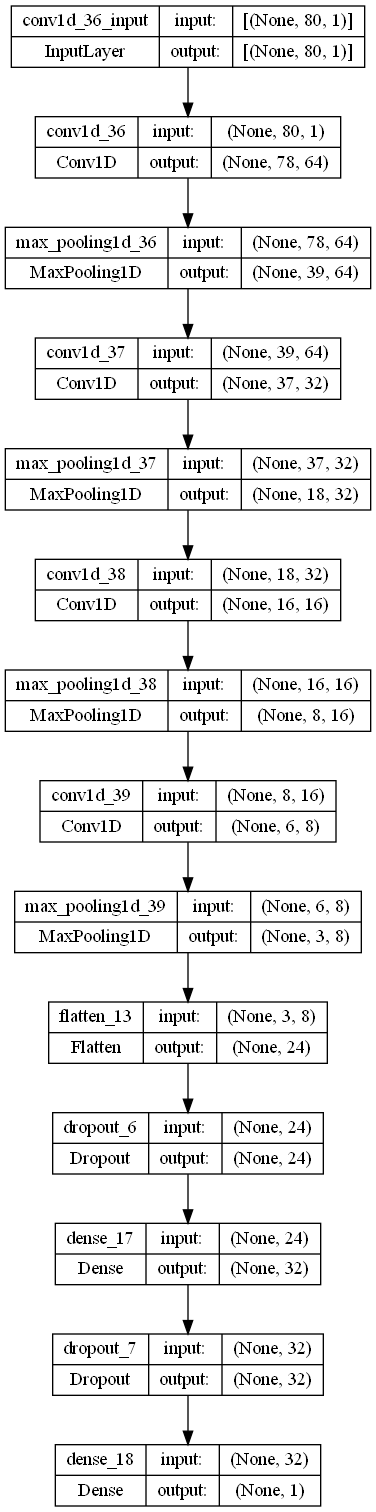

In [273]:
# # Model Summary
import tensorflow as tf
model_summary = tf.keras.utils.plot_model(model, show_shapes=True)
model_summary

In [277]:
# train the model

history=model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_val, y_val),callbacks=[callback])

Epoch 1/1000
63/63 [==============================] - 0s 6ms/step - loss: 0.0652 - accuracy: 0.9753 - val_loss: 0.1074 - val_accuracy: 0.9714
Epoch 2/1000
63/63 [==============================] - 0s 5ms/step - loss: 0.0769 - accuracy: 0.9708 - val_loss: 0.0680 - val_accuracy: 0.9755
Epoch 3/1000
63/63 [==============================] - 0s 5ms/step - loss: 0.0635 - accuracy: 0.9753 - val_loss: 0.1365 - val_accuracy: 0.9653
Epoch 4/1000
63/63 [==============================] - 0s 5ms/step - loss: 0.0659 - accuracy: 0.9758 - val_loss: 0.0814 - val_accuracy: 0.9724
Epoch 5/1000
63/63 [==============================] - 0s 5ms/step - loss: 0.0493 - accuracy: 0.9819 - val_loss: 0.0723 - val_accuracy: 0.9816
Epoch 6/1000
63/63 [==============================] - 0s 5ms/step - loss: 0.0563 - accuracy: 0.9794 - val_loss: 0.0683 - val_accuracy: 0.9745
Epoch 7/1000
63/63 [==============================] - 0s 5ms/step - loss: 0.0507 - accuracy: 0.9824 - val_loss: 0.0910 - val_accuracy: 0.9714
Epoch 

63/63 [==============================] - 0s 6ms/step - loss: 0.0481 - accuracy: 0.9819 - val_loss: 0.0698 - val_accuracy: 0.9724
Epoch 59/1000
63/63 [==============================] - 0s 5ms/step - loss: 0.0435 - accuracy: 0.9869 - val_loss: 0.0623 - val_accuracy: 0.9785
Epoch 60/1000
63/63 [==============================] - 0s 5ms/step - loss: 0.0658 - accuracy: 0.9763 - val_loss: 0.0622 - val_accuracy: 0.9785
Epoch 61/1000
63/63 [==============================] - 0s 6ms/step - loss: 0.0551 - accuracy: 0.9799 - val_loss: 0.0726 - val_accuracy: 0.9785
Epoch 62/1000
63/63 [==============================] - 0s 5ms/step - loss: 0.0465 - accuracy: 0.9809 - val_loss: 0.0729 - val_accuracy: 0.9734
Epoch 63/1000
63/63 [==============================] - 0s 5ms/step - loss: 0.0449 - accuracy: 0.9874 - val_loss: 0.0969 - val_accuracy: 0.9683
Epoch 64/1000
63/63 [==============================] - 0s 5ms/step - loss: 0.0429 - accuracy: 0.9849 - val_loss: 0.0772 - val_accuracy: 0.9734
Epoch 65/1000

63/63 [==============================] - 0s 5ms/step - loss: 0.0486 - accuracy: 0.9834 - val_loss: 0.0869 - val_accuracy: 0.9714
Epoch 116/1000
63/63 [==============================] - 0s 5ms/step - loss: 0.0428 - accuracy: 0.9854 - val_loss: 0.1422 - val_accuracy: 0.9673
Epoch 117/1000
63/63 [==============================] - 0s 6ms/step - loss: 0.0386 - accuracy: 0.9864 - val_loss: 0.1004 - val_accuracy: 0.9755
Epoch 118/1000
63/63 [==============================] - 0s 5ms/step - loss: 0.0323 - accuracy: 0.9879 - val_loss: 0.1061 - val_accuracy: 0.9755
Epoch 119/1000
63/63 [==============================] - 0s 5ms/step - loss: 0.0373 - accuracy: 0.9849 - val_loss: 0.1321 - val_accuracy: 0.9632
Epoch 120/1000
63/63 [==============================] - 0s 5ms/step - loss: 0.0600 - accuracy: 0.9804 - val_loss: 0.0814 - val_accuracy: 0.9724
Epoch 121/1000
63/63 [==============================] - 0s 5ms/step - loss: 0.0424 - accuracy: 0.9839 - val_loss: 0.1178 - val_accuracy: 0.9755
Epoch 1

In [276]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size = 512, verbose = 1)
print("Test Accuracy :", accuracy)
print("Test Loss :", loss)

3/3 [==============================] - 0s 13ms/step - loss: 0.1132 - accuracy: 0.9685
Test Accuracy : 0.9685147404670715
Test Loss : 0.11320415884256363


In [263]:
from prettytable import PrettyTable
from sklearn.metrics import precision_score, recall_score, f1_score

# y_true: true labels, y_pred: predicted labels
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# Create a table to store the evaluation metrics
table = PrettyTable()
table.field_names = ["Metric", "Value"]
table.add_row(["Precision", "{:.2f}%".format(precision * 100)])
table.add_row(["Recall", "{:.2f}%".format(recall * 100)])
table.add_row(["F1-score", "{:.2f}%".format(f1 * 100)])

# Print the table
print(table)


+-----------+--------+
|   Metric  | Value  |
+-----------+--------+
| Precision | 91.26% |
|   Recall  | 89.69% |
|  F1-score | 90.47% |
+-----------+--------+


In [264]:
y_test.shape

(1461,)

In [265]:
X_test.shape

(1461, 80)

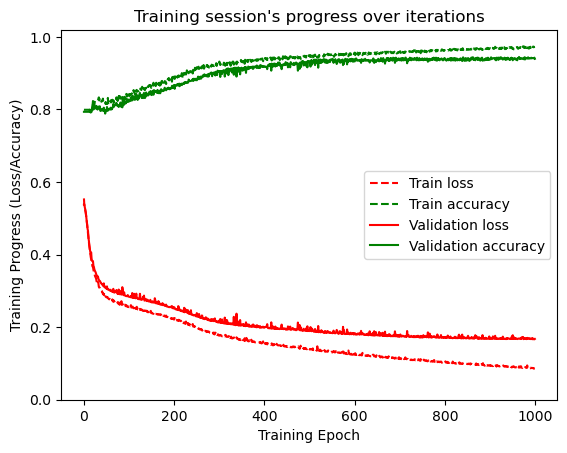

In [266]:
import matplotlib.pyplot as plt
plt.plot(np.array(history.history['loss']), "r--", label = "Train loss")
plt.plot(np.array(history.history['accuracy']), "g--", label = "Train accuracy")
plt.plot(np.array(history.history['val_loss']), "r-", label = "Validation loss")
plt.plot(np.array(history.history['val_accuracy']), "g-", label = "Validation accuracy")
plt.title("Training session's progress over iterations")
plt.legend(loc='best')
plt.ylabel('Training Progress (Loss/Accuracy)')
plt.xlabel('Training Epoch')
plt.ylim(0) 
plt.show()

46/46 [==============================] - 0s 866us/step


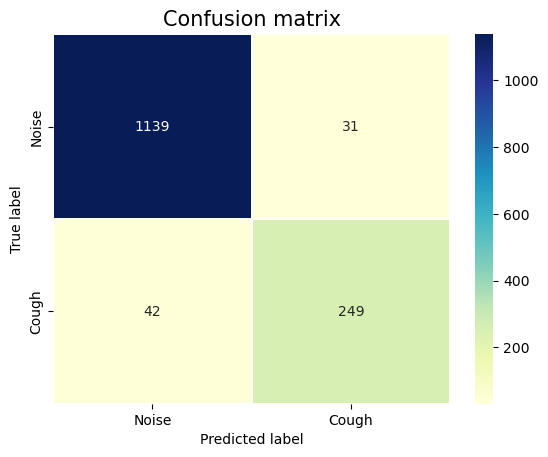

In [267]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
class_labels=['Noise','Cough']
# convert X_test to numpy array
X_test = np.array(X_test)

# use the model to make predictions on the test data
y_pred = np.round(model.predict(X_test)).astype(int)


# calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels = class_labels, yticklabels = class_labels, annot = True, linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



In [268]:
X_test


array([[0.3732613 , 0.34990188, 0.34997347, ..., 0.3955749 , 0.43243343,
        0.4125215 ],
       [0.28969532, 0.29895166, 0.21439119, ..., 0.52073854, 0.3894448 ,
        0.45866737],
       [0.48237887, 0.45993048, 0.59191275, ..., 0.39785886, 0.48203757,
        0.43549004],
       ...,
       [0.36338827, 0.34217948, 0.34733647, ..., 0.42470926, 0.3925314 ,
        0.43750268],
       [0.45943344, 0.4650487 , 0.43139154, ..., 0.30852568, 0.3607681 ,
        0.51074296],
       [0.3984009 , 0.31570405, 0.30783373, ..., 0.5028011 , 0.4815103 ,
        0.3693185 ]], dtype=float32)

In [269]:
y_pred

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]])

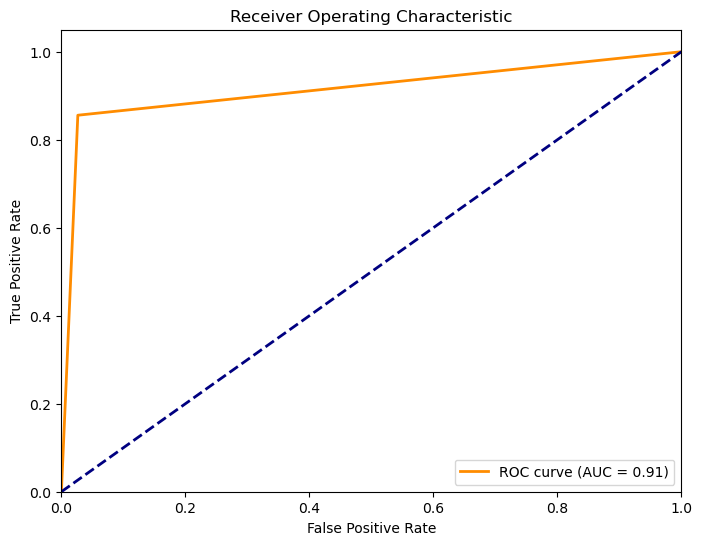

In [270]:
from sklearn.metrics import roc_curve, auc
# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#set up plotting area
plt.figure(0).clf()

#fit logistic regression model and plot ROC curve
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#fit gradient boosted model and plot ROC curve
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))

#add legend
plt.legend()

In [ ]:
# Save the model in the TensorFlow SavedModel format
model.save('cough.h5')

In [ ]:
import tensorflow as tf

# Load the Keras model from the H5 file
loaded_model = tf.keras.models.load_model('cough.h5')

# Convert the Keras model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('cough.tflite', 'wb') as f:
    f.write(tflite_model)


In [ ]:
X_test.shape

# Model Test

In [ ]:
# Load TFLite model
interpreter = tf.lite.Interpreter(model_path="cough.tflite")
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Set input tensor value
interpreter.set_tensor(input_details[0]["index"], X_test)

# Run inference
interpreter.invoke()

# Get output tensor value
y_pred = interpreter.get_tensor(output_details[0]["index"])


In [ ]:
tflite_model_file = 'cough.tflite'
interpreter = tf.lite.Interpreter(model_path=tflite_model_file)
interpreter.allocate_tensors()


In [ ]:
input_tensor_index = interpreter.get_input_details()[0]['index']
interpreter.set_tensor(input_tensor_index, X_test)
